In [ ]:
        cor = torch.matmul(k_x, q_x)                               # (B, D,    D)
        cor = F.softmax(cor, dim=1)                                # (B, s(D), D)

        v_x = v_x.transpose(1, 2).view(B, D, -1)              # (B, D, C*H*W)        
        v_x = v_x.view(B, D, C*H*W)                           # (B, D, C*H*W)
        

In [47]:
import torch

a = torch.ones((2, 64, 64))
b = torch.ones((2, 64, 3*64*64))


c = torch.ones((2, 1, 64*64, 64*64))
d = torch.ones((2, 1, 3, 64, 64))

In [31]:
a.shape

torch.Size([2, 1, 4096, 3])

In [32]:
b.shape

torch.Size([2, 1, 3, 4096])

In [36]:
c.shape

torch.Size([2, 1, 4096, 4096])

In [49]:
x.shape

torch.Size([2, 64, 12288])

In [48]:
x   = torch.matmul(a, b)                          # (B, C, D, H*W, H*W)

In [40]:
x   = torch.matmul(c, d)                          # (B, C, D, H*W, H*W)

RuntimeError: Expected batch2_sizes[0] == bs && batch2_sizes[1] == contraction_size to be true, but got false.  (Could this error message be improved?  If so, please report an enhancement request to PyTorch.)

In [34]:
x.shape

torch.Size([2, 1, 4096, 4096])

In [ ]:
B, C, D

In [ ]:
# !pip install pretrainedmodels==0.7.4
# !pip install efficientnet-pytorch==0.6.3
# !pip install timm==0.3.2

In [ ]:
# # CUDA 11.1
# !pip install torch==1.8.0 torchvision==0.9.0 torchaudio==0.8.0

In [ ]:
# RMSE -> MAE Loss 꿀팁!!

In [1]:
!nvidia-smi

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2, 3"

Tue Jan  4 06:14:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.91.03    Driver Version: 460.91.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 8000     On   | 00000000:18:00.0 Off |                  Off |
| 33%   27C    P8    26W / 260W |      3MiB / 48601MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Quadro RTX 8000     On   | 00000000:3B:00.0 Off |                  Off |
| 33%   

In [2]:
cd /workspace/sunggu/4.Dose_img2img/scripts study

/workspace/sunggu/4.Dose_img2img/scripts study


In [3]:
import torch
print(torch.__version__)

1.8.0+cu111


In [4]:
import multiprocessing
print("CPU 갯수 = ", multiprocessing.cpu_count())

CPU 갯수 =  48


# CMT_Unet

In [ ]:
!python train.py \
--batch-size 16 \
--epochs 1000 \
--min-lr 5e-6 \
--lr 2e-4 \
--data-set 'Sinogram_DCM' \
--model-name 'CMT_Unet' \
--criterion 'L1 Loss' \
--output_dir '/workspace/sunggu/4.Dose_img2img/model/[Ours]CMT_Unet_L1_x1000' \
--save_dir '/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/' \
--validate-every 1 \
--num_workers 16 \
--criterion_mode 'not balance' \
--multiple_GT "False" \
--patch_training "False" \
--multi-gpu-mode 'DataParallel' 
# --multi-gpu-mode 'DataParallel' \

inintializing...!
inintializing...!
adopt performer encoder for tokens-to-token
adopt performer encoder for tokens-to-token
inintializing...!
inintializing...!
inintializing...!
inintializing...!
inintializing...!
inintializing...!
inintializing...!
inintializing...!
inintializing...!
inintializing...!
inintializing...!
inintializing...!
***********************************************
***********************************************
Dataset Name:  Sinogram_DCM
---------- Model ----------
Resume From:  
Output To:  /workspace/sunggu/4.Dose_img2img/model/[Ours]CMT_Unet_L1_x1000
Save   To:  /workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/
---------- Optimizer ----------
Learning Rate:  0.0002
Weight Decay:  0.05
Batchsize:  16
Loading dataset ....
Train [Total]  number =  6899
Valid [Total]  number =  14
Creating model: CMT_Unet
Number of Learnable Params: 76860861
CMT_Unet(
  (encoder): CMT(
    (stem): CMTStem(
      (conv1): Conv2d(1, 32, kernel_s

            (0): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1))
            (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
      )
      (2): CMTBlock(
        (lpu): LPU(
          (DWConv): DWCONV(
            (depthwise): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=512)
          )
        )
        (lmhsa): LMHSA(
          (dwconv_k): DWCONV(
            (depthwise): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=512)
          )
          (dwconv_v): DWCONV(
            (depthwise): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=512)
          )
          (fc_q): Linear(in_features=512, out_features=512, bias=True)
          (fc_k): Linear(in_features=512, out_features=512, bias=True)
          (fc_v): Linear(in_features=512, out_features=512, bias=True)
          (fc_o): Linear(in_features=512, out_features=512, bias=True)
    

Train: [epoch:0]  [290/431]  eta: 0:02:42  lr: 0.000001  loss: 2007881.7500 (3270095.1499)  time: 1.1328  data: 0.0002  max mem: 15925
Train: [epoch:0]  [300/431]  eta: 0:02:30  lr: 0.000001  loss: 1972776.2500 (3226380.5673)  time: 1.1252  data: 0.0002  max mem: 15925
Train: [epoch:0]  [310/431]  eta: 0:02:18  lr: 0.000001  loss: 1916052.8750 (3183626.2998)  time: 1.1248  data: 0.0002  max mem: 15925
Train: [epoch:0]  [320/431]  eta: 0:02:07  lr: 0.000001  loss: 1874404.2500 (3142246.5666)  time: 1.1310  data: 0.0002  max mem: 15925
Train: [epoch:0]  [330/431]  eta: 0:01:55  lr: 0.000001  loss: 1821284.0000 (3101533.3803)  time: 1.1220  data: 0.0002  max mem: 15925
Train: [epoch:0]  [340/431]  eta: 0:01:44  lr: 0.000001  loss: 1779887.7500 (3062105.3207)  time: 1.1321  data: 0.0002  max mem: 15925
Train: [epoch:0]  [350/431]  eta: 0:01:32  lr: 0.000001  loss: 1733824.7500 (3023650.9697)  time: 1.1434  data: 0.0002  max mem: 15925
Train: [epoch:0]  [360/431]  eta: 0:01:21  lr: 0.000001

Train: [epoch:1]  [370/431]  eta: 0:01:08  lr: 0.000001  loss: 776645.5625 (1054185.9648)  time: 1.1130  data: 0.0002  max mem: 15925
Train: [epoch:1]  [380/431]  eta: 0:00:57  lr: 0.000001  loss: 765064.3125 (1046439.3192)  time: 1.1231  data: 0.0002  max mem: 15925
Train: [epoch:1]  [390/431]  eta: 0:00:46  lr: 0.000001  loss: 754305.9375 (1038914.5764)  time: 1.1246  data: 0.0002  max mem: 15925
Train: [epoch:1]  [400/431]  eta: 0:00:34  lr: 0.000001  loss: 745381.9375 (1031443.6252)  time: 1.1123  data: 0.0002  max mem: 15925
Train: [epoch:1]  [410/431]  eta: 0:00:23  lr: 0.000001  loss: 732638.6875 (1024064.4886)  time: 1.1175  data: 0.0002  max mem: 15925
Train: [epoch:1]  [420/431]  eta: 0:00:12  lr: 0.000001  loss: 726369.2500 (1016892.6188)  time: 1.1224  data: 0.0001  max mem: 15925
Train: [epoch:1]  [430/431]  eta: 0:00:01  lr: 0.000001  loss: 714070.6875 (1009732.0390)  time: 1.1249  data: 0.0001  max mem: 15925
Train: [epoch:1] Total time: 0:08:04 (1.1244 s / it)
Averaged 

Train: [epoch:3]  [ 20/431]  eta: 0:08:26  lr: 0.000040  loss: 5401.1929 (5434.3002)  time: 1.0597  data: 0.0002  max mem: 15925
Train: [epoch:3]  [ 30/431]  eta: 0:07:53  lr: 0.000040  loss: 5263.5698 (5354.3316)  time: 1.0700  data: 0.0002  max mem: 15925
Train: [epoch:3]  [ 40/431]  eta: 0:07:32  lr: 0.000040  loss: 5082.6211 (5259.5197)  time: 1.0780  data: 0.0002  max mem: 15925
Train: [epoch:3]  [ 50/431]  eta: 0:07:18  lr: 0.000040  loss: 4835.0913 (5160.2374)  time: 1.1032  data: 0.0002  max mem: 15925
Train: [epoch:3]  [ 60/431]  eta: 0:07:04  lr: 0.000040  loss: 4639.2163 (5068.0175)  time: 1.1135  data: 0.0002  max mem: 15925
Train: [epoch:3]  [ 70/431]  eta: 0:06:51  lr: 0.000040  loss: 4486.0898 (4975.0410)  time: 1.1111  data: 0.0002  max mem: 15925
Train: [epoch:3]  [ 80/431]  eta: 0:06:38  lr: 0.000040  loss: 4310.5366 (4884.7923)  time: 1.1104  data: 0.0002  max mem: 15925
Train: [epoch:3]  [ 90/431]  eta: 0:06:26  lr: 0.000040  loss: 4202.0835 (4801.3550)  time: 1.115

Train: [epoch:4]  [170/431]  eta: 0:04:56  lr: 0.000060  loss: 402.9851 (695.5068)  time: 1.1220  data: 0.0002  max mem: 15925
Train: [epoch:4]  [180/431]  eta: 0:04:44  lr: 0.000060  loss: 381.4423 (677.9646)  time: 1.1132  data: 0.0002  max mem: 15925
Train: [epoch:4]  [190/431]  eta: 0:04:32  lr: 0.000060  loss: 369.6537 (661.3382)  time: 1.1142  data: 0.0002  max mem: 15925
Train: [epoch:4]  [200/431]  eta: 0:04:21  lr: 0.000060  loss: 349.0430 (645.6355)  time: 1.1302  data: 0.0002  max mem: 15925
Train: [epoch:4]  [210/431]  eta: 0:04:10  lr: 0.000060  loss: 344.9889 (631.2679)  time: 1.1324  data: 0.0002  max mem: 15925
Train: [epoch:4]  [220/431]  eta: 0:03:58  lr: 0.000060  loss: 332.0983 (617.3780)  time: 1.1170  data: 0.0002  max mem: 15925
Train: [epoch:4]  [230/431]  eta: 0:03:47  lr: 0.000060  loss: 320.5181 (604.5613)  time: 1.1071  data: 0.0002  max mem: 15925
Train: [epoch:4]  [240/431]  eta: 0:03:35  lr: 0.000060  loss: 315.7571 (592.4142)  time: 1.1121  data: 0.0002 

Train: [epoch:5]  [330/431]  eta: 0:01:53  lr: 0.000080  loss: 199.0894 (213.2516)  time: 1.1081  data: 0.0001  max mem: 15925
Train: [epoch:5]  [340/431]  eta: 0:01:42  lr: 0.000080  loss: 205.2408 (212.8914)  time: 1.1140  data: 0.0002  max mem: 15925
Train: [epoch:5]  [350/431]  eta: 0:01:30  lr: 0.000080  loss: 198.7604 (212.5581)  time: 1.1073  data: 0.0002  max mem: 15925
Train: [epoch:5]  [360/431]  eta: 0:01:19  lr: 0.000080  loss: 199.1984 (212.1791)  time: 1.1111  data: 0.0002  max mem: 15925
Train: [epoch:5]  [370/431]  eta: 0:01:08  lr: 0.000080  loss: 197.2569 (211.6011)  time: 1.1243  data: 0.0002  max mem: 15925
Train: [epoch:5]  [380/431]  eta: 0:00:57  lr: 0.000080  loss: 191.6706 (210.8838)  time: 1.1165  data: 0.0001  max mem: 15925
Train: [epoch:5]  [390/431]  eta: 0:00:45  lr: 0.000080  loss: 191.8270 (210.3028)  time: 1.1154  data: 0.0002  max mem: 15925
Train: [epoch:5]  [400/431]  eta: 0:00:34  lr: 0.000080  loss: 192.2271 (209.8345)  time: 1.1153  data: 0.0002 

Train: [epoch:7]  [  0/431]  eta: 0:33:15  lr: 0.000120  loss: 202.6971 (202.6971)  time: 4.6302  data: 3.4326  max mem: 15925
Train: [epoch:7]  [ 10/431]  eta: 0:09:45  lr: 0.000120  loss: 181.7546 (182.9660)  time: 1.3911  data: 0.3122  max mem: 15925
Train: [epoch:7]  [ 20/431]  eta: 0:08:25  lr: 0.000120  loss: 176.3374 (174.0258)  time: 1.0605  data: 0.0002  max mem: 15925
Train: [epoch:7]  [ 30/431]  eta: 0:07:51  lr: 0.000120  loss: 160.8710 (169.4585)  time: 1.0580  data: 0.0002  max mem: 15925
Train: [epoch:7]  [ 40/431]  eta: 0:07:32  lr: 0.000120  loss: 154.2988 (166.0822)  time: 1.0811  data: 0.0002  max mem: 15925
Train: [epoch:7]  [ 50/431]  eta: 0:07:16  lr: 0.000120  loss: 157.8765 (164.7191)  time: 1.0967  data: 0.0002  max mem: 15925
Train: [epoch:7]  [ 60/431]  eta: 0:07:01  lr: 0.000120  loss: 160.6062 (164.0962)  time: 1.0949  data: 0.0001  max mem: 15925
Train: [epoch:7]  [ 70/431]  eta: 0:06:48  lr: 0.000120  loss: 162.3438 (163.9521)  time: 1.0953  data: 0.0001 

Train: [epoch:8]  [160/431]  eta: 0:05:04  lr: 0.000140  loss: 149.2945 (147.2274)  time: 1.1181  data: 0.0002  max mem: 15925
Train: [epoch:8]  [170/431]  eta: 0:04:52  lr: 0.000140  loss: 145.4427 (147.0273)  time: 1.1151  data: 0.0002  max mem: 15925
Train: [epoch:8]  [180/431]  eta: 0:04:41  lr: 0.000140  loss: 144.1938 (146.8672)  time: 1.1065  data: 0.0002  max mem: 15925
Train: [epoch:8]  [190/431]  eta: 0:04:30  lr: 0.000140  loss: 147.6880 (147.0513)  time: 1.1116  data: 0.0002  max mem: 15925
Train: [epoch:8]  [200/431]  eta: 0:04:18  lr: 0.000140  loss: 146.7062 (146.7446)  time: 1.1175  data: 0.0001  max mem: 15925
Train: [epoch:8]  [210/431]  eta: 0:04:07  lr: 0.000140  loss: 144.1157 (146.6987)  time: 1.1151  data: 0.0002  max mem: 15925
Train: [epoch:8]  [220/431]  eta: 0:03:56  lr: 0.000140  loss: 146.9755 (146.7872)  time: 1.1125  data: 0.0002  max mem: 15925
Train: [epoch:8]  [230/431]  eta: 0:03:45  lr: 0.000140  loss: 148.2254 (146.9438)  time: 1.1314  data: 0.0002 

Train: [epoch:9]  [320/431]  eta: 0:02:03  lr: 0.000160  loss: 134.5919 (140.0907)  time: 1.1164  data: 0.0002  max mem: 15925
Train: [epoch:9]  [330/431]  eta: 0:01:52  lr: 0.000160  loss: 139.7523 (140.3869)  time: 1.1154  data: 0.0002  max mem: 15925
Train: [epoch:9]  [340/431]  eta: 0:01:41  lr: 0.000160  loss: 149.6195 (140.5918)  time: 1.1104  data: 0.0002  max mem: 15925
Train: [epoch:9]  [350/431]  eta: 0:01:30  lr: 0.000160  loss: 146.4002 (140.8269)  time: 1.1072  data: 0.0002  max mem: 15925
Train: [epoch:9]  [360/431]  eta: 0:01:19  lr: 0.000160  loss: 143.0235 (140.7271)  time: 1.1096  data: 0.0002  max mem: 15925
Train: [epoch:9]  [370/431]  eta: 0:01:08  lr: 0.000160  loss: 136.1263 (140.7250)  time: 1.1085  data: 0.0002  max mem: 15925
Train: [epoch:9]  [380/431]  eta: 0:00:56  lr: 0.000160  loss: 142.4869 (140.8197)  time: 1.1090  data: 0.0002  max mem: 15925
Train: [epoch:9]  [390/431]  eta: 0:00:45  lr: 0.000160  loss: 142.4869 (140.7651)  time: 1.1121  data: 0.0002 

loss of the network on the 14 valid images: 141.219%
Min loss: 141.219
Best Epoch: 10.000
Train: [epoch:11]  [  0/431]  eta: 0:34:49  lr: 0.000200  loss: 142.6008 (142.6008)  time: 4.8470  data: 3.6432  max mem: 15925
Train: [epoch:11]  [ 10/431]  eta: 0:09:44  lr: 0.000200  loss: 149.9745 (145.6827)  time: 1.3889  data: 0.3315  max mem: 15925
Train: [epoch:11]  [ 20/431]  eta: 0:08:24  lr: 0.000200  loss: 140.6336 (142.3868)  time: 1.0455  data: 0.0002  max mem: 15925
Train: [epoch:11]  [ 30/431]  eta: 0:07:55  lr: 0.000200  loss: 130.9291 (136.4883)  time: 1.0737  data: 0.0002  max mem: 15925
Train: [epoch:11]  [ 40/431]  eta: 0:07:34  lr: 0.000200  loss: 126.0251 (134.6736)  time: 1.0956  data: 0.0002  max mem: 15925
Train: [epoch:11]  [ 50/431]  eta: 0:07:19  lr: 0.000200  loss: 126.7883 (132.7746)  time: 1.1045  data: 0.0002  max mem: 15925
Train: [epoch:11]  [ 60/431]  eta: 0:07:04  lr: 0.000200  loss: 129.1645 (132.9499)  time: 1.1077  data: 0.0002  max mem: 15925
Train: [epoch:

Train: [epoch:12]  [150/431]  eta: 0:05:16  lr: 0.000200  loss: 139.0407 (133.4973)  time: 1.1224  data: 0.0002  max mem: 15925
Train: [epoch:12]  [160/431]  eta: 0:05:05  lr: 0.000200  loss: 140.7521 (133.8422)  time: 1.1145  data: 0.0002  max mem: 15925
Train: [epoch:12]  [170/431]  eta: 0:04:53  lr: 0.000200  loss: 134.3363 (133.8270)  time: 1.1120  data: 0.0002  max mem: 15925
Train: [epoch:12]  [180/431]  eta: 0:04:42  lr: 0.000200  loss: 137.5340 (134.1099)  time: 1.1109  data: 0.0002  max mem: 15925
Train: [epoch:12]  [190/431]  eta: 0:04:31  lr: 0.000200  loss: 143.3237 (134.6165)  time: 1.1200  data: 0.0002  max mem: 15925
Train: [epoch:12]  [200/431]  eta: 0:04:19  lr: 0.000200  loss: 141.7692 (134.6536)  time: 1.1215  data: 0.0002  max mem: 15925
Train: [epoch:12]  [210/431]  eta: 0:04:08  lr: 0.000200  loss: 131.9478 (134.3839)  time: 1.1140  data: 0.0002  max mem: 15925
Train: [epoch:12]  [220/431]  eta: 0:03:57  lr: 0.000200  loss: 129.5629 (134.3525)  time: 1.1196  data:

Train: [epoch:13]  [310/431]  eta: 0:02:16  lr: 0.000200  loss: 133.6789 (134.2241)  time: 1.1219  data: 0.0002  max mem: 15925
Train: [epoch:13]  [320/431]  eta: 0:02:04  lr: 0.000200  loss: 129.0676 (133.8762)  time: 1.1279  data: 0.0002  max mem: 15925
Train: [epoch:13]  [330/431]  eta: 0:01:53  lr: 0.000200  loss: 135.4995 (134.3337)  time: 1.1280  data: 0.0002  max mem: 15925
Train: [epoch:13]  [340/431]  eta: 0:01:42  lr: 0.000200  loss: 152.3446 (134.7148)  time: 1.1177  data: 0.0002  max mem: 15925
Train: [epoch:13]  [350/431]  eta: 0:01:31  lr: 0.000200  loss: 151.1160 (135.0622)  time: 1.1163  data: 0.0002  max mem: 15925
Train: [epoch:13]  [360/431]  eta: 0:01:19  lr: 0.000200  loss: 139.9441 (135.1194)  time: 1.1182  data: 0.0002  max mem: 15925
Train: [epoch:13]  [370/431]  eta: 0:01:08  lr: 0.000200  loss: 137.2764 (135.2263)  time: 1.1170  data: 0.0002  max mem: 15925
Train: [epoch:13]  [380/431]  eta: 0:00:57  lr: 0.000200  loss: 137.6008 (135.3710)  time: 1.1176  data:

Valid: [epoch:14] Total time: 0:00:04 (0.2922 s / it)
Averaged stats: loss: 132.8970 (139.7769)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_14_input_n_20.png
loss of the network on the 14 valid images: 139.777%
Min loss: 139.777
Best Epoch: 14.000
Train: [epoch:15]  [  0/431]  eta: 0:34:06  lr: 0.000200  loss: 154.0790 (154.0790)  time: 4.7489  data: 3.4564  max mem: 15925
Train: [epoch:15]  [ 10/431]  eta: 0:09:40  lr: 0.000200  loss: 150.6215 (150.7131)  time: 1.3799  data: 0.3144  max mem: 15925
Train: [epoch:15]  [ 20/431]  eta: 0:08:29  lr: 0.000200  loss: 143.5360 (143.6504)  time: 1.0652  data: 0.0002  max mem: 15925
Train: [epoch:15]  [ 30/431]  eta: 0:07:57  lr: 0.000200  loss: 130.1169 (138.1779)  time: 1.0858  data: 0.0002  max mem: 15925
Train: [epoch:15]  [ 40/431]  eta: 0:07:37  lr: 0.000200  loss: 124.5844 (134.3246)  time: 1.0968  data: 0.0001  max mem: 15925
Train: [epoch:15]  [ 50/431]  eta: 0:07:21  lr: 0.000200  loss

Train: [epoch:16]  [130/431]  eta: 0:05:39  lr: 0.000200  loss: 133.8710 (133.5861)  time: 1.1255  data: 0.0002  max mem: 15925
Train: [epoch:16]  [140/431]  eta: 0:05:27  lr: 0.000200  loss: 136.5041 (133.5958)  time: 1.1150  data: 0.0001  max mem: 15925
Train: [epoch:16]  [150/431]  eta: 0:05:15  lr: 0.000200  loss: 133.5849 (133.7953)  time: 1.1053  data: 0.0002  max mem: 15925
Train: [epoch:16]  [160/431]  eta: 0:05:04  lr: 0.000200  loss: 137.0705 (133.9730)  time: 1.1072  data: 0.0002  max mem: 15925
Train: [epoch:16]  [170/431]  eta: 0:04:53  lr: 0.000200  loss: 134.8540 (133.8945)  time: 1.1225  data: 0.0001  max mem: 15925
Train: [epoch:16]  [180/431]  eta: 0:04:41  lr: 0.000200  loss: 134.8540 (134.0238)  time: 1.1242  data: 0.0002  max mem: 15925
Train: [epoch:16]  [190/431]  eta: 0:04:30  lr: 0.000200  loss: 138.1392 (134.3112)  time: 1.1079  data: 0.0002  max mem: 15925
Train: [epoch:16]  [200/431]  eta: 0:04:19  lr: 0.000200  loss: 137.6593 (134.3840)  time: 1.1118  data:

Train: [epoch:17]  [290/431]  eta: 0:02:36  lr: 0.000200  loss: 133.1594 (135.2868)  time: 1.0979  data: 0.0002  max mem: 15925
Train: [epoch:17]  [300/431]  eta: 0:02:25  lr: 0.000200  loss: 137.4941 (135.5227)  time: 1.0989  data: 0.0002  max mem: 15925
Train: [epoch:17]  [310/431]  eta: 0:02:14  lr: 0.000200  loss: 135.2354 (135.2397)  time: 1.1119  data: 0.0002  max mem: 15925
Train: [epoch:17]  [320/431]  eta: 0:02:03  lr: 0.000200  loss: 123.6500 (134.9691)  time: 1.1138  data: 0.0002  max mem: 15925
Train: [epoch:17]  [330/431]  eta: 0:01:52  lr: 0.000200  loss: 137.0122 (135.4153)  time: 1.1075  data: 0.0002  max mem: 15925
Train: [epoch:17]  [340/431]  eta: 0:01:40  lr: 0.000200  loss: 147.1225 (135.5874)  time: 1.1064  data: 0.0002  max mem: 15925
Train: [epoch:17]  [350/431]  eta: 0:01:29  lr: 0.000200  loss: 145.3748 (135.8721)  time: 1.1131  data: 0.0002  max mem: 15925
Train: [epoch:17]  [360/431]  eta: 0:01:18  lr: 0.000200  loss: 142.9949 (135.8956)  time: 1.1164  data:

Valid: [epoch:18]  [ 0/14]  eta: 0:00:32  loss: 160.6569 (160.6569)  time: 2.3125  data: 2.1659  max mem: 15925
Valid: [epoch:18]  [13/14]  eta: 0:00:00  loss: 132.8970 (139.7140)  time: 0.2443  data: 0.1548  max mem: 15925
Valid: [epoch:18] Total time: 0:00:03 (0.2620 s / it)
Averaged stats: loss: 132.8970 (139.7140)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_18_input_n_20.png
loss of the network on the 14 valid images: 139.714%
Min loss: 139.714
Best Epoch: 18.000
Train: [epoch:19]  [  0/431]  eta: 0:29:44  lr: 0.000200  loss: 140.2858 (140.2858)  time: 4.1392  data: 3.0120  max mem: 15925
Train: [epoch:19]  [ 10/431]  eta: 0:09:16  lr: 0.000200  loss: 150.8111 (151.9014)  time: 1.3224  data: 0.2740  max mem: 15925
Train: [epoch:19]  [ 20/431]  eta: 0:08:11  lr: 0.000200  loss: 144.4733 (144.2271)  time: 1.0478  data: 0.0002  max mem: 15925
Train: [epoch:19]  [ 30/431]  eta: 0:07:46  lr: 0.000200  loss: 130.5336 (139.0212)  time: 1.0

Train: [epoch:20]  [110/431]  eta: 0:06:00  lr: 0.000200  loss: 127.3679 (133.3283)  time: 1.1082  data: 0.0002  max mem: 15925
Train: [epoch:20]  [120/431]  eta: 0:05:48  lr: 0.000200  loss: 128.8894 (133.4089)  time: 1.1077  data: 0.0002  max mem: 15925
Train: [epoch:20]  [130/431]  eta: 0:05:37  lr: 0.000200  loss: 129.3395 (133.0013)  time: 1.1071  data: 0.0002  max mem: 15925
Train: [epoch:20]  [140/431]  eta: 0:05:26  lr: 0.000200  loss: 129.4996 (133.1688)  time: 1.1092  data: 0.0002  max mem: 15925
Train: [epoch:20]  [150/431]  eta: 0:05:14  lr: 0.000200  loss: 143.2765 (133.9587)  time: 1.1113  data: 0.0002  max mem: 15925
Train: [epoch:20]  [160/431]  eta: 0:05:03  lr: 0.000200  loss: 141.0103 (134.0156)  time: 1.1077  data: 0.0001  max mem: 15925
Train: [epoch:20]  [170/431]  eta: 0:04:51  lr: 0.000200  loss: 132.2743 (133.8080)  time: 1.0997  data: 0.0001  max mem: 15925
Train: [epoch:20]  [180/431]  eta: 0:04:40  lr: 0.000200  loss: 132.2743 (133.7800)  time: 1.1080  data:

Train: [epoch:21]  [270/431]  eta: 0:02:59  lr: 0.000200  loss: 147.6052 (134.5589)  time: 1.1057  data: 0.0001  max mem: 15925
Train: [epoch:21]  [280/431]  eta: 0:02:48  lr: 0.000200  loss: 135.4734 (134.3661)  time: 1.1119  data: 0.0002  max mem: 15925
Train: [epoch:21]  [290/431]  eta: 0:02:37  lr: 0.000200  loss: 133.6961 (134.2356)  time: 1.1147  data: 0.0002  max mem: 15925
Train: [epoch:21]  [300/431]  eta: 0:02:25  lr: 0.000200  loss: 133.2789 (134.3809)  time: 1.1009  data: 0.0002  max mem: 15925
Train: [epoch:21]  [310/431]  eta: 0:02:14  lr: 0.000200  loss: 133.2789 (134.2008)  time: 1.1011  data: 0.0002  max mem: 15925
Train: [epoch:21]  [320/431]  eta: 0:02:03  lr: 0.000200  loss: 128.8590 (134.1148)  time: 1.1140  data: 0.0002  max mem: 15925
Train: [epoch:21]  [330/431]  eta: 0:01:52  lr: 0.000200  loss: 133.8166 (134.4791)  time: 1.1079  data: 0.0002  max mem: 15925
Train: [epoch:21]  [340/431]  eta: 0:01:41  lr: 0.000200  loss: 147.2599 (134.8508)  time: 1.1175  data:

Train: [epoch:22]  [430/431]  eta: 0:00:01  lr: 0.000200  loss: 135.6637 (135.5505)  time: 1.0982  data: 0.0001  max mem: 15925
Train: [epoch:22] Total time: 0:07:59 (1.1126 s / it)
Averaged stats: lr: 0.000200  loss: 135.6637 (135.5505)
Valid: [epoch:22]  [ 0/14]  eta: 0:00:31  loss: 119.4266 (119.4266)  time: 2.2289  data: 2.0991  max mem: 15925
Valid: [epoch:22]  [13/14]  eta: 0:00:00  loss: 132.8970 (139.7315)  time: 0.2437  data: 0.1500  max mem: 15925
Valid: [epoch:22] Total time: 0:00:03 (0.2619 s / it)
Averaged stats: loss: 132.8970 (139.7315)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_22_input_n_20.png
loss of the network on the 14 valid images: 139.732%
Min loss: 139.705
Best Epoch: 19.000
Train: [epoch:23]  [  0/431]  eta: 0:32:56  lr: 0.000200  loss: 147.0324 (147.0324)  time: 4.5859  data: 3.2708  max mem: 15925
Train: [epoch:23]  [ 10/431]  eta: 0:09:33  lr: 0.000200  loss: 149.0412 (152.3341)  time: 1.3633  data: 0.2976 

Train: [epoch:24]  [100/431]  eta: 0:06:12  lr: 0.000200  loss: 127.2859 (131.7477)  time: 1.1096  data: 0.0002  max mem: 15925
Train: [epoch:24]  [110/431]  eta: 0:06:01  lr: 0.000200  loss: 127.1033 (131.4074)  time: 1.1249  data: 0.0002  max mem: 15925
Train: [epoch:24]  [120/431]  eta: 0:05:49  lr: 0.000200  loss: 128.7235 (131.6012)  time: 1.1219  data: 0.0002  max mem: 15925
Train: [epoch:24]  [130/431]  eta: 0:05:38  lr: 0.000200  loss: 133.5974 (131.8820)  time: 1.1125  data: 0.0002  max mem: 15925
Train: [epoch:24]  [140/431]  eta: 0:05:26  lr: 0.000200  loss: 133.5974 (132.1314)  time: 1.1067  data: 0.0002  max mem: 15925
Train: [epoch:24]  [150/431]  eta: 0:05:14  lr: 0.000200  loss: 138.6463 (132.5259)  time: 1.0992  data: 0.0002  max mem: 15925
Train: [epoch:24]  [160/431]  eta: 0:05:03  lr: 0.000200  loss: 139.9913 (132.8649)  time: 1.0959  data: 0.0002  max mem: 15925
Train: [epoch:24]  [170/431]  eta: 0:04:51  lr: 0.000200  loss: 133.1501 (132.6972)  time: 1.1003  data:

Train: [epoch:25]  [260/431]  eta: 0:03:11  lr: 0.000200  loss: 135.0757 (134.3398)  time: 1.1057  data: 0.0002  max mem: 15925
Train: [epoch:25]  [270/431]  eta: 0:03:00  lr: 0.000200  loss: 142.3091 (134.7339)  time: 1.1080  data: 0.0002  max mem: 15925
Train: [epoch:25]  [280/431]  eta: 0:02:49  lr: 0.000200  loss: 135.6330 (134.7370)  time: 1.1091  data: 0.0002  max mem: 15925
Train: [epoch:25]  [290/431]  eta: 0:02:37  lr: 0.000200  loss: 135.5046 (134.6782)  time: 1.1059  data: 0.0002  max mem: 15925
Train: [epoch:25]  [300/431]  eta: 0:02:26  lr: 0.000200  loss: 140.0555 (135.0995)  time: 1.1133  data: 0.0003  max mem: 15925
Train: [epoch:25]  [310/431]  eta: 0:02:15  lr: 0.000200  loss: 139.2096 (134.7819)  time: 1.1117  data: 0.0002  max mem: 15925
Train: [epoch:25]  [320/431]  eta: 0:02:04  lr: 0.000200  loss: 127.2775 (134.6139)  time: 1.1108  data: 0.0002  max mem: 15925
Train: [epoch:25]  [330/431]  eta: 0:01:52  lr: 0.000200  loss: 133.2147 (135.0478)  time: 1.1128  data:

Train: [epoch:26]  [420/431]  eta: 0:00:12  lr: 0.000200  loss: 135.1329 (135.3830)  time: 1.1222  data: 0.0002  max mem: 15925
Train: [epoch:26]  [430/431]  eta: 0:00:01  lr: 0.000200  loss: 131.1338 (135.4312)  time: 1.1175  data: 0.0002  max mem: 15925
Train: [epoch:26] Total time: 0:08:01 (1.1165 s / it)
Averaged stats: lr: 0.000200  loss: 131.1338 (135.4312)
Valid: [epoch:26]  [ 0/14]  eta: 0:00:34  loss: 119.4266 (119.4266)  time: 2.4875  data: 2.3297  max mem: 15925
Valid: [epoch:26]  [13/14]  eta: 0:00:00  loss: 132.8970 (139.7050)  time: 0.2645  data: 0.1665  max mem: 15925
Valid: [epoch:26] Total time: 0:00:03 (0.2802 s / it)
Averaged stats: loss: 132.8970 (139.7050)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_26_input_n_20.png
loss of the network on the 14 valid images: 139.705%
Min loss: 139.705
Best Epoch: 19.000
Train: [epoch:27]  [  0/431]  eta: 0:28:37  lr: 0.000200  loss: 147.9050 (147.9050)  time: 3.9860  data: 2.8044 

Train: [epoch:28]  [ 90/431]  eta: 0:06:23  lr: 0.000200  loss: 135.8339 (134.2510)  time: 1.1000  data: 0.0002  max mem: 15925
Train: [epoch:28]  [100/431]  eta: 0:06:11  lr: 0.000200  loss: 135.6845 (134.3095)  time: 1.0958  data: 0.0002  max mem: 15925
Train: [epoch:28]  [110/431]  eta: 0:05:59  lr: 0.000200  loss: 126.2247 (133.0071)  time: 1.0972  data: 0.0002  max mem: 15925
Train: [epoch:28]  [120/431]  eta: 0:05:47  lr: 0.000200  loss: 119.4177 (133.0971)  time: 1.0992  data: 0.0002  max mem: 15925
Train: [epoch:28]  [130/431]  eta: 0:05:36  lr: 0.000200  loss: 133.3669 (132.5975)  time: 1.1007  data: 0.0002  max mem: 15925
Train: [epoch:28]  [140/431]  eta: 0:05:24  lr: 0.000200  loss: 129.8185 (132.5310)  time: 1.0992  data: 0.0002  max mem: 15925
Train: [epoch:28]  [150/431]  eta: 0:05:13  lr: 0.000200  loss: 132.6602 (132.6405)  time: 1.1057  data: 0.0002  max mem: 15925
Train: [epoch:28]  [160/431]  eta: 0:05:02  lr: 0.000200  loss: 135.2352 (133.1051)  time: 1.1074  data:

Train: [epoch:29]  [250/431]  eta: 0:03:20  lr: 0.000200  loss: 140.6017 (134.3061)  time: 1.0943  data: 0.0002  max mem: 15925
Train: [epoch:29]  [260/431]  eta: 0:03:09  lr: 0.000200  loss: 139.5503 (134.3141)  time: 1.0951  data: 0.0002  max mem: 15925
Train: [epoch:29]  [270/431]  eta: 0:02:58  lr: 0.000200  loss: 140.7174 (134.6801)  time: 1.1081  data: 0.0001  max mem: 15925
Train: [epoch:29]  [280/431]  eta: 0:02:47  lr: 0.000200  loss: 136.9365 (134.5437)  time: 1.1051  data: 0.0002  max mem: 15925
Train: [epoch:29]  [290/431]  eta: 0:02:36  lr: 0.000200  loss: 130.2759 (134.5854)  time: 1.1043  data: 0.0002  max mem: 15925
Train: [epoch:29]  [300/431]  eta: 0:02:25  lr: 0.000200  loss: 131.9319 (134.5775)  time: 1.1057  data: 0.0002  max mem: 15925
Train: [epoch:29]  [310/431]  eta: 0:02:14  lr: 0.000200  loss: 131.2305 (134.4227)  time: 1.0961  data: 0.0002  max mem: 15925
Train: [epoch:29]  [320/431]  eta: 0:02:02  lr: 0.000200  loss: 125.6576 (134.3189)  time: 1.0917  data:

Train: [epoch:30]  [410/431]  eta: 0:00:23  lr: 0.000200  loss: 134.1914 (135.5585)  time: 1.1087  data: 0.0001  max mem: 15925
Train: [epoch:30]  [420/431]  eta: 0:00:12  lr: 0.000200  loss: 133.3213 (135.4157)  time: 1.1122  data: 0.0001  max mem: 15925
Train: [epoch:30]  [430/431]  eta: 0:00:01  lr: 0.000200  loss: 135.4603 (135.4872)  time: 1.0993  data: 0.0001  max mem: 15925
Train: [epoch:30] Total time: 0:07:57 (1.1075 s / it)
Averaged stats: lr: 0.000200  loss: 135.4603 (135.4872)
Valid: [epoch:30]  [ 0/14]  eta: 0:00:32  loss: 124.2619 (124.2619)  time: 2.3249  data: 2.1655  max mem: 15925
Valid: [epoch:30]  [13/14]  eta: 0:00:00  loss: 132.8970 (139.7050)  time: 0.2671  data: 0.1548  max mem: 15925
Valid: [epoch:30] Total time: 0:00:03 (0.2820 s / it)
Averaged stats: loss: 132.8970 (139.7050)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_30_input_n_20.png
loss of the network on the 14 valid images: 139.705%
Min loss: 139.705
Bes

Train: [epoch:32]  [ 80/431]  eta: 0:06:35  lr: 0.000200  loss: 138.6970 (135.5949)  time: 1.1038  data: 0.0002  max mem: 15925
Train: [epoch:32]  [ 90/431]  eta: 0:06:23  lr: 0.000200  loss: 138.6970 (134.8257)  time: 1.1070  data: 0.0001  max mem: 15925
Train: [epoch:32]  [100/431]  eta: 0:06:11  lr: 0.000200  loss: 127.8068 (134.0645)  time: 1.1011  data: 0.0002  max mem: 15925
Train: [epoch:32]  [110/431]  eta: 0:05:59  lr: 0.000200  loss: 126.5149 (133.5596)  time: 1.0921  data: 0.0002  max mem: 15925
Train: [epoch:32]  [120/431]  eta: 0:05:47  lr: 0.000200  loss: 129.5502 (133.5343)  time: 1.0997  data: 0.0002  max mem: 15925
Train: [epoch:32]  [130/431]  eta: 0:05:36  lr: 0.000200  loss: 133.8804 (133.4319)  time: 1.1078  data: 0.0002  max mem: 15925
Train: [epoch:32]  [140/431]  eta: 0:05:24  lr: 0.000200  loss: 130.1651 (133.0844)  time: 1.1017  data: 0.0002  max mem: 15925
Train: [epoch:32]  [150/431]  eta: 0:05:13  lr: 0.000200  loss: 135.0374 (133.5810)  time: 1.0963  data:

Train: [epoch:33]  [240/431]  eta: 0:03:31  lr: 0.000200  loss: 139.3371 (134.3220)  time: 1.1056  data: 0.0002  max mem: 15925
Train: [epoch:33]  [250/431]  eta: 0:03:20  lr: 0.000200  loss: 139.3690 (134.4389)  time: 1.1030  data: 0.0002  max mem: 15925
Train: [epoch:33]  [260/431]  eta: 0:03:09  lr: 0.000200  loss: 140.3260 (134.7588)  time: 1.1063  data: 0.0002  max mem: 15925
Train: [epoch:33]  [270/431]  eta: 0:02:58  lr: 0.000200  loss: 141.6342 (135.1118)  time: 1.1017  data: 0.0002  max mem: 15925
Train: [epoch:33]  [280/431]  eta: 0:02:47  lr: 0.000200  loss: 139.4749 (134.9912)  time: 1.1082  data: 0.0002  max mem: 15925
Train: [epoch:33]  [290/431]  eta: 0:02:36  lr: 0.000200  loss: 134.0588 (134.9590)  time: 1.1073  data: 0.0002  max mem: 15925
Train: [epoch:33]  [300/431]  eta: 0:02:25  lr: 0.000200  loss: 141.0515 (135.3090)  time: 1.0990  data: 0.0002  max mem: 15925
Train: [epoch:33]  [310/431]  eta: 0:02:14  lr: 0.000200  loss: 141.0515 (135.1733)  time: 1.0995  data:

Train: [epoch:34]  [400/431]  eta: 0:00:34  lr: 0.000200  loss: 131.8113 (135.3297)  time: 1.1069  data: 0.0002  max mem: 15925
Train: [epoch:34]  [410/431]  eta: 0:00:23  lr: 0.000200  loss: 135.1348 (135.4210)  time: 1.1119  data: 0.0001  max mem: 15925
Train: [epoch:34]  [420/431]  eta: 0:00:12  lr: 0.000200  loss: 139.7306 (135.4248)  time: 1.1072  data: 0.0001  max mem: 15925
Train: [epoch:34]  [430/431]  eta: 0:00:01  lr: 0.000200  loss: 135.0997 (135.5399)  time: 1.0987  data: 0.0001  max mem: 15925
Train: [epoch:34] Total time: 0:07:58 (1.1096 s / it)
Averaged stats: lr: 0.000200  loss: 135.0997 (135.5399)
Valid: [epoch:34]  [ 0/14]  eta: 0:00:30  loss: 124.3029 (124.3029)  time: 2.2129  data: 2.0377  max mem: 15925
Valid: [epoch:34]  [13/14]  eta: 0:00:00  loss: 132.8970 (139.7079)  time: 0.2408  data: 0.1456  max mem: 15925
Valid: [epoch:34] Total time: 0:00:03 (0.2571 s / it)
Averaged stats: loss: 132.8970 (139.7079)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ou

Train: [epoch:36]  [ 70/431]  eta: 0:06:51  lr: 0.000200  loss: 132.5143 (130.7692)  time: 1.1193  data: 0.0003  max mem: 15925
Train: [epoch:36]  [ 80/431]  eta: 0:06:39  lr: 0.000200  loss: 132.5482 (130.9966)  time: 1.1179  data: 0.0002  max mem: 15925
Train: [epoch:36]  [ 90/431]  eta: 0:06:27  lr: 0.000200  loss: 128.8278 (130.5514)  time: 1.1251  data: 0.0003  max mem: 15925
Train: [epoch:36]  [100/431]  eta: 0:06:15  lr: 0.000200  loss: 126.7915 (130.2673)  time: 1.1228  data: 0.0003  max mem: 15925
Train: [epoch:36]  [110/431]  eta: 0:06:03  lr: 0.000200  loss: 127.0916 (130.0302)  time: 1.1152  data: 0.0002  max mem: 15925
Train: [epoch:36]  [120/431]  eta: 0:05:51  lr: 0.000200  loss: 127.0916 (129.7227)  time: 1.1092  data: 0.0002  max mem: 15925
Train: [epoch:36]  [130/431]  eta: 0:05:40  lr: 0.000200  loss: 128.9359 (130.2174)  time: 1.1208  data: 0.0003  max mem: 15925
Train: [epoch:36]  [140/431]  eta: 0:05:28  lr: 0.000200  loss: 136.6129 (130.7749)  time: 1.1234  data:

Train: [epoch:37]  [230/431]  eta: 0:03:45  lr: 0.000200  loss: 137.4291 (134.2993)  time: 1.1312  data: 0.0002  max mem: 15925
Train: [epoch:37]  [240/431]  eta: 0:03:34  lr: 0.000200  loss: 137.2250 (134.4625)  time: 1.1120  data: 0.0002  max mem: 15925
Train: [epoch:37]  [250/431]  eta: 0:03:23  lr: 0.000200  loss: 135.0177 (134.5356)  time: 1.1201  data: 0.0002  max mem: 15925
Train: [epoch:37]  [260/431]  eta: 0:03:11  lr: 0.000200  loss: 144.0952 (134.8709)  time: 1.1340  data: 0.0002  max mem: 15925
Train: [epoch:37]  [270/431]  eta: 0:03:00  lr: 0.000200  loss: 144.1110 (135.1497)  time: 1.1150  data: 0.0002  max mem: 15925
Train: [epoch:37]  [280/431]  eta: 0:02:49  lr: 0.000200  loss: 134.1232 (134.8444)  time: 1.1102  data: 0.0003  max mem: 15925
Train: [epoch:37]  [290/431]  eta: 0:02:38  lr: 0.000200  loss: 131.3259 (134.7860)  time: 1.1202  data: 0.0003  max mem: 15925
Train: [epoch:37]  [300/431]  eta: 0:02:26  lr: 0.000200  loss: 142.4090 (135.0469)  time: 1.1126  data:

Train: [epoch:38]  [390/431]  eta: 0:00:45  lr: 0.000200  loss: 138.3691 (135.4301)  time: 1.1069  data: 0.0002  max mem: 15925
Train: [epoch:38]  [400/431]  eta: 0:00:34  lr: 0.000200  loss: 138.3691 (135.4067)  time: 1.1027  data: 0.0002  max mem: 15925
Train: [epoch:38]  [410/431]  eta: 0:00:23  lr: 0.000200  loss: 129.3706 (135.2478)  time: 1.1122  data: 0.0002  max mem: 15925
Train: [epoch:38]  [420/431]  eta: 0:00:12  lr: 0.000200  loss: 134.6871 (135.4041)  time: 1.1028  data: 0.0001  max mem: 15925
Train: [epoch:38]  [430/431]  eta: 0:00:01  lr: 0.000200  loss: 142.0616 (135.5775)  time: 1.0975  data: 0.0001  max mem: 15925
Train: [epoch:38] Total time: 0:08:00 (1.1158 s / it)
Averaged stats: lr: 0.000200  loss: 142.0616 (135.5775)
Valid: [epoch:38]  [ 0/14]  eta: 0:00:34  loss: 161.1376 (161.1376)  time: 2.4613  data: 2.2929  max mem: 15925
Valid: [epoch:38]  [13/14]  eta: 0:00:00  loss: 132.8970 (139.7050)  time: 0.2661  data: 0.1639  max mem: 15925
Valid: [epoch:38] Total ti

Train: [epoch:40]  [ 60/431]  eta: 0:07:03  lr: 0.000200  loss: 127.0858 (132.8778)  time: 1.1060  data: 0.0003  max mem: 15925
Train: [epoch:40]  [ 70/431]  eta: 0:06:51  lr: 0.000200  loss: 133.3137 (133.4686)  time: 1.1162  data: 0.0003  max mem: 15925
Train: [epoch:40]  [ 80/431]  eta: 0:06:38  lr: 0.000200  loss: 138.7061 (133.6883)  time: 1.1094  data: 0.0002  max mem: 15925
Train: [epoch:40]  [ 90/431]  eta: 0:06:26  lr: 0.000200  loss: 133.8176 (133.1512)  time: 1.1088  data: 0.0002  max mem: 15925
Train: [epoch:40]  [100/431]  eta: 0:06:14  lr: 0.000200  loss: 129.7462 (132.9714)  time: 1.1152  data: 0.0003  max mem: 15925
Train: [epoch:40]  [110/431]  eta: 0:06:02  lr: 0.000200  loss: 127.2638 (132.1115)  time: 1.1181  data: 0.0003  max mem: 15925
Train: [epoch:40]  [120/431]  eta: 0:05:50  lr: 0.000200  loss: 124.5231 (131.9833)  time: 1.1148  data: 0.0003  max mem: 15925
Train: [epoch:40]  [130/431]  eta: 0:05:38  lr: 0.000200  loss: 132.2270 (132.1935)  time: 1.0975  data:

Train: [epoch:41]  [220/431]  eta: 0:03:56  lr: 0.000200  loss: 134.6186 (133.5043)  time: 1.1040  data: 0.0002  max mem: 15925
Train: [epoch:41]  [230/431]  eta: 0:03:45  lr: 0.000200  loss: 134.7363 (133.7424)  time: 1.1019  data: 0.0002  max mem: 15925
Train: [epoch:41]  [240/431]  eta: 0:03:33  lr: 0.000200  loss: 137.6856 (134.0124)  time: 1.0935  data: 0.0002  max mem: 15925
Train: [epoch:41]  [250/431]  eta: 0:03:22  lr: 0.000200  loss: 140.5548 (134.2882)  time: 1.1032  data: 0.0002  max mem: 15925
Train: [epoch:41]  [260/431]  eta: 0:03:11  lr: 0.000200  loss: 143.3347 (134.4127)  time: 1.1055  data: 0.0003  max mem: 15925
Train: [epoch:41]  [270/431]  eta: 0:03:00  lr: 0.000200  loss: 139.4929 (134.7061)  time: 1.0982  data: 0.0002  max mem: 15925
Train: [epoch:41]  [280/431]  eta: 0:02:48  lr: 0.000200  loss: 138.7493 (134.8153)  time: 1.1130  data: 0.0002  max mem: 15925
Train: [epoch:41]  [290/431]  eta: 0:02:37  lr: 0.000200  loss: 137.2980 (134.8158)  time: 1.1084  data:

Train: [epoch:42]  [380/431]  eta: 0:00:56  lr: 0.000200  loss: 133.6194 (135.1161)  time: 1.1068  data: 0.0002  max mem: 15925
Train: [epoch:42]  [390/431]  eta: 0:00:45  lr: 0.000200  loss: 135.3255 (135.1104)  time: 1.1036  data: 0.0002  max mem: 15925
Train: [epoch:42]  [400/431]  eta: 0:00:34  lr: 0.000200  loss: 135.9769 (135.1739)  time: 1.0934  data: 0.0002  max mem: 15925
Train: [epoch:42]  [410/431]  eta: 0:00:23  lr: 0.000200  loss: 137.9675 (135.2511)  time: 1.0899  data: 0.0002  max mem: 15925
Train: [epoch:42]  [420/431]  eta: 0:00:12  lr: 0.000200  loss: 134.0242 (135.2607)  time: 1.1013  data: 0.0001  max mem: 15925
Train: [epoch:42]  [430/431]  eta: 0:00:01  lr: 0.000200  loss: 137.9075 (135.3927)  time: 1.1036  data: 0.0001  max mem: 15925
Train: [epoch:42] Total time: 0:07:56 (1.1053 s / it)
Averaged stats: lr: 0.000200  loss: 137.9075 (135.3927)
Valid: [epoch:42]  [ 0/14]  eta: 0:00:33  loss: 160.5304 (160.5304)  time: 2.4259  data: 2.2755  max mem: 15925
Valid: [ep

Train: [epoch:44]  [ 50/431]  eta: 0:07:10  lr: 0.000200  loss: 129.4782 (135.2875)  time: 1.0808  data: 0.0002  max mem: 15925
Train: [epoch:44]  [ 60/431]  eta: 0:06:57  lr: 0.000200  loss: 125.8284 (134.0970)  time: 1.0980  data: 0.0002  max mem: 15925
Train: [epoch:44]  [ 70/431]  eta: 0:06:45  lr: 0.000200  loss: 129.6838 (134.0482)  time: 1.1012  data: 0.0002  max mem: 15925
Train: [epoch:44]  [ 80/431]  eta: 0:06:31  lr: 0.000200  loss: 135.4629 (134.5477)  time: 1.0874  data: 0.0002  max mem: 15925
Train: [epoch:44]  [ 90/431]  eta: 0:06:20  lr: 0.000200  loss: 130.6503 (133.1261)  time: 1.0885  data: 0.0002  max mem: 15925
Train: [epoch:44]  [100/431]  eta: 0:06:08  lr: 0.000200  loss: 123.0787 (133.2063)  time: 1.0955  data: 0.0002  max mem: 15925
Train: [epoch:44]  [110/431]  eta: 0:05:56  lr: 0.000200  loss: 128.9036 (132.4338)  time: 1.0982  data: 0.0002  max mem: 15925
Train: [epoch:44]  [120/431]  eta: 0:05:45  lr: 0.000200  loss: 128.9036 (132.4791)  time: 1.1089  data:

Train: [epoch:45]  [210/431]  eta: 0:04:05  lr: 0.000200  loss: 131.8375 (133.4207)  time: 1.0970  data: 0.0002  max mem: 15925
Train: [epoch:45]  [220/431]  eta: 0:03:54  lr: 0.000200  loss: 133.2199 (133.3765)  time: 1.1004  data: 0.0002  max mem: 15925
Train: [epoch:45]  [230/431]  eta: 0:03:42  lr: 0.000200  loss: 137.0079 (133.6695)  time: 1.0914  data: 0.0002  max mem: 15925
Train: [epoch:45]  [240/431]  eta: 0:03:31  lr: 0.000200  loss: 137.0229 (133.7050)  time: 1.0892  data: 0.0002  max mem: 15925
Train: [epoch:45]  [250/431]  eta: 0:03:20  lr: 0.000200  loss: 137.5710 (134.0426)  time: 1.0924  data: 0.0002  max mem: 15925
Train: [epoch:45]  [260/431]  eta: 0:03:09  lr: 0.000200  loss: 139.5533 (134.2843)  time: 1.0985  data: 0.0002  max mem: 15925
Train: [epoch:45]  [270/431]  eta: 0:02:58  lr: 0.000200  loss: 138.7947 (134.3633)  time: 1.1000  data: 0.0002  max mem: 15925
Train: [epoch:45]  [280/431]  eta: 0:02:47  lr: 0.000200  loss: 127.8028 (134.2628)  time: 1.0966  data:

Train: [epoch:46]  [370/431]  eta: 0:01:07  lr: 0.000200  loss: 134.5409 (135.4290)  time: 1.0912  data: 0.0002  max mem: 15925
Train: [epoch:46]  [380/431]  eta: 0:00:56  lr: 0.000200  loss: 137.4931 (135.5078)  time: 1.0922  data: 0.0002  max mem: 15925
Train: [epoch:46]  [390/431]  eta: 0:00:45  lr: 0.000200  loss: 140.7353 (135.5148)  time: 1.0935  data: 0.0002  max mem: 15925
Train: [epoch:46]  [400/431]  eta: 0:00:34  lr: 0.000200  loss: 134.6235 (135.4839)  time: 1.0944  data: 0.0002  max mem: 15925
Train: [epoch:46]  [410/431]  eta: 0:00:23  lr: 0.000200  loss: 136.3090 (135.6072)  time: 1.1008  data: 0.0002  max mem: 15925
Train: [epoch:46]  [420/431]  eta: 0:00:12  lr: 0.000200  loss: 136.6008 (135.5736)  time: 1.0941  data: 0.0001  max mem: 15925
Train: [epoch:46]  [430/431]  eta: 0:00:01  lr: 0.000200  loss: 138.0034 (135.6820)  time: 1.0906  data: 0.0001  max mem: 15925
Train: [epoch:46] Total time: 0:07:55 (1.1030 s / it)
Averaged stats: lr: 0.000200  loss: 138.0034 (135.

Train: [epoch:48]  [ 40/431]  eta: 0:07:26  lr: 0.000200  loss: 129.7650 (136.2301)  time: 1.0708  data: 0.0002  max mem: 15925
Train: [epoch:48]  [ 50/431]  eta: 0:07:10  lr: 0.000200  loss: 128.7482 (134.6485)  time: 1.0784  data: 0.0002  max mem: 15925
Train: [epoch:48]  [ 60/431]  eta: 0:06:57  lr: 0.000200  loss: 127.7595 (134.0232)  time: 1.0871  data: 0.0002  max mem: 15925
Train: [epoch:48]  [ 70/431]  eta: 0:06:44  lr: 0.000200  loss: 129.7105 (133.7582)  time: 1.0970  data: 0.0002  max mem: 15925
Train: [epoch:48]  [ 80/431]  eta: 0:06:32  lr: 0.000200  loss: 132.7218 (134.2073)  time: 1.0947  data: 0.0002  max mem: 15925
Train: [epoch:48]  [ 90/431]  eta: 0:06:20  lr: 0.000200  loss: 135.8973 (133.9635)  time: 1.0953  data: 0.0002  max mem: 15925
Train: [epoch:48]  [100/431]  eta: 0:06:08  lr: 0.000200  loss: 132.8957 (133.9476)  time: 1.1002  data: 0.0002  max mem: 15925
Train: [epoch:48]  [110/431]  eta: 0:05:57  lr: 0.000200  loss: 130.9100 (133.5263)  time: 1.0983  data:

Train: [epoch:49]  [200/431]  eta: 0:04:16  lr: 0.000200  loss: 138.3313 (133.5907)  time: 1.1108  data: 0.0002  max mem: 15925
Train: [epoch:49]  [210/431]  eta: 0:04:05  lr: 0.000200  loss: 133.6934 (133.6402)  time: 1.1055  data: 0.0002  max mem: 15925
Train: [epoch:49]  [220/431]  eta: 0:03:54  lr: 0.000200  loss: 135.2924 (133.7357)  time: 1.1050  data: 0.0002  max mem: 15925
Train: [epoch:49]  [230/431]  eta: 0:03:43  lr: 0.000200  loss: 139.2227 (134.0161)  time: 1.1056  data: 0.0002  max mem: 15925
Train: [epoch:49]  [240/431]  eta: 0:03:31  lr: 0.000200  loss: 141.2050 (134.1972)  time: 1.1053  data: 0.0002  max mem: 15925
Train: [epoch:49]  [250/431]  eta: 0:03:20  lr: 0.000200  loss: 139.3241 (134.4586)  time: 1.1016  data: 0.0002  max mem: 15925
Train: [epoch:49]  [260/431]  eta: 0:03:09  lr: 0.000200  loss: 137.0843 (134.6903)  time: 1.0972  data: 0.0002  max mem: 15925
Train: [epoch:49]  [270/431]  eta: 0:02:58  lr: 0.000200  loss: 134.2559 (134.8776)  time: 1.1063  data:

Train: [epoch:50]  [360/431]  eta: 0:01:18  lr: 0.000200  loss: 135.5217 (135.8654)  time: 1.1055  data: 0.0002  max mem: 15925
Train: [epoch:50]  [370/431]  eta: 0:01:07  lr: 0.000200  loss: 136.4634 (135.9863)  time: 1.1105  data: 0.0002  max mem: 15925
Train: [epoch:50]  [380/431]  eta: 0:00:56  lr: 0.000200  loss: 139.9841 (136.0752)  time: 1.1046  data: 0.0002  max mem: 15925
Train: [epoch:50]  [390/431]  eta: 0:00:45  lr: 0.000200  loss: 131.0102 (135.8892)  time: 1.0973  data: 0.0002  max mem: 15925
Train: [epoch:50]  [400/431]  eta: 0:00:34  lr: 0.000200  loss: 131.9164 (135.7912)  time: 1.1007  data: 0.0002  max mem: 15925
Train: [epoch:50]  [410/431]  eta: 0:00:23  lr: 0.000200  loss: 131.9164 (135.6879)  time: 1.1050  data: 0.0002  max mem: 15925
Train: [epoch:50]  [420/431]  eta: 0:00:12  lr: 0.000200  loss: 132.4552 (135.6312)  time: 1.1066  data: 0.0001  max mem: 15925
Train: [epoch:50]  [430/431]  eta: 0:00:01  lr: 0.000200  loss: 132.4552 (135.5514)  time: 1.0988  data:

Train: [epoch:52]  [ 30/431]  eta: 0:07:48  lr: 0.000200  loss: 134.6819 (139.9155)  time: 1.0645  data: 0.0002  max mem: 15925
Train: [epoch:52]  [ 40/431]  eta: 0:07:29  lr: 0.000200  loss: 128.9667 (136.4957)  time: 1.0806  data: 0.0002  max mem: 15925
Train: [epoch:52]  [ 50/431]  eta: 0:07:13  lr: 0.000200  loss: 128.8000 (136.5183)  time: 1.0905  data: 0.0002  max mem: 15925
Train: [epoch:52]  [ 60/431]  eta: 0:07:00  lr: 0.000200  loss: 129.4585 (135.3044)  time: 1.0955  data: 0.0002  max mem: 15925
Train: [epoch:52]  [ 70/431]  eta: 0:06:47  lr: 0.000200  loss: 130.9543 (135.7377)  time: 1.1039  data: 0.0002  max mem: 15925
Train: [epoch:52]  [ 80/431]  eta: 0:06:35  lr: 0.000200  loss: 141.3670 (136.5261)  time: 1.1060  data: 0.0002  max mem: 15925
Train: [epoch:52]  [ 90/431]  eta: 0:06:23  lr: 0.000200  loss: 136.2243 (135.5549)  time: 1.1082  data: 0.0002  max mem: 15925
Train: [epoch:52]  [100/431]  eta: 0:06:11  lr: 0.000200  loss: 129.1600 (134.9176)  time: 1.1014  data:

Train: [epoch:53]  [190/431]  eta: 0:04:26  lr: 0.000200  loss: 130.5396 (133.3848)  time: 1.1028  data: 0.0002  max mem: 15925
Train: [epoch:53]  [200/431]  eta: 0:04:15  lr: 0.000200  loss: 137.0942 (133.3996)  time: 1.0996  data: 0.0002  max mem: 15925
Train: [epoch:53]  [210/431]  eta: 0:04:04  lr: 0.000200  loss: 137.0942 (133.5517)  time: 1.0909  data: 0.0002  max mem: 15925
Train: [epoch:53]  [220/431]  eta: 0:03:53  lr: 0.000200  loss: 136.3344 (133.7301)  time: 1.0879  data: 0.0002  max mem: 15925
Train: [epoch:53]  [230/431]  eta: 0:03:41  lr: 0.000200  loss: 136.3344 (133.8683)  time: 1.0913  data: 0.0002  max mem: 15925
Train: [epoch:53]  [240/431]  eta: 0:03:30  lr: 0.000200  loss: 137.8804 (133.8461)  time: 1.0959  data: 0.0002  max mem: 15925
Train: [epoch:53]  [250/431]  eta: 0:03:19  lr: 0.000200  loss: 137.8180 (133.9979)  time: 1.1059  data: 0.0002  max mem: 15925
Train: [epoch:53]  [260/431]  eta: 0:03:08  lr: 0.000200  loss: 140.9561 (134.2522)  time: 1.1065  data:

Train: [epoch:54]  [350/431]  eta: 0:01:29  lr: 0.000200  loss: 141.9701 (135.4146)  time: 1.1042  data: 0.0002  max mem: 15925
Train: [epoch:54]  [360/431]  eta: 0:01:18  lr: 0.000200  loss: 133.9100 (135.1869)  time: 1.1078  data: 0.0002  max mem: 15925
Train: [epoch:54]  [370/431]  eta: 0:01:07  lr: 0.000200  loss: 132.3998 (135.2682)  time: 1.1104  data: 0.0002  max mem: 15925
Train: [epoch:54]  [380/431]  eta: 0:00:56  lr: 0.000200  loss: 140.5083 (135.4105)  time: 1.1122  data: 0.0002  max mem: 15925
Train: [epoch:54]  [390/431]  eta: 0:00:45  lr: 0.000200  loss: 140.5079 (135.4259)  time: 1.1046  data: 0.0002  max mem: 15925
Train: [epoch:54]  [400/431]  eta: 0:00:34  lr: 0.000200  loss: 133.1685 (135.3207)  time: 1.0966  data: 0.0002  max mem: 15925
Train: [epoch:54]  [410/431]  eta: 0:00:23  lr: 0.000200  loss: 133.5942 (135.2608)  time: 1.1006  data: 0.0002  max mem: 15925
Train: [epoch:54]  [420/431]  eta: 0:00:12  lr: 0.000200  loss: 136.1491 (135.3322)  time: 1.1010  data:

Train: [epoch:56]  [ 20/431]  eta: 0:08:21  lr: 0.000200  loss: 142.3717 (141.1366)  time: 1.0615  data: 0.0002  max mem: 15925
Train: [epoch:56]  [ 30/431]  eta: 0:07:50  lr: 0.000200  loss: 129.9456 (136.3335)  time: 1.0732  data: 0.0002  max mem: 15925
Train: [epoch:56]  [ 40/431]  eta: 0:07:30  lr: 0.000200  loss: 129.8189 (134.8423)  time: 1.0795  data: 0.0002  max mem: 15925
Train: [epoch:56]  [ 50/431]  eta: 0:07:15  lr: 0.000200  loss: 129.2891 (133.4649)  time: 1.0992  data: 0.0002  max mem: 15925
Train: [epoch:56]  [ 60/431]  eta: 0:07:02  lr: 0.000200  loss: 127.2707 (132.3645)  time: 1.1124  data: 0.0003  max mem: 15925
Train: [epoch:56]  [ 70/431]  eta: 0:06:50  lr: 0.000200  loss: 127.3342 (132.3584)  time: 1.1182  data: 0.0003  max mem: 15925
Train: [epoch:56]  [ 80/431]  eta: 0:06:36  lr: 0.000200  loss: 134.3087 (132.8112)  time: 1.1056  data: 0.0002  max mem: 15925
Train: [epoch:56]  [ 90/431]  eta: 0:06:25  lr: 0.000200  loss: 134.3087 (132.3756)  time: 1.1035  data:

Train: [epoch:57]  [180/431]  eta: 0:04:40  lr: 0.000200  loss: 134.8057 (133.8906)  time: 1.1066  data: 0.0002  max mem: 15925
Train: [epoch:57]  [190/431]  eta: 0:04:29  lr: 0.000200  loss: 139.2056 (134.3067)  time: 1.1164  data: 0.0002  max mem: 15925
Train: [epoch:57]  [200/431]  eta: 0:04:17  lr: 0.000200  loss: 138.0478 (134.2236)  time: 1.1047  data: 0.0002  max mem: 15925
Train: [epoch:57]  [210/431]  eta: 0:04:06  lr: 0.000200  loss: 132.5387 (134.2115)  time: 1.1024  data: 0.0002  max mem: 15925
Train: [epoch:57]  [220/431]  eta: 0:03:55  lr: 0.000200  loss: 134.5266 (134.2540)  time: 1.1117  data: 0.0002  max mem: 15925
Train: [epoch:57]  [230/431]  eta: 0:03:44  lr: 0.000200  loss: 136.5523 (134.5644)  time: 1.1089  data: 0.0002  max mem: 15925
Train: [epoch:57]  [240/431]  eta: 0:03:33  lr: 0.000200  loss: 139.4585 (134.6499)  time: 1.1032  data: 0.0002  max mem: 15925
Train: [epoch:57]  [250/431]  eta: 0:03:21  lr: 0.000200  loss: 139.4585 (134.8862)  time: 1.1006  data:

Train: [epoch:58]  [340/431]  eta: 0:01:41  lr: 0.000200  loss: 147.6801 (135.1116)  time: 1.1005  data: 0.0002  max mem: 15925
Train: [epoch:58]  [350/431]  eta: 0:01:30  lr: 0.000200  loss: 144.9566 (135.4969)  time: 1.1047  data: 0.0002  max mem: 15925
Train: [epoch:58]  [360/431]  eta: 0:01:19  lr: 0.000200  loss: 139.7160 (135.5387)  time: 1.1062  data: 0.0002  max mem: 15925
Train: [epoch:58]  [370/431]  eta: 0:01:07  lr: 0.000200  loss: 134.8429 (135.4951)  time: 1.1060  data: 0.0002  max mem: 15925
Train: [epoch:58]  [380/431]  eta: 0:00:56  lr: 0.000200  loss: 135.1415 (135.4391)  time: 1.0952  data: 0.0002  max mem: 15925
Train: [epoch:58]  [390/431]  eta: 0:00:45  lr: 0.000200  loss: 136.0902 (135.4107)  time: 1.0947  data: 0.0002  max mem: 15925
Train: [epoch:58]  [400/431]  eta: 0:00:34  lr: 0.000200  loss: 128.2966 (135.1473)  time: 1.1010  data: 0.0002  max mem: 15925
Train: [epoch:58]  [410/431]  eta: 0:00:23  lr: 0.000200  loss: 127.3389 (135.1475)  time: 1.0932  data:

Train: [epoch:60]  [ 10/431]  eta: 0:09:16  lr: 0.000200  loss: 148.1391 (152.9522)  time: 1.3207  data: 0.2794  max mem: 15925
Train: [epoch:60]  [ 20/431]  eta: 0:08:11  lr: 0.000200  loss: 147.0554 (144.8666)  time: 1.0441  data: 0.0002  max mem: 15925
Train: [epoch:60]  [ 30/431]  eta: 0:07:42  lr: 0.000200  loss: 126.3585 (138.2681)  time: 1.0616  data: 0.0002  max mem: 15925
Train: [epoch:60]  [ 40/431]  eta: 0:07:24  lr: 0.000200  loss: 125.4033 (135.7930)  time: 1.0756  data: 0.0002  max mem: 15925
Train: [epoch:60]  [ 50/431]  eta: 0:07:10  lr: 0.000200  loss: 128.7677 (134.7315)  time: 1.0949  data: 0.0002  max mem: 15925
Train: [epoch:60]  [ 60/431]  eta: 0:06:59  lr: 0.000200  loss: 128.5923 (133.5676)  time: 1.1162  data: 0.0002  max mem: 15925
Train: [epoch:60]  [ 70/431]  eta: 0:06:46  lr: 0.000200  loss: 130.1430 (133.5473)  time: 1.1097  data: 0.0002  max mem: 15925
Train: [epoch:60]  [ 80/431]  eta: 0:06:33  lr: 0.000200  loss: 138.3605 (134.5308)  time: 1.0957  data:

Train: [epoch:61]  [170/431]  eta: 0:04:50  lr: 0.000200  loss: 134.8681 (132.7435)  time: 1.1055  data: 0.0002  max mem: 15925
Train: [epoch:61]  [180/431]  eta: 0:04:39  lr: 0.000200  loss: 137.2223 (133.2366)  time: 1.1080  data: 0.0002  max mem: 15925
Train: [epoch:61]  [190/431]  eta: 0:04:28  lr: 0.000200  loss: 138.3113 (133.4469)  time: 1.1043  data: 0.0002  max mem: 15925
Train: [epoch:61]  [200/431]  eta: 0:04:16  lr: 0.000200  loss: 128.5159 (133.1201)  time: 1.0981  data: 0.0002  max mem: 15925
Train: [epoch:61]  [210/431]  eta: 0:04:05  lr: 0.000200  loss: 128.4740 (133.1061)  time: 1.1016  data: 0.0002  max mem: 15925
Train: [epoch:61]  [220/431]  eta: 0:03:54  lr: 0.000200  loss: 130.1453 (133.0641)  time: 1.1020  data: 0.0002  max mem: 15925
Train: [epoch:61]  [230/431]  eta: 0:03:43  lr: 0.000200  loss: 136.2077 (133.4533)  time: 1.0985  data: 0.0002  max mem: 15925
Train: [epoch:61]  [240/431]  eta: 0:03:31  lr: 0.000200  loss: 139.1290 (133.6040)  time: 1.0979  data:

Train: [epoch:62]  [330/431]  eta: 0:01:52  lr: 0.000200  loss: 130.6373 (135.0983)  time: 1.1134  data: 0.0002  max mem: 15925
Train: [epoch:62]  [340/431]  eta: 0:01:41  lr: 0.000200  loss: 143.5497 (135.2569)  time: 1.1110  data: 0.0002  max mem: 15925
Train: [epoch:62]  [350/431]  eta: 0:01:30  lr: 0.000200  loss: 141.9479 (135.4772)  time: 1.1139  data: 0.0002  max mem: 15925
Train: [epoch:62]  [360/431]  eta: 0:01:19  lr: 0.000200  loss: 137.5010 (135.3448)  time: 1.1146  data: 0.0002  max mem: 15925
Train: [epoch:62]  [370/431]  eta: 0:01:08  lr: 0.000200  loss: 132.7079 (135.4279)  time: 1.1189  data: 0.0002  max mem: 15925
Train: [epoch:62]  [380/431]  eta: 0:00:56  lr: 0.000200  loss: 138.7253 (135.3932)  time: 1.1185  data: 0.0002  max mem: 15925
Train: [epoch:62]  [390/431]  eta: 0:00:45  lr: 0.000200  loss: 130.1884 (135.3019)  time: 1.1126  data: 0.0002  max mem: 15925
Train: [epoch:62]  [400/431]  eta: 0:00:34  lr: 0.000200  loss: 130.1884 (135.2663)  time: 1.1115  data:

Train: [epoch:64]  [  0/431]  eta: 0:31:55  lr: 0.000200  loss: 1.4982 (1.4982)  time: 4.4440  data: 3.1958  max mem: 15925
Train: [epoch:64]  [ 10/431]  eta: 0:09:28  lr: 0.000200  loss: 1.6279 (1.6697)  time: 1.3511  data: 0.2907  max mem: 15925
Train: [epoch:64]  [ 20/431]  eta: 0:08:21  lr: 0.000200  loss: 1.5899 (1.6285)  time: 1.0578  data: 0.0002  max mem: 15925
Train: [epoch:64]  [ 30/431]  eta: 0:07:52  lr: 0.000200  loss: 1.5990 (1.6277)  time: 1.0828  data: 0.0002  max mem: 15925
Train: [epoch:64]  [ 40/431]  eta: 0:07:32  lr: 0.000200  loss: 1.6056 (1.6320)  time: 1.0940  data: 0.0002  max mem: 15925
Train: [epoch:64]  [ 50/431]  eta: 0:07:17  lr: 0.000200  loss: 1.6318 (1.6275)  time: 1.1048  data: 0.0002  max mem: 15925
Train: [epoch:64]  [ 60/431]  eta: 0:07:04  lr: 0.000200  loss: 1.6318 (1.6200)  time: 1.1148  data: 0.0002  max mem: 15925
Train: [epoch:64]  [ 70/431]  eta: 0:06:51  lr: 0.000200  loss: 1.5751 (1.6242)  time: 1.1205  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:65]  [180/431]  eta: 0:04:42  lr: 0.000200  loss: 1.5989 (1.6115)  time: 1.1143  data: 0.0002  max mem: 15925
Train: [epoch:65]  [190/431]  eta: 0:04:30  lr: 0.000200  loss: 1.7013 (1.6181)  time: 1.1190  data: 0.0002  max mem: 15925
Train: [epoch:65]  [200/431]  eta: 0:04:19  lr: 0.000200  loss: 1.6825 (1.6181)  time: 1.1160  data: 0.0002  max mem: 15925
Train: [epoch:65]  [210/431]  eta: 0:04:08  lr: 0.000200  loss: 1.5511 (1.6169)  time: 1.1175  data: 0.0002  max mem: 15925
Train: [epoch:65]  [220/431]  eta: 0:03:57  lr: 0.000200  loss: 1.5793 (1.6168)  time: 1.1198  data: 0.0003  max mem: 15925
Train: [epoch:65]  [230/431]  eta: 0:03:45  lr: 0.000200  loss: 1.5849 (1.6170)  time: 1.1136  data: 0.0003  max mem: 15925
Train: [epoch:65]  [240/431]  eta: 0:03:34  lr: 0.000200  loss: 1.6434 (1.6178)  time: 1.1055  data: 0.0002  max mem: 15925
Train: [epoch:65]  [250/431]  eta: 0:03:22  lr: 0.000200  loss: 1.5822 (1.6165)  time: 1.1073  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:66]  [360/431]  eta: 0:01:19  lr: 0.000200  loss: 1.6137 (1.6283)  time: 1.1134  data: 0.0002  max mem: 15925
Train: [epoch:66]  [370/431]  eta: 0:01:07  lr: 0.000200  loss: 1.6236 (1.6272)  time: 1.1138  data: 0.0002  max mem: 15925
Train: [epoch:66]  [380/431]  eta: 0:00:56  lr: 0.000200  loss: 1.5830 (1.6267)  time: 1.1103  data: 0.0001  max mem: 15925
Train: [epoch:66]  [390/431]  eta: 0:00:45  lr: 0.000200  loss: 1.5663 (1.6251)  time: 1.1133  data: 0.0002  max mem: 15925
Train: [epoch:66]  [400/431]  eta: 0:00:34  lr: 0.000200  loss: 1.5341 (1.6237)  time: 1.1174  data: 0.0002  max mem: 15925
Train: [epoch:66]  [410/431]  eta: 0:00:23  lr: 0.000200  loss: 1.5398 (1.6223)  time: 1.1180  data: 0.0001  max mem: 15925
Train: [epoch:66]  [420/431]  eta: 0:00:12  lr: 0.000200  loss: 1.5456 (1.6218)  time: 1.1141  data: 0.0001  max mem: 15925
Train: [epoch:66]  [430/431]  eta: 0:00:01  lr: 0.000200  loss: 1.5716 (1.6206)  time: 1.1108  data: 0.0001  max mem: 15925
Train: [

Train: [epoch:68]  [ 50/431]  eta: 0:07:16  lr: 0.000200  loss: 1.3423 (1.4395)  time: 1.1001  data: 0.0002  max mem: 15925
Train: [epoch:68]  [ 60/431]  eta: 0:07:02  lr: 0.000200  loss: 1.3995 (1.4298)  time: 1.1089  data: 0.0002  max mem: 15925
Train: [epoch:68]  [ 70/431]  eta: 0:06:49  lr: 0.000200  loss: 1.3451 (1.4272)  time: 1.1056  data: 0.0002  max mem: 15925
Train: [epoch:68]  [ 80/431]  eta: 0:06:37  lr: 0.000200  loss: 1.3637 (1.4220)  time: 1.1110  data: 0.0002  max mem: 15925
Train: [epoch:68]  [ 90/431]  eta: 0:06:26  lr: 0.000200  loss: 1.3637 (1.4173)  time: 1.1251  data: 0.0002  max mem: 15925
Train: [epoch:68]  [100/431]  eta: 0:06:14  lr: 0.000200  loss: 1.4377 (1.4208)  time: 1.1274  data: 0.0002  max mem: 15925
Train: [epoch:68]  [110/431]  eta: 0:06:02  lr: 0.000200  loss: 1.4297 (1.4188)  time: 1.1216  data: 0.0002  max mem: 15925
Train: [epoch:68]  [120/431]  eta: 0:05:51  lr: 0.000200  loss: 1.3515 (1.4172)  time: 1.1166  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:69]  [230/431]  eta: 0:03:45  lr: 0.000200  loss: 1.4062 (1.3744)  time: 1.1196  data: 0.0002  max mem: 15925
Train: [epoch:69]  [240/431]  eta: 0:03:34  lr: 0.000200  loss: 1.4252 (1.3769)  time: 1.1157  data: 0.0002  max mem: 15925
Train: [epoch:69]  [250/431]  eta: 0:03:22  lr: 0.000200  loss: 1.2807 (1.3746)  time: 1.1203  data: 0.0002  max mem: 15925
Train: [epoch:69]  [260/431]  eta: 0:03:11  lr: 0.000200  loss: 1.2807 (1.3721)  time: 1.1230  data: 0.0002  max mem: 15925
Train: [epoch:69]  [270/431]  eta: 0:03:00  lr: 0.000200  loss: 1.2683 (1.3708)  time: 1.1147  data: 0.0002  max mem: 15925
Train: [epoch:69]  [280/431]  eta: 0:02:49  lr: 0.000200  loss: 1.3241 (1.3723)  time: 1.1172  data: 0.0002  max mem: 15925
Train: [epoch:69]  [290/431]  eta: 0:02:38  lr: 0.000200  loss: 1.4127 (1.3734)  time: 1.1194  data: 0.0002  max mem: 15925
Train: [epoch:69]  [300/431]  eta: 0:02:26  lr: 0.000200  loss: 1.3436 (1.3733)  time: 1.1084  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:70]  [410/431]  eta: 0:00:23  lr: 0.000200  loss: 1.2830 (1.2665)  time: 1.1275  data: 0.0002  max mem: 15925
Train: [epoch:70]  [420/431]  eta: 0:00:12  lr: 0.000200  loss: 1.2428 (1.2667)  time: 1.1262  data: 0.0001  max mem: 15925
Train: [epoch:70]  [430/431]  eta: 0:00:01  lr: 0.000200  loss: 1.2356 (1.2659)  time: 1.1189  data: 0.0001  max mem: 15925
Train: [epoch:70] Total time: 0:08:01 (1.1166 s / it)
Averaged stats: lr: 0.000200  loss: 1.2356 (1.2659)
Valid: [epoch:70]  [ 0/14]  eta: 0:00:34  loss: 1.2765 (1.2765)  time: 2.4979  data: 2.3373  max mem: 15925
Valid: [epoch:70]  [13/14]  eta: 0:00:00  loss: 1.1769 (1.1992)  time: 0.2673  data: 0.1670  max mem: 15925
Valid: [epoch:70] Total time: 0:00:03 (0.2841 s / it)
Averaged stats: loss: 1.1769 (1.1992)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_70_input_n_20.png
loss of the network on the 14 valid images: 1.199%
Min loss: 1.199
Best Epoch: 70.000
Train: [epoch:71

Train: [epoch:72]  [100/431]  eta: 0:06:16  lr: 0.000200  loss: 1.1407 (1.2052)  time: 1.1079  data: 0.0002  max mem: 15925
Train: [epoch:72]  [110/431]  eta: 0:06:03  lr: 0.000200  loss: 1.1665 (1.2065)  time: 1.1094  data: 0.0002  max mem: 15925
Train: [epoch:72]  [120/431]  eta: 0:05:52  lr: 0.000200  loss: 1.2071 (1.2072)  time: 1.1092  data: 0.0002  max mem: 15925
Train: [epoch:72]  [130/431]  eta: 0:05:40  lr: 0.000200  loss: 1.1614 (1.2101)  time: 1.1129  data: 0.0002  max mem: 15925
Train: [epoch:72]  [140/431]  eta: 0:05:29  lr: 0.000200  loss: 1.2341 (1.2131)  time: 1.1215  data: 0.0002  max mem: 15925
Train: [epoch:72]  [150/431]  eta: 0:05:17  lr: 0.000200  loss: 1.2341 (1.2145)  time: 1.1238  data: 0.0002  max mem: 15925
Train: [epoch:72]  [160/431]  eta: 0:05:05  lr: 0.000200  loss: 1.2295 (1.2171)  time: 1.1162  data: 0.0002  max mem: 15925
Train: [epoch:72]  [170/431]  eta: 0:04:54  lr: 0.000200  loss: 1.1992 (1.2138)  time: 1.1123  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:73]  [280/431]  eta: 0:02:48  lr: 0.000200  loss: 1.2220 (1.2082)  time: 1.1098  data: 0.0002  max mem: 15925
Train: [epoch:73]  [290/431]  eta: 0:02:37  lr: 0.000200  loss: 1.1820 (1.2067)  time: 1.1150  data: 0.0002  max mem: 15925
Train: [epoch:73]  [300/431]  eta: 0:02:26  lr: 0.000200  loss: 1.1533 (1.2065)  time: 1.1120  data: 0.0002  max mem: 15925
Train: [epoch:73]  [310/431]  eta: 0:02:15  lr: 0.000200  loss: 1.1533 (1.2047)  time: 1.1101  data: 0.0002  max mem: 15925
Train: [epoch:73]  [320/431]  eta: 0:02:03  lr: 0.000200  loss: 1.1087 (1.2015)  time: 1.1105  data: 0.0002  max mem: 15925
Train: [epoch:73]  [330/431]  eta: 0:01:52  lr: 0.000200  loss: 1.1229 (1.2028)  time: 1.1067  data: 0.0002  max mem: 15925
Train: [epoch:73]  [340/431]  eta: 0:01:41  lr: 0.000200  loss: 1.1709 (1.2017)  time: 1.1115  data: 0.0002  max mem: 15925
Train: [epoch:73]  [350/431]  eta: 0:01:30  lr: 0.000200  loss: 1.1041 (1.1997)  time: 1.1151  data: 0.0002  max mem: 15925
Train: [

Valid: [epoch:74]  [13/14]  eta: 0:00:00  loss: 1.1201 (1.1375)  time: 0.2772  data: 0.1800  max mem: 15925
Valid: [epoch:74] Total time: 0:00:04 (0.2952 s / it)
Averaged stats: loss: 1.1201 (1.1375)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_74_input_n_20.png
loss of the network on the 14 valid images: 1.138%
Min loss: 1.138
Best Epoch: 74.000
Train: [epoch:75]  [  0/431]  eta: 0:32:39  lr: 0.000200  loss: 1.3665 (1.3665)  time: 4.5454  data: 3.3899  max mem: 15925
Train: [epoch:75]  [ 10/431]  eta: 0:09:25  lr: 0.000200  loss: 1.1599 (1.1940)  time: 1.3443  data: 0.3084  max mem: 15925
Train: [epoch:75]  [ 20/431]  eta: 0:08:17  lr: 0.000200  loss: 1.1542 (1.2013)  time: 1.0440  data: 0.0002  max mem: 15925
Train: [epoch:75]  [ 30/431]  eta: 0:07:49  lr: 0.000200  loss: 1.1787 (1.2046)  time: 1.0762  data: 0.0002  max mem: 15925
Train: [epoch:75]  [ 40/431]  eta: 0:07:32  lr: 0.000200  loss: 1.1866 (1.1922)  time: 1.1005  data: 0.000

Train: [epoch:76]  [140/431]  eta: 0:05:28  lr: 0.000200  loss: 1.1703 (1.1707)  time: 1.1112  data: 0.0002  max mem: 15925
Train: [epoch:76]  [150/431]  eta: 0:05:16  lr: 0.000200  loss: 1.1703 (1.1721)  time: 1.1045  data: 0.0002  max mem: 15925
Train: [epoch:76]  [160/431]  eta: 0:05:04  lr: 0.000200  loss: 1.1863 (1.1747)  time: 1.1038  data: 0.0002  max mem: 15925
Train: [epoch:76]  [170/431]  eta: 0:04:53  lr: 0.000200  loss: 1.1294 (1.1747)  time: 1.1024  data: 0.0002  max mem: 15925
Train: [epoch:76]  [180/431]  eta: 0:04:41  lr: 0.000200  loss: 1.1128 (1.1713)  time: 1.1030  data: 0.0002  max mem: 15925
Train: [epoch:76]  [190/431]  eta: 0:04:30  lr: 0.000200  loss: 1.1203 (1.1691)  time: 1.1104  data: 0.0002  max mem: 15925
Train: [epoch:76]  [200/431]  eta: 0:04:19  lr: 0.000200  loss: 1.1203 (1.1687)  time: 1.1122  data: 0.0002  max mem: 15925
Train: [epoch:76]  [210/431]  eta: 0:04:07  lr: 0.000200  loss: 1.1487 (1.1679)  time: 1.1138  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:77]  [320/431]  eta: 0:02:03  lr: 0.000200  loss: 1.1030 (1.1777)  time: 1.1179  data: 0.0002  max mem: 15925
Train: [epoch:77]  [330/431]  eta: 0:01:52  lr: 0.000200  loss: 1.1151 (1.1774)  time: 1.1102  data: 0.0002  max mem: 15925
Train: [epoch:77]  [340/431]  eta: 0:01:41  lr: 0.000200  loss: 1.1391 (1.1768)  time: 1.1041  data: 0.0002  max mem: 15925
Train: [epoch:77]  [350/431]  eta: 0:01:30  lr: 0.000200  loss: 1.1391 (1.1758)  time: 1.1084  data: 0.0002  max mem: 15925
Train: [epoch:77]  [360/431]  eta: 0:01:19  lr: 0.000200  loss: 1.1254 (1.1750)  time: 1.1141  data: 0.0002  max mem: 15925
Train: [epoch:77]  [370/431]  eta: 0:01:08  lr: 0.000200  loss: 1.1254 (1.1745)  time: 1.1239  data: 0.0002  max mem: 15925
Train: [epoch:77]  [380/431]  eta: 0:00:56  lr: 0.000200  loss: 1.1201 (1.1738)  time: 1.1226  data: 0.0002  max mem: 15925
Train: [epoch:77]  [390/431]  eta: 0:00:45  lr: 0.000200  loss: 1.1201 (1.1739)  time: 1.1223  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:79]  [ 10/431]  eta: 0:09:24  lr: 0.000200  loss: 1.1581 (1.1634)  time: 1.3418  data: 0.2849  max mem: 15925
Train: [epoch:79]  [ 20/431]  eta: 0:08:17  lr: 0.000200  loss: 1.1581 (1.1797)  time: 1.0497  data: 0.0002  max mem: 15925
Train: [epoch:79]  [ 30/431]  eta: 0:07:48  lr: 0.000200  loss: 1.1491 (1.1796)  time: 1.0716  data: 0.0002  max mem: 15925
Train: [epoch:79]  [ 40/431]  eta: 0:07:30  lr: 0.000200  loss: 1.1491 (1.1763)  time: 1.0894  data: 0.0002  max mem: 15925
Train: [epoch:79]  [ 50/431]  eta: 0:07:15  lr: 0.000200  loss: 1.1508 (1.1697)  time: 1.1024  data: 0.0002  max mem: 15925
Train: [epoch:79]  [ 60/431]  eta: 0:07:01  lr: 0.000200  loss: 1.1217 (1.1675)  time: 1.1057  data: 0.0002  max mem: 15925
Train: [epoch:79]  [ 70/431]  eta: 0:06:49  lr: 0.000200  loss: 1.1548 (1.1659)  time: 1.1117  data: 0.0002  max mem: 15925
Train: [epoch:79]  [ 80/431]  eta: 0:06:37  lr: 0.000200  loss: 1.1596 (1.1724)  time: 1.1251  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:80]  [190/431]  eta: 0:04:31  lr: 0.000200  loss: 1.1282 (1.1662)  time: 1.1162  data: 0.0002  max mem: 15925
Train: [epoch:80]  [200/431]  eta: 0:04:19  lr: 0.000200  loss: 1.1282 (1.1667)  time: 1.1203  data: 0.0002  max mem: 15925
Train: [epoch:80]  [210/431]  eta: 0:04:08  lr: 0.000200  loss: 1.1427 (1.1673)  time: 1.1156  data: 0.0002  max mem: 15925
Train: [epoch:80]  [220/431]  eta: 0:03:56  lr: 0.000200  loss: 1.1427 (1.1659)  time: 1.1089  data: 0.0002  max mem: 15925
Train: [epoch:80]  [230/431]  eta: 0:03:45  lr: 0.000200  loss: 1.1549 (1.1687)  time: 1.1075  data: 0.0002  max mem: 15925
Train: [epoch:80]  [240/431]  eta: 0:03:34  lr: 0.000200  loss: 1.2189 (1.1718)  time: 1.1086  data: 0.0002  max mem: 15925
Train: [epoch:80]  [250/431]  eta: 0:03:22  lr: 0.000200  loss: 1.1357 (1.1694)  time: 1.1098  data: 0.0002  max mem: 15925
Train: [epoch:80]  [260/431]  eta: 0:03:11  lr: 0.000200  loss: 1.1038 (1.1687)  time: 1.1161  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:81]  [370/431]  eta: 0:01:08  lr: 0.000200  loss: 1.1708 (1.1627)  time: 1.1119  data: 0.0002  max mem: 15925
Train: [epoch:81]  [380/431]  eta: 0:00:56  lr: 0.000200  loss: 1.1363 (1.1623)  time: 1.1178  data: 0.0002  max mem: 15925
Train: [epoch:81]  [390/431]  eta: 0:00:45  lr: 0.000200  loss: 1.1489 (1.1623)  time: 1.1202  data: 0.0002  max mem: 15925
Train: [epoch:81]  [400/431]  eta: 0:00:34  lr: 0.000200  loss: 1.1331 (1.1610)  time: 1.1103  data: 0.0002  max mem: 15925
Train: [epoch:81]  [410/431]  eta: 0:00:23  lr: 0.000200  loss: 1.0958 (1.1599)  time: 1.1094  data: 0.0001  max mem: 15925
Train: [epoch:81]  [420/431]  eta: 0:00:12  lr: 0.000200  loss: 1.0958 (1.1603)  time: 1.1158  data: 0.0001  max mem: 15925
Train: [epoch:81]  [430/431]  eta: 0:00:01  lr: 0.000200  loss: 1.1167 (1.1601)  time: 1.1147  data: 0.0001  max mem: 15925
Train: [epoch:81] Total time: 0:08:01 (1.1166 s / it)
Averaged stats: lr: 0.000200  loss: 1.1167 (1.1601)
Valid: [epoch:81]  [ 0/14]

Train: [epoch:83]  [ 60/431]  eta: 0:06:59  lr: 0.000200  loss: 1.1063 (1.1333)  time: 1.1016  data: 0.0002  max mem: 15925
Train: [epoch:83]  [ 70/431]  eta: 0:06:47  lr: 0.000200  loss: 1.1282 (1.1473)  time: 1.1091  data: 0.0002  max mem: 15925
Train: [epoch:83]  [ 80/431]  eta: 0:06:35  lr: 0.000200  loss: 1.1064 (1.1440)  time: 1.1177  data: 0.0002  max mem: 15925
Train: [epoch:83]  [ 90/431]  eta: 0:06:24  lr: 0.000200  loss: 1.1023 (1.1452)  time: 1.1155  data: 0.0002  max mem: 15925
Train: [epoch:83]  [100/431]  eta: 0:06:12  lr: 0.000200  loss: 1.1236 (1.1432)  time: 1.1090  data: 0.0002  max mem: 15925
Train: [epoch:83]  [110/431]  eta: 0:06:00  lr: 0.000200  loss: 1.1644 (1.1450)  time: 1.1086  data: 0.0002  max mem: 15925
Train: [epoch:83]  [120/431]  eta: 0:05:49  lr: 0.000200  loss: 1.1825 (1.1473)  time: 1.1135  data: 0.0002  max mem: 15925
Train: [epoch:83]  [130/431]  eta: 0:05:37  lr: 0.000200  loss: 1.1323 (1.1461)  time: 1.1113  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:84]  [240/431]  eta: 0:03:33  lr: 0.000200  loss: 1.1672 (1.1575)  time: 1.1049  data: 0.0002  max mem: 15925
Train: [epoch:84]  [250/431]  eta: 0:03:22  lr: 0.000200  loss: 1.1680 (1.1588)  time: 1.1069  data: 0.0002  max mem: 15925
Train: [epoch:84]  [260/431]  eta: 0:03:10  lr: 0.000200  loss: 1.1680 (1.1593)  time: 1.1161  data: 0.0002  max mem: 15925
Train: [epoch:84]  [270/431]  eta: 0:02:59  lr: 0.000200  loss: 1.1646 (1.1579)  time: 1.1055  data: 0.0002  max mem: 15925
Train: [epoch:84]  [280/431]  eta: 0:02:48  lr: 0.000200  loss: 1.0657 (1.1564)  time: 1.1068  data: 0.0002  max mem: 15925
Train: [epoch:84]  [290/431]  eta: 0:02:37  lr: 0.000200  loss: 1.0716 (1.1552)  time: 1.1204  data: 0.0002  max mem: 15925
Train: [epoch:84]  [300/431]  eta: 0:02:26  lr: 0.000200  loss: 1.1098 (1.1548)  time: 1.1164  data: 0.0002  max mem: 15925
Train: [epoch:84]  [310/431]  eta: 0:02:15  lr: 0.000200  loss: 1.1068 (1.1529)  time: 1.1101  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:85]  [420/431]  eta: 0:00:12  lr: 0.000200  loss: 1.1371 (1.1534)  time: 1.1230  data: 0.0001  max mem: 15925
Train: [epoch:85]  [430/431]  eta: 0:00:01  lr: 0.000200  loss: 1.0921 (1.1516)  time: 1.1242  data: 0.0001  max mem: 15925
Train: [epoch:85] Total time: 0:08:03 (1.1207 s / it)
Averaged stats: lr: 0.000200  loss: 1.0921 (1.1516)
Valid: [epoch:85]  [ 0/14]  eta: 0:00:35  loss: 1.0824 (1.0824)  time: 2.5709  data: 2.4342  max mem: 15925
Valid: [epoch:85]  [13/14]  eta: 0:00:00  loss: 1.0824 (1.0940)  time: 0.2678  data: 0.1739  max mem: 15925
Valid: [epoch:85] Total time: 0:00:03 (0.2844 s / it)
Averaged stats: loss: 1.0824 (1.0940)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_85_input_n_20.png
loss of the network on the 14 valid images: 1.094%
Min loss: 1.093
Best Epoch: 83.000
Train: [epoch:86]  [  0/431]  eta: 0:31:40  lr: 0.000200  loss: 1.2038 (1.2038)  time: 4.4090  data: 3.1721  max mem: 15925
Train: [epoch:86

Train: [epoch:87]  [110/431]  eta: 0:06:05  lr: 0.000200  loss: 1.0844 (1.1566)  time: 1.1194  data: 0.0002  max mem: 15925
Train: [epoch:87]  [120/431]  eta: 0:05:53  lr: 0.000200  loss: 1.0958 (1.1516)  time: 1.1173  data: 0.0002  max mem: 15925
Train: [epoch:87]  [130/431]  eta: 0:05:41  lr: 0.000200  loss: 1.1042 (1.1519)  time: 1.1169  data: 0.0002  max mem: 15925
Train: [epoch:87]  [140/431]  eta: 0:05:29  lr: 0.000200  loss: 1.1869 (1.1547)  time: 1.1191  data: 0.0001  max mem: 15925
Train: [epoch:87]  [150/431]  eta: 0:05:18  lr: 0.000200  loss: 1.1449 (1.1494)  time: 1.1215  data: 0.0001  max mem: 15925
Train: [epoch:87]  [160/431]  eta: 0:05:06  lr: 0.000200  loss: 1.1145 (1.1524)  time: 1.1186  data: 0.0002  max mem: 15925
Train: [epoch:87]  [170/431]  eta: 0:04:55  lr: 0.000200  loss: 1.1520 (1.1536)  time: 1.1197  data: 0.0002  max mem: 15925
Train: [epoch:87]  [180/431]  eta: 0:04:43  lr: 0.000200  loss: 1.1583 (1.1554)  time: 1.1116  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:88]  [290/431]  eta: 0:02:37  lr: 0.000200  loss: 1.0896 (1.1426)  time: 1.1091  data: 0.0002  max mem: 15925
Train: [epoch:88]  [300/431]  eta: 0:02:26  lr: 0.000200  loss: 1.0909 (1.1428)  time: 1.1142  data: 0.0002  max mem: 15925
Train: [epoch:88]  [310/431]  eta: 0:02:14  lr: 0.000200  loss: 1.1120 (1.1432)  time: 1.1130  data: 0.0002  max mem: 15925
Train: [epoch:88]  [320/431]  eta: 0:02:03  lr: 0.000200  loss: 1.0725 (1.1415)  time: 1.1026  data: 0.0002  max mem: 15925
Train: [epoch:88]  [330/431]  eta: 0:01:52  lr: 0.000200  loss: 1.0780 (1.1412)  time: 1.1057  data: 0.0002  max mem: 15925
Train: [epoch:88]  [340/431]  eta: 0:01:41  lr: 0.000200  loss: 1.0984 (1.1412)  time: 1.1079  data: 0.0004  max mem: 15925
Train: [epoch:88]  [350/431]  eta: 0:01:30  lr: 0.000200  loss: 1.1428 (1.1437)  time: 1.1130  data: 0.0004  max mem: 15925
Train: [epoch:88]  [360/431]  eta: 0:01:19  lr: 0.000200  loss: 1.1708 (1.1454)  time: 1.1165  data: 0.0002  max mem: 15925
Train: [

Valid: [epoch:89] Total time: 0:00:04 (0.2908 s / it)
Averaged stats: loss: 1.0749 (1.0866)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_89_input_n_20.png
loss of the network on the 14 valid images: 1.087%
Min loss: 1.087
Best Epoch: 89.000
Train: [epoch:90]  [  0/431]  eta: 0:33:47  lr: 0.000200  loss: 1.1417 (1.1417)  time: 4.7046  data: 3.5621  max mem: 15925
Train: [epoch:90]  [ 10/431]  eta: 0:09:42  lr: 0.000200  loss: 1.2094 (1.1994)  time: 1.3834  data: 0.3240  max mem: 15925
Train: [epoch:90]  [ 20/431]  eta: 0:08:22  lr: 0.000200  loss: 1.1906 (1.1846)  time: 1.0478  data: 0.0002  max mem: 15925
Train: [epoch:90]  [ 30/431]  eta: 0:07:50  lr: 0.000200  loss: 1.1756 (1.1794)  time: 1.0582  data: 0.0002  max mem: 15925
Train: [epoch:90]  [ 40/431]  eta: 0:07:30  lr: 0.000200  loss: 1.1114 (1.1653)  time: 1.0775  data: 0.0002  max mem: 15925
Train: [epoch:90]  [ 50/431]  eta: 0:07:13  lr: 0.000200  loss: 1.0965 (1.1456)  time: 1.0

Train: [epoch:91]  [150/431]  eta: 0:05:13  lr: 0.000200  loss: 1.1311 (1.1344)  time: 1.1065  data: 0.0002  max mem: 15925
Train: [epoch:91]  [160/431]  eta: 0:05:01  lr: 0.000200  loss: 1.1305 (1.1357)  time: 1.0985  data: 0.0002  max mem: 15925
Train: [epoch:91]  [170/431]  eta: 0:04:50  lr: 0.000200  loss: 1.1167 (1.1369)  time: 1.0990  data: 0.0002  max mem: 15925
Train: [epoch:91]  [180/431]  eta: 0:04:39  lr: 0.000200  loss: 1.1167 (1.1369)  time: 1.1076  data: 0.0002  max mem: 15925
Train: [epoch:91]  [190/431]  eta: 0:04:27  lr: 0.000200  loss: 1.1539 (1.1400)  time: 1.1033  data: 0.0002  max mem: 15925
Train: [epoch:91]  [200/431]  eta: 0:04:16  lr: 0.000200  loss: 1.1446 (1.1403)  time: 1.1003  data: 0.0002  max mem: 15925
Train: [epoch:91]  [210/431]  eta: 0:04:05  lr: 0.000200  loss: 1.1391 (1.1411)  time: 1.1021  data: 0.0002  max mem: 15925
Train: [epoch:91]  [220/431]  eta: 0:03:54  lr: 0.000200  loss: 1.1093 (1.1407)  time: 1.0972  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:92]  [330/431]  eta: 0:01:51  lr: 0.000200  loss: 1.1226 (1.1441)  time: 1.0962  data: 0.0002  max mem: 15925
Train: [epoch:92]  [340/431]  eta: 0:01:40  lr: 0.000200  loss: 1.1192 (1.1443)  time: 1.0993  data: 0.0002  max mem: 15925
Train: [epoch:92]  [350/431]  eta: 0:01:29  lr: 0.000200  loss: 1.1613 (1.1461)  time: 1.0993  data: 0.0002  max mem: 15925
Train: [epoch:92]  [360/431]  eta: 0:01:18  lr: 0.000200  loss: 1.1747 (1.1457)  time: 1.1059  data: 0.0002  max mem: 15925
Train: [epoch:92]  [370/431]  eta: 0:01:07  lr: 0.000200  loss: 1.1346 (1.1466)  time: 1.1017  data: 0.0002  max mem: 15925
Train: [epoch:92]  [380/431]  eta: 0:00:56  lr: 0.000200  loss: 1.1342 (1.1458)  time: 1.0903  data: 0.0002  max mem: 15925
Train: [epoch:92]  [390/431]  eta: 0:00:45  lr: 0.000200  loss: 1.0898 (1.1445)  time: 1.0909  data: 0.0002  max mem: 15925
Train: [epoch:92]  [400/431]  eta: 0:00:34  lr: 0.000200  loss: 1.1038 (1.1439)  time: 1.0900  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:94]  [ 20/431]  eta: 0:08:13  lr: 0.000200  loss: 1.1243 (1.1756)  time: 1.0410  data: 0.0002  max mem: 15925
Train: [epoch:94]  [ 30/431]  eta: 0:07:46  lr: 0.000200  loss: 1.0773 (1.1409)  time: 1.0668  data: 0.0002  max mem: 15925
Train: [epoch:94]  [ 40/431]  eta: 0:07:26  lr: 0.000200  loss: 1.0721 (1.1337)  time: 1.0809  data: 0.0002  max mem: 15925
Train: [epoch:94]  [ 50/431]  eta: 0:07:11  lr: 0.000200  loss: 1.1106 (1.1405)  time: 1.0831  data: 0.0002  max mem: 15925
Train: [epoch:94]  [ 60/431]  eta: 0:06:58  lr: 0.000200  loss: 1.1126 (1.1384)  time: 1.0950  data: 0.0003  max mem: 15925
Train: [epoch:94]  [ 70/431]  eta: 0:06:45  lr: 0.000200  loss: 1.0739 (1.1337)  time: 1.0990  data: 0.0004  max mem: 15925
Train: [epoch:94]  [ 80/431]  eta: 0:06:33  lr: 0.000200  loss: 1.0739 (1.1298)  time: 1.1057  data: 0.0002  max mem: 15925
Train: [epoch:94]  [ 90/431]  eta: 0:06:21  lr: 0.000200  loss: 1.1149 (1.1329)  time: 1.1066  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:95]  [200/431]  eta: 0:04:17  lr: 0.000200  loss: 1.1111 (1.1264)  time: 1.0984  data: 0.0002  max mem: 15925
Train: [epoch:95]  [210/431]  eta: 0:04:06  lr: 0.000200  loss: 1.1157 (1.1271)  time: 1.1031  data: 0.0002  max mem: 15925
Train: [epoch:95]  [220/431]  eta: 0:03:54  lr: 0.000200  loss: 1.1101 (1.1284)  time: 1.0987  data: 0.0002  max mem: 15925
Train: [epoch:95]  [230/431]  eta: 0:03:43  lr: 0.000200  loss: 1.1101 (1.1307)  time: 1.0981  data: 0.0002  max mem: 15925
Train: [epoch:95]  [240/431]  eta: 0:03:32  lr: 0.000200  loss: 1.1124 (1.1307)  time: 1.0971  data: 0.0002  max mem: 15925
Train: [epoch:95]  [250/431]  eta: 0:03:20  lr: 0.000200  loss: 1.1423 (1.1314)  time: 1.0931  data: 0.0002  max mem: 15925
Train: [epoch:95]  [260/431]  eta: 0:03:09  lr: 0.000200  loss: 1.1378 (1.1304)  time: 1.0919  data: 0.0002  max mem: 15925
Train: [epoch:95]  [270/431]  eta: 0:02:58  lr: 0.000200  loss: 1.1293 (1.1324)  time: 1.0892  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:96]  [380/431]  eta: 0:00:56  lr: 0.000200  loss: 1.1428 (1.1394)  time: 1.0932  data: 0.0002  max mem: 15925
Train: [epoch:96]  [390/431]  eta: 0:00:45  lr: 0.000200  loss: 1.1155 (1.1384)  time: 1.0840  data: 0.0002  max mem: 15925
Train: [epoch:96]  [400/431]  eta: 0:00:34  lr: 0.000200  loss: 1.0976 (1.1387)  time: 1.0874  data: 0.0002  max mem: 15925
Train: [epoch:96]  [410/431]  eta: 0:00:23  lr: 0.000200  loss: 1.1335 (1.1398)  time: 1.0855  data: 0.0001  max mem: 15925
Train: [epoch:96]  [420/431]  eta: 0:00:12  lr: 0.000200  loss: 1.1442 (1.1405)  time: 1.0878  data: 0.0001  max mem: 15925
Train: [epoch:96]  [430/431]  eta: 0:00:01  lr: 0.000200  loss: 1.1133 (1.1403)  time: 1.0932  data: 0.0001  max mem: 15925
Train: [epoch:96] Total time: 0:07:56 (1.1049 s / it)
Averaged stats: lr: 0.000200  loss: 1.1133 (1.1403)
Valid: [epoch:96]  [ 0/14]  eta: 0:00:36  loss: 0.9611 (0.9611)  time: 2.6375  data: 2.4756  max mem: 15925
Valid: [epoch:96]  [13/14]  eta: 0:00:00  

Train: [epoch:98]  [ 70/431]  eta: 0:06:47  lr: 0.000200  loss: 1.1452 (1.1355)  time: 1.0949  data: 0.0002  max mem: 15925
Train: [epoch:98]  [ 80/431]  eta: 0:06:34  lr: 0.000200  loss: 1.0913 (1.1325)  time: 1.0964  data: 0.0002  max mem: 15925
Train: [epoch:98]  [ 90/431]  eta: 0:06:22  lr: 0.000200  loss: 1.0948 (1.1328)  time: 1.1006  data: 0.0002  max mem: 15925
Train: [epoch:98]  [100/431]  eta: 0:06:10  lr: 0.000200  loss: 1.1185 (1.1374)  time: 1.1011  data: 0.0002  max mem: 15925
Train: [epoch:98]  [110/431]  eta: 0:05:58  lr: 0.000200  loss: 1.1421 (1.1374)  time: 1.0956  data: 0.0002  max mem: 15925
Train: [epoch:98]  [120/431]  eta: 0:05:47  lr: 0.000200  loss: 1.1514 (1.1381)  time: 1.0998  data: 0.0002  max mem: 15925
Train: [epoch:98]  [130/431]  eta: 0:05:35  lr: 0.000200  loss: 1.0469 (1.1343)  time: 1.1047  data: 0.0002  max mem: 15925
Train: [epoch:98]  [140/431]  eta: 0:05:24  lr: 0.000200  loss: 1.0813 (1.1354)  time: 1.0996  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:99]  [250/431]  eta: 0:03:21  lr: 0.000200  loss: 1.0873 (1.1367)  time: 1.1016  data: 0.0002  max mem: 15925
Train: [epoch:99]  [260/431]  eta: 0:03:09  lr: 0.000200  loss: 1.1243 (1.1375)  time: 1.0963  data: 0.0002  max mem: 15925
Train: [epoch:99]  [270/431]  eta: 0:02:58  lr: 0.000200  loss: 1.1329 (1.1397)  time: 1.0958  data: 0.0002  max mem: 15925
Train: [epoch:99]  [280/431]  eta: 0:02:47  lr: 0.000200  loss: 1.1715 (1.1401)  time: 1.0997  data: 0.0002  max mem: 15925
Train: [epoch:99]  [290/431]  eta: 0:02:36  lr: 0.000200  loss: 1.1173 (1.1386)  time: 1.0949  data: 0.0002  max mem: 15925
Train: [epoch:99]  [300/431]  eta: 0:02:25  lr: 0.000200  loss: 1.0836 (1.1374)  time: 1.1007  data: 0.0002  max mem: 15925
Train: [epoch:99]  [310/431]  eta: 0:02:14  lr: 0.000200  loss: 1.1179 (1.1387)  time: 1.1044  data: 0.0002  max mem: 15925
Train: [epoch:99]  [320/431]  eta: 0:02:03  lr: 0.000200  loss: 1.1741 (1.1386)  time: 1.1033  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:100]  [420/431]  eta: 0:00:12  lr: 0.000200  loss: 1.0612 (1.1396)  time: 1.0981  data: 0.0001  max mem: 15925
Train: [epoch:100]  [430/431]  eta: 0:00:01  lr: 0.000200  loss: 1.0612 (1.1375)  time: 1.1016  data: 0.0001  max mem: 15925
Train: [epoch:100] Total time: 0:07:56 (1.1059 s / it)
Averaged stats: lr: 0.000200  loss: 1.0612 (1.1375)
Valid: [epoch:100]  [ 0/14]  eta: 0:00:37  loss: 1.0415 (1.0415)  time: 2.6479  data: 2.4663  max mem: 15925
Valid: [epoch:100]  [13/14]  eta: 0:00:00  loss: 1.0745 (1.0838)  time: 0.2913  data: 0.1763  max mem: 15925
Valid: [epoch:100] Total time: 0:00:04 (0.3097 s / it)
Averaged stats: loss: 1.0745 (1.0838)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_100_input_n_20.png
loss of the network on the 14 valid images: 1.084%
Min loss: 1.074
Best Epoch: 99.000
Train: [epoch:101]  [  0/431]  eta: 0:30:27  lr: 0.000200  loss: 1.2642 (1.2642)  time: 4.2395  data: 2.9902  max mem: 15925
Train: [

Train: [epoch:102]  [100/431]  eta: 0:06:10  lr: 0.000200  loss: 1.0837 (1.1233)  time: 1.1069  data: 0.0002  max mem: 15925
Train: [epoch:102]  [110/431]  eta: 0:05:59  lr: 0.000200  loss: 1.0869 (1.1245)  time: 1.1067  data: 0.0002  max mem: 15925
Train: [epoch:102]  [120/431]  eta: 0:05:47  lr: 0.000200  loss: 1.1211 (1.1269)  time: 1.1092  data: 0.0002  max mem: 15925
Train: [epoch:102]  [130/431]  eta: 0:05:36  lr: 0.000200  loss: 1.0908 (1.1257)  time: 1.1069  data: 0.0002  max mem: 15925
Train: [epoch:102]  [140/431]  eta: 0:05:24  lr: 0.000200  loss: 1.0908 (1.1253)  time: 1.0932  data: 0.0002  max mem: 15925
Train: [epoch:102]  [150/431]  eta: 0:05:12  lr: 0.000200  loss: 1.0808 (1.1228)  time: 1.0911  data: 0.0002  max mem: 15925
Train: [epoch:102]  [160/431]  eta: 0:05:01  lr: 0.000200  loss: 1.0808 (1.1261)  time: 1.1034  data: 0.0002  max mem: 15925
Train: [epoch:102]  [170/431]  eta: 0:04:50  lr: 0.000200  loss: 1.1166 (1.1260)  time: 1.1084  data: 0.0002  max mem: 15925


Train: [epoch:103]  [270/431]  eta: 0:02:59  lr: 0.000200  loss: 1.1976 (1.1270)  time: 1.1092  data: 0.0002  max mem: 15925
Train: [epoch:103]  [280/431]  eta: 0:02:48  lr: 0.000200  loss: 1.1707 (1.1284)  time: 1.1070  data: 0.0002  max mem: 15925
Train: [epoch:103]  [290/431]  eta: 0:02:36  lr: 0.000200  loss: 1.1290 (1.1284)  time: 1.0990  data: 0.0002  max mem: 15925
Train: [epoch:103]  [300/431]  eta: 0:02:25  lr: 0.000200  loss: 1.1243 (1.1293)  time: 1.1013  data: 0.0002  max mem: 15925
Train: [epoch:103]  [310/431]  eta: 0:02:14  lr: 0.000200  loss: 1.1343 (1.1310)  time: 1.1107  data: 0.0002  max mem: 15925
Train: [epoch:103]  [320/431]  eta: 0:02:03  lr: 0.000200  loss: 1.1150 (1.1306)  time: 1.1079  data: 0.0002  max mem: 15925
Train: [epoch:103]  [330/431]  eta: 0:01:52  lr: 0.000200  loss: 1.1094 (1.1323)  time: 1.1039  data: 0.0002  max mem: 15925
Train: [epoch:103]  [340/431]  eta: 0:01:41  lr: 0.000200  loss: 1.1632 (1.1334)  time: 1.0988  data: 0.0002  max mem: 15925


Train: [epoch:104] Total time: 0:07:57 (1.1082 s / it)
Averaged stats: lr: 0.000199  loss: 1.0982 (1.1369)
Valid: [epoch:104]  [ 0/14]  eta: 0:00:37  loss: 1.1360 (1.1360)  time: 2.6792  data: 2.5567  max mem: 15925
Valid: [epoch:104]  [13/14]  eta: 0:00:00  loss: 1.0711 (1.0821)  time: 0.2796  data: 0.1827  max mem: 15925
Valid: [epoch:104] Total time: 0:00:04 (0.2965 s / it)
Averaged stats: loss: 1.0711 (1.0821)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_104_input_n_20.png
loss of the network on the 14 valid images: 1.082%
Min loss: 1.074
Best Epoch: 99.000
Train: [epoch:105]  [  0/431]  eta: 0:30:50  lr: 0.000199  loss: 1.0974 (1.0974)  time: 4.2927  data: 3.0414  max mem: 15925
Train: [epoch:105]  [ 10/431]  eta: 0:09:23  lr: 0.000199  loss: 1.1800 (1.1992)  time: 1.3391  data: 0.2767  max mem: 15925
Train: [epoch:105]  [ 20/431]  eta: 0:08:16  lr: 0.000199  loss: 1.1341 (1.1365)  time: 1.0542  data: 0.0002  max mem: 15925
Train: [

Train: [epoch:106]  [120/431]  eta: 0:05:49  lr: 0.000199  loss: 1.1186 (1.1508)  time: 1.1069  data: 0.0002  max mem: 15925
Train: [epoch:106]  [130/431]  eta: 0:05:38  lr: 0.000199  loss: 1.1537 (1.1552)  time: 1.1058  data: 0.0002  max mem: 15925
Train: [epoch:106]  [140/431]  eta: 0:05:26  lr: 0.000199  loss: 1.1568 (1.1559)  time: 1.1077  data: 0.0002  max mem: 15925
Train: [epoch:106]  [150/431]  eta: 0:05:15  lr: 0.000199  loss: 1.1464 (1.1520)  time: 1.1084  data: 0.0002  max mem: 15925
Train: [epoch:106]  [160/431]  eta: 0:05:03  lr: 0.000199  loss: 1.0981 (1.1530)  time: 1.1068  data: 0.0002  max mem: 15925
Train: [epoch:106]  [170/431]  eta: 0:04:52  lr: 0.000199  loss: 1.1027 (1.1488)  time: 1.1040  data: 0.0002  max mem: 15925
Train: [epoch:106]  [180/431]  eta: 0:04:40  lr: 0.000199  loss: 1.0544 (1.1469)  time: 1.0966  data: 0.0002  max mem: 15925
Train: [epoch:106]  [190/431]  eta: 0:04:29  lr: 0.000199  loss: 1.0655 (1.1456)  time: 1.0961  data: 0.0002  max mem: 15925


Train: [epoch:107]  [290/431]  eta: 0:02:36  lr: 0.000199  loss: 1.1302 (1.1369)  time: 1.1078  data: 0.0002  max mem: 15925
Train: [epoch:107]  [300/431]  eta: 0:02:25  lr: 0.000199  loss: 1.1237 (1.1381)  time: 1.1062  data: 0.0002  max mem: 15925
Train: [epoch:107]  [310/431]  eta: 0:02:14  lr: 0.000199  loss: 1.1366 (1.1384)  time: 1.1024  data: 0.0002  max mem: 15925
Train: [epoch:107]  [320/431]  eta: 0:02:03  lr: 0.000199  loss: 1.1206 (1.1377)  time: 1.1048  data: 0.0002  max mem: 15925
Train: [epoch:107]  [330/431]  eta: 0:01:52  lr: 0.000199  loss: 1.1042 (1.1380)  time: 1.0997  data: 0.0002  max mem: 15925
Train: [epoch:107]  [340/431]  eta: 0:01:41  lr: 0.000199  loss: 1.0903 (1.1370)  time: 1.0983  data: 0.0002  max mem: 15925
Train: [epoch:107]  [350/431]  eta: 0:01:30  lr: 0.000199  loss: 1.1015 (1.1366)  time: 1.1084  data: 0.0002  max mem: 15925
Train: [epoch:107]  [360/431]  eta: 0:01:18  lr: 0.000199  loss: 1.1177 (1.1355)  time: 1.1028  data: 0.0002  max mem: 15925


Valid: [epoch:108]  [13/14]  eta: 0:00:00  loss: 1.0635 (1.0743)  time: 0.2901  data: 0.1695  max mem: 15925
Valid: [epoch:108] Total time: 0:00:04 (0.3072 s / it)
Averaged stats: loss: 1.0635 (1.0743)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_108_input_n_20.png
loss of the network on the 14 valid images: 1.074%
Min loss: 1.074
Best Epoch: 108.000
Train: [epoch:109]  [  0/431]  eta: 0:34:14  lr: 0.000198  loss: 1.1523 (1.1523)  time: 4.7673  data: 3.5713  max mem: 15925
Train: [epoch:109]  [ 10/431]  eta: 0:09:50  lr: 0.000198  loss: 1.1706 (1.1954)  time: 1.4029  data: 0.3249  max mem: 15925
Train: [epoch:109]  [ 20/431]  eta: 0:08:27  lr: 0.000198  loss: 1.1706 (1.1840)  time: 1.0594  data: 0.0002  max mem: 15925
Train: [epoch:109]  [ 30/431]  eta: 0:07:56  lr: 0.000198  loss: 1.1573 (1.1781)  time: 1.0710  data: 0.0002  max mem: 15925
Train: [epoch:109]  [ 40/431]  eta: 0:07:36  lr: 0.000198  loss: 1.0838 (1.1529)  time: 1.0942  da

Train: [epoch:110]  [140/431]  eta: 0:05:25  lr: 0.000198  loss: 1.1576 (1.1308)  time: 1.1086  data: 0.0002  max mem: 15925
Train: [epoch:110]  [150/431]  eta: 0:05:14  lr: 0.000198  loss: 1.1562 (1.1297)  time: 1.1085  data: 0.0002  max mem: 15925
Train: [epoch:110]  [160/431]  eta: 0:05:02  lr: 0.000198  loss: 1.1152 (1.1322)  time: 1.1090  data: 0.0002  max mem: 15925
Train: [epoch:110]  [170/431]  eta: 0:04:51  lr: 0.000198  loss: 1.1150 (1.1301)  time: 1.1055  data: 0.0002  max mem: 15925
Train: [epoch:110]  [180/431]  eta: 0:04:40  lr: 0.000198  loss: 1.1150 (1.1306)  time: 1.1008  data: 0.0002  max mem: 15925
Train: [epoch:110]  [190/431]  eta: 0:04:28  lr: 0.000198  loss: 1.1014 (1.1284)  time: 1.0959  data: 0.0002  max mem: 15925
Train: [epoch:110]  [200/431]  eta: 0:04:17  lr: 0.000198  loss: 1.0739 (1.1283)  time: 1.1007  data: 0.0002  max mem: 15925
Train: [epoch:110]  [210/431]  eta: 0:04:06  lr: 0.000198  loss: 1.0916 (1.1296)  time: 1.1132  data: 0.0002  max mem: 15925


Train: [epoch:111]  [310/431]  eta: 0:02:14  lr: 0.000198  loss: 1.1112 (1.1365)  time: 1.0997  data: 0.0002  max mem: 15925
Train: [epoch:111]  [320/431]  eta: 0:02:03  lr: 0.000198  loss: 1.1045 (1.1351)  time: 1.1066  data: 0.0002  max mem: 15925
Train: [epoch:111]  [330/431]  eta: 0:01:52  lr: 0.000198  loss: 1.1078 (1.1360)  time: 1.1012  data: 0.0002  max mem: 15925
Train: [epoch:111]  [340/431]  eta: 0:01:41  lr: 0.000198  loss: 1.1948 (1.1391)  time: 1.0919  data: 0.0002  max mem: 15925
Train: [epoch:111]  [350/431]  eta: 0:01:29  lr: 0.000198  loss: 1.1373 (1.1373)  time: 1.1015  data: 0.0002  max mem: 15925
Train: [epoch:111]  [360/431]  eta: 0:01:18  lr: 0.000198  loss: 1.1038 (1.1372)  time: 1.1079  data: 0.0002  max mem: 15925
Train: [epoch:111]  [370/431]  eta: 0:01:07  lr: 0.000198  loss: 1.1372 (1.1363)  time: 1.1071  data: 0.0002  max mem: 15925
Train: [epoch:111]  [380/431]  eta: 0:00:56  lr: 0.000198  loss: 1.0866 (1.1351)  time: 1.1080  data: 0.0002  max mem: 15925


loss of the network on the 14 valid images: 1.076%
Min loss: 1.074
Best Epoch: 108.000
Train: [epoch:113]  [  0/431]  eta: 0:35:20  lr: 0.000197  loss: 1.1952 (1.1952)  time: 4.9194  data: 3.8214  max mem: 15925
Train: [epoch:113]  [ 10/431]  eta: 0:09:47  lr: 0.000197  loss: 1.1952 (1.1676)  time: 1.3956  data: 0.3476  max mem: 15925
Train: [epoch:113]  [ 20/431]  eta: 0:08:24  lr: 0.000197  loss: 1.1141 (1.1447)  time: 1.0439  data: 0.0002  max mem: 15925
Train: [epoch:113]  [ 30/431]  eta: 0:07:52  lr: 0.000197  loss: 1.0876 (1.1444)  time: 1.0604  data: 0.0001  max mem: 15925
Train: [epoch:113]  [ 40/431]  eta: 0:07:33  lr: 0.000197  loss: 1.1079 (1.1533)  time: 1.0864  data: 0.0002  max mem: 15925
Train: [epoch:113]  [ 50/431]  eta: 0:07:16  lr: 0.000197  loss: 1.1079 (1.1420)  time: 1.0953  data: 0.0002  max mem: 15925
Train: [epoch:113]  [ 60/431]  eta: 0:07:02  lr: 0.000197  loss: 1.0979 (1.1398)  time: 1.0962  data: 0.0002  max mem: 15925
Train: [epoch:113]  [ 70/431]  eta: 0:

Train: [epoch:114]  [160/431]  eta: 0:05:04  lr: 0.000197  loss: 1.1051 (1.1345)  time: 1.1039  data: 0.0002  max mem: 15925
Train: [epoch:114]  [170/431]  eta: 0:04:53  lr: 0.000197  loss: 1.1051 (1.1368)  time: 1.1065  data: 0.0002  max mem: 15925
Train: [epoch:114]  [180/431]  eta: 0:04:41  lr: 0.000197  loss: 1.1857 (1.1385)  time: 1.1087  data: 0.0002  max mem: 15925
Train: [epoch:114]  [190/431]  eta: 0:04:30  lr: 0.000197  loss: 1.0836 (1.1377)  time: 1.1048  data: 0.0002  max mem: 15925
Train: [epoch:114]  [200/431]  eta: 0:04:19  lr: 0.000197  loss: 1.0949 (1.1387)  time: 1.1030  data: 0.0002  max mem: 15925
Train: [epoch:114]  [210/431]  eta: 0:04:07  lr: 0.000197  loss: 1.1060 (1.1367)  time: 1.0986  data: 0.0002  max mem: 15925
Train: [epoch:114]  [220/431]  eta: 0:03:56  lr: 0.000197  loss: 1.0338 (1.1323)  time: 1.0943  data: 0.0002  max mem: 15925
Train: [epoch:114]  [230/431]  eta: 0:03:44  lr: 0.000197  loss: 1.0321 (1.1310)  time: 1.0958  data: 0.0002  max mem: 15925


Train: [epoch:115]  [330/431]  eta: 0:01:52  lr: 0.000197  loss: 1.1081 (1.1323)  time: 1.1038  data: 0.0002  max mem: 15925
Train: [epoch:115]  [340/431]  eta: 0:01:41  lr: 0.000197  loss: 1.1813 (1.1345)  time: 1.1045  data: 0.0002  max mem: 15925
Train: [epoch:115]  [350/431]  eta: 0:01:30  lr: 0.000197  loss: 1.1489 (1.1350)  time: 1.1068  data: 0.0002  max mem: 15925
Train: [epoch:115]  [360/431]  eta: 0:01:18  lr: 0.000197  loss: 1.0884 (1.1335)  time: 1.1061  data: 0.0002  max mem: 15925
Train: [epoch:115]  [370/431]  eta: 0:01:07  lr: 0.000197  loss: 1.0844 (1.1341)  time: 1.1065  data: 0.0002  max mem: 15925
Train: [epoch:115]  [380/431]  eta: 0:00:56  lr: 0.000197  loss: 1.1371 (1.1347)  time: 1.1047  data: 0.0002  max mem: 15925
Train: [epoch:115]  [390/431]  eta: 0:00:45  lr: 0.000197  loss: 1.0874 (1.1331)  time: 1.1030  data: 0.0002  max mem: 15925
Train: [epoch:115]  [400/431]  eta: 0:00:34  lr: 0.000197  loss: 1.0874 (1.1344)  time: 1.1034  data: 0.0002  max mem: 15925


Train: [epoch:117]  [ 10/431]  eta: 0:09:59  lr: 0.000196  loss: 1.1332 (1.1394)  time: 1.4236  data: 0.3546  max mem: 15925
Train: [epoch:117]  [ 20/431]  eta: 0:08:31  lr: 0.000196  loss: 1.1150 (1.1074)  time: 1.0536  data: 0.0002  max mem: 15925
Train: [epoch:117]  [ 30/431]  eta: 0:07:59  lr: 0.000196  loss: 1.0910 (1.1113)  time: 1.0691  data: 0.0002  max mem: 15925
Train: [epoch:117]  [ 40/431]  eta: 0:07:37  lr: 0.000196  loss: 1.1195 (1.1278)  time: 1.0932  data: 0.0002  max mem: 15925
Train: [epoch:117]  [ 50/431]  eta: 0:07:20  lr: 0.000196  loss: 1.0635 (1.1158)  time: 1.0937  data: 0.0002  max mem: 15925
Train: [epoch:117]  [ 60/431]  eta: 0:07:05  lr: 0.000196  loss: 1.0572 (1.1103)  time: 1.0975  data: 0.0002  max mem: 15925
Train: [epoch:117]  [ 70/431]  eta: 0:06:52  lr: 0.000196  loss: 1.0732 (1.1079)  time: 1.1109  data: 0.0002  max mem: 15925
Train: [epoch:117]  [ 80/431]  eta: 0:06:39  lr: 0.000196  loss: 1.0967 (1.1130)  time: 1.1099  data: 0.0002  max mem: 15925


Train: [epoch:118]  [180/431]  eta: 0:04:42  lr: 0.000196  loss: 1.0522 (1.1182)  time: 1.1040  data: 0.0009  max mem: 15925
Train: [epoch:118]  [190/431]  eta: 0:04:30  lr: 0.000196  loss: 1.0633 (1.1195)  time: 1.1066  data: 0.0009  max mem: 15925
Train: [epoch:118]  [200/431]  eta: 0:04:19  lr: 0.000196  loss: 1.0913 (1.1191)  time: 1.1109  data: 0.0002  max mem: 15925
Train: [epoch:118]  [210/431]  eta: 0:04:07  lr: 0.000196  loss: 1.0825 (1.1198)  time: 1.1142  data: 0.0002  max mem: 15925
Train: [epoch:118]  [220/431]  eta: 0:03:56  lr: 0.000196  loss: 1.0825 (1.1201)  time: 1.1075  data: 0.0002  max mem: 15925
Train: [epoch:118]  [230/431]  eta: 0:03:45  lr: 0.000196  loss: 1.1274 (1.1247)  time: 1.1086  data: 0.0002  max mem: 15925
Train: [epoch:118]  [240/431]  eta: 0:03:33  lr: 0.000196  loss: 1.1274 (1.1239)  time: 1.1076  data: 0.0002  max mem: 15925
Train: [epoch:118]  [250/431]  eta: 0:03:22  lr: 0.000196  loss: 1.0857 (1.1237)  time: 1.1088  data: 0.0002  max mem: 15925


Train: [epoch:119]  [350/431]  eta: 0:01:30  lr: 0.000196  loss: 1.1242 (1.1328)  time: 1.1074  data: 0.0002  max mem: 15925
Train: [epoch:119]  [360/431]  eta: 0:01:19  lr: 0.000196  loss: 1.1098 (1.1323)  time: 1.1090  data: 0.0002  max mem: 15925
Train: [epoch:119]  [370/431]  eta: 0:01:08  lr: 0.000196  loss: 1.1077 (1.1348)  time: 1.1186  data: 0.0002  max mem: 15925
Train: [epoch:119]  [380/431]  eta: 0:00:56  lr: 0.000196  loss: 1.1071 (1.1345)  time: 1.1112  data: 0.0002  max mem: 15925
Train: [epoch:119]  [390/431]  eta: 0:00:45  lr: 0.000196  loss: 1.1033 (1.1344)  time: 1.1091  data: 0.0002  max mem: 15925
Train: [epoch:119]  [400/431]  eta: 0:00:34  lr: 0.000196  loss: 1.1159 (1.1343)  time: 1.1099  data: 0.0002  max mem: 15925
Train: [epoch:119]  [410/431]  eta: 0:00:23  lr: 0.000196  loss: 1.1311 (1.1330)  time: 1.0990  data: 0.0002  max mem: 15925
Train: [epoch:119]  [420/431]  eta: 0:00:12  lr: 0.000196  loss: 1.0747 (1.1332)  time: 1.1022  data: 0.0001  max mem: 15925


Train: [epoch:121]  [ 30/431]  eta: 0:07:53  lr: 0.000196  loss: 1.0825 (1.1339)  time: 1.0827  data: 0.0002  max mem: 15925
Train: [epoch:121]  [ 40/431]  eta: 0:07:32  lr: 0.000196  loss: 1.0825 (1.1284)  time: 1.0894  data: 0.0002  max mem: 15925
Train: [epoch:121]  [ 50/431]  eta: 0:07:16  lr: 0.000196  loss: 1.0809 (1.1268)  time: 1.0944  data: 0.0002  max mem: 15925
Train: [epoch:121]  [ 60/431]  eta: 0:07:03  lr: 0.000196  loss: 1.0750 (1.1192)  time: 1.1073  data: 0.0002  max mem: 15925
Train: [epoch:121]  [ 70/431]  eta: 0:06:50  lr: 0.000196  loss: 1.0423 (1.1116)  time: 1.1156  data: 0.0002  max mem: 15925
Train: [epoch:121]  [ 80/431]  eta: 0:06:37  lr: 0.000196  loss: 1.0802 (1.1153)  time: 1.1086  data: 0.0002  max mem: 15925
Train: [epoch:121]  [ 90/431]  eta: 0:06:25  lr: 0.000196  loss: 1.1113 (1.1230)  time: 1.1001  data: 0.0002  max mem: 15925
Train: [epoch:121]  [100/431]  eta: 0:06:12  lr: 0.000196  loss: 1.0950 (1.1208)  time: 1.1025  data: 0.0002  max mem: 15925


Train: [epoch:122]  [200/431]  eta: 0:04:18  lr: 0.000195  loss: 1.1160 (1.1228)  time: 1.1163  data: 0.0002  max mem: 15925
Train: [epoch:122]  [210/431]  eta: 0:04:07  lr: 0.000195  loss: 1.1283 (1.1222)  time: 1.1176  data: 0.0002  max mem: 15925
Train: [epoch:122]  [220/431]  eta: 0:03:56  lr: 0.000195  loss: 1.1151 (1.1220)  time: 1.1119  data: 0.0002  max mem: 15925
Train: [epoch:122]  [230/431]  eta: 0:03:44  lr: 0.000195  loss: 1.0738 (1.1205)  time: 1.1166  data: 0.0002  max mem: 15925
Train: [epoch:122]  [240/431]  eta: 0:03:33  lr: 0.000195  loss: 1.1020 (1.1227)  time: 1.1163  data: 0.0002  max mem: 15925
Train: [epoch:122]  [250/431]  eta: 0:03:22  lr: 0.000195  loss: 1.1769 (1.1257)  time: 1.1124  data: 0.0002  max mem: 15925
Train: [epoch:122]  [260/431]  eta: 0:03:11  lr: 0.000195  loss: 1.1440 (1.1254)  time: 1.1106  data: 0.0002  max mem: 15925
Train: [epoch:122]  [270/431]  eta: 0:02:59  lr: 0.000195  loss: 1.1240 (1.1264)  time: 1.1058  data: 0.0002  max mem: 15925


Train: [epoch:123]  [370/431]  eta: 0:01:08  lr: 0.000195  loss: 1.1238 (1.1366)  time: 1.1114  data: 0.0002  max mem: 15925
Train: [epoch:123]  [380/431]  eta: 0:00:57  lr: 0.000195  loss: 1.1166 (1.1357)  time: 1.1136  data: 0.0002  max mem: 15925
Train: [epoch:123]  [390/431]  eta: 0:00:45  lr: 0.000195  loss: 1.0633 (1.1338)  time: 1.1198  data: 0.0002  max mem: 15925
Train: [epoch:123]  [400/431]  eta: 0:00:34  lr: 0.000195  loss: 1.0633 (1.1335)  time: 1.1116  data: 0.0002  max mem: 15925
Train: [epoch:123]  [410/431]  eta: 0:00:23  lr: 0.000195  loss: 1.0994 (1.1337)  time: 1.1059  data: 0.0001  max mem: 15925
Train: [epoch:123]  [420/431]  eta: 0:00:12  lr: 0.000195  loss: 1.1080 (1.1334)  time: 1.1127  data: 0.0001  max mem: 15925
Train: [epoch:123]  [430/431]  eta: 0:00:01  lr: 0.000195  loss: 1.1249 (1.1339)  time: 1.1096  data: 0.0001  max mem: 15925
Train: [epoch:123] Total time: 0:08:02 (1.1187 s / it)
Averaged stats: lr: 0.000195  loss: 1.1249 (1.1339)
Valid: [epoch:123]

Train: [epoch:125]  [ 50/431]  eta: 0:07:17  lr: 0.000195  loss: 1.0737 (1.1296)  time: 1.1051  data: 0.0002  max mem: 15925
Train: [epoch:125]  [ 60/431]  eta: 0:07:03  lr: 0.000195  loss: 1.0877 (1.1257)  time: 1.1102  data: 0.0002  max mem: 15925
Train: [epoch:125]  [ 70/431]  eta: 0:06:51  lr: 0.000195  loss: 1.1152 (1.1272)  time: 1.1147  data: 0.0002  max mem: 15925
Train: [epoch:125]  [ 80/431]  eta: 0:06:38  lr: 0.000195  loss: 1.1422 (1.1334)  time: 1.1173  data: 0.0002  max mem: 15925
Train: [epoch:125]  [ 90/431]  eta: 0:06:26  lr: 0.000195  loss: 1.1015 (1.1295)  time: 1.1172  data: 0.0002  max mem: 15925
Train: [epoch:125]  [100/431]  eta: 0:06:14  lr: 0.000195  loss: 1.0718 (1.1213)  time: 1.1101  data: 0.0002  max mem: 15925
Train: [epoch:125]  [110/431]  eta: 0:06:02  lr: 0.000195  loss: 1.0423 (1.1163)  time: 1.1133  data: 0.0002  max mem: 15925
Train: [epoch:125]  [120/431]  eta: 0:05:51  lr: 0.000195  loss: 1.0768 (1.1176)  time: 1.1218  data: 0.0002  max mem: 15925


Train: [epoch:126]  [220/431]  eta: 0:03:57  lr: 0.000194  loss: 1.1098 (1.1296)  time: 1.1109  data: 0.0002  max mem: 15925
Train: [epoch:126]  [230/431]  eta: 0:03:45  lr: 0.000194  loss: 1.0934 (1.1274)  time: 1.1057  data: 0.0002  max mem: 15925
Train: [epoch:126]  [240/431]  eta: 0:03:34  lr: 0.000194  loss: 1.0693 (1.1248)  time: 1.1044  data: 0.0002  max mem: 15925
Train: [epoch:126]  [250/431]  eta: 0:03:23  lr: 0.000194  loss: 1.0856 (1.1260)  time: 1.1154  data: 0.0002  max mem: 15925
Train: [epoch:126]  [260/431]  eta: 0:03:12  lr: 0.000194  loss: 1.1425 (1.1271)  time: 1.1233  data: 0.0002  max mem: 15925
Train: [epoch:126]  [270/431]  eta: 0:03:00  lr: 0.000194  loss: 1.1053 (1.1266)  time: 1.1136  data: 0.0002  max mem: 15925
Train: [epoch:126]  [280/431]  eta: 0:02:49  lr: 0.000194  loss: 1.0763 (1.1271)  time: 1.1112  data: 0.0002  max mem: 15925
Train: [epoch:126]  [290/431]  eta: 0:02:38  lr: 0.000194  loss: 1.0592 (1.1258)  time: 1.1167  data: 0.0002  max mem: 15925


Train: [epoch:127]  [390/431]  eta: 0:00:45  lr: 0.000194  loss: 1.1311 (1.1334)  time: 1.1097  data: 0.0002  max mem: 15925
Train: [epoch:127]  [400/431]  eta: 0:00:34  lr: 0.000194  loss: 1.1140 (1.1323)  time: 1.1104  data: 0.0002  max mem: 15925
Train: [epoch:127]  [410/431]  eta: 0:00:23  lr: 0.000194  loss: 1.1055 (1.1330)  time: 1.1002  data: 0.0001  max mem: 15925
Train: [epoch:127]  [420/431]  eta: 0:00:12  lr: 0.000194  loss: 1.1055 (1.1326)  time: 1.1011  data: 0.0001  max mem: 15925
Train: [epoch:127]  [430/431]  eta: 0:00:01  lr: 0.000194  loss: 1.1050 (1.1323)  time: 1.1044  data: 0.0001  max mem: 15925
Train: [epoch:127] Total time: 0:08:00 (1.1157 s / it)
Averaged stats: lr: 0.000194  loss: 1.1050 (1.1323)
Valid: [epoch:127]  [ 0/14]  eta: 0:00:37  loss: 1.0234 (1.0234)  time: 2.6748  data: 2.5207  max mem: 15925
Valid: [epoch:127]  [13/14]  eta: 0:00:00  loss: 1.0843 (1.0913)  time: 0.2729  data: 0.1801  max mem: 15925
Valid: [epoch:127] Total time: 0:00:04 (0.2919 s /

Train: [epoch:129]  [ 70/431]  eta: 0:06:52  lr: 0.000194  loss: 1.1094 (1.1182)  time: 1.1098  data: 0.0003  max mem: 15925
Train: [epoch:129]  [ 80/431]  eta: 0:06:39  lr: 0.000194  loss: 1.1233 (1.1197)  time: 1.1104  data: 0.0002  max mem: 15925
Train: [epoch:129]  [ 90/431]  eta: 0:06:27  lr: 0.000194  loss: 1.1266 (1.1219)  time: 1.1122  data: 0.0002  max mem: 15925
Train: [epoch:129]  [100/431]  eta: 0:06:15  lr: 0.000194  loss: 1.1080 (1.1188)  time: 1.1083  data: 0.0002  max mem: 15925
Train: [epoch:129]  [110/431]  eta: 0:06:02  lr: 0.000194  loss: 1.0833 (1.1188)  time: 1.1063  data: 0.0002  max mem: 15925
Train: [epoch:129]  [120/431]  eta: 0:05:50  lr: 0.000194  loss: 1.0789 (1.1202)  time: 1.1058  data: 0.0002  max mem: 15925
Train: [epoch:129]  [130/431]  eta: 0:05:39  lr: 0.000194  loss: 1.0910 (1.1184)  time: 1.1134  data: 0.0002  max mem: 15925
Train: [epoch:129]  [140/431]  eta: 0:05:27  lr: 0.000194  loss: 1.1094 (1.1212)  time: 1.1119  data: 0.0002  max mem: 15925


Train: [epoch:130]  [240/431]  eta: 0:03:33  lr: 0.000194  loss: 1.1081 (1.1349)  time: 1.1058  data: 0.0002  max mem: 15925
Train: [epoch:130]  [250/431]  eta: 0:03:22  lr: 0.000194  loss: 1.0998 (1.1356)  time: 1.1089  data: 0.0002  max mem: 15925
Train: [epoch:130]  [260/431]  eta: 0:03:10  lr: 0.000194  loss: 1.1500 (1.1377)  time: 1.1143  data: 0.0002  max mem: 15925
Train: [epoch:130]  [270/431]  eta: 0:02:59  lr: 0.000194  loss: 1.1248 (1.1385)  time: 1.1069  data: 0.0002  max mem: 15925
Train: [epoch:130]  [280/431]  eta: 0:02:48  lr: 0.000194  loss: 1.0869 (1.1361)  time: 1.1037  data: 0.0002  max mem: 15925
Train: [epoch:130]  [290/431]  eta: 0:02:37  lr: 0.000194  loss: 1.0724 (1.1344)  time: 1.1003  data: 0.0002  max mem: 15925
Train: [epoch:130]  [300/431]  eta: 0:02:26  lr: 0.000194  loss: 1.1332 (1.1364)  time: 1.1039  data: 0.0002  max mem: 15925
Train: [epoch:130]  [310/431]  eta: 0:02:14  lr: 0.000194  loss: 1.1659 (1.1367)  time: 1.1051  data: 0.0002  max mem: 15925


Train: [epoch:131]  [410/431]  eta: 0:00:23  lr: 0.000193  loss: 1.0747 (1.1311)  time: 1.1102  data: 0.0002  max mem: 15925
Train: [epoch:131]  [420/431]  eta: 0:00:12  lr: 0.000193  loss: 1.1117 (1.1315)  time: 1.1219  data: 0.0002  max mem: 15925
Train: [epoch:131]  [430/431]  eta: 0:00:01  lr: 0.000193  loss: 1.1301 (1.1319)  time: 1.1187  data: 0.0002  max mem: 15925
Train: [epoch:131] Total time: 0:08:03 (1.1216 s / it)
Averaged stats: lr: 0.000193  loss: 1.1301 (1.1319)
Valid: [epoch:131]  [ 0/14]  eta: 0:00:38  loss: 1.1712 (1.1712)  time: 2.7382  data: 2.5776  max mem: 15925
Valid: [epoch:131]  [13/14]  eta: 0:00:00  loss: 1.0597 (1.0712)  time: 0.2970  data: 0.1842  max mem: 15925
Valid: [epoch:131] Total time: 0:00:04 (0.3157 s / it)
Averaged stats: loss: 1.0597 (1.0712)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_131_input_n_20.png
loss of the network on the 14 valid images: 1.071%
Min loss: 1.069
Best Epoch: 123.000
Train: 

Train: [epoch:133]  [ 90/431]  eta: 0:06:32  lr: 0.000193  loss: 1.1104 (1.1393)  time: 1.1114  data: 0.0002  max mem: 15925
Train: [epoch:133]  [100/431]  eta: 0:06:19  lr: 0.000193  loss: 1.1501 (1.1400)  time: 1.1100  data: 0.0002  max mem: 15925
Train: [epoch:133]  [110/431]  eta: 0:06:06  lr: 0.000193  loss: 1.1378 (1.1379)  time: 1.1097  data: 0.0002  max mem: 15925
Train: [epoch:133]  [120/431]  eta: 0:05:55  lr: 0.000193  loss: 1.1378 (1.1414)  time: 1.1220  data: 0.0002  max mem: 15925
Train: [epoch:133]  [130/431]  eta: 0:05:43  lr: 0.000193  loss: 1.1706 (1.1397)  time: 1.1271  data: 0.0002  max mem: 15925
Train: [epoch:133]  [140/431]  eta: 0:05:31  lr: 0.000193  loss: 1.1740 (1.1459)  time: 1.1258  data: 0.0002  max mem: 15925
Train: [epoch:133]  [150/431]  eta: 0:05:20  lr: 0.000193  loss: 1.1869 (1.1446)  time: 1.1330  data: 0.0002  max mem: 15925
Train: [epoch:133]  [160/431]  eta: 0:05:08  lr: 0.000193  loss: 1.1327 (1.1455)  time: 1.1289  data: 0.0002  max mem: 15925


Train: [epoch:134]  [260/431]  eta: 0:03:14  lr: 0.000193  loss: 1.1128 (1.1294)  time: 1.1201  data: 0.0002  max mem: 15925
Train: [epoch:134]  [270/431]  eta: 0:03:02  lr: 0.000193  loss: 1.1774 (1.1322)  time: 1.1273  data: 0.0002  max mem: 15925
Train: [epoch:134]  [280/431]  eta: 0:02:51  lr: 0.000193  loss: 1.1170 (1.1329)  time: 1.1415  data: 0.0003  max mem: 15925
Train: [epoch:134]  [290/431]  eta: 0:02:40  lr: 0.000193  loss: 1.1137 (1.1310)  time: 1.1382  data: 0.0003  max mem: 15925
Train: [epoch:134]  [300/431]  eta: 0:02:28  lr: 0.000193  loss: 1.1308 (1.1323)  time: 1.1230  data: 0.0002  max mem: 15925
Train: [epoch:134]  [310/431]  eta: 0:02:17  lr: 0.000193  loss: 1.1308 (1.1320)  time: 1.1181  data: 0.0002  max mem: 15925
Train: [epoch:134]  [320/431]  eta: 0:02:05  lr: 0.000193  loss: 1.1085 (1.1293)  time: 1.1310  data: 0.0002  max mem: 15925
Train: [epoch:134]  [330/431]  eta: 0:01:54  lr: 0.000193  loss: 1.1027 (1.1292)  time: 1.1353  data: 0.0002  max mem: 15925


Train: [epoch:135]  [430/431]  eta: 0:00:01  lr: 0.000192  loss: 1.1089 (1.1331)  time: 1.1254  data: 0.0002  max mem: 15925
Train: [epoch:135] Total time: 0:08:07 (1.1318 s / it)
Averaged stats: lr: 0.000192  loss: 1.1089 (1.1331)
Valid: [epoch:135]  [ 0/14]  eta: 0:00:37  loss: 1.1698 (1.1698)  time: 2.6454  data: 2.5121  max mem: 15925
Valid: [epoch:135]  [13/14]  eta: 0:00:00  loss: 1.0655 (1.0750)  time: 0.2753  data: 0.1795  max mem: 15925
Valid: [epoch:135] Total time: 0:00:04 (0.2950 s / it)
Averaged stats: loss: 1.0655 (1.0750)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_135_input_n_20.png
loss of the network on the 14 valid images: 1.075%
Min loss: 1.069
Best Epoch: 123.000
Train: [epoch:136]  [  0/431]  eta: 0:34:01  lr: 0.000192  loss: 1.1078 (1.1078)  time: 4.7358  data: 3.5837  max mem: 15925
Train: [epoch:136]  [ 10/431]  eta: 0:09:40  lr: 0.000192  loss: 1.1655 (1.1443)  time: 1.3798  data: 0.3260  max mem: 15925
Train: 

Train: [epoch:137]  [110/431]  eta: 0:05:59  lr: 0.000192  loss: 1.0491 (1.1141)  time: 1.1108  data: 0.0002  max mem: 15925
Train: [epoch:137]  [120/431]  eta: 0:05:48  lr: 0.000192  loss: 1.0502 (1.1142)  time: 1.1159  data: 0.0002  max mem: 15925
Train: [epoch:137]  [130/431]  eta: 0:05:36  lr: 0.000192  loss: 1.0751 (1.1141)  time: 1.1087  data: 0.0002  max mem: 15925
Train: [epoch:137]  [140/431]  eta: 0:05:25  lr: 0.000192  loss: 1.0756 (1.1139)  time: 1.1112  data: 0.0002  max mem: 15925
Train: [epoch:137]  [150/431]  eta: 0:05:14  lr: 0.000192  loss: 1.0807 (1.1152)  time: 1.1106  data: 0.0002  max mem: 15925
Train: [epoch:137]  [160/431]  eta: 0:05:02  lr: 0.000192  loss: 1.1221 (1.1195)  time: 1.1057  data: 0.0002  max mem: 15925
Train: [epoch:137]  [170/431]  eta: 0:04:51  lr: 0.000192  loss: 1.1346 (1.1213)  time: 1.1022  data: 0.0002  max mem: 15925
Train: [epoch:137]  [180/431]  eta: 0:04:40  lr: 0.000192  loss: 1.1225 (1.1223)  time: 1.1062  data: 0.0002  max mem: 15925


Train: [epoch:138]  [280/431]  eta: 0:02:48  lr: 0.000192  loss: 1.1168 (1.1222)  time: 1.1134  data: 0.0002  max mem: 15925
Train: [epoch:138]  [290/431]  eta: 0:02:37  lr: 0.000192  loss: 1.0845 (1.1244)  time: 1.1039  data: 0.0002  max mem: 15925
Train: [epoch:138]  [300/431]  eta: 0:02:25  lr: 0.000192  loss: 1.1398 (1.1261)  time: 1.1036  data: 0.0002  max mem: 15925
Train: [epoch:138]  [310/431]  eta: 0:02:14  lr: 0.000192  loss: 1.1231 (1.1246)  time: 1.1066  data: 0.0002  max mem: 15925
Train: [epoch:138]  [320/431]  eta: 0:02:03  lr: 0.000192  loss: 1.0984 (1.1251)  time: 1.1024  data: 0.0002  max mem: 15925
Train: [epoch:138]  [330/431]  eta: 0:01:52  lr: 0.000192  loss: 1.1424 (1.1271)  time: 1.1035  data: 0.0002  max mem: 15925
Train: [epoch:138]  [340/431]  eta: 0:01:41  lr: 0.000192  loss: 1.1523 (1.1279)  time: 1.1068  data: 0.0002  max mem: 15925
Train: [epoch:138]  [350/431]  eta: 0:01:30  lr: 0.000192  loss: 1.1033 (1.1266)  time: 1.1074  data: 0.0002  max mem: 15925


Valid: [epoch:139]  [ 0/14]  eta: 0:00:34  loss: 1.1865 (1.1865)  time: 2.4763  data: 2.3162  max mem: 15925
Valid: [epoch:139]  [13/14]  eta: 0:00:00  loss: 1.0638 (1.0761)  time: 0.2624  data: 0.1663  max mem: 15925
Valid: [epoch:139] Total time: 0:00:03 (0.2783 s / it)
Averaged stats: loss: 1.0638 (1.0761)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_139_input_n_20.png
loss of the network on the 14 valid images: 1.076%
Min loss: 1.069
Best Epoch: 123.000
Train: [epoch:140]  [  0/431]  eta: 0:31:20  lr: 0.000191  loss: 1.1676 (1.1676)  time: 4.3621  data: 3.2126  max mem: 15925
Train: [epoch:140]  [ 10/431]  eta: 0:09:23  lr: 0.000191  loss: 1.2718 (1.2265)  time: 1.3393  data: 0.2922  max mem: 15925
Train: [epoch:140]  [ 20/431]  eta: 0:08:15  lr: 0.000191  loss: 1.1336 (1.1631)  time: 1.0470  data: 0.0002  max mem: 15925
Train: [epoch:140]  [ 30/431]  eta: 0:07:47  lr: 0.000191  loss: 1.0522 (1.1367)  time: 1.0688  data: 0.0002  max 

Train: [epoch:141]  [130/431]  eta: 0:05:38  lr: 0.000191  loss: 1.1021 (1.1303)  time: 1.1086  data: 0.0002  max mem: 15925
Train: [epoch:141]  [140/431]  eta: 0:05:26  lr: 0.000191  loss: 1.0989 (1.1319)  time: 1.1070  data: 0.0002  max mem: 15925
Train: [epoch:141]  [150/431]  eta: 0:05:15  lr: 0.000191  loss: 1.1537 (1.1345)  time: 1.1085  data: 0.0002  max mem: 15925
Train: [epoch:141]  [160/431]  eta: 0:05:03  lr: 0.000191  loss: 1.1315 (1.1356)  time: 1.1097  data: 0.0002  max mem: 15925
Train: [epoch:141]  [170/431]  eta: 0:04:52  lr: 0.000191  loss: 1.0964 (1.1360)  time: 1.1059  data: 0.0002  max mem: 15925
Train: [epoch:141]  [180/431]  eta: 0:04:40  lr: 0.000191  loss: 1.1065 (1.1336)  time: 1.1007  data: 0.0002  max mem: 15925
Train: [epoch:141]  [190/431]  eta: 0:04:29  lr: 0.000191  loss: 1.0801 (1.1314)  time: 1.1028  data: 0.0002  max mem: 15925
Train: [epoch:141]  [200/431]  eta: 0:04:18  lr: 0.000191  loss: 1.1296 (1.1338)  time: 1.1041  data: 0.0002  max mem: 15925


Train: [epoch:142]  [300/431]  eta: 0:02:26  lr: 0.000191  loss: 1.0971 (1.1328)  time: 1.1165  data: 0.0002  max mem: 15925
Train: [epoch:142]  [310/431]  eta: 0:02:15  lr: 0.000191  loss: 1.1350 (1.1332)  time: 1.1177  data: 0.0002  max mem: 15925
Train: [epoch:142]  [320/431]  eta: 0:02:04  lr: 0.000191  loss: 1.1114 (1.1330)  time: 1.1151  data: 0.0002  max mem: 15925
Train: [epoch:142]  [330/431]  eta: 0:01:52  lr: 0.000191  loss: 1.1035 (1.1327)  time: 1.1098  data: 0.0002  max mem: 15925
Train: [epoch:142]  [340/431]  eta: 0:01:41  lr: 0.000191  loss: 1.1024 (1.1329)  time: 1.1049  data: 0.0002  max mem: 15925
Train: [epoch:142]  [350/431]  eta: 0:01:30  lr: 0.000191  loss: 1.0986 (1.1322)  time: 1.1038  data: 0.0002  max mem: 15925
Train: [epoch:142]  [360/431]  eta: 0:01:19  lr: 0.000191  loss: 1.0988 (1.1317)  time: 1.1123  data: 0.0002  max mem: 15925
Train: [epoch:142]  [370/431]  eta: 0:01:08  lr: 0.000191  loss: 1.1454 (1.1331)  time: 1.1103  data: 0.0002  max mem: 15925


Valid: [epoch:143] Total time: 0:00:04 (0.2887 s / it)
Averaged stats: loss: 1.0658 (1.0760)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_143_input_n_20.png
loss of the network on the 14 valid images: 1.076%
Min loss: 1.069
Best Epoch: 140.000
Train: [epoch:144]  [  0/431]  eta: 0:32:34  lr: 0.000190  loss: 1.1503 (1.1503)  time: 4.5346  data: 3.3722  max mem: 15925
Train: [epoch:144]  [ 10/431]  eta: 0:09:44  lr: 0.000190  loss: 1.1686 (1.1825)  time: 1.3875  data: 0.3067  max mem: 15925
Train: [epoch:144]  [ 20/431]  eta: 0:08:28  lr: 0.000190  loss: 1.1555 (1.1543)  time: 1.0728  data: 0.0002  max mem: 15925
Train: [epoch:144]  [ 30/431]  eta: 0:07:56  lr: 0.000190  loss: 1.1084 (1.1506)  time: 1.0794  data: 0.0002  max mem: 15925
Train: [epoch:144]  [ 40/431]  eta: 0:07:37  lr: 0.000190  loss: 1.1227 (1.1477)  time: 1.0980  data: 0.0002  max mem: 15925
Train: [epoch:144]  [ 50/431]  eta: 0:07:20  lr: 0.000190  loss: 1.1340 (1.1556)  

Train: [epoch:145]  [150/431]  eta: 0:05:16  lr: 0.000190  loss: 1.0916 (1.1065)  time: 1.1225  data: 0.0002  max mem: 15925
Train: [epoch:145]  [160/431]  eta: 0:05:05  lr: 0.000190  loss: 1.1186 (1.1092)  time: 1.1103  data: 0.0002  max mem: 15925
Train: [epoch:145]  [170/431]  eta: 0:04:54  lr: 0.000190  loss: 1.0922 (1.1090)  time: 1.1172  data: 0.0002  max mem: 15925
Train: [epoch:145]  [180/431]  eta: 0:04:42  lr: 0.000190  loss: 1.1217 (1.1155)  time: 1.1186  data: 0.0002  max mem: 15925
Train: [epoch:145]  [190/431]  eta: 0:04:31  lr: 0.000190  loss: 1.1517 (1.1178)  time: 1.1131  data: 0.0002  max mem: 15925
Train: [epoch:145]  [200/431]  eta: 0:04:19  lr: 0.000190  loss: 1.0904 (1.1178)  time: 1.1079  data: 0.0002  max mem: 15925
Train: [epoch:145]  [210/431]  eta: 0:04:08  lr: 0.000190  loss: 1.0791 (1.1175)  time: 1.1180  data: 0.0002  max mem: 15925
Train: [epoch:145]  [220/431]  eta: 0:03:57  lr: 0.000190  loss: 1.0839 (1.1151)  time: 1.1164  data: 0.0002  max mem: 15925


Train: [epoch:146]  [320/431]  eta: 0:02:03  lr: 0.000190  loss: 1.0844 (1.1304)  time: 1.1212  data: 0.0002  max mem: 15925
Train: [epoch:146]  [330/431]  eta: 0:01:52  lr: 0.000190  loss: 1.1064 (1.1297)  time: 1.1172  data: 0.0002  max mem: 15925
Train: [epoch:146]  [340/431]  eta: 0:01:41  lr: 0.000190  loss: 1.1160 (1.1300)  time: 1.1217  data: 0.0002  max mem: 15925
Train: [epoch:146]  [350/431]  eta: 0:01:30  lr: 0.000190  loss: 1.1268 (1.1299)  time: 1.1147  data: 0.0002  max mem: 15925
Train: [epoch:146]  [360/431]  eta: 0:01:19  lr: 0.000190  loss: 1.1309 (1.1311)  time: 1.1072  data: 0.0002  max mem: 15925
Train: [epoch:146]  [370/431]  eta: 0:01:08  lr: 0.000190  loss: 1.1086 (1.1303)  time: 1.1146  data: 0.0002  max mem: 15925
Train: [epoch:146]  [380/431]  eta: 0:00:56  lr: 0.000190  loss: 1.0901 (1.1298)  time: 1.1238  data: 0.0002  max mem: 15925
Train: [epoch:146]  [390/431]  eta: 0:00:45  lr: 0.000190  loss: 1.1348 (1.1304)  time: 1.1227  data: 0.0002  max mem: 15925


Train: [epoch:148]  [  0/431]  eta: 0:37:08  lr: 0.000190  loss: 1.1463 (1.1463)  time: 5.1701  data: 4.0466  max mem: 15925
Train: [epoch:148]  [ 10/431]  eta: 0:09:56  lr: 0.000190  loss: 1.1008 (1.1188)  time: 1.4175  data: 0.3681  max mem: 15925
Train: [epoch:148]  [ 20/431]  eta: 0:08:37  lr: 0.000190  loss: 1.0836 (1.1143)  time: 1.0648  data: 0.0002  max mem: 15925
Train: [epoch:148]  [ 30/431]  eta: 0:08:03  lr: 0.000190  loss: 1.1260 (1.1200)  time: 1.0908  data: 0.0002  max mem: 15925
Train: [epoch:148]  [ 40/431]  eta: 0:07:42  lr: 0.000190  loss: 1.0364 (1.1032)  time: 1.1004  data: 0.0004  max mem: 15925
Train: [epoch:148]  [ 50/431]  eta: 0:07:23  lr: 0.000190  loss: 1.0364 (1.1059)  time: 1.0971  data: 0.0004  max mem: 15925
Train: [epoch:148]  [ 60/431]  eta: 0:07:09  lr: 0.000190  loss: 1.0984 (1.1064)  time: 1.1048  data: 0.0002  max mem: 15925
Train: [epoch:148]  [ 70/431]  eta: 0:06:54  lr: 0.000190  loss: 1.0984 (1.1134)  time: 1.1109  data: 0.0003  max mem: 15925


Train: [epoch:149]  [170/431]  eta: 0:04:58  lr: 0.000189  loss: 1.1059 (1.1340)  time: 1.1133  data: 0.0002  max mem: 15925
Train: [epoch:149]  [180/431]  eta: 0:04:46  lr: 0.000189  loss: 1.0965 (1.1335)  time: 1.1102  data: 0.0002  max mem: 15925
Train: [epoch:149]  [190/431]  eta: 0:04:34  lr: 0.000189  loss: 1.1019 (1.1350)  time: 1.1099  data: 0.0002  max mem: 15925
Train: [epoch:149]  [200/431]  eta: 0:04:23  lr: 0.000189  loss: 1.0815 (1.1323)  time: 1.1228  data: 0.0002  max mem: 15925
Train: [epoch:149]  [210/431]  eta: 0:04:11  lr: 0.000189  loss: 1.0752 (1.1312)  time: 1.1341  data: 0.0002  max mem: 15925
Train: [epoch:149]  [220/431]  eta: 0:04:00  lr: 0.000189  loss: 1.1144 (1.1320)  time: 1.1296  data: 0.0002  max mem: 15925
Train: [epoch:149]  [230/431]  eta: 0:03:48  lr: 0.000189  loss: 1.0997 (1.1330)  time: 1.1196  data: 0.0002  max mem: 15925
Train: [epoch:149]  [240/431]  eta: 0:03:37  lr: 0.000189  loss: 1.0997 (1.1324)  time: 1.1322  data: 0.0003  max mem: 15925


Train: [epoch:150]  [340/431]  eta: 0:01:43  lr: 0.000189  loss: 1.0929 (1.1282)  time: 1.1115  data: 0.0002  max mem: 15925
Train: [epoch:150]  [350/431]  eta: 0:01:31  lr: 0.000189  loss: 1.0929 (1.1283)  time: 1.1198  data: 0.0002  max mem: 15925
Train: [epoch:150]  [360/431]  eta: 0:01:20  lr: 0.000189  loss: 1.0784 (1.1278)  time: 1.1175  data: 0.0002  max mem: 15925
Train: [epoch:150]  [370/431]  eta: 0:01:09  lr: 0.000189  loss: 1.0784 (1.1273)  time: 1.1182  data: 0.0002  max mem: 15925
Train: [epoch:150]  [380/431]  eta: 0:00:57  lr: 0.000189  loss: 1.1569 (1.1296)  time: 1.1304  data: 0.0002  max mem: 15925
Train: [epoch:150]  [390/431]  eta: 0:00:46  lr: 0.000189  loss: 1.1913 (1.1308)  time: 1.1339  data: 0.0004  max mem: 15925
Train: [epoch:150]  [400/431]  eta: 0:00:35  lr: 0.000189  loss: 1.1252 (1.1321)  time: 1.1239  data: 0.0003  max mem: 15925
Train: [epoch:150]  [410/431]  eta: 0:00:23  lr: 0.000189  loss: 1.0820 (1.1310)  time: 1.1302  data: 0.0002  max mem: 15925


Train: [epoch:152]  [ 20/431]  eta: 0:08:19  lr: 0.000189  loss: 1.1765 (1.1840)  time: 1.0645  data: 0.0002  max mem: 15925
Train: [epoch:152]  [ 30/431]  eta: 0:07:52  lr: 0.000189  loss: 1.1554 (1.1609)  time: 1.0852  data: 0.0002  max mem: 15925
Train: [epoch:152]  [ 40/431]  eta: 0:07:33  lr: 0.000189  loss: 1.1037 (1.1449)  time: 1.1026  data: 0.0002  max mem: 15925
Train: [epoch:152]  [ 50/431]  eta: 0:07:18  lr: 0.000189  loss: 1.1037 (1.1453)  time: 1.1097  data: 0.0002  max mem: 15925
Train: [epoch:152]  [ 60/431]  eta: 0:07:06  lr: 0.000189  loss: 1.1343 (1.1502)  time: 1.1288  data: 0.0002  max mem: 15925
Train: [epoch:152]  [ 70/431]  eta: 0:06:53  lr: 0.000189  loss: 1.1088 (1.1426)  time: 1.1313  data: 0.0003  max mem: 15925
Train: [epoch:152]  [ 80/431]  eta: 0:06:41  lr: 0.000189  loss: 1.0978 (1.1370)  time: 1.1288  data: 0.0003  max mem: 15925
Train: [epoch:152]  [ 90/431]  eta: 0:06:29  lr: 0.000189  loss: 1.0375 (1.1286)  time: 1.1349  data: 0.0002  max mem: 15925


Train: [epoch:153]  [190/431]  eta: 0:04:34  lr: 0.000188  loss: 1.0999 (1.1148)  time: 1.1183  data: 0.0002  max mem: 15925
Train: [epoch:153]  [200/431]  eta: 0:04:23  lr: 0.000188  loss: 1.1263 (1.1169)  time: 1.1239  data: 0.0002  max mem: 15925
Train: [epoch:153]  [210/431]  eta: 0:04:11  lr: 0.000188  loss: 1.1332 (1.1180)  time: 1.1230  data: 0.0002  max mem: 15925
Train: [epoch:153]  [220/431]  eta: 0:03:59  lr: 0.000188  loss: 1.1622 (1.1217)  time: 1.1161  data: 0.0002  max mem: 15925
Train: [epoch:153]  [230/431]  eta: 0:03:48  lr: 0.000188  loss: 1.1321 (1.1218)  time: 1.1190  data: 0.0003  max mem: 15925
Train: [epoch:153]  [240/431]  eta: 0:03:37  lr: 0.000188  loss: 1.1040 (1.1219)  time: 1.1325  data: 0.0003  max mem: 15925
Train: [epoch:153]  [250/431]  eta: 0:03:25  lr: 0.000188  loss: 1.1040 (1.1211)  time: 1.1433  data: 0.0002  max mem: 15925
Train: [epoch:153]  [260/431]  eta: 0:03:14  lr: 0.000188  loss: 1.1535 (1.1236)  time: 1.1377  data: 0.0002  max mem: 15925


Train: [epoch:154]  [360/431]  eta: 0:01:20  lr: 0.000188  loss: 1.1215 (1.1298)  time: 1.1248  data: 0.0002  max mem: 15925
Train: [epoch:154]  [370/431]  eta: 0:01:09  lr: 0.000188  loss: 1.0700 (1.1278)  time: 1.1444  data: 0.0002  max mem: 15925
Train: [epoch:154]  [380/431]  eta: 0:00:57  lr: 0.000188  loss: 1.0880 (1.1295)  time: 1.1406  data: 0.0002  max mem: 15925
Train: [epoch:154]  [390/431]  eta: 0:00:46  lr: 0.000188  loss: 1.1350 (1.1300)  time: 1.1232  data: 0.0003  max mem: 15925
Train: [epoch:154]  [400/431]  eta: 0:00:35  lr: 0.000188  loss: 1.0937 (1.1297)  time: 1.1236  data: 0.0002  max mem: 15925
Train: [epoch:154]  [410/431]  eta: 0:00:23  lr: 0.000188  loss: 1.0784 (1.1303)  time: 1.1298  data: 0.0002  max mem: 15925
Train: [epoch:154]  [420/431]  eta: 0:00:12  lr: 0.000188  loss: 1.1177 (1.1305)  time: 1.1215  data: 0.0002  max mem: 15925
Train: [epoch:154]  [430/431]  eta: 0:00:01  lr: 0.000188  loss: 1.0892 (1.1301)  time: 1.1163  data: 0.0002  max mem: 15925


Train: [epoch:156]  [ 40/431]  eta: 0:07:41  lr: 0.000188  loss: 1.1075 (1.1360)  time: 1.1227  data: 0.0002  max mem: 15925
Train: [epoch:156]  [ 50/431]  eta: 0:07:24  lr: 0.000188  loss: 1.0856 (1.1294)  time: 1.1202  data: 0.0002  max mem: 15925
Train: [epoch:156]  [ 60/431]  eta: 0:07:12  lr: 0.000188  loss: 1.0910 (1.1247)  time: 1.1361  data: 0.0003  max mem: 15925
Train: [epoch:156]  [ 70/431]  eta: 0:06:59  lr: 0.000188  loss: 1.1040 (1.1295)  time: 1.1501  data: 0.0003  max mem: 15925
Train: [epoch:156]  [ 80/431]  eta: 0:06:46  lr: 0.000188  loss: 1.1335 (1.1323)  time: 1.1392  data: 0.0003  max mem: 15925
Train: [epoch:156]  [ 90/431]  eta: 0:06:34  lr: 0.000188  loss: 1.1201 (1.1351)  time: 1.1365  data: 0.0002  max mem: 15925
Train: [epoch:156]  [100/431]  eta: 0:06:21  lr: 0.000188  loss: 1.1178 (1.1381)  time: 1.1307  data: 0.0002  max mem: 15925
Train: [epoch:156]  [110/431]  eta: 0:06:09  lr: 0.000188  loss: 1.1145 (1.1402)  time: 1.1209  data: 0.0002  max mem: 15925


Train: [epoch:157]  [210/431]  eta: 0:04:09  lr: 0.000188  loss: 1.0627 (1.1232)  time: 1.1253  data: 0.0003  max mem: 15925
Train: [epoch:157]  [220/431]  eta: 0:03:58  lr: 0.000188  loss: 1.0851 (1.1240)  time: 1.1176  data: 0.0002  max mem: 15925
Train: [epoch:157]  [230/431]  eta: 0:03:46  lr: 0.000188  loss: 1.1730 (1.1285)  time: 1.1087  data: 0.0003  max mem: 15925
Train: [epoch:157]  [240/431]  eta: 0:03:35  lr: 0.000188  loss: 1.1940 (1.1287)  time: 1.1093  data: 0.0003  max mem: 15925
Train: [epoch:157]  [250/431]  eta: 0:03:24  lr: 0.000188  loss: 1.1021 (1.1294)  time: 1.1131  data: 0.0002  max mem: 15925
Train: [epoch:157]  [260/431]  eta: 0:03:12  lr: 0.000188  loss: 1.1028 (1.1306)  time: 1.1153  data: 0.0002  max mem: 15925
Train: [epoch:157]  [270/431]  eta: 0:03:01  lr: 0.000188  loss: 1.0697 (1.1290)  time: 1.1265  data: 0.0002  max mem: 15925
Train: [epoch:157]  [280/431]  eta: 0:02:50  lr: 0.000188  loss: 1.0550 (1.1277)  time: 1.1243  data: 0.0003  max mem: 15925


Train: [epoch:158]  [380/431]  eta: 0:00:57  lr: 0.000187  loss: 1.0822 (1.1313)  time: 1.1205  data: 0.0003  max mem: 15925
Train: [epoch:158]  [390/431]  eta: 0:00:46  lr: 0.000187  loss: 1.0712 (1.1304)  time: 1.1137  data: 0.0003  max mem: 15925
Train: [epoch:158]  [400/431]  eta: 0:00:34  lr: 0.000187  loss: 1.0753 (1.1299)  time: 1.1248  data: 0.0003  max mem: 15925
Train: [epoch:158]  [410/431]  eta: 0:00:23  lr: 0.000187  loss: 1.0753 (1.1305)  time: 1.1271  data: 0.0002  max mem: 15925
Train: [epoch:158]  [420/431]  eta: 0:00:12  lr: 0.000187  loss: 1.0680 (1.1293)  time: 1.1172  data: 0.0002  max mem: 15925
Train: [epoch:158]  [430/431]  eta: 0:00:01  lr: 0.000187  loss: 1.0432 (1.1290)  time: 1.1247  data: 0.0002  max mem: 15925
Train: [epoch:158] Total time: 0:08:06 (1.1282 s / it)
Averaged stats: lr: 0.000187  loss: 1.0432 (1.1290)
Valid: [epoch:158]  [ 0/14]  eta: 0:00:33  loss: 1.0347 (1.0347)  time: 2.3745  data: 2.2370  max mem: 15925
Valid: [epoch:158]  [13/14]  eta: 

Train: [epoch:160]  [ 60/431]  eta: 0:07:08  lr: 0.000187  loss: 1.0950 (1.1551)  time: 1.1289  data: 0.0003  max mem: 15925
Train: [epoch:160]  [ 70/431]  eta: 0:06:56  lr: 0.000187  loss: 1.0754 (1.1494)  time: 1.1232  data: 0.0003  max mem: 15925
Train: [epoch:160]  [ 80/431]  eta: 0:06:44  lr: 0.000187  loss: 1.0752 (1.1416)  time: 1.1387  data: 0.0003  max mem: 15925
Train: [epoch:160]  [ 90/431]  eta: 0:06:31  lr: 0.000187  loss: 1.0752 (1.1393)  time: 1.1326  data: 0.0002  max mem: 15925
Train: [epoch:160]  [100/431]  eta: 0:06:19  lr: 0.000187  loss: 1.0685 (1.1366)  time: 1.1217  data: 0.0003  max mem: 15925
Train: [epoch:160]  [110/431]  eta: 0:06:07  lr: 0.000187  loss: 1.0685 (1.1375)  time: 1.1296  data: 0.0002  max mem: 15925
Train: [epoch:160]  [120/431]  eta: 0:05:56  lr: 0.000187  loss: 1.0933 (1.1348)  time: 1.1453  data: 0.0004  max mem: 15925
Train: [epoch:160]  [130/431]  eta: 0:05:44  lr: 0.000187  loss: 1.1224 (1.1385)  time: 1.1389  data: 0.0004  max mem: 15925


Train: [epoch:161]  [230/431]  eta: 0:03:47  lr: 0.000187  loss: 1.1021 (1.1260)  time: 1.1250  data: 0.0003  max mem: 15925
Train: [epoch:161]  [240/431]  eta: 0:03:36  lr: 0.000187  loss: 1.1247 (1.1276)  time: 1.1238  data: 0.0002  max mem: 15925
Train: [epoch:161]  [250/431]  eta: 0:03:25  lr: 0.000187  loss: 1.1233 (1.1277)  time: 1.1180  data: 0.0002  max mem: 15925
Train: [epoch:161]  [260/431]  eta: 0:03:13  lr: 0.000187  loss: 1.1408 (1.1275)  time: 1.1283  data: 0.0002  max mem: 15925
Train: [epoch:161]  [270/431]  eta: 0:03:02  lr: 0.000187  loss: 1.1408 (1.1285)  time: 1.1222  data: 0.0002  max mem: 15925
Train: [epoch:161]  [280/431]  eta: 0:02:50  lr: 0.000187  loss: 1.1188 (1.1275)  time: 1.1193  data: 0.0002  max mem: 15925
Train: [epoch:161]  [290/431]  eta: 0:02:39  lr: 0.000187  loss: 1.1072 (1.1309)  time: 1.1325  data: 0.0003  max mem: 15925
Train: [epoch:161]  [300/431]  eta: 0:02:28  lr: 0.000187  loss: 1.1479 (1.1316)  time: 1.1345  data: 0.0003  max mem: 15925


Train: [epoch:162]  [400/431]  eta: 0:00:35  lr: 0.000186  loss: 1.0710 (1.1264)  time: 1.1315  data: 0.0003  max mem: 15925
Train: [epoch:162]  [410/431]  eta: 0:00:23  lr: 0.000186  loss: 1.0824 (1.1272)  time: 1.1230  data: 0.0002  max mem: 15925
Train: [epoch:162]  [420/431]  eta: 0:00:12  lr: 0.000186  loss: 1.1696 (1.1287)  time: 1.1404  data: 0.0002  max mem: 15925
Train: [epoch:162]  [430/431]  eta: 0:00:01  lr: 0.000186  loss: 1.1585 (1.1293)  time: 1.1544  data: 0.0002  max mem: 15925
Train: [epoch:162] Total time: 0:08:07 (1.1316 s / it)
Averaged stats: lr: 0.000186  loss: 1.1585 (1.1293)
Valid: [epoch:162]  [ 0/14]  eta: 0:00:33  loss: 1.1273 (1.1273)  time: 2.3788  data: 2.2142  max mem: 15925
Valid: [epoch:162]  [13/14]  eta: 0:00:00  loss: 1.0695 (1.0780)  time: 0.2756  data: 0.1584  max mem: 15925
Valid: [epoch:162] Total time: 0:00:04 (0.2929 s / it)
Averaged stats: loss: 1.0695 (1.0780)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low

Train: [epoch:164]  [ 80/431]  eta: 0:06:42  lr: 0.000186  loss: 1.1516 (1.1347)  time: 1.1307  data: 0.0003  max mem: 15925
Train: [epoch:164]  [ 90/431]  eta: 0:06:30  lr: 0.000186  loss: 1.1734 (1.1398)  time: 1.1390  data: 0.0003  max mem: 15925
Train: [epoch:164]  [100/431]  eta: 0:06:18  lr: 0.000186  loss: 1.0978 (1.1319)  time: 1.1287  data: 0.0003  max mem: 15925
Train: [epoch:164]  [110/431]  eta: 0:06:07  lr: 0.000186  loss: 1.0476 (1.1293)  time: 1.1389  data: 0.0002  max mem: 15925
Train: [epoch:164]  [120/431]  eta: 0:05:55  lr: 0.000186  loss: 1.0752 (1.1325)  time: 1.1405  data: 0.0003  max mem: 15925
Train: [epoch:164]  [130/431]  eta: 0:05:44  lr: 0.000186  loss: 1.0933 (1.1302)  time: 1.1427  data: 0.0003  max mem: 15925
Train: [epoch:164]  [140/431]  eta: 0:05:32  lr: 0.000186  loss: 1.0933 (1.1298)  time: 1.1449  data: 0.0003  max mem: 15925
Train: [epoch:164]  [150/431]  eta: 0:05:20  lr: 0.000186  loss: 1.0842 (1.1299)  time: 1.1288  data: 0.0002  max mem: 15925


Train: [epoch:165]  [250/431]  eta: 0:03:24  lr: 0.000186  loss: 1.0877 (1.1231)  time: 1.1249  data: 0.0003  max mem: 15925
Train: [epoch:165]  [260/431]  eta: 0:03:13  lr: 0.000186  loss: 1.0829 (1.1243)  time: 1.1290  data: 0.0002  max mem: 15925
Train: [epoch:165]  [270/431]  eta: 0:03:01  lr: 0.000186  loss: 1.1107 (1.1253)  time: 1.1349  data: 0.0002  max mem: 15925
Train: [epoch:165]  [280/431]  eta: 0:02:50  lr: 0.000186  loss: 1.0880 (1.1264)  time: 1.1223  data: 0.0002  max mem: 15925
Train: [epoch:165]  [290/431]  eta: 0:02:38  lr: 0.000186  loss: 1.1195 (1.1274)  time: 1.1121  data: 0.0002  max mem: 15925
Train: [epoch:165]  [300/431]  eta: 0:02:27  lr: 0.000186  loss: 1.1328 (1.1282)  time: 1.1093  data: 0.0002  max mem: 15925
Train: [epoch:165]  [310/431]  eta: 0:02:16  lr: 0.000186  loss: 1.0993 (1.1278)  time: 1.1219  data: 0.0002  max mem: 15925
Train: [epoch:165]  [320/431]  eta: 0:02:05  lr: 0.000186  loss: 1.0975 (1.1272)  time: 1.1184  data: 0.0002  max mem: 15925


Train: [epoch:166]  [420/431]  eta: 0:00:12  lr: 0.000186  loss: 1.1380 (1.1301)  time: 1.1364  data: 0.0002  max mem: 15925
Train: [epoch:166]  [430/431]  eta: 0:00:01  lr: 0.000186  loss: 1.0597 (1.1293)  time: 1.1305  data: 0.0002  max mem: 15925
Train: [epoch:166] Total time: 0:08:08 (1.1330 s / it)
Averaged stats: lr: 0.000186  loss: 1.0597 (1.1293)
Valid: [epoch:166]  [ 0/14]  eta: 0:00:37  loss: 0.9482 (0.9482)  time: 2.6664  data: 2.5060  max mem: 15925
Valid: [epoch:166]  [13/14]  eta: 0:00:00  loss: 1.0560 (1.0673)  time: 0.2794  data: 0.1791  max mem: 15925
Valid: [epoch:166] Total time: 0:00:04 (0.2946 s / it)
Averaged stats: loss: 1.0560 (1.0673)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_166_input_n_20.png
loss of the network on the 14 valid images: 1.067%
Min loss: 1.067
Best Epoch: 154.000
Train: [epoch:167]  [  0/431]  eta: 0:39:25  lr: 0.000185  loss: 1.0118 (1.0118)  time: 5.4881  data: 4.2933  max mem: 15925
Train: 

Train: [epoch:168]  [100/431]  eta: 0:06:19  lr: 0.000185  loss: 1.0968 (1.1250)  time: 1.1177  data: 0.0002  max mem: 15925
Train: [epoch:168]  [110/431]  eta: 0:06:07  lr: 0.000185  loss: 1.0968 (1.1229)  time: 1.1193  data: 0.0002  max mem: 15925
Train: [epoch:168]  [120/431]  eta: 0:05:55  lr: 0.000185  loss: 1.0902 (1.1219)  time: 1.1300  data: 0.0003  max mem: 15925
Train: [epoch:168]  [130/431]  eta: 0:05:43  lr: 0.000185  loss: 1.0902 (1.1221)  time: 1.1361  data: 0.0003  max mem: 15925
Train: [epoch:168]  [140/431]  eta: 0:05:32  lr: 0.000185  loss: 1.1157 (1.1230)  time: 1.1347  data: 0.0002  max mem: 15925
Train: [epoch:168]  [150/431]  eta: 0:05:20  lr: 0.000185  loss: 1.0650 (1.1190)  time: 1.1329  data: 0.0003  max mem: 15925
Train: [epoch:168]  [160/431]  eta: 0:05:09  lr: 0.000185  loss: 1.0650 (1.1206)  time: 1.1305  data: 0.0002  max mem: 15925
Train: [epoch:168]  [170/431]  eta: 0:04:57  lr: 0.000185  loss: 1.0615 (1.1154)  time: 1.1155  data: 0.0002  max mem: 15925


Train: [epoch:169]  [270/431]  eta: 0:03:02  lr: 0.000185  loss: 1.1517 (1.1308)  time: 1.1397  data: 0.0002  max mem: 15925
Train: [epoch:169]  [280/431]  eta: 0:02:51  lr: 0.000185  loss: 1.1216 (1.1302)  time: 1.1402  data: 0.0003  max mem: 15925
Train: [epoch:169]  [290/431]  eta: 0:02:40  lr: 0.000185  loss: 1.1246 (1.1314)  time: 1.1444  data: 0.0002  max mem: 15925
Train: [epoch:169]  [300/431]  eta: 0:02:28  lr: 0.000185  loss: 1.1219 (1.1317)  time: 1.1333  data: 0.0002  max mem: 15925
Train: [epoch:169]  [310/431]  eta: 0:02:17  lr: 0.000185  loss: 1.1148 (1.1312)  time: 1.1151  data: 0.0002  max mem: 15925
Train: [epoch:169]  [320/431]  eta: 0:02:06  lr: 0.000185  loss: 1.0947 (1.1291)  time: 1.1222  data: 0.0003  max mem: 15925
Train: [epoch:169]  [330/431]  eta: 0:01:54  lr: 0.000185  loss: 1.1063 (1.1299)  time: 1.1231  data: 0.0003  max mem: 15925
Train: [epoch:169]  [340/431]  eta: 0:01:43  lr: 0.000185  loss: 1.1105 (1.1296)  time: 1.1207  data: 0.0003  max mem: 15925


Train: [epoch:170] Total time: 0:08:09 (1.1366 s / it)
Averaged stats: lr: 0.000185  loss: 1.1221 (1.1281)
Valid: [epoch:170]  [ 0/14]  eta: 0:00:34  loss: 1.1109 (1.1109)  time: 2.4914  data: 2.3027  max mem: 15925
Valid: [epoch:170]  [13/14]  eta: 0:00:00  loss: 1.0566 (1.0695)  time: 0.3067  data: 0.1646  max mem: 15925
Valid: [epoch:170] Total time: 0:00:04 (0.3239 s / it)
Averaged stats: loss: 1.0566 (1.0695)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_170_input_n_20.png
loss of the network on the 14 valid images: 1.069%
Min loss: 1.067
Best Epoch: 154.000
Train: [epoch:171]  [  0/431]  eta: 0:32:40  lr: 0.000184  loss: 1.1410 (1.1410)  time: 4.5493  data: 3.4110  max mem: 15925
Train: [epoch:171]  [ 10/431]  eta: 0:09:26  lr: 0.000184  loss: 1.1338 (1.1413)  time: 1.3451  data: 0.3103  max mem: 15925
Train: [epoch:171]  [ 20/431]  eta: 0:08:20  lr: 0.000184  loss: 1.0959 (1.1126)  time: 1.0500  data: 0.0003  max mem: 15925
Train: 

Train: [epoch:172]  [120/431]  eta: 0:05:56  lr: 0.000184  loss: 1.0717 (1.1117)  time: 1.1360  data: 0.0003  max mem: 15925
Train: [epoch:172]  [130/431]  eta: 0:05:44  lr: 0.000184  loss: 1.1037 (1.1122)  time: 1.1245  data: 0.0003  max mem: 15925
Train: [epoch:172]  [140/431]  eta: 0:05:32  lr: 0.000184  loss: 1.0809 (1.1084)  time: 1.1255  data: 0.0003  max mem: 15925
Train: [epoch:172]  [150/431]  eta: 0:05:20  lr: 0.000184  loss: 1.1210 (1.1117)  time: 1.1262  data: 0.0002  max mem: 15925
Train: [epoch:172]  [160/431]  eta: 0:05:09  lr: 0.000184  loss: 1.1328 (1.1152)  time: 1.1309  data: 0.0002  max mem: 15925
Train: [epoch:172]  [170/431]  eta: 0:04:57  lr: 0.000184  loss: 1.1575 (1.1176)  time: 1.1362  data: 0.0002  max mem: 15925
Train: [epoch:172]  [180/431]  eta: 0:04:45  lr: 0.000184  loss: 1.1064 (1.1165)  time: 1.1197  data: 0.0002  max mem: 15925
Train: [epoch:172]  [190/431]  eta: 0:04:34  lr: 0.000184  loss: 1.1087 (1.1204)  time: 1.1122  data: 0.0002  max mem: 15925


Train: [epoch:173]  [290/431]  eta: 0:02:40  lr: 0.000184  loss: 1.1147 (1.1256)  time: 1.1250  data: 0.0002  max mem: 15925
Train: [epoch:173]  [300/431]  eta: 0:02:29  lr: 0.000184  loss: 1.1147 (1.1255)  time: 1.1292  data: 0.0003  max mem: 15925
Train: [epoch:173]  [310/431]  eta: 0:02:18  lr: 0.000184  loss: 1.1002 (1.1252)  time: 1.1300  data: 0.0003  max mem: 15925
Train: [epoch:173]  [320/431]  eta: 0:02:06  lr: 0.000184  loss: 1.1009 (1.1261)  time: 1.1234  data: 0.0003  max mem: 15925
Train: [epoch:173]  [330/431]  eta: 0:01:55  lr: 0.000184  loss: 1.1793 (1.1287)  time: 1.1167  data: 0.0002  max mem: 15925
Train: [epoch:173]  [340/431]  eta: 0:01:43  lr: 0.000184  loss: 1.1573 (1.1302)  time: 1.1151  data: 0.0002  max mem: 15925
Train: [epoch:173]  [350/431]  eta: 0:01:32  lr: 0.000184  loss: 1.1331 (1.1306)  time: 1.1192  data: 0.0002  max mem: 15925
Train: [epoch:173]  [360/431]  eta: 0:01:20  lr: 0.000184  loss: 1.0856 (1.1292)  time: 1.1241  data: 0.0002  max mem: 15925


Valid: [epoch:174]  [13/14]  eta: 0:00:00  loss: 1.0705 (1.0780)  time: 0.2960  data: 0.1702  max mem: 15925
Valid: [epoch:174] Total time: 0:00:04 (0.3121 s / it)
Averaged stats: loss: 1.0705 (1.0780)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_174_input_n_20.png
loss of the network on the 14 valid images: 1.078%
Min loss: 1.067
Best Epoch: 154.000
Train: [epoch:175]  [  0/431]  eta: 0:31:46  lr: 0.000184  loss: 1.1399 (1.1399)  time: 4.4225  data: 2.9896  max mem: 15925
Train: [epoch:175]  [ 10/431]  eta: 0:09:30  lr: 0.000184  loss: 1.0952 (1.0838)  time: 1.3557  data: 0.2721  max mem: 15925
Train: [epoch:175]  [ 20/431]  eta: 0:08:24  lr: 0.000184  loss: 1.0828 (1.0961)  time: 1.0681  data: 0.0003  max mem: 15925
Train: [epoch:175]  [ 30/431]  eta: 0:07:54  lr: 0.000184  loss: 1.1049 (1.1066)  time: 1.0877  data: 0.0002  max mem: 15925
Train: [epoch:175]  [ 40/431]  eta: 0:07:35  lr: 0.000184  loss: 1.1080 (1.1204)  time: 1.0974  da

Train: [epoch:176]  [140/431]  eta: 0:05:31  lr: 0.000183  loss: 1.0641 (1.1235)  time: 1.1410  data: 0.0003  max mem: 15925
Train: [epoch:176]  [150/431]  eta: 0:05:20  lr: 0.000183  loss: 1.0778 (1.1246)  time: 1.1416  data: 0.0003  max mem: 15925
Train: [epoch:176]  [160/431]  eta: 0:05:08  lr: 0.000183  loss: 1.1416 (1.1287)  time: 1.1242  data: 0.0002  max mem: 15925
Train: [epoch:176]  [170/431]  eta: 0:04:56  lr: 0.000183  loss: 1.1242 (1.1284)  time: 1.1153  data: 0.0002  max mem: 15925
Train: [epoch:176]  [180/431]  eta: 0:04:45  lr: 0.000183  loss: 1.0939 (1.1290)  time: 1.1246  data: 0.0002  max mem: 15925
Train: [epoch:176]  [190/431]  eta: 0:04:33  lr: 0.000183  loss: 1.0511 (1.1250)  time: 1.1131  data: 0.0002  max mem: 15925
Train: [epoch:176]  [200/431]  eta: 0:04:22  lr: 0.000183  loss: 1.0607 (1.1233)  time: 1.1121  data: 0.0002  max mem: 15925
Train: [epoch:176]  [210/431]  eta: 0:04:10  lr: 0.000183  loss: 1.0721 (1.1213)  time: 1.1098  data: 0.0002  max mem: 15925


Train: [epoch:177]  [310/431]  eta: 0:02:16  lr: 0.000183  loss: 1.1330 (1.1225)  time: 1.1283  data: 0.0003  max mem: 15925
Train: [epoch:177]  [320/431]  eta: 0:02:05  lr: 0.000183  loss: 1.1357 (1.1243)  time: 1.1242  data: 0.0002  max mem: 15925
Train: [epoch:177]  [330/431]  eta: 0:01:53  lr: 0.000183  loss: 1.1459 (1.1261)  time: 1.1156  data: 0.0002  max mem: 15925
Train: [epoch:177]  [340/431]  eta: 0:01:42  lr: 0.000183  loss: 1.1561 (1.1280)  time: 1.1166  data: 0.0002  max mem: 15925
Train: [epoch:177]  [350/431]  eta: 0:01:31  lr: 0.000183  loss: 1.1379 (1.1283)  time: 1.1174  data: 0.0002  max mem: 15925
Train: [epoch:177]  [360/431]  eta: 0:01:20  lr: 0.000183  loss: 1.0839 (1.1282)  time: 1.1129  data: 0.0002  max mem: 15925
Train: [epoch:177]  [370/431]  eta: 0:01:08  lr: 0.000183  loss: 1.0839 (1.1281)  time: 1.1173  data: 0.0002  max mem: 15925
Train: [epoch:177]  [380/431]  eta: 0:00:57  lr: 0.000183  loss: 1.1434 (1.1295)  time: 1.1218  data: 0.0003  max mem: 15925


loss of the network on the 14 valid images: 1.064%
Min loss: 1.064
Best Epoch: 178.000
Train: [epoch:179]  [  0/431]  eta: 0:34:02  lr: 0.000183  loss: 1.1481 (1.1481)  time: 4.7384  data: 3.5001  max mem: 15925
Train: [epoch:179]  [ 10/431]  eta: 0:09:51  lr: 0.000183  loss: 1.1481 (1.1621)  time: 1.4056  data: 0.3184  max mem: 15925
Train: [epoch:179]  [ 20/431]  eta: 0:08:34  lr: 0.000183  loss: 1.1201 (1.1236)  time: 1.0773  data: 0.0002  max mem: 15925
Train: [epoch:179]  [ 30/431]  eta: 0:08:02  lr: 0.000183  loss: 1.0227 (1.0970)  time: 1.0912  data: 0.0002  max mem: 15925
Train: [epoch:179]  [ 40/431]  eta: 0:07:41  lr: 0.000183  loss: 1.0461 (1.0933)  time: 1.1036  data: 0.0002  max mem: 15925
Train: [epoch:179]  [ 50/431]  eta: 0:07:23  lr: 0.000183  loss: 1.0869 (1.1000)  time: 1.1071  data: 0.0002  max mem: 15925
Train: [epoch:179]  [ 60/431]  eta: 0:07:09  lr: 0.000183  loss: 1.1403 (1.1084)  time: 1.1126  data: 0.0002  max mem: 15925
Train: [epoch:179]  [ 70/431]  eta: 0:

Train: [epoch:180]  [160/431]  eta: 0:05:05  lr: 0.000182  loss: 1.0941 (1.1103)  time: 1.1259  data: 0.0002  max mem: 15925
Train: [epoch:180]  [170/431]  eta: 0:04:54  lr: 0.000182  loss: 1.1028 (1.1088)  time: 1.1245  data: 0.0003  max mem: 15925
Train: [epoch:180]  [180/431]  eta: 0:04:43  lr: 0.000182  loss: 1.0941 (1.1089)  time: 1.1200  data: 0.0002  max mem: 15925
Train: [epoch:180]  [190/431]  eta: 0:04:31  lr: 0.000182  loss: 1.0825 (1.1083)  time: 1.1153  data: 0.0002  max mem: 15925
Train: [epoch:180]  [200/431]  eta: 0:04:20  lr: 0.000182  loss: 1.0994 (1.1096)  time: 1.1049  data: 0.0002  max mem: 15925
Train: [epoch:180]  [210/431]  eta: 0:04:08  lr: 0.000182  loss: 1.0994 (1.1105)  time: 1.1041  data: 0.0002  max mem: 15925
Train: [epoch:180]  [220/431]  eta: 0:03:57  lr: 0.000182  loss: 1.1521 (1.1142)  time: 1.1076  data: 0.0002  max mem: 15925
Train: [epoch:180]  [230/431]  eta: 0:03:45  lr: 0.000182  loss: 1.1261 (1.1137)  time: 1.1123  data: 0.0003  max mem: 15925


Train: [epoch:181]  [330/431]  eta: 0:01:54  lr: 0.000182  loss: 1.1071 (1.1266)  time: 1.1225  data: 0.0002  max mem: 15925
Train: [epoch:181]  [340/431]  eta: 0:01:43  lr: 0.000182  loss: 1.1363 (1.1279)  time: 1.1232  data: 0.0002  max mem: 15925
Train: [epoch:181]  [350/431]  eta: 0:01:31  lr: 0.000182  loss: 1.1773 (1.1284)  time: 1.1133  data: 0.0002  max mem: 15925
Train: [epoch:181]  [360/431]  eta: 0:01:20  lr: 0.000182  loss: 1.0959 (1.1270)  time: 1.1091  data: 0.0002  max mem: 15925
Train: [epoch:181]  [370/431]  eta: 0:01:09  lr: 0.000182  loss: 1.0583 (1.1255)  time: 1.1165  data: 0.0002  max mem: 15925
Train: [epoch:181]  [380/431]  eta: 0:00:57  lr: 0.000182  loss: 1.0590 (1.1252)  time: 1.1246  data: 0.0002  max mem: 15925
Train: [epoch:181]  [390/431]  eta: 0:00:46  lr: 0.000182  loss: 1.1094 (1.1257)  time: 1.1361  data: 0.0003  max mem: 15925
Train: [epoch:181]  [400/431]  eta: 0:00:35  lr: 0.000182  loss: 1.1286 (1.1259)  time: 1.1239  data: 0.0003  max mem: 15925


Train: [epoch:183]  [ 10/431]  eta: 0:09:42  lr: 0.000182  loss: 1.1085 (1.1624)  time: 1.3837  data: 0.3214  max mem: 15925
Train: [epoch:183]  [ 20/431]  eta: 0:08:29  lr: 0.000182  loss: 1.0769 (1.1284)  time: 1.0653  data: 0.0003  max mem: 15925
Train: [epoch:183]  [ 30/431]  eta: 0:08:00  lr: 0.000182  loss: 1.0799 (1.1261)  time: 1.0961  data: 0.0003  max mem: 15925
Train: [epoch:183]  [ 40/431]  eta: 0:07:39  lr: 0.000182  loss: 1.1108 (1.1190)  time: 1.1088  data: 0.0002  max mem: 15925
Train: [epoch:183]  [ 50/431]  eta: 0:07:22  lr: 0.000182  loss: 1.0913 (1.1201)  time: 1.1065  data: 0.0002  max mem: 15925
Train: [epoch:183]  [ 60/431]  eta: 0:07:08  lr: 0.000182  loss: 1.0913 (1.1197)  time: 1.1097  data: 0.0002  max mem: 15925
Train: [epoch:183]  [ 70/431]  eta: 0:06:54  lr: 0.000182  loss: 1.1221 (1.1279)  time: 1.1077  data: 0.0002  max mem: 15925
Train: [epoch:183]  [ 80/431]  eta: 0:06:41  lr: 0.000182  loss: 1.1529 (1.1295)  time: 1.1075  data: 0.0002  max mem: 15925


Train: [epoch:184]  [180/431]  eta: 0:04:44  lr: 0.000182  loss: 1.1294 (1.1132)  time: 1.1296  data: 0.0002  max mem: 15925
Train: [epoch:184]  [190/431]  eta: 0:04:33  lr: 0.000182  loss: 1.1766 (1.1175)  time: 1.1223  data: 0.0002  max mem: 15925
Train: [epoch:184]  [200/431]  eta: 0:04:21  lr: 0.000182  loss: 1.1397 (1.1173)  time: 1.1153  data: 0.0002  max mem: 15925
Train: [epoch:184]  [210/431]  eta: 0:04:10  lr: 0.000182  loss: 1.1059 (1.1182)  time: 1.1154  data: 0.0002  max mem: 15925
Train: [epoch:184]  [220/431]  eta: 0:03:58  lr: 0.000182  loss: 1.0704 (1.1157)  time: 1.1166  data: 0.0002  max mem: 15925
Train: [epoch:184]  [230/431]  eta: 0:03:47  lr: 0.000182  loss: 1.0335 (1.1132)  time: 1.1128  data: 0.0002  max mem: 15925
Train: [epoch:184]  [240/431]  eta: 0:03:35  lr: 0.000182  loss: 1.0374 (1.1127)  time: 1.1185  data: 0.0002  max mem: 15925
Train: [epoch:184]  [250/431]  eta: 0:03:24  lr: 0.000182  loss: 1.1113 (1.1127)  time: 1.1215  data: 0.0003  max mem: 15925


Train: [epoch:185]  [350/431]  eta: 0:01:31  lr: 0.000181  loss: 1.0900 (1.1211)  time: 1.1282  data: 0.0002  max mem: 15925
Train: [epoch:185]  [360/431]  eta: 0:01:20  lr: 0.000181  loss: 1.0942 (1.1210)  time: 1.1237  data: 0.0002  max mem: 15925
Train: [epoch:185]  [370/431]  eta: 0:01:09  lr: 0.000181  loss: 1.0913 (1.1208)  time: 1.1227  data: 0.0002  max mem: 15925
Train: [epoch:185]  [380/431]  eta: 0:00:57  lr: 0.000181  loss: 1.0708 (1.1202)  time: 1.1295  data: 0.0002  max mem: 15925
Train: [epoch:185]  [390/431]  eta: 0:00:46  lr: 0.000181  loss: 1.1094 (1.1210)  time: 1.1245  data: 0.0003  max mem: 15925
Train: [epoch:185]  [400/431]  eta: 0:00:35  lr: 0.000181  loss: 1.0773 (1.1197)  time: 1.1294  data: 0.0003  max mem: 15925
Train: [epoch:185]  [410/431]  eta: 0:00:23  lr: 0.000181  loss: 1.0860 (1.1224)  time: 1.1251  data: 0.0002  max mem: 15925
Train: [epoch:185]  [420/431]  eta: 0:00:12  lr: 0.000181  loss: 1.1522 (1.1233)  time: 1.1128  data: 0.0002  max mem: 15925


Train: [epoch:187]  [ 30/431]  eta: 0:07:56  lr: 0.000181  loss: 1.1010 (1.1468)  time: 1.0906  data: 0.0002  max mem: 15925
Train: [epoch:187]  [ 40/431]  eta: 0:07:34  lr: 0.000181  loss: 1.0655 (1.1465)  time: 1.0853  data: 0.0002  max mem: 15925
Train: [epoch:187]  [ 50/431]  eta: 0:07:19  lr: 0.000181  loss: 1.0863 (1.1403)  time: 1.0973  data: 0.0002  max mem: 15925
Train: [epoch:187]  [ 60/431]  eta: 0:07:04  lr: 0.000181  loss: 1.0514 (1.1280)  time: 1.1018  data: 0.0002  max mem: 15925
Train: [epoch:187]  [ 70/431]  eta: 0:06:51  lr: 0.000181  loss: 1.0556 (1.1250)  time: 1.1100  data: 0.0002  max mem: 15925
Train: [epoch:187]  [ 80/431]  eta: 0:06:40  lr: 0.000181  loss: 1.0873 (1.1243)  time: 1.1331  data: 0.0002  max mem: 15925
Train: [epoch:187]  [ 90/431]  eta: 0:06:28  lr: 0.000181  loss: 1.0847 (1.1217)  time: 1.1314  data: 0.0002  max mem: 15925
Train: [epoch:187]  [100/431]  eta: 0:06:16  lr: 0.000181  loss: 1.0927 (1.1200)  time: 1.1215  data: 0.0002  max mem: 15925


Train: [epoch:188]  [200/431]  eta: 0:04:20  lr: 0.000181  loss: 1.1239 (1.1217)  time: 1.1106  data: 0.0002  max mem: 15925
Train: [epoch:188]  [210/431]  eta: 0:04:09  lr: 0.000181  loss: 1.1158 (1.1197)  time: 1.1182  data: 0.0002  max mem: 15925
Train: [epoch:188]  [220/431]  eta: 0:03:57  lr: 0.000181  loss: 1.0364 (1.1201)  time: 1.1176  data: 0.0002  max mem: 15925
Train: [epoch:188]  [230/431]  eta: 0:03:46  lr: 0.000181  loss: 1.0798 (1.1201)  time: 1.1307  data: 0.0002  max mem: 15925
Train: [epoch:188]  [240/431]  eta: 0:03:35  lr: 0.000181  loss: 1.0798 (1.1185)  time: 1.1304  data: 0.0002  max mem: 15925
Train: [epoch:188]  [250/431]  eta: 0:03:24  lr: 0.000181  loss: 1.0999 (1.1209)  time: 1.1301  data: 0.0002  max mem: 15925
Train: [epoch:188]  [260/431]  eta: 0:03:12  lr: 0.000181  loss: 1.1460 (1.1191)  time: 1.1370  data: 0.0003  max mem: 15925
Train: [epoch:188]  [270/431]  eta: 0:03:01  lr: 0.000181  loss: 1.0611 (1.1188)  time: 1.1234  data: 0.0003  max mem: 15925


Train: [epoch:189]  [370/431]  eta: 0:01:08  lr: 0.000180  loss: 1.0804 (1.1194)  time: 1.1243  data: 0.0002  max mem: 15925
Train: [epoch:189]  [380/431]  eta: 0:00:57  lr: 0.000180  loss: 1.1435 (1.1206)  time: 1.1237  data: 0.0002  max mem: 15925
Train: [epoch:189]  [390/431]  eta: 0:00:46  lr: 0.000180  loss: 1.1618 (1.1216)  time: 1.1246  data: 0.0003  max mem: 15925
Train: [epoch:189]  [400/431]  eta: 0:00:34  lr: 0.000180  loss: 1.1164 (1.1207)  time: 1.1215  data: 0.0003  max mem: 15925
Train: [epoch:189]  [410/431]  eta: 0:00:23  lr: 0.000180  loss: 1.0780 (1.1203)  time: 1.1075  data: 0.0002  max mem: 15925
Train: [epoch:189]  [420/431]  eta: 0:00:12  lr: 0.000180  loss: 1.0823 (1.1206)  time: 1.1017  data: 0.0001  max mem: 15925
Train: [epoch:189]  [430/431]  eta: 0:00:01  lr: 0.000180  loss: 1.0823 (1.1199)  time: 1.1115  data: 0.0001  max mem: 15925
Train: [epoch:189] Total time: 0:08:04 (1.1240 s / it)
Averaged stats: lr: 0.000180  loss: 1.0823 (1.1199)
Valid: [epoch:189]

Train: [epoch:191]  [ 50/431]  eta: 0:07:21  lr: 0.000180  loss: 1.0893 (1.1191)  time: 1.1004  data: 0.0002  max mem: 15925
Train: [epoch:191]  [ 60/431]  eta: 0:07:06  lr: 0.000180  loss: 1.0921 (1.1243)  time: 1.1108  data: 0.0002  max mem: 15925
Train: [epoch:191]  [ 70/431]  eta: 0:06:53  lr: 0.000180  loss: 1.0712 (1.1150)  time: 1.1121  data: 0.0002  max mem: 15925
Train: [epoch:191]  [ 80/431]  eta: 0:06:40  lr: 0.000180  loss: 1.0712 (1.1190)  time: 1.1151  data: 0.0002  max mem: 15925
Train: [epoch:191]  [ 90/431]  eta: 0:06:28  lr: 0.000180  loss: 1.0796 (1.1134)  time: 1.1145  data: 0.0002  max mem: 15925
Train: [epoch:191]  [100/431]  eta: 0:06:15  lr: 0.000180  loss: 1.0626 (1.1126)  time: 1.1086  data: 0.0002  max mem: 15925
Train: [epoch:191]  [110/431]  eta: 0:06:04  lr: 0.000180  loss: 1.0804 (1.1111)  time: 1.1255  data: 0.0003  max mem: 15925
Train: [epoch:191]  [120/431]  eta: 0:05:52  lr: 0.000180  loss: 1.0804 (1.1116)  time: 1.1244  data: 0.0003  max mem: 15925


Train: [epoch:192]  [220/431]  eta: 0:03:59  lr: 0.000180  loss: 1.1162 (1.1137)  time: 1.1139  data: 0.0002  max mem: 15925
Train: [epoch:192]  [230/431]  eta: 0:03:48  lr: 0.000180  loss: 1.0634 (1.1116)  time: 1.1223  data: 0.0002  max mem: 15925
Train: [epoch:192]  [240/431]  eta: 0:03:36  lr: 0.000180  loss: 1.0420 (1.1112)  time: 1.1244  data: 0.0003  max mem: 15925
Train: [epoch:192]  [250/431]  eta: 0:03:25  lr: 0.000180  loss: 1.0913 (1.1113)  time: 1.1303  data: 0.0003  max mem: 15925
Train: [epoch:192]  [260/431]  eta: 0:03:13  lr: 0.000180  loss: 1.1486 (1.1132)  time: 1.1207  data: 0.0003  max mem: 15925
Train: [epoch:192]  [270/431]  eta: 0:03:02  lr: 0.000180  loss: 1.1047 (1.1124)  time: 1.1170  data: 0.0003  max mem: 15925
Train: [epoch:192]  [280/431]  eta: 0:02:51  lr: 0.000180  loss: 1.0349 (1.1106)  time: 1.1199  data: 0.0003  max mem: 15925
Train: [epoch:192]  [290/431]  eta: 0:02:39  lr: 0.000180  loss: 1.0604 (1.1110)  time: 1.1121  data: 0.0003  max mem: 15925


Train: [epoch:193]  [390/431]  eta: 0:00:46  lr: 0.000180  loss: 1.0942 (1.1192)  time: 1.1217  data: 0.0003  max mem: 15925
Train: [epoch:193]  [400/431]  eta: 0:00:35  lr: 0.000180  loss: 1.1217 (1.1193)  time: 1.1123  data: 0.0002  max mem: 15925
Train: [epoch:193]  [410/431]  eta: 0:00:23  lr: 0.000180  loss: 1.0636 (1.1179)  time: 1.1034  data: 0.0002  max mem: 15925
Train: [epoch:193]  [420/431]  eta: 0:00:12  lr: 0.000180  loss: 1.0636 (1.1176)  time: 1.1122  data: 0.0002  max mem: 15925
Train: [epoch:193]  [430/431]  eta: 0:00:01  lr: 0.000180  loss: 1.0345 (1.1150)  time: 1.1274  data: 0.0002  max mem: 15925
Train: [epoch:193] Total time: 0:08:07 (1.1304 s / it)
Averaged stats: lr: 0.000180  loss: 1.0345 (1.1150)
Valid: [epoch:193]  [ 0/14]  eta: 0:00:35  loss: 0.9898 (0.9898)  time: 2.5219  data: 2.3611  max mem: 15925
Valid: [epoch:193]  [13/14]  eta: 0:00:00  loss: 1.0427 (1.0546)  time: 0.2825  data: 0.1687  max mem: 15925
Valid: [epoch:193] Total time: 0:00:04 (0.2994 s /

Train: [epoch:195]  [ 70/431]  eta: 0:06:54  lr: 0.000179  loss: 1.0656 (1.0790)  time: 1.1292  data: 0.0002  max mem: 15925
Train: [epoch:195]  [ 80/431]  eta: 0:06:41  lr: 0.000179  loss: 1.0557 (1.0861)  time: 1.1337  data: 0.0002  max mem: 15925
Train: [epoch:195]  [ 90/431]  eta: 0:06:28  lr: 0.000179  loss: 1.0868 (1.0939)  time: 1.1169  data: 0.0002  max mem: 15925
Train: [epoch:195]  [100/431]  eta: 0:06:16  lr: 0.000179  loss: 1.1094 (1.1017)  time: 1.1168  data: 0.0002  max mem: 15925
Train: [epoch:195]  [110/431]  eta: 0:06:04  lr: 0.000179  loss: 1.1220 (1.1036)  time: 1.1199  data: 0.0002  max mem: 15925
Train: [epoch:195]  [120/431]  eta: 0:05:52  lr: 0.000179  loss: 1.0994 (1.1047)  time: 1.1174  data: 0.0002  max mem: 15925
Train: [epoch:195]  [130/431]  eta: 0:05:41  lr: 0.000179  loss: 1.0761 (1.1022)  time: 1.1240  data: 0.0002  max mem: 15925
Train: [epoch:195]  [140/431]  eta: 0:05:30  lr: 0.000179  loss: 1.0830 (1.1034)  time: 1.1347  data: 0.0002  max mem: 15925


Train: [epoch:196]  [240/431]  eta: 0:03:35  lr: 0.000179  loss: 1.1216 (1.1110)  time: 1.1197  data: 0.0002  max mem: 15925
Train: [epoch:196]  [250/431]  eta: 0:03:24  lr: 0.000179  loss: 1.1152 (1.1104)  time: 1.1162  data: 0.0002  max mem: 15925
Train: [epoch:196]  [260/431]  eta: 0:03:12  lr: 0.000179  loss: 1.0519 (1.1103)  time: 1.1117  data: 0.0002  max mem: 15925
Train: [epoch:196]  [270/431]  eta: 0:03:01  lr: 0.000179  loss: 1.0689 (1.1092)  time: 1.1166  data: 0.0002  max mem: 15925
Train: [epoch:196]  [280/431]  eta: 0:02:50  lr: 0.000179  loss: 1.0961 (1.1105)  time: 1.1239  data: 0.0003  max mem: 15925
Train: [epoch:196]  [290/431]  eta: 0:02:38  lr: 0.000179  loss: 1.0961 (1.1114)  time: 1.1404  data: 0.0003  max mem: 15925
Train: [epoch:196]  [300/431]  eta: 0:02:27  lr: 0.000179  loss: 1.0918 (1.1120)  time: 1.1308  data: 0.0002  max mem: 15925
Train: [epoch:196]  [310/431]  eta: 0:02:16  lr: 0.000179  loss: 1.0918 (1.1121)  time: 1.1359  data: 0.0002  max mem: 15925


Train: [epoch:197]  [410/431]  eta: 0:00:23  lr: 0.000179  loss: 1.0538 (1.1124)  time: 1.1149  data: 0.0002  max mem: 15925
Train: [epoch:197]  [420/431]  eta: 0:00:12  lr: 0.000179  loss: 1.0538 (1.1111)  time: 1.1192  data: 0.0001  max mem: 15925
Train: [epoch:197]  [430/431]  eta: 0:00:01  lr: 0.000179  loss: 1.0493 (1.1102)  time: 1.1306  data: 0.0002  max mem: 15925
Train: [epoch:197] Total time: 0:08:04 (1.1237 s / it)
Averaged stats: lr: 0.000179  loss: 1.0493 (1.1102)
Valid: [epoch:197]  [ 0/14]  eta: 0:00:37  loss: 1.0958 (1.0958)  time: 2.7094  data: 2.5048  max mem: 15925
Valid: [epoch:197]  [13/14]  eta: 0:00:00  loss: 1.0322 (1.0436)  time: 0.2945  data: 0.1790  max mem: 15925
Valid: [epoch:197] Total time: 0:00:04 (0.3111 s / it)
Averaged stats: loss: 1.0322 (1.0436)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_197_input_n_20.png
loss of the network on the 14 valid images: 1.044%
Min loss: 1.044
Best Epoch: 197.000
Train: 

Train: [epoch:199]  [ 90/431]  eta: 0:06:26  lr: 0.000178  loss: 1.0902 (1.1030)  time: 1.1045  data: 0.0002  max mem: 15925
Train: [epoch:199]  [100/431]  eta: 0:06:14  lr: 0.000178  loss: 1.1057 (1.1064)  time: 1.1087  data: 0.0002  max mem: 15925
Train: [epoch:199]  [110/431]  eta: 0:06:02  lr: 0.000178  loss: 1.0278 (1.1038)  time: 1.1115  data: 0.0002  max mem: 15925
Train: [epoch:199]  [120/431]  eta: 0:05:51  lr: 0.000178  loss: 1.0390 (1.1038)  time: 1.1239  data: 0.0002  max mem: 15925
Train: [epoch:199]  [130/431]  eta: 0:05:40  lr: 0.000178  loss: 1.1416 (1.1065)  time: 1.1353  data: 0.0003  max mem: 15925
Train: [epoch:199]  [140/431]  eta: 0:05:28  lr: 0.000178  loss: 1.0912 (1.1043)  time: 1.1235  data: 0.0002  max mem: 15925
Train: [epoch:199]  [150/431]  eta: 0:05:17  lr: 0.000178  loss: 1.0965 (1.1054)  time: 1.1237  data: 0.0002  max mem: 15925
Train: [epoch:199]  [160/431]  eta: 0:05:06  lr: 0.000178  loss: 1.1058 (1.1039)  time: 1.1377  data: 0.0002  max mem: 15925


Train: [epoch:200]  [260/431]  eta: 0:03:12  lr: 0.000178  loss: 1.0469 (1.0997)  time: 1.1181  data: 0.0002  max mem: 15925
Train: [epoch:200]  [270/431]  eta: 0:03:01  lr: 0.000178  loss: 1.0524 (1.0984)  time: 1.1222  data: 0.0002  max mem: 15925
Train: [epoch:200]  [280/431]  eta: 0:02:50  lr: 0.000178  loss: 1.0524 (1.0977)  time: 1.1185  data: 0.0002  max mem: 15925
Train: [epoch:200]  [290/431]  eta: 0:02:38  lr: 0.000178  loss: 1.0742 (1.0990)  time: 1.1145  data: 0.0002  max mem: 15925
Train: [epoch:200]  [300/431]  eta: 0:02:27  lr: 0.000178  loss: 1.0720 (1.0986)  time: 1.1178  data: 0.0002  max mem: 15925
Train: [epoch:200]  [310/431]  eta: 0:02:16  lr: 0.000178  loss: 1.0483 (1.1001)  time: 1.1157  data: 0.0002  max mem: 15925
Train: [epoch:200]  [320/431]  eta: 0:02:04  lr: 0.000178  loss: 1.0106 (1.0977)  time: 1.1173  data: 0.0002  max mem: 15925
Train: [epoch:200]  [330/431]  eta: 0:01:53  lr: 0.000178  loss: 1.0532 (1.0986)  time: 1.1175  data: 0.0003  max mem: 15925


Train: [epoch:201]  [430/431]  eta: 0:00:01  lr: 0.000178  loss: 1.0764 (1.1089)  time: 1.1102  data: 0.0002  max mem: 15925
Train: [epoch:201] Total time: 0:08:06 (1.1283 s / it)
Averaged stats: lr: 0.000178  loss: 1.0764 (1.1089)
Valid: [epoch:201]  [ 0/14]  eta: 0:00:36  loss: 0.9814 (0.9814)  time: 2.5747  data: 2.4464  max mem: 15925
Valid: [epoch:201]  [13/14]  eta: 0:00:00  loss: 1.0348 (1.0463)  time: 0.2858  data: 0.1748  max mem: 15925
Valid: [epoch:201] Total time: 0:00:04 (0.3020 s / it)
Averaged stats: loss: 1.0348 (1.0463)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_201_input_n_20.png
loss of the network on the 14 valid images: 1.046%
Min loss: 1.044
Best Epoch: 197.000
Train: [epoch:202]  [  0/431]  eta: 0:32:43  lr: 0.000178  loss: 1.2843 (1.2843)  time: 4.5548  data: 3.4093  max mem: 15925
Train: [epoch:202]  [ 10/431]  eta: 0:09:40  lr: 0.000178  loss: 1.0957 (1.1196)  time: 1.3795  data: 0.3102  max mem: 15925
Train: 

Train: [epoch:203]  [110/431]  eta: 0:06:04  lr: 0.000177  loss: 1.0953 (1.1061)  time: 1.1251  data: 0.0002  max mem: 15925
Train: [epoch:203]  [120/431]  eta: 0:05:52  lr: 0.000177  loss: 1.0556 (1.1052)  time: 1.1256  data: 0.0003  max mem: 15925
Train: [epoch:203]  [130/431]  eta: 0:05:40  lr: 0.000177  loss: 1.0568 (1.1052)  time: 1.1245  data: 0.0003  max mem: 15925
Train: [epoch:203]  [140/431]  eta: 0:05:29  lr: 0.000177  loss: 1.0577 (1.1015)  time: 1.1195  data: 0.0002  max mem: 15925
Train: [epoch:203]  [150/431]  eta: 0:05:17  lr: 0.000177  loss: 1.0396 (1.1024)  time: 1.1190  data: 0.0002  max mem: 15925
Train: [epoch:203]  [160/431]  eta: 0:05:06  lr: 0.000177  loss: 1.1070 (1.1049)  time: 1.1265  data: 0.0003  max mem: 15925
Train: [epoch:203]  [170/431]  eta: 0:04:55  lr: 0.000177  loss: 1.1323 (1.1082)  time: 1.1311  data: 0.0003  max mem: 15925
Train: [epoch:203]  [180/431]  eta: 0:04:43  lr: 0.000177  loss: 1.0791 (1.1067)  time: 1.1283  data: 0.0003  max mem: 15925


Train: [epoch:204]  [280/431]  eta: 0:02:49  lr: 0.000177  loss: 1.1213 (1.1110)  time: 1.1185  data: 0.0002  max mem: 15925
Train: [epoch:204]  [290/431]  eta: 0:02:37  lr: 0.000177  loss: 1.0712 (1.1133)  time: 1.1192  data: 0.0002  max mem: 15925
Train: [epoch:204]  [300/431]  eta: 0:02:26  lr: 0.000177  loss: 1.1331 (1.1143)  time: 1.1117  data: 0.0002  max mem: 15925
Train: [epoch:204]  [310/431]  eta: 0:02:15  lr: 0.000177  loss: 1.0906 (1.1133)  time: 1.1096  data: 0.0002  max mem: 15925
Train: [epoch:204]  [320/431]  eta: 0:02:04  lr: 0.000177  loss: 1.0593 (1.1132)  time: 1.1115  data: 0.0002  max mem: 15925
Train: [epoch:204]  [330/431]  eta: 0:01:53  lr: 0.000177  loss: 1.1235 (1.1136)  time: 1.1154  data: 0.0002  max mem: 15925
Train: [epoch:204]  [340/431]  eta: 0:01:41  lr: 0.000177  loss: 1.0918 (1.1137)  time: 1.1179  data: 0.0002  max mem: 15925
Train: [epoch:204]  [350/431]  eta: 0:01:30  lr: 0.000177  loss: 1.0647 (1.1135)  time: 1.1104  data: 0.0002  max mem: 15925


Valid: [epoch:205]  [ 0/14]  eta: 0:00:35  loss: 0.9417 (0.9417)  time: 2.5489  data: 2.3915  max mem: 15925
Valid: [epoch:205]  [13/14]  eta: 0:00:00  loss: 1.0418 (1.0516)  time: 0.2977  data: 0.1709  max mem: 15925
Valid: [epoch:205] Total time: 0:00:04 (0.3141 s / it)
Averaged stats: loss: 1.0418 (1.0516)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_205_input_n_20.png
loss of the network on the 14 valid images: 1.052%
Min loss: 1.044
Best Epoch: 197.000
Train: [epoch:206]  [  0/431]  eta: 0:31:40  lr: 0.000177  loss: 1.2160 (1.2160)  time: 4.4096  data: 3.1874  max mem: 15925
Train: [epoch:206]  [ 10/431]  eta: 0:09:39  lr: 0.000177  loss: 1.1047 (1.1453)  time: 1.3770  data: 0.2900  max mem: 15925
Train: [epoch:206]  [ 20/431]  eta: 0:08:26  lr: 0.000177  loss: 1.0894 (1.1341)  time: 1.0740  data: 0.0002  max mem: 15925
Train: [epoch:206]  [ 30/431]  eta: 0:07:56  lr: 0.000177  loss: 1.0677 (1.1242)  time: 1.0855  data: 0.0002  max 

Train: [epoch:207]  [130/431]  eta: 0:05:39  lr: 0.000176  loss: 1.1338 (1.1121)  time: 1.1224  data: 0.0003  max mem: 15925
Train: [epoch:207]  [140/431]  eta: 0:05:28  lr: 0.000176  loss: 1.0826 (1.1103)  time: 1.1329  data: 0.0002  max mem: 15925
Train: [epoch:207]  [150/431]  eta: 0:05:16  lr: 0.000176  loss: 1.0716 (1.1102)  time: 1.1306  data: 0.0002  max mem: 15925
Train: [epoch:207]  [160/431]  eta: 0:05:05  lr: 0.000176  loss: 1.0716 (1.1112)  time: 1.1146  data: 0.0002  max mem: 15925
Train: [epoch:207]  [170/431]  eta: 0:04:53  lr: 0.000176  loss: 1.0614 (1.1101)  time: 1.1145  data: 0.0002  max mem: 15925
Train: [epoch:207]  [180/431]  eta: 0:04:42  lr: 0.000176  loss: 1.0603 (1.1099)  time: 1.1189  data: 0.0002  max mem: 15925
Train: [epoch:207]  [190/431]  eta: 0:04:31  lr: 0.000176  loss: 1.0851 (1.1107)  time: 1.1167  data: 0.0002  max mem: 15925
Train: [epoch:207]  [200/431]  eta: 0:04:19  lr: 0.000176  loss: 1.1235 (1.1111)  time: 1.1213  data: 0.0002  max mem: 15925


Train: [epoch:208]  [300/431]  eta: 0:02:27  lr: 0.000176  loss: 1.1026 (1.1097)  time: 1.1057  data: 0.0002  max mem: 15925
Train: [epoch:208]  [310/431]  eta: 0:02:15  lr: 0.000176  loss: 1.1063 (1.1090)  time: 1.1078  data: 0.0002  max mem: 15925
Train: [epoch:208]  [320/431]  eta: 0:02:04  lr: 0.000176  loss: 1.1170 (1.1100)  time: 1.1086  data: 0.0002  max mem: 15925
Train: [epoch:208]  [330/431]  eta: 0:01:53  lr: 0.000176  loss: 1.1403 (1.1122)  time: 1.1149  data: 0.0002  max mem: 15925
Train: [epoch:208]  [340/431]  eta: 0:01:42  lr: 0.000176  loss: 1.1430 (1.1151)  time: 1.1139  data: 0.0003  max mem: 15925
Train: [epoch:208]  [350/431]  eta: 0:01:30  lr: 0.000176  loss: 1.1757 (1.1158)  time: 1.0961  data: 0.0002  max mem: 15925
Train: [epoch:208]  [360/431]  eta: 0:01:19  lr: 0.000176  loss: 1.1363 (1.1155)  time: 1.0959  data: 0.0002  max mem: 15925
Train: [epoch:208]  [370/431]  eta: 0:01:08  lr: 0.000176  loss: 1.0834 (1.1139)  time: 1.1017  data: 0.0002  max mem: 15925


Valid: [epoch:209] Total time: 0:00:04 (0.2964 s / it)
Averaged stats: loss: 1.0398 (1.0517)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_209_input_n_20.png
loss of the network on the 14 valid images: 1.052%
Min loss: 1.044
Best Epoch: 197.000
Train: [epoch:210]  [  0/431]  eta: 0:32:11  lr: 0.000176  loss: 1.1275 (1.1275)  time: 4.4821  data: 3.3270  max mem: 15925
Train: [epoch:210]  [ 10/431]  eta: 0:09:44  lr: 0.000176  loss: 1.1275 (1.1103)  time: 1.3879  data: 0.3027  max mem: 15925
Train: [epoch:210]  [ 20/431]  eta: 0:08:29  lr: 0.000176  loss: 1.0918 (1.0982)  time: 1.0772  data: 0.0003  max mem: 15925
Train: [epoch:210]  [ 30/431]  eta: 0:08:01  lr: 0.000176  loss: 1.0886 (1.0952)  time: 1.0984  data: 0.0002  max mem: 15925
Train: [epoch:210]  [ 40/431]  eta: 0:07:37  lr: 0.000176  loss: 1.0747 (1.0911)  time: 1.0966  data: 0.0002  max mem: 15925
Train: [epoch:210]  [ 50/431]  eta: 0:07:21  lr: 0.000176  loss: 1.0601 (1.0841)  

Train: [epoch:211]  [150/431]  eta: 0:05:16  lr: 0.000176  loss: 1.0981 (1.0971)  time: 1.1071  data: 0.0002  max mem: 15925
Train: [epoch:211]  [160/431]  eta: 0:05:05  lr: 0.000176  loss: 1.0724 (1.0959)  time: 1.1063  data: 0.0002  max mem: 15925
Train: [epoch:211]  [170/431]  eta: 0:04:53  lr: 0.000176  loss: 1.0724 (1.0960)  time: 1.1054  data: 0.0002  max mem: 15925
Train: [epoch:211]  [180/431]  eta: 0:04:42  lr: 0.000176  loss: 1.0542 (1.0960)  time: 1.1039  data: 0.0002  max mem: 15925
Train: [epoch:211]  [190/431]  eta: 0:04:30  lr: 0.000176  loss: 1.0793 (1.0982)  time: 1.0947  data: 0.0002  max mem: 15925
Train: [epoch:211]  [200/431]  eta: 0:04:18  lr: 0.000176  loss: 1.0719 (1.0952)  time: 1.0920  data: 0.0002  max mem: 15925
Train: [epoch:211]  [210/431]  eta: 0:04:07  lr: 0.000176  loss: 1.0719 (1.0968)  time: 1.0952  data: 0.0002  max mem: 15925
Train: [epoch:211]  [220/431]  eta: 0:03:56  lr: 0.000176  loss: 1.1071 (1.0966)  time: 1.1002  data: 0.0002  max mem: 15925


Train: [epoch:212]  [320/431]  eta: 0:02:02  lr: 0.000175  loss: 1.0730 (1.1138)  time: 1.0950  data: 0.0002  max mem: 15925
Train: [epoch:212]  [330/431]  eta: 0:01:51  lr: 0.000175  loss: 1.1211 (1.1162)  time: 1.0893  data: 0.0002  max mem: 15925
Train: [epoch:212]  [340/431]  eta: 0:01:40  lr: 0.000175  loss: 1.1420 (1.1172)  time: 1.0916  data: 0.0002  max mem: 15925
Train: [epoch:212]  [350/431]  eta: 0:01:29  lr: 0.000175  loss: 1.1332 (1.1174)  time: 1.0970  data: 0.0002  max mem: 15925
Train: [epoch:212]  [360/431]  eta: 0:01:18  lr: 0.000175  loss: 1.0985 (1.1172)  time: 1.1014  data: 0.0002  max mem: 15925
Train: [epoch:212]  [370/431]  eta: 0:01:07  lr: 0.000175  loss: 1.0985 (1.1164)  time: 1.1056  data: 0.0002  max mem: 15925
Train: [epoch:212]  [380/431]  eta: 0:00:56  lr: 0.000175  loss: 1.0527 (1.1145)  time: 1.0957  data: 0.0002  max mem: 15925
Train: [epoch:212]  [390/431]  eta: 0:00:45  lr: 0.000175  loss: 1.0441 (1.1136)  time: 1.0930  data: 0.0002  max mem: 15925


Train: [epoch:214]  [  0/431]  eta: 0:36:26  lr: 0.000175  loss: 1.0430 (1.0430)  time: 5.0735  data: 3.8804  max mem: 15925
Train: [epoch:214]  [ 10/431]  eta: 0:09:49  lr: 0.000175  loss: 1.0739 (1.0761)  time: 1.4006  data: 0.3529  max mem: 15925
Train: [epoch:214]  [ 20/431]  eta: 0:08:26  lr: 0.000175  loss: 1.0739 (1.0936)  time: 1.0408  data: 0.0002  max mem: 15925
Train: [epoch:214]  [ 30/431]  eta: 0:07:54  lr: 0.000175  loss: 1.0907 (1.1084)  time: 1.0622  data: 0.0002  max mem: 15925
Train: [epoch:214]  [ 40/431]  eta: 0:07:32  lr: 0.000175  loss: 1.0907 (1.1006)  time: 1.0773  data: 0.0002  max mem: 15925
Train: [epoch:214]  [ 50/431]  eta: 0:07:15  lr: 0.000175  loss: 1.0770 (1.1053)  time: 1.0816  data: 0.0002  max mem: 15925
Train: [epoch:214]  [ 60/431]  eta: 0:07:01  lr: 0.000175  loss: 1.0988 (1.1070)  time: 1.0925  data: 0.0002  max mem: 15925
Train: [epoch:214]  [ 70/431]  eta: 0:06:47  lr: 0.000175  loss: 1.1345 (1.1157)  time: 1.0948  data: 0.0002  max mem: 15925


Train: [epoch:215]  [170/431]  eta: 0:04:51  lr: 0.000175  loss: 1.0703 (1.0932)  time: 1.0981  data: 0.0002  max mem: 15925
Train: [epoch:215]  [180/431]  eta: 0:04:39  lr: 0.000175  loss: 1.0411 (1.0912)  time: 1.0966  data: 0.0002  max mem: 15925
Train: [epoch:215]  [190/431]  eta: 0:04:28  lr: 0.000175  loss: 1.0729 (1.0952)  time: 1.0951  data: 0.0002  max mem: 15925
Train: [epoch:215]  [200/431]  eta: 0:04:16  lr: 0.000175  loss: 1.1119 (1.0971)  time: 1.0930  data: 0.0002  max mem: 15925
Train: [epoch:215]  [210/431]  eta: 0:04:05  lr: 0.000175  loss: 1.1342 (1.0988)  time: 1.0951  data: 0.0002  max mem: 15925
Train: [epoch:215]  [220/431]  eta: 0:03:54  lr: 0.000175  loss: 1.0908 (1.1001)  time: 1.0979  data: 0.0002  max mem: 15925
Train: [epoch:215]  [230/431]  eta: 0:03:43  lr: 0.000175  loss: 1.0875 (1.1006)  time: 1.0933  data: 0.0002  max mem: 15925
Train: [epoch:215]  [240/431]  eta: 0:03:31  lr: 0.000175  loss: 1.0845 (1.1016)  time: 1.0953  data: 0.0002  max mem: 15925


Train: [epoch:216]  [340/431]  eta: 0:01:40  lr: 0.000174  loss: 1.1025 (1.1034)  time: 1.0829  data: 0.0002  max mem: 15925
Train: [epoch:216]  [350/431]  eta: 0:01:29  lr: 0.000174  loss: 1.0789 (1.1035)  time: 1.0909  data: 0.0002  max mem: 15925
Train: [epoch:216]  [360/431]  eta: 0:01:18  lr: 0.000174  loss: 1.0692 (1.1036)  time: 1.0943  data: 0.0002  max mem: 15925
Train: [epoch:216]  [370/431]  eta: 0:01:07  lr: 0.000174  loss: 1.0692 (1.1028)  time: 1.0941  data: 0.0002  max mem: 15925
Train: [epoch:216]  [380/431]  eta: 0:00:56  lr: 0.000174  loss: 1.0928 (1.1031)  time: 1.0940  data: 0.0002  max mem: 15925
Train: [epoch:216]  [390/431]  eta: 0:00:45  lr: 0.000174  loss: 1.1000 (1.1036)  time: 1.0920  data: 0.0002  max mem: 15925
Train: [epoch:216]  [400/431]  eta: 0:00:34  lr: 0.000174  loss: 1.1823 (1.1071)  time: 1.1010  data: 0.0002  max mem: 15925
Train: [epoch:216]  [410/431]  eta: 0:00:23  lr: 0.000174  loss: 1.2059 (1.1076)  time: 1.1043  data: 0.0002  max mem: 15925


Train: [epoch:218]  [ 20/431]  eta: 0:08:20  lr: 0.000174  loss: 1.1337 (1.1439)  time: 1.0562  data: 0.0002  max mem: 15925
Train: [epoch:218]  [ 30/431]  eta: 0:07:46  lr: 0.000174  loss: 1.1001 (1.1143)  time: 1.0598  data: 0.0002  max mem: 15925
Train: [epoch:218]  [ 40/431]  eta: 0:07:27  lr: 0.000174  loss: 1.0707 (1.1063)  time: 1.0688  data: 0.0002  max mem: 15925
Train: [epoch:218]  [ 50/431]  eta: 0:07:10  lr: 0.000174  loss: 1.0412 (1.0978)  time: 1.0792  data: 0.0002  max mem: 15925
Train: [epoch:218]  [ 60/431]  eta: 0:06:57  lr: 0.000174  loss: 1.0188 (1.0853)  time: 1.0841  data: 0.0002  max mem: 15925
Train: [epoch:218]  [ 70/431]  eta: 0:06:45  lr: 0.000174  loss: 1.0327 (1.0922)  time: 1.1011  data: 0.0002  max mem: 15925
Train: [epoch:218]  [ 80/431]  eta: 0:06:33  lr: 0.000174  loss: 1.1255 (1.0964)  time: 1.1044  data: 0.0002  max mem: 15925
Train: [epoch:218]  [ 90/431]  eta: 0:06:21  lr: 0.000174  loss: 1.1053 (1.1028)  time: 1.0993  data: 0.0002  max mem: 15925


Train: [epoch:219]  [190/431]  eta: 0:04:26  lr: 0.000174  loss: 1.0620 (1.1064)  time: 1.0923  data: 0.0002  max mem: 15925
Train: [epoch:219]  [200/431]  eta: 0:04:15  lr: 0.000174  loss: 1.1501 (1.1105)  time: 1.0916  data: 0.0002  max mem: 15925
Train: [epoch:219]  [210/431]  eta: 0:04:04  lr: 0.000174  loss: 1.1443 (1.1100)  time: 1.0970  data: 0.0002  max mem: 15925
Train: [epoch:219]  [220/431]  eta: 0:03:53  lr: 0.000174  loss: 1.0611 (1.1069)  time: 1.0956  data: 0.0002  max mem: 15925
Train: [epoch:219]  [230/431]  eta: 0:03:42  lr: 0.000174  loss: 1.0657 (1.1083)  time: 1.0930  data: 0.0002  max mem: 15925
Train: [epoch:219]  [240/431]  eta: 0:03:30  lr: 0.000174  loss: 1.0705 (1.1080)  time: 1.0962  data: 0.0002  max mem: 15925
Train: [epoch:219]  [250/431]  eta: 0:03:19  lr: 0.000174  loss: 1.0660 (1.1074)  time: 1.1030  data: 0.0002  max mem: 15925
Train: [epoch:219]  [260/431]  eta: 0:03:08  lr: 0.000174  loss: 1.0602 (1.1054)  time: 1.1007  data: 0.0002  max mem: 15925


Train: [epoch:220]  [360/431]  eta: 0:01:18  lr: 0.000174  loss: 1.0577 (1.1141)  time: 1.0946  data: 0.0002  max mem: 15925
Train: [epoch:220]  [370/431]  eta: 0:01:07  lr: 0.000174  loss: 1.0522 (1.1128)  time: 1.0864  data: 0.0002  max mem: 15925
Train: [epoch:220]  [380/431]  eta: 0:00:56  lr: 0.000174  loss: 1.0587 (1.1128)  time: 1.0891  data: 0.0002  max mem: 15925
Train: [epoch:220]  [390/431]  eta: 0:00:45  lr: 0.000174  loss: 1.0475 (1.1112)  time: 1.0921  data: 0.0002  max mem: 15925
Train: [epoch:220]  [400/431]  eta: 0:00:34  lr: 0.000174  loss: 1.0427 (1.1107)  time: 1.0957  data: 0.0002  max mem: 15925
Train: [epoch:220]  [410/431]  eta: 0:00:23  lr: 0.000174  loss: 1.1040 (1.1127)  time: 1.0952  data: 0.0001  max mem: 15925
Train: [epoch:220]  [420/431]  eta: 0:00:12  lr: 0.000174  loss: 1.1374 (1.1127)  time: 1.0931  data: 0.0001  max mem: 15925
Train: [epoch:220]  [430/431]  eta: 0:00:01  lr: 0.000174  loss: 1.0894 (1.1117)  time: 1.0943  data: 0.0001  max mem: 15925


Train: [epoch:222]  [ 40/431]  eta: 0:07:29  lr: 0.000173  loss: 1.0483 (1.1005)  time: 1.0795  data: 0.0002  max mem: 15925
Train: [epoch:222]  [ 50/431]  eta: 0:07:12  lr: 0.000173  loss: 1.0452 (1.0951)  time: 1.0764  data: 0.0002  max mem: 15925
Train: [epoch:222]  [ 60/431]  eta: 0:06:58  lr: 0.000173  loss: 1.0595 (1.0917)  time: 1.0801  data: 0.0002  max mem: 15925
Train: [epoch:222]  [ 70/431]  eta: 0:06:45  lr: 0.000173  loss: 1.1119 (1.0977)  time: 1.0909  data: 0.0002  max mem: 15925
Train: [epoch:222]  [ 80/431]  eta: 0:06:32  lr: 0.000173  loss: 1.1119 (1.1014)  time: 1.0939  data: 0.0002  max mem: 15925
Train: [epoch:222]  [ 90/431]  eta: 0:06:20  lr: 0.000173  loss: 1.0815 (1.1013)  time: 1.0948  data: 0.0002  max mem: 15925
Train: [epoch:222]  [100/431]  eta: 0:06:08  lr: 0.000173  loss: 1.0677 (1.0957)  time: 1.0934  data: 0.0002  max mem: 15925
Train: [epoch:222]  [110/431]  eta: 0:05:57  lr: 0.000173  loss: 1.0355 (1.0980)  time: 1.0978  data: 0.0002  max mem: 15925


Train: [epoch:223]  [210/431]  eta: 0:04:06  lr: 0.000173  loss: 1.1236 (1.1119)  time: 1.0990  data: 0.0002  max mem: 15925
Train: [epoch:223]  [220/431]  eta: 0:03:55  lr: 0.000173  loss: 1.1236 (1.1149)  time: 1.1002  data: 0.0002  max mem: 15925
Train: [epoch:223]  [230/431]  eta: 0:03:43  lr: 0.000173  loss: 1.1520 (1.1165)  time: 1.0970  data: 0.0002  max mem: 15925
Train: [epoch:223]  [240/431]  eta: 0:03:32  lr: 0.000173  loss: 1.1089 (1.1170)  time: 1.0959  data: 0.0002  max mem: 15925
Train: [epoch:223]  [250/431]  eta: 0:03:21  lr: 0.000173  loss: 1.1328 (1.1179)  time: 1.1048  data: 0.0002  max mem: 15925
Train: [epoch:223]  [260/431]  eta: 0:03:10  lr: 0.000173  loss: 1.0921 (1.1171)  time: 1.0984  data: 0.0002  max mem: 15925
Train: [epoch:223]  [270/431]  eta: 0:02:58  lr: 0.000173  loss: 1.0599 (1.1171)  time: 1.0965  data: 0.0002  max mem: 15925
Train: [epoch:223]  [280/431]  eta: 0:02:47  lr: 0.000173  loss: 1.1186 (1.1155)  time: 1.0991  data: 0.0002  max mem: 15925


Train: [epoch:224]  [380/431]  eta: 0:00:56  lr: 0.000173  loss: 1.0537 (1.1065)  time: 1.0886  data: 0.0002  max mem: 15925
Train: [epoch:224]  [390/431]  eta: 0:00:45  lr: 0.000173  loss: 1.1371 (1.1086)  time: 1.0986  data: 0.0002  max mem: 15925
Train: [epoch:224]  [400/431]  eta: 0:00:34  lr: 0.000173  loss: 1.1037 (1.1082)  time: 1.1160  data: 0.0002  max mem: 15925
Train: [epoch:224]  [410/431]  eta: 0:00:23  lr: 0.000173  loss: 1.0820 (1.1094)  time: 1.1084  data: 0.0002  max mem: 15925
Train: [epoch:224]  [420/431]  eta: 0:00:12  lr: 0.000173  loss: 1.0650 (1.1094)  time: 1.0991  data: 0.0001  max mem: 15925
Train: [epoch:224]  [430/431]  eta: 0:00:01  lr: 0.000173  loss: 1.0794 (1.1097)  time: 1.1073  data: 0.0001  max mem: 15925
Train: [epoch:224] Total time: 0:07:56 (1.1057 s / it)
Averaged stats: lr: 0.000173  loss: 1.0794 (1.1097)
Valid: [epoch:224]  [ 0/14]  eta: 0:00:36  loss: 0.9927 (0.9927)  time: 2.5848  data: 2.4422  max mem: 15925
Valid: [epoch:224]  [13/14]  eta: 

Train: [epoch:226]  [ 60/431]  eta: 0:07:01  lr: 0.000172  loss: 1.1035 (1.1067)  time: 1.1018  data: 0.0002  max mem: 15925
Train: [epoch:226]  [ 70/431]  eta: 0:06:47  lr: 0.000172  loss: 1.0926 (1.1135)  time: 1.0986  data: 0.0002  max mem: 15925
Train: [epoch:226]  [ 80/431]  eta: 0:06:35  lr: 0.000172  loss: 1.1455 (1.1128)  time: 1.0985  data: 0.0002  max mem: 15925
Train: [epoch:226]  [ 90/431]  eta: 0:06:22  lr: 0.000172  loss: 1.1250 (1.1162)  time: 1.0948  data: 0.0002  max mem: 15925
Train: [epoch:226]  [100/431]  eta: 0:06:10  lr: 0.000172  loss: 1.0888 (1.1154)  time: 1.0920  data: 0.0002  max mem: 15925
Train: [epoch:226]  [110/431]  eta: 0:05:58  lr: 0.000172  loss: 1.0670 (1.1071)  time: 1.0893  data: 0.0002  max mem: 15925
Train: [epoch:226]  [120/431]  eta: 0:05:46  lr: 0.000172  loss: 1.0014 (1.1041)  time: 1.0912  data: 0.0002  max mem: 15925
Train: [epoch:226]  [130/431]  eta: 0:05:35  lr: 0.000172  loss: 1.0282 (1.1031)  time: 1.1019  data: 0.0002  max mem: 15925


Train: [epoch:227]  [230/431]  eta: 0:03:44  lr: 0.000172  loss: 1.0742 (1.0982)  time: 1.1040  data: 0.0002  max mem: 15925
Train: [epoch:227]  [240/431]  eta: 0:03:32  lr: 0.000172  loss: 1.1213 (1.1013)  time: 1.1052  data: 0.0002  max mem: 15925
Train: [epoch:227]  [250/431]  eta: 0:03:21  lr: 0.000172  loss: 1.1202 (1.1037)  time: 1.1053  data: 0.0002  max mem: 15925
Train: [epoch:227]  [260/431]  eta: 0:03:10  lr: 0.000172  loss: 1.1259 (1.1055)  time: 1.1027  data: 0.0002  max mem: 15925
Train: [epoch:227]  [270/431]  eta: 0:02:59  lr: 0.000172  loss: 1.0763 (1.1047)  time: 1.1030  data: 0.0002  max mem: 15925
Train: [epoch:227]  [280/431]  eta: 0:02:48  lr: 0.000172  loss: 1.0700 (1.1040)  time: 1.1081  data: 0.0002  max mem: 15925
Train: [epoch:227]  [290/431]  eta: 0:02:37  lr: 0.000172  loss: 1.0931 (1.1060)  time: 1.1130  data: 0.0002  max mem: 15925
Train: [epoch:227]  [300/431]  eta: 0:02:25  lr: 0.000172  loss: 1.1465 (1.1088)  time: 1.1090  data: 0.0002  max mem: 15925


Train: [epoch:228]  [400/431]  eta: 0:00:34  lr: 0.000172  loss: 1.0845 (1.1066)  time: 1.1077  data: 0.0002  max mem: 15925
Train: [epoch:228]  [410/431]  eta: 0:00:23  lr: 0.000172  loss: 1.1066 (1.1081)  time: 1.1068  data: 0.0002  max mem: 15925
Train: [epoch:228]  [420/431]  eta: 0:00:12  lr: 0.000172  loss: 1.0827 (1.1072)  time: 1.0929  data: 0.0001  max mem: 15925
Train: [epoch:228]  [430/431]  eta: 0:00:01  lr: 0.000172  loss: 1.0576 (1.1082)  time: 1.1008  data: 0.0001  max mem: 15925
Train: [epoch:228] Total time: 0:07:58 (1.1096 s / it)
Averaged stats: lr: 0.000172  loss: 1.0576 (1.1082)
Valid: [epoch:228]  [ 0/14]  eta: 0:00:36  loss: 1.0953 (1.0953)  time: 2.6095  data: 2.4214  max mem: 15925
Valid: [epoch:228]  [13/14]  eta: 0:00:00  loss: 1.0439 (1.0537)  time: 0.2776  data: 0.1731  max mem: 15925
Valid: [epoch:228] Total time: 0:00:04 (0.2948 s / it)
Averaged stats: loss: 1.0439 (1.0537)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low

Train: [epoch:230]  [ 80/431]  eta: 0:06:36  lr: 0.000171  loss: 1.1076 (1.1062)  time: 1.1066  data: 0.0002  max mem: 15925
Train: [epoch:230]  [ 90/431]  eta: 0:06:23  lr: 0.000171  loss: 1.0821 (1.1018)  time: 1.0994  data: 0.0002  max mem: 15925
Train: [epoch:230]  [100/431]  eta: 0:06:10  lr: 0.000171  loss: 1.0757 (1.1024)  time: 1.0852  data: 0.0002  max mem: 15925
Train: [epoch:230]  [110/431]  eta: 0:05:58  lr: 0.000171  loss: 1.0945 (1.0992)  time: 1.0846  data: 0.0002  max mem: 15925
Train: [epoch:230]  [120/431]  eta: 0:05:47  lr: 0.000171  loss: 1.0267 (1.0955)  time: 1.1047  data: 0.0002  max mem: 15925
Train: [epoch:230]  [130/431]  eta: 0:05:35  lr: 0.000171  loss: 1.0635 (1.0955)  time: 1.1002  data: 0.0002  max mem: 15925
Train: [epoch:230]  [140/431]  eta: 0:05:23  lr: 0.000171  loss: 1.0847 (1.0964)  time: 1.0882  data: 0.0002  max mem: 15925
Train: [epoch:230]  [150/431]  eta: 0:05:12  lr: 0.000171  loss: 1.1043 (1.1002)  time: 1.1017  data: 0.0002  max mem: 15925


Train: [epoch:231]  [250/431]  eta: 0:03:20  lr: 0.000171  loss: 1.0611 (1.1083)  time: 1.0870  data: 0.0002  max mem: 15925
Train: [epoch:231]  [260/431]  eta: 0:03:08  lr: 0.000171  loss: 1.0539 (1.1089)  time: 1.0918  data: 0.0002  max mem: 15925
Train: [epoch:231]  [270/431]  eta: 0:02:57  lr: 0.000171  loss: 1.0916 (1.1104)  time: 1.1006  data: 0.0002  max mem: 15925
Train: [epoch:231]  [280/431]  eta: 0:02:46  lr: 0.000171  loss: 1.0561 (1.1075)  time: 1.0957  data: 0.0002  max mem: 15925
Train: [epoch:231]  [290/431]  eta: 0:02:35  lr: 0.000171  loss: 1.0142 (1.1064)  time: 1.0916  data: 0.0002  max mem: 15925
Train: [epoch:231]  [300/431]  eta: 0:02:24  lr: 0.000171  loss: 1.0788 (1.1069)  time: 1.0919  data: 0.0002  max mem: 15925
Train: [epoch:231]  [310/431]  eta: 0:02:13  lr: 0.000171  loss: 1.0852 (1.1076)  time: 1.0997  data: 0.0002  max mem: 15925
Train: [epoch:231]  [320/431]  eta: 0:02:02  lr: 0.000171  loss: 1.0846 (1.1073)  time: 1.1013  data: 0.0002  max mem: 15925


Train: [epoch:232]  [420/431]  eta: 0:00:12  lr: 0.000171  loss: 1.0590 (1.1067)  time: 1.1030  data: 0.0001  max mem: 15925
Train: [epoch:232]  [430/431]  eta: 0:00:01  lr: 0.000171  loss: 1.1117 (1.1074)  time: 1.1033  data: 0.0001  max mem: 15925
Train: [epoch:232] Total time: 0:08:00 (1.1155 s / it)
Averaged stats: lr: 0.000171  loss: 1.1117 (1.1074)
Valid: [epoch:232]  [ 0/14]  eta: 0:00:35  loss: 1.0870 (1.0870)  time: 2.5459  data: 2.4030  max mem: 15925
Valid: [epoch:232]  [13/14]  eta: 0:00:00  loss: 1.0373 (1.0487)  time: 0.2710  data: 0.1717  max mem: 15925
Valid: [epoch:232] Total time: 0:00:04 (0.2889 s / it)
Averaged stats: loss: 1.0373 (1.0487)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_232_input_n_20.png
loss of the network on the 14 valid images: 1.049%
Min loss: 1.044
Best Epoch: 197.000
Train: [epoch:233]  [  0/431]  eta: 0:33:27  lr: 0.000171  loss: 1.0271 (1.0271)  time: 4.6580  data: 3.4572  max mem: 15925
Train: 

Train: [epoch:234]  [100/431]  eta: 0:06:10  lr: 0.000170  loss: 1.0882 (1.1223)  time: 1.1011  data: 0.0002  max mem: 15925
Train: [epoch:234]  [110/431]  eta: 0:05:59  lr: 0.000170  loss: 1.0839 (1.1214)  time: 1.1072  data: 0.0002  max mem: 15925
Train: [epoch:234]  [120/431]  eta: 0:05:47  lr: 0.000170  loss: 1.0341 (1.1211)  time: 1.1016  data: 0.0002  max mem: 15925
Train: [epoch:234]  [130/431]  eta: 0:05:36  lr: 0.000170  loss: 1.0359 (1.1151)  time: 1.1035  data: 0.0002  max mem: 15925
Train: [epoch:234]  [140/431]  eta: 0:05:24  lr: 0.000170  loss: 1.0359 (1.1121)  time: 1.1043  data: 0.0002  max mem: 15925
Train: [epoch:234]  [150/431]  eta: 0:05:13  lr: 0.000170  loss: 1.0499 (1.1122)  time: 1.1006  data: 0.0002  max mem: 15925
Train: [epoch:234]  [160/431]  eta: 0:05:02  lr: 0.000170  loss: 1.0551 (1.1089)  time: 1.1051  data: 0.0002  max mem: 15925
Train: [epoch:234]  [170/431]  eta: 0:04:50  lr: 0.000170  loss: 1.0655 (1.1099)  time: 1.0949  data: 0.0002  max mem: 15925


Train: [epoch:235]  [270/431]  eta: 0:02:58  lr: 0.000170  loss: 1.1196 (1.1125)  time: 1.0997  data: 0.0002  max mem: 15925
Train: [epoch:235]  [280/431]  eta: 0:02:47  lr: 0.000170  loss: 1.0737 (1.1104)  time: 1.1001  data: 0.0002  max mem: 15925
Train: [epoch:235]  [290/431]  eta: 0:02:36  lr: 0.000170  loss: 1.0730 (1.1105)  time: 1.1020  data: 0.0002  max mem: 15925
Train: [epoch:235]  [300/431]  eta: 0:02:25  lr: 0.000170  loss: 1.1509 (1.1122)  time: 1.0985  data: 0.0002  max mem: 15925
Train: [epoch:235]  [310/431]  eta: 0:02:13  lr: 0.000170  loss: 1.1509 (1.1123)  time: 1.0976  data: 0.0002  max mem: 15925
Train: [epoch:235]  [320/431]  eta: 0:02:02  lr: 0.000170  loss: 1.1036 (1.1123)  time: 1.1057  data: 0.0002  max mem: 15925
Train: [epoch:235]  [330/431]  eta: 0:01:51  lr: 0.000170  loss: 1.0945 (1.1115)  time: 1.1005  data: 0.0002  max mem: 15925
Train: [epoch:235]  [340/431]  eta: 0:01:40  lr: 0.000170  loss: 1.0541 (1.1112)  time: 1.0891  data: 0.0002  max mem: 15925


Train: [epoch:236] Total time: 0:07:58 (1.1095 s / it)
Averaged stats: lr: 0.000170  loss: 1.0356 (1.1082)
Valid: [epoch:236]  [ 0/14]  eta: 0:00:36  loss: 1.1373 (1.1373)  time: 2.5719  data: 2.4097  max mem: 15925
Valid: [epoch:236]  [13/14]  eta: 0:00:00  loss: 1.0310 (1.0438)  time: 0.2693  data: 0.1722  max mem: 15925
Valid: [epoch:236] Total time: 0:00:04 (0.2864 s / it)
Averaged stats: loss: 1.0310 (1.0438)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_236_input_n_20.png
loss of the network on the 14 valid images: 1.044%
Min loss: 1.044
Best Epoch: 197.000
Train: [epoch:237]  [  0/431]  eta: 0:36:13  lr: 0.000170  loss: 1.3080 (1.3080)  time: 5.0441  data: 3.8963  max mem: 15925
Train: [epoch:237]  [ 10/431]  eta: 0:09:51  lr: 0.000170  loss: 1.1094 (1.1219)  time: 1.4061  data: 0.3544  max mem: 15925
Train: [epoch:237]  [ 20/431]  eta: 0:08:33  lr: 0.000170  loss: 1.1094 (1.1096)  time: 1.0607  data: 0.0002  max mem: 15925
Train: 

Train: [epoch:238]  [120/431]  eta: 0:05:48  lr: 0.000170  loss: 1.0226 (1.1069)  time: 1.0943  data: 0.0002  max mem: 15925
Train: [epoch:238]  [130/431]  eta: 0:05:37  lr: 0.000170  loss: 1.0325 (1.1064)  time: 1.0977  data: 0.0002  max mem: 15925
Train: [epoch:238]  [140/431]  eta: 0:05:25  lr: 0.000170  loss: 1.0470 (1.1022)  time: 1.1066  data: 0.0002  max mem: 15925
Train: [epoch:238]  [150/431]  eta: 0:05:14  lr: 0.000170  loss: 1.0511 (1.1055)  time: 1.1058  data: 0.0002  max mem: 15925
Train: [epoch:238]  [160/431]  eta: 0:05:02  lr: 0.000170  loss: 1.0669 (1.1043)  time: 1.1066  data: 0.0002  max mem: 15925
Train: [epoch:238]  [170/431]  eta: 0:04:51  lr: 0.000170  loss: 1.0669 (1.1037)  time: 1.1047  data: 0.0002  max mem: 15925
Train: [epoch:238]  [180/431]  eta: 0:04:40  lr: 0.000170  loss: 1.1338 (1.1062)  time: 1.1110  data: 0.0002  max mem: 15925
Train: [epoch:238]  [190/431]  eta: 0:04:28  lr: 0.000170  loss: 1.0926 (1.1064)  time: 1.1105  data: 0.0002  max mem: 15925


Train: [epoch:239]  [290/431]  eta: 0:02:36  lr: 0.000169  loss: 1.0518 (1.1066)  time: 1.0937  data: 0.0002  max mem: 15925
Train: [epoch:239]  [300/431]  eta: 0:02:25  lr: 0.000169  loss: 1.0553 (1.1065)  time: 1.0965  data: 0.0002  max mem: 15925
Train: [epoch:239]  [310/431]  eta: 0:02:14  lr: 0.000169  loss: 1.1099 (1.1072)  time: 1.1002  data: 0.0002  max mem: 15925
Train: [epoch:239]  [320/431]  eta: 0:02:03  lr: 0.000169  loss: 1.0928 (1.1072)  time: 1.0994  data: 0.0002  max mem: 15925
Train: [epoch:239]  [330/431]  eta: 0:01:51  lr: 0.000169  loss: 1.1126 (1.1076)  time: 1.1008  data: 0.0002  max mem: 15925
Train: [epoch:239]  [340/431]  eta: 0:01:40  lr: 0.000169  loss: 1.0881 (1.1079)  time: 1.1011  data: 0.0002  max mem: 15925
Train: [epoch:239]  [350/431]  eta: 0:01:29  lr: 0.000169  loss: 1.0988 (1.1092)  time: 1.0993  data: 0.0002  max mem: 15925
Train: [epoch:239]  [360/431]  eta: 0:01:18  lr: 0.000169  loss: 1.1198 (1.1099)  time: 1.0967  data: 0.0002  max mem: 15925


Valid: [epoch:240]  [13/14]  eta: 0:00:00  loss: 1.0473 (1.0576)  time: 0.2721  data: 0.1738  max mem: 15925
Valid: [epoch:240] Total time: 0:00:04 (0.2895 s / it)
Averaged stats: loss: 1.0473 (1.0576)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_240_input_n_20.png
loss of the network on the 14 valid images: 1.058%
Min loss: 1.043
Best Epoch: 238.000
Train: [epoch:241]  [  0/431]  eta: 0:33:50  lr: 0.000169  loss: 1.1280 (1.1280)  time: 4.7100  data: 3.4528  max mem: 15925
Train: [epoch:241]  [ 10/431]  eta: 0:09:39  lr: 0.000169  loss: 1.0668 (1.1108)  time: 1.3775  data: 0.3141  max mem: 15925
Train: [epoch:241]  [ 20/431]  eta: 0:08:24  lr: 0.000169  loss: 1.0903 (1.1221)  time: 1.0531  data: 0.0002  max mem: 15925
Train: [epoch:241]  [ 30/431]  eta: 0:07:53  lr: 0.000169  loss: 1.0903 (1.1073)  time: 1.0719  data: 0.0002  max mem: 15925
Train: [epoch:241]  [ 40/431]  eta: 0:07:33  lr: 0.000169  loss: 1.1259 (1.1156)  time: 1.0866  da

Train: [epoch:242]  [140/431]  eta: 0:05:25  lr: 0.000169  loss: 1.0551 (1.0897)  time: 1.1023  data: 0.0002  max mem: 15925
Train: [epoch:242]  [150/431]  eta: 0:05:13  lr: 0.000169  loss: 1.1063 (1.0936)  time: 1.0959  data: 0.0002  max mem: 15925
Train: [epoch:242]  [160/431]  eta: 0:05:01  lr: 0.000169  loss: 1.0990 (1.0944)  time: 1.0930  data: 0.0002  max mem: 15925
Train: [epoch:242]  [170/431]  eta: 0:04:50  lr: 0.000169  loss: 1.0764 (1.0931)  time: 1.0972  data: 0.0002  max mem: 15925
Train: [epoch:242]  [180/431]  eta: 0:04:39  lr: 0.000169  loss: 1.0653 (1.0930)  time: 1.1062  data: 0.0002  max mem: 15925
Train: [epoch:242]  [190/431]  eta: 0:04:28  lr: 0.000169  loss: 1.1121 (1.0967)  time: 1.1113  data: 0.0002  max mem: 15925
Train: [epoch:242]  [200/431]  eta: 0:04:16  lr: 0.000169  loss: 1.1434 (1.0974)  time: 1.1074  data: 0.0002  max mem: 15925
Train: [epoch:242]  [210/431]  eta: 0:04:05  lr: 0.000169  loss: 1.1536 (1.0990)  time: 1.1080  data: 0.0002  max mem: 15925


Train: [epoch:243]  [310/431]  eta: 0:02:14  lr: 0.000168  loss: 1.0528 (1.1008)  time: 1.0963  data: 0.0002  max mem: 15925
Train: [epoch:243]  [320/431]  eta: 0:02:03  lr: 0.000168  loss: 1.0788 (1.1017)  time: 1.1040  data: 0.0002  max mem: 15925
Train: [epoch:243]  [330/431]  eta: 0:01:52  lr: 0.000168  loss: 1.1022 (1.1044)  time: 1.1053  data: 0.0002  max mem: 15925
Train: [epoch:243]  [340/431]  eta: 0:01:41  lr: 0.000168  loss: 1.0781 (1.1040)  time: 1.1053  data: 0.0002  max mem: 15925
Train: [epoch:243]  [350/431]  eta: 0:01:30  lr: 0.000168  loss: 1.0667 (1.1046)  time: 1.1148  data: 0.0002  max mem: 15925
Train: [epoch:243]  [360/431]  eta: 0:01:19  lr: 0.000168  loss: 1.0785 (1.1046)  time: 1.1075  data: 0.0002  max mem: 15925
Train: [epoch:243]  [370/431]  eta: 0:01:07  lr: 0.000168  loss: 1.0040 (1.1016)  time: 1.1023  data: 0.0002  max mem: 15925
Train: [epoch:243]  [380/431]  eta: 0:00:56  lr: 0.000168  loss: 1.0040 (1.1017)  time: 1.1062  data: 0.0002  max mem: 15925


loss of the network on the 14 valid images: 1.046%
Min loss: 1.043
Best Epoch: 238.000
Train: [epoch:245]  [  0/431]  eta: 0:32:00  lr: 0.000168  loss: 1.0565 (1.0565)  time: 4.4567  data: 3.1541  max mem: 15925
Train: [epoch:245]  [ 10/431]  eta: 0:09:24  lr: 0.000168  loss: 1.1116 (1.1077)  time: 1.3417  data: 0.2869  max mem: 15925
Train: [epoch:245]  [ 20/431]  eta: 0:08:12  lr: 0.000168  loss: 1.1390 (1.1319)  time: 1.0356  data: 0.0002  max mem: 15925
Train: [epoch:245]  [ 30/431]  eta: 0:07:42  lr: 0.000168  loss: 1.0954 (1.1053)  time: 1.0513  data: 0.0001  max mem: 15925
Train: [epoch:245]  [ 40/431]  eta: 0:07:25  lr: 0.000168  loss: 1.0342 (1.1017)  time: 1.0783  data: 0.0002  max mem: 15925
Train: [epoch:245]  [ 50/431]  eta: 0:07:11  lr: 0.000168  loss: 1.0832 (1.1014)  time: 1.1020  data: 0.0002  max mem: 15925
Train: [epoch:245]  [ 60/431]  eta: 0:07:00  lr: 0.000168  loss: 1.0985 (1.1075)  time: 1.1168  data: 0.0002  max mem: 15925
Train: [epoch:245]  [ 70/431]  eta: 0:

Train: [epoch:246]  [160/431]  eta: 0:05:03  lr: 0.000168  loss: 1.0964 (1.0914)  time: 1.1062  data: 0.0002  max mem: 15925
Train: [epoch:246]  [170/431]  eta: 0:04:51  lr: 0.000168  loss: 1.0739 (1.0913)  time: 1.1033  data: 0.0002  max mem: 15925
Train: [epoch:246]  [180/431]  eta: 0:04:40  lr: 0.000168  loss: 1.0519 (1.0946)  time: 1.1072  data: 0.0002  max mem: 15925
Train: [epoch:246]  [190/431]  eta: 0:04:29  lr: 0.000168  loss: 1.0566 (1.0937)  time: 1.1111  data: 0.0002  max mem: 15925
Train: [epoch:246]  [200/431]  eta: 0:04:18  lr: 0.000168  loss: 1.0615 (1.0924)  time: 1.1089  data: 0.0002  max mem: 15925
Train: [epoch:246]  [210/431]  eta: 0:04:06  lr: 0.000168  loss: 1.0949 (1.0946)  time: 1.1166  data: 0.0002  max mem: 15925
Train: [epoch:246]  [220/431]  eta: 0:03:55  lr: 0.000168  loss: 1.0949 (1.0956)  time: 1.1091  data: 0.0002  max mem: 15925
Train: [epoch:246]  [230/431]  eta: 0:03:44  lr: 0.000168  loss: 1.0436 (1.0958)  time: 1.1057  data: 0.0002  max mem: 15925


Train: [epoch:247]  [330/431]  eta: 0:01:52  lr: 0.000168  loss: 1.1143 (1.1072)  time: 1.1030  data: 0.0002  max mem: 15925
Train: [epoch:247]  [340/431]  eta: 0:01:41  lr: 0.000168  loss: 1.1334 (1.1084)  time: 1.1012  data: 0.0002  max mem: 15925
Train: [epoch:247]  [350/431]  eta: 0:01:29  lr: 0.000168  loss: 1.0687 (1.1069)  time: 1.0996  data: 0.0002  max mem: 15925
Train: [epoch:247]  [360/431]  eta: 0:01:18  lr: 0.000168  loss: 1.0604 (1.1060)  time: 1.1055  data: 0.0002  max mem: 15925
Train: [epoch:247]  [370/431]  eta: 0:01:07  lr: 0.000168  loss: 1.0870 (1.1051)  time: 1.1071  data: 0.0002  max mem: 15925
Train: [epoch:247]  [380/431]  eta: 0:00:56  lr: 0.000168  loss: 1.1005 (1.1063)  time: 1.1009  data: 0.0002  max mem: 15925
Train: [epoch:247]  [390/431]  eta: 0:00:45  lr: 0.000168  loss: 1.0853 (1.1050)  time: 1.0947  data: 0.0002  max mem: 15925
Train: [epoch:247]  [400/431]  eta: 0:00:34  lr: 0.000168  loss: 1.0554 (1.1059)  time: 1.1006  data: 0.0002  max mem: 15925


Train: [epoch:249]  [ 10/431]  eta: 0:09:55  lr: 0.000167  loss: 1.0610 (1.1343)  time: 1.4139  data: 0.3631  max mem: 15925
Train: [epoch:249]  [ 20/431]  eta: 0:08:32  lr: 0.000167  loss: 1.0890 (1.1663)  time: 1.0493  data: 0.0002  max mem: 15925
Train: [epoch:249]  [ 30/431]  eta: 0:07:57  lr: 0.000167  loss: 1.1263 (1.1437)  time: 1.0665  data: 0.0002  max mem: 15925
Train: [epoch:249]  [ 40/431]  eta: 0:07:35  lr: 0.000167  loss: 1.1186 (1.1276)  time: 1.0801  data: 0.0002  max mem: 15925
Train: [epoch:249]  [ 50/431]  eta: 0:07:19  lr: 0.000167  loss: 1.0829 (1.1257)  time: 1.0948  data: 0.0002  max mem: 15925
Train: [epoch:249]  [ 60/431]  eta: 0:07:05  lr: 0.000167  loss: 1.0599 (1.1231)  time: 1.1101  data: 0.0002  max mem: 15925
Train: [epoch:249]  [ 70/431]  eta: 0:06:52  lr: 0.000167  loss: 1.1056 (1.1279)  time: 1.1157  data: 0.0003  max mem: 15925
Train: [epoch:249]  [ 80/431]  eta: 0:06:39  lr: 0.000167  loss: 1.1109 (1.1233)  time: 1.1073  data: 0.0003  max mem: 15925


Train: [epoch:250]  [180/431]  eta: 0:04:39  lr: 0.000167  loss: 1.0763 (1.1052)  time: 1.1117  data: 0.0002  max mem: 15925
Train: [epoch:250]  [190/431]  eta: 0:04:28  lr: 0.000167  loss: 1.1226 (1.1073)  time: 1.1056  data: 0.0002  max mem: 15925
Train: [epoch:250]  [200/431]  eta: 0:04:17  lr: 0.000167  loss: 1.1214 (1.1086)  time: 1.1112  data: 0.0002  max mem: 15925
Train: [epoch:250]  [210/431]  eta: 0:04:06  lr: 0.000167  loss: 1.1137 (1.1112)  time: 1.1090  data: 0.0002  max mem: 15925
Train: [epoch:250]  [220/431]  eta: 0:03:54  lr: 0.000167  loss: 1.0905 (1.1117)  time: 1.1047  data: 0.0002  max mem: 15925
Train: [epoch:250]  [230/431]  eta: 0:03:43  lr: 0.000167  loss: 1.0677 (1.1099)  time: 1.1099  data: 0.0002  max mem: 15925
Train: [epoch:250]  [240/431]  eta: 0:03:32  lr: 0.000167  loss: 1.1254 (1.1152)  time: 1.1113  data: 0.0002  max mem: 15925
Train: [epoch:250]  [250/431]  eta: 0:03:21  lr: 0.000167  loss: 1.1877 (1.1146)  time: 1.1163  data: 0.0002  max mem: 15925


Train: [epoch:251]  [350/431]  eta: 0:01:30  lr: 0.000167  loss: 1.0665 (1.1071)  time: 1.1012  data: 0.0002  max mem: 15925
Train: [epoch:251]  [360/431]  eta: 0:01:18  lr: 0.000167  loss: 1.0660 (1.1066)  time: 1.1112  data: 0.0002  max mem: 15925
Train: [epoch:251]  [370/431]  eta: 0:01:07  lr: 0.000167  loss: 1.0665 (1.1064)  time: 1.1069  data: 0.0002  max mem: 15925
Train: [epoch:251]  [380/431]  eta: 0:00:56  lr: 0.000167  loss: 1.0732 (1.1070)  time: 1.1043  data: 0.0002  max mem: 15925
Train: [epoch:251]  [390/431]  eta: 0:00:45  lr: 0.000167  loss: 1.0697 (1.1049)  time: 1.1008  data: 0.0002  max mem: 15925
Train: [epoch:251]  [400/431]  eta: 0:00:34  lr: 0.000167  loss: 1.0763 (1.1052)  time: 1.0963  data: 0.0002  max mem: 15925
Train: [epoch:251]  [410/431]  eta: 0:00:23  lr: 0.000167  loss: 1.1121 (1.1060)  time: 1.1018  data: 0.0003  max mem: 15925
Train: [epoch:251]  [420/431]  eta: 0:00:12  lr: 0.000167  loss: 1.0666 (1.1048)  time: 1.1060  data: 0.0003  max mem: 15925


Train: [epoch:253]  [ 30/431]  eta: 0:07:52  lr: 0.000166  loss: 1.0847 (1.1214)  time: 1.0872  data: 0.0002  max mem: 15925
Train: [epoch:253]  [ 40/431]  eta: 0:07:34  lr: 0.000166  loss: 1.0551 (1.1076)  time: 1.1053  data: 0.0002  max mem: 15925
Train: [epoch:253]  [ 50/431]  eta: 0:07:17  lr: 0.000166  loss: 1.0220 (1.1009)  time: 1.1045  data: 0.0002  max mem: 15925
Train: [epoch:253]  [ 60/431]  eta: 0:07:05  lr: 0.000166  loss: 1.0220 (1.0972)  time: 1.1122  data: 0.0002  max mem: 15925
Train: [epoch:253]  [ 70/431]  eta: 0:06:51  lr: 0.000166  loss: 1.1089 (1.1024)  time: 1.1198  data: 0.0003  max mem: 15925
Train: [epoch:253]  [ 80/431]  eta: 0:06:39  lr: 0.000166  loss: 1.1445 (1.1163)  time: 1.1164  data: 0.0003  max mem: 15925
Train: [epoch:253]  [ 90/431]  eta: 0:06:27  lr: 0.000166  loss: 1.1467 (1.1170)  time: 1.1253  data: 0.0003  max mem: 15925
Train: [epoch:253]  [100/431]  eta: 0:06:16  lr: 0.000166  loss: 0.9888 (1.1082)  time: 1.1253  data: 0.0002  max mem: 15925


Train: [epoch:254]  [200/431]  eta: 0:04:20  lr: 0.000166  loss: 1.0776 (1.0985)  time: 1.1286  data: 0.0002  max mem: 15925
Train: [epoch:254]  [210/431]  eta: 0:04:09  lr: 0.000166  loss: 1.0718 (1.0976)  time: 1.1326  data: 0.0002  max mem: 15925
Train: [epoch:254]  [220/431]  eta: 0:03:58  lr: 0.000166  loss: 1.0803 (1.0993)  time: 1.1347  data: 0.0002  max mem: 15925
Train: [epoch:254]  [230/431]  eta: 0:03:47  lr: 0.000166  loss: 1.0957 (1.0980)  time: 1.1366  data: 0.0003  max mem: 15925
Train: [epoch:254]  [240/431]  eta: 0:03:35  lr: 0.000166  loss: 1.0867 (1.1007)  time: 1.1358  data: 0.0003  max mem: 15925
Train: [epoch:254]  [250/431]  eta: 0:03:24  lr: 0.000166  loss: 1.0612 (1.0992)  time: 1.1221  data: 0.0003  max mem: 15925
Train: [epoch:254]  [260/431]  eta: 0:03:13  lr: 0.000166  loss: 1.0543 (1.0980)  time: 1.1194  data: 0.0002  max mem: 15925
Train: [epoch:254]  [270/431]  eta: 0:03:01  lr: 0.000166  loss: 1.1066 (1.1003)  time: 1.1373  data: 0.0002  max mem: 15925


Train: [epoch:255]  [370/431]  eta: 0:01:08  lr: 0.000166  loss: 1.0789 (1.1066)  time: 1.1095  data: 0.0002  max mem: 15925
Train: [epoch:255]  [380/431]  eta: 0:00:57  lr: 0.000166  loss: 1.0785 (1.1072)  time: 1.1088  data: 0.0002  max mem: 15925
Train: [epoch:255]  [390/431]  eta: 0:00:45  lr: 0.000166  loss: 1.0639 (1.1064)  time: 1.1219  data: 0.0002  max mem: 15925
Train: [epoch:255]  [400/431]  eta: 0:00:34  lr: 0.000166  loss: 1.0911 (1.1068)  time: 1.1288  data: 0.0003  max mem: 15925
Train: [epoch:255]  [410/431]  eta: 0:00:23  lr: 0.000166  loss: 1.0593 (1.1049)  time: 1.1222  data: 0.0002  max mem: 15925
Train: [epoch:255]  [420/431]  eta: 0:00:12  lr: 0.000166  loss: 1.0681 (1.1066)  time: 1.1201  data: 0.0002  max mem: 15925
Train: [epoch:255]  [430/431]  eta: 0:00:01  lr: 0.000166  loss: 1.1028 (1.1067)  time: 1.1222  data: 0.0002  max mem: 15925
Train: [epoch:255] Total time: 0:08:02 (1.1201 s / it)
Averaged stats: lr: 0.000166  loss: 1.1028 (1.1067)
Valid: [epoch:255]

Train: [epoch:257]  [ 50/431]  eta: 0:07:10  lr: 0.000165  loss: 1.0958 (1.1018)  time: 1.0767  data: 0.0002  max mem: 15925
Train: [epoch:257]  [ 60/431]  eta: 0:06:56  lr: 0.000165  loss: 1.0535 (1.1003)  time: 1.0824  data: 0.0002  max mem: 15925
Train: [epoch:257]  [ 70/431]  eta: 0:06:44  lr: 0.000165  loss: 1.0556 (1.0970)  time: 1.0953  data: 0.0002  max mem: 15925
Train: [epoch:257]  [ 80/431]  eta: 0:06:33  lr: 0.000165  loss: 1.0587 (1.1028)  time: 1.1124  data: 0.0002  max mem: 15925
Train: [epoch:257]  [ 90/431]  eta: 0:06:21  lr: 0.000165  loss: 1.0725 (1.1027)  time: 1.1100  data: 0.0002  max mem: 15925
Train: [epoch:257]  [100/431]  eta: 0:06:09  lr: 0.000165  loss: 1.0391 (1.0967)  time: 1.1030  data: 0.0002  max mem: 15925
Train: [epoch:257]  [110/431]  eta: 0:05:58  lr: 0.000165  loss: 1.0222 (1.0961)  time: 1.1164  data: 0.0002  max mem: 15925
Train: [epoch:257]  [120/431]  eta: 0:05:47  lr: 0.000165  loss: 1.0421 (1.0958)  time: 1.1280  data: 0.0003  max mem: 15925


Train: [epoch:258]  [220/431]  eta: 0:03:55  lr: 0.000165  loss: 1.0750 (1.1025)  time: 1.1050  data: 0.0002  max mem: 15925
Train: [epoch:258]  [230/431]  eta: 0:03:44  lr: 0.000165  loss: 1.1036 (1.1068)  time: 1.1003  data: 0.0002  max mem: 15925
Train: [epoch:258]  [240/431]  eta: 0:03:33  lr: 0.000165  loss: 1.1145 (1.1049)  time: 1.1079  data: 0.0002  max mem: 15925
Train: [epoch:258]  [250/431]  eta: 0:03:22  lr: 0.000165  loss: 1.0765 (1.1073)  time: 1.1148  data: 0.0002  max mem: 15925
Train: [epoch:258]  [260/431]  eta: 0:03:10  lr: 0.000165  loss: 1.1490 (1.1093)  time: 1.1205  data: 0.0002  max mem: 15925
Train: [epoch:258]  [270/431]  eta: 0:02:59  lr: 0.000165  loss: 1.1685 (1.1112)  time: 1.1084  data: 0.0002  max mem: 15925
Train: [epoch:258]  [280/431]  eta: 0:02:48  lr: 0.000165  loss: 1.0753 (1.1108)  time: 1.1141  data: 0.0002  max mem: 15925
Train: [epoch:258]  [290/431]  eta: 0:02:37  lr: 0.000165  loss: 1.0798 (1.1103)  time: 1.1226  data: 0.0002  max mem: 15925


Train: [epoch:259]  [390/431]  eta: 0:00:45  lr: 0.000165  loss: 1.0172 (1.1031)  time: 1.1078  data: 0.0002  max mem: 15925
Train: [epoch:259]  [400/431]  eta: 0:00:34  lr: 0.000165  loss: 1.0307 (1.1033)  time: 1.1172  data: 0.0002  max mem: 15925
Train: [epoch:259]  [410/431]  eta: 0:00:23  lr: 0.000165  loss: 1.0983 (1.1039)  time: 1.1031  data: 0.0002  max mem: 15925
Train: [epoch:259]  [420/431]  eta: 0:00:12  lr: 0.000165  loss: 1.0987 (1.1046)  time: 1.0988  data: 0.0001  max mem: 15925
Train: [epoch:259]  [430/431]  eta: 0:00:01  lr: 0.000165  loss: 1.1092 (1.1050)  time: 1.1074  data: 0.0001  max mem: 15925
Train: [epoch:259] Total time: 0:07:54 (1.1003 s / it)
Averaged stats: lr: 0.000165  loss: 1.1092 (1.1050)
Valid: [epoch:259]  [ 0/14]  eta: 0:00:36  loss: 1.1376 (1.1376)  time: 2.5814  data: 2.4332  max mem: 15925
Valid: [epoch:259]  [13/14]  eta: 0:00:00  loss: 1.0411 (1.0498)  time: 0.2801  data: 0.1739  max mem: 15925
Valid: [epoch:259] Total time: 0:00:04 (0.2974 s /

Train: [epoch:261]  [ 70/431]  eta: 0:06:51  lr: 0.000164  loss: 1.0824 (1.1125)  time: 1.1101  data: 0.0002  max mem: 15925
Train: [epoch:261]  [ 80/431]  eta: 0:06:39  lr: 0.000164  loss: 1.0895 (1.1117)  time: 1.1237  data: 0.0002  max mem: 15925
Train: [epoch:261]  [ 90/431]  eta: 0:06:27  lr: 0.000164  loss: 1.0895 (1.1080)  time: 1.1233  data: 0.0002  max mem: 15925
Train: [epoch:261]  [100/431]  eta: 0:06:16  lr: 0.000164  loss: 1.0509 (1.1079)  time: 1.1323  data: 0.0002  max mem: 15925
Train: [epoch:261]  [110/431]  eta: 0:06:05  lr: 0.000164  loss: 1.0509 (1.1050)  time: 1.1451  data: 0.0003  max mem: 15925
Train: [epoch:261]  [120/431]  eta: 0:05:54  lr: 0.000164  loss: 1.0836 (1.1061)  time: 1.1407  data: 0.0003  max mem: 15925
Train: [epoch:261]  [130/431]  eta: 0:05:42  lr: 0.000164  loss: 1.0995 (1.1038)  time: 1.1286  data: 0.0003  max mem: 15925
Train: [epoch:261]  [140/431]  eta: 0:05:30  lr: 0.000164  loss: 1.0919 (1.1024)  time: 1.1123  data: 0.0002  max mem: 15925


Train: [epoch:262]  [240/431]  eta: 0:03:34  lr: 0.000164  loss: 1.0737 (1.0943)  time: 1.0967  data: 0.0002  max mem: 15925
Train: [epoch:262]  [250/431]  eta: 0:03:23  lr: 0.000164  loss: 1.1293 (1.0990)  time: 1.0988  data: 0.0002  max mem: 15925
Train: [epoch:262]  [260/431]  eta: 0:03:11  lr: 0.000164  loss: 1.1851 (1.1001)  time: 1.0989  data: 0.0002  max mem: 15925
Train: [epoch:262]  [270/431]  eta: 0:03:00  lr: 0.000164  loss: 1.1122 (1.1011)  time: 1.1043  data: 0.0002  max mem: 15925
Train: [epoch:262]  [280/431]  eta: 0:02:49  lr: 0.000164  loss: 1.0956 (1.0998)  time: 1.1034  data: 0.0002  max mem: 15925
Train: [epoch:262]  [290/431]  eta: 0:02:38  lr: 0.000164  loss: 1.0889 (1.1005)  time: 1.0990  data: 0.0002  max mem: 15925
Train: [epoch:262]  [300/431]  eta: 0:02:26  lr: 0.000164  loss: 1.0998 (1.0999)  time: 1.1074  data: 0.0002  max mem: 15925
Train: [epoch:262]  [310/431]  eta: 0:02:15  lr: 0.000164  loss: 1.0630 (1.0984)  time: 1.1146  data: 0.0002  max mem: 15925


Train: [epoch:263]  [410/431]  eta: 0:00:23  lr: 0.000164  loss: 1.1123 (1.1039)  time: 1.1066  data: 0.0002  max mem: 15925
Train: [epoch:263]  [420/431]  eta: 0:00:12  lr: 0.000164  loss: 1.0904 (1.1045)  time: 1.1188  data: 0.0002  max mem: 15925
Train: [epoch:263]  [430/431]  eta: 0:00:01  lr: 0.000164  loss: 1.1136 (1.1049)  time: 1.1237  data: 0.0002  max mem: 15925
Train: [epoch:263] Total time: 0:08:00 (1.1152 s / it)
Averaged stats: lr: 0.000164  loss: 1.1136 (1.1049)
Valid: [epoch:263]  [ 0/14]  eta: 0:00:35  loss: 1.0954 (1.0954)  time: 2.5600  data: 2.3992  max mem: 15925
Valid: [epoch:263]  [13/14]  eta: 0:00:00  loss: 1.0335 (1.0436)  time: 0.2856  data: 0.1715  max mem: 15925
Valid: [epoch:263] Total time: 0:00:04 (0.3018 s / it)
Averaged stats: loss: 1.0335 (1.0436)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_263_input_n_20.png
loss of the network on the 14 valid images: 1.044%
Min loss: 1.043
Best Epoch: 238.000
Train: 

Train: [epoch:265]  [ 90/431]  eta: 0:06:29  lr: 0.000164  loss: 1.1211 (1.1192)  time: 1.1232  data: 0.0002  max mem: 15925
Train: [epoch:265]  [100/431]  eta: 0:06:16  lr: 0.000164  loss: 1.0848 (1.1162)  time: 1.1126  data: 0.0002  max mem: 15925
Train: [epoch:265]  [110/431]  eta: 0:06:04  lr: 0.000164  loss: 1.0353 (1.1104)  time: 1.1043  data: 0.0002  max mem: 15925
Train: [epoch:265]  [120/431]  eta: 0:05:52  lr: 0.000164  loss: 1.0198 (1.1085)  time: 1.1137  data: 0.0002  max mem: 15925
Train: [epoch:265]  [130/431]  eta: 0:05:40  lr: 0.000164  loss: 1.0081 (1.1035)  time: 1.1084  data: 0.0002  max mem: 15925
Train: [epoch:265]  [140/431]  eta: 0:05:28  lr: 0.000164  loss: 1.0652 (1.1053)  time: 1.1109  data: 0.0002  max mem: 15925
Train: [epoch:265]  [150/431]  eta: 0:05:17  lr: 0.000164  loss: 1.0023 (1.0982)  time: 1.1284  data: 0.0002  max mem: 15925
Train: [epoch:265]  [160/431]  eta: 0:05:05  lr: 0.000164  loss: 1.0027 (1.0988)  time: 1.1171  data: 0.0002  max mem: 15925


Train: [epoch:266]  [260/431]  eta: 0:03:13  lr: 0.000163  loss: 1.0756 (1.0928)  time: 1.1044  data: 0.0002  max mem: 15925
Train: [epoch:266]  [270/431]  eta: 0:03:01  lr: 0.000163  loss: 1.1224 (1.0959)  time: 1.1128  data: 0.0002  max mem: 15925
Train: [epoch:266]  [280/431]  eta: 0:02:50  lr: 0.000163  loss: 1.1085 (1.0951)  time: 1.1193  data: 0.0003  max mem: 15925
Train: [epoch:266]  [290/431]  eta: 0:02:39  lr: 0.000163  loss: 1.0917 (1.0955)  time: 1.1422  data: 0.0003  max mem: 15925
Train: [epoch:266]  [300/431]  eta: 0:02:28  lr: 0.000163  loss: 1.1089 (1.0963)  time: 1.1542  data: 0.0002  max mem: 15925
Train: [epoch:266]  [310/431]  eta: 0:02:16  lr: 0.000163  loss: 1.0811 (1.0947)  time: 1.1491  data: 0.0002  max mem: 15925
Train: [epoch:266]  [320/431]  eta: 0:02:05  lr: 0.000163  loss: 1.0387 (1.0927)  time: 1.1404  data: 0.0003  max mem: 15925
Train: [epoch:266]  [330/431]  eta: 0:01:54  lr: 0.000163  loss: 1.0461 (1.0923)  time: 1.1340  data: 0.0003  max mem: 15925


Train: [epoch:267]  [430/431]  eta: 0:00:01  lr: 0.000163  loss: 1.0940 (1.1038)  time: 1.1282  data: 0.0002  max mem: 15925
Train: [epoch:267] Total time: 0:08:04 (1.1240 s / it)
Averaged stats: lr: 0.000163  loss: 1.0940 (1.1038)
Valid: [epoch:267]  [ 0/14]  eta: 0:00:36  loss: 1.1433 (1.1433)  time: 2.6278  data: 2.4580  max mem: 15925
Valid: [epoch:267]  [13/14]  eta: 0:00:00  loss: 1.0467 (1.0550)  time: 0.2909  data: 0.1757  max mem: 15925
Valid: [epoch:267] Total time: 0:00:04 (0.3073 s / it)
Averaged stats: loss: 1.0467 (1.0550)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_267_input_n_20.png
loss of the network on the 14 valid images: 1.055%
Min loss: 1.042
Best Epoch: 265.000
Train: [epoch:268]  [  0/431]  eta: 0:32:36  lr: 0.000163  loss: 1.1728 (1.1728)  time: 4.5394  data: 3.3006  max mem: 15925
Train: [epoch:268]  [ 10/431]  eta: 0:09:41  lr: 0.000163  loss: 1.1223 (1.1456)  time: 1.3817  data: 0.3003  max mem: 15925
Train: 

Train: [epoch:269]  [110/431]  eta: 0:06:07  lr: 0.000163  loss: 1.0806 (1.1043)  time: 1.1336  data: 0.0003  max mem: 15925
Train: [epoch:269]  [120/431]  eta: 0:05:55  lr: 0.000163  loss: 1.1023 (1.1080)  time: 1.1233  data: 0.0003  max mem: 15925
Train: [epoch:269]  [130/431]  eta: 0:05:43  lr: 0.000163  loss: 1.0942 (1.1057)  time: 1.1204  data: 0.0002  max mem: 15925
Train: [epoch:269]  [140/431]  eta: 0:05:31  lr: 0.000163  loss: 1.0492 (1.1027)  time: 1.1334  data: 0.0002  max mem: 15925
Train: [epoch:269]  [150/431]  eta: 0:05:20  lr: 0.000163  loss: 1.0646 (1.1022)  time: 1.1316  data: 0.0002  max mem: 15925
Train: [epoch:269]  [160/431]  eta: 0:05:08  lr: 0.000163  loss: 1.1304 (1.1043)  time: 1.1323  data: 0.0002  max mem: 15925
Train: [epoch:269]  [170/431]  eta: 0:04:56  lr: 0.000163  loss: 1.1188 (1.1024)  time: 1.1227  data: 0.0002  max mem: 15925
Train: [epoch:269]  [180/431]  eta: 0:04:45  lr: 0.000163  loss: 1.0696 (1.1030)  time: 1.1182  data: 0.0002  max mem: 15925


Train: [epoch:270]  [280/431]  eta: 0:02:49  lr: 0.000162  loss: 1.0287 (1.0909)  time: 1.1055  data: 0.0002  max mem: 15925
Train: [epoch:270]  [290/431]  eta: 0:02:38  lr: 0.000162  loss: 1.0634 (1.0913)  time: 1.1106  data: 0.0002  max mem: 15925
Train: [epoch:270]  [300/431]  eta: 0:02:26  lr: 0.000162  loss: 1.0787 (1.0926)  time: 1.1118  data: 0.0002  max mem: 15925
Train: [epoch:270]  [310/431]  eta: 0:02:15  lr: 0.000162  loss: 1.1040 (1.0934)  time: 1.1103  data: 0.0002  max mem: 15925
Train: [epoch:270]  [320/431]  eta: 0:02:04  lr: 0.000162  loss: 1.1040 (1.0948)  time: 1.1093  data: 0.0002  max mem: 15925
Train: [epoch:270]  [330/431]  eta: 0:01:53  lr: 0.000162  loss: 1.1105 (1.0964)  time: 1.1170  data: 0.0003  max mem: 15925
Train: [epoch:270]  [340/431]  eta: 0:01:41  lr: 0.000162  loss: 1.1177 (1.0983)  time: 1.1243  data: 0.0003  max mem: 15925
Train: [epoch:270]  [350/431]  eta: 0:01:30  lr: 0.000162  loss: 1.1448 (1.1006)  time: 1.1277  data: 0.0003  max mem: 15925


Valid: [epoch:271]  [ 0/14]  eta: 0:00:36  loss: 1.0994 (1.0994)  time: 2.5886  data: 2.4386  max mem: 15925
Valid: [epoch:271]  [13/14]  eta: 0:00:00  loss: 1.0402 (1.0487)  time: 0.2748  data: 0.1743  max mem: 15925
Valid: [epoch:271] Total time: 0:00:04 (0.2911 s / it)
Averaged stats: loss: 1.0402 (1.0487)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_271_input_n_20.png
loss of the network on the 14 valid images: 1.049%
Min loss: 1.042
Best Epoch: 265.000
Train: [epoch:272]  [  0/431]  eta: 0:31:18  lr: 0.000162  loss: 1.1381 (1.1381)  time: 4.3573  data: 3.1502  max mem: 15925
Train: [epoch:272]  [ 10/431]  eta: 0:09:30  lr: 0.000162  loss: 1.0678 (1.1111)  time: 1.3556  data: 0.2867  max mem: 15925
Train: [epoch:272]  [ 20/431]  eta: 0:08:19  lr: 0.000162  loss: 1.0678 (1.0986)  time: 1.0590  data: 0.0003  max mem: 15925
Train: [epoch:272]  [ 30/431]  eta: 0:07:50  lr: 0.000162  loss: 1.0884 (1.0964)  time: 1.0749  data: 0.0002  max 

Train: [epoch:273]  [130/431]  eta: 0:05:42  lr: 0.000162  loss: 1.0606 (1.0929)  time: 1.1196  data: 0.0003  max mem: 15925
Train: [epoch:273]  [140/431]  eta: 0:05:30  lr: 0.000162  loss: 1.0389 (1.0891)  time: 1.1070  data: 0.0002  max mem: 15925
Train: [epoch:273]  [150/431]  eta: 0:05:18  lr: 0.000162  loss: 1.0387 (1.0908)  time: 1.1168  data: 0.0002  max mem: 15925
Train: [epoch:273]  [160/431]  eta: 0:05:06  lr: 0.000162  loss: 1.0953 (1.0929)  time: 1.1138  data: 0.0002  max mem: 15925
Train: [epoch:273]  [170/431]  eta: 0:04:55  lr: 0.000162  loss: 1.1185 (1.0921)  time: 1.1093  data: 0.0002  max mem: 15925
Train: [epoch:273]  [180/431]  eta: 0:04:43  lr: 0.000162  loss: 1.1220 (1.0950)  time: 1.1123  data: 0.0003  max mem: 15925
Train: [epoch:273]  [190/431]  eta: 0:04:31  lr: 0.000162  loss: 1.1220 (1.0954)  time: 1.0988  data: 0.0002  max mem: 15925
Train: [epoch:273]  [200/431]  eta: 0:04:20  lr: 0.000162  loss: 1.1024 (1.0963)  time: 1.0886  data: 0.0002  max mem: 15925


Train: [epoch:274]  [300/431]  eta: 0:02:26  lr: 0.000162  loss: 1.0826 (1.1002)  time: 1.1195  data: 0.0002  max mem: 15925
Train: [epoch:274]  [310/431]  eta: 0:02:15  lr: 0.000162  loss: 1.0798 (1.0994)  time: 1.1102  data: 0.0002  max mem: 15925
Train: [epoch:274]  [320/431]  eta: 0:02:04  lr: 0.000162  loss: 1.0997 (1.1012)  time: 1.0980  data: 0.0002  max mem: 15925
Train: [epoch:274]  [330/431]  eta: 0:01:53  lr: 0.000162  loss: 1.1297 (1.1021)  time: 1.1058  data: 0.0002  max mem: 15925
Train: [epoch:274]  [340/431]  eta: 0:01:41  lr: 0.000162  loss: 1.0978 (1.1030)  time: 1.1095  data: 0.0002  max mem: 15925
Train: [epoch:274]  [350/431]  eta: 0:01:30  lr: 0.000162  loss: 1.1006 (1.1055)  time: 1.1084  data: 0.0002  max mem: 15925
Train: [epoch:274]  [360/431]  eta: 0:01:19  lr: 0.000162  loss: 1.0953 (1.1038)  time: 1.1240  data: 0.0002  max mem: 15925
Train: [epoch:274]  [370/431]  eta: 0:01:08  lr: 0.000162  loss: 1.0295 (1.1043)  time: 1.1376  data: 0.0002  max mem: 15925


Valid: [epoch:275] Total time: 0:00:04 (0.2872 s / it)
Averaged stats: loss: 1.0343 (1.0434)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_275_input_n_20.png
loss of the network on the 14 valid images: 1.043%
Min loss: 1.042
Best Epoch: 265.000
Train: [epoch:276]  [  0/431]  eta: 0:35:48  lr: 0.000161  loss: 1.5138 (1.5138)  time: 4.9839  data: 3.7265  max mem: 15925
Train: [epoch:276]  [ 10/431]  eta: 0:10:02  lr: 0.000161  loss: 1.1021 (1.1314)  time: 1.4313  data: 0.3390  max mem: 15925
Train: [epoch:276]  [ 20/431]  eta: 0:08:33  lr: 0.000161  loss: 1.1021 (1.1473)  time: 1.0634  data: 0.0002  max mem: 15925
Train: [epoch:276]  [ 30/431]  eta: 0:08:02  lr: 0.000161  loss: 1.1252 (1.1431)  time: 1.0768  data: 0.0002  max mem: 15925
Train: [epoch:276]  [ 40/431]  eta: 0:07:39  lr: 0.000161  loss: 1.0865 (1.1279)  time: 1.0987  data: 0.0002  max mem: 15925
Train: [epoch:276]  [ 50/431]  eta: 0:07:21  lr: 0.000161  loss: 1.0864 (1.1244)  

Train: [epoch:277]  [150/431]  eta: 0:05:17  lr: 0.000161  loss: 1.0590 (1.0930)  time: 1.1138  data: 0.0002  max mem: 15925
Train: [epoch:277]  [160/431]  eta: 0:05:05  lr: 0.000161  loss: 1.0690 (1.0957)  time: 1.1189  data: 0.0002  max mem: 15925
Train: [epoch:277]  [170/431]  eta: 0:04:54  lr: 0.000161  loss: 1.1241 (1.0963)  time: 1.1241  data: 0.0002  max mem: 15925
Train: [epoch:277]  [180/431]  eta: 0:04:42  lr: 0.000161  loss: 1.1488 (1.1037)  time: 1.1105  data: 0.0002  max mem: 15925
Train: [epoch:277]  [190/431]  eta: 0:04:31  lr: 0.000161  loss: 1.1689 (1.1041)  time: 1.1028  data: 0.0002  max mem: 15925
Train: [epoch:277]  [200/431]  eta: 0:04:19  lr: 0.000161  loss: 1.0759 (1.1033)  time: 1.1161  data: 0.0002  max mem: 15925
Train: [epoch:277]  [210/431]  eta: 0:04:08  lr: 0.000161  loss: 1.0537 (1.1008)  time: 1.1221  data: 0.0002  max mem: 15925
Train: [epoch:277]  [220/431]  eta: 0:03:57  lr: 0.000161  loss: 1.0511 (1.1002)  time: 1.1170  data: 0.0002  max mem: 15925


Train: [epoch:278]  [320/431]  eta: 0:02:05  lr: 0.000161  loss: 1.0093 (1.1057)  time: 1.1226  data: 0.0002  max mem: 15925
Train: [epoch:278]  [330/431]  eta: 0:01:54  lr: 0.000161  loss: 1.0344 (1.1060)  time: 1.1143  data: 0.0002  max mem: 15925
Train: [epoch:278]  [340/431]  eta: 0:01:42  lr: 0.000161  loss: 1.1048 (1.1060)  time: 1.1127  data: 0.0002  max mem: 15925
Train: [epoch:278]  [350/431]  eta: 0:01:31  lr: 0.000161  loss: 1.0842 (1.1051)  time: 1.1210  data: 0.0002  max mem: 15925
Train: [epoch:278]  [360/431]  eta: 0:01:20  lr: 0.000161  loss: 1.0624 (1.1040)  time: 1.1237  data: 0.0004  max mem: 15925
Train: [epoch:278]  [370/431]  eta: 0:01:08  lr: 0.000161  loss: 1.0889 (1.1050)  time: 1.1278  data: 0.0004  max mem: 15925
Train: [epoch:278]  [380/431]  eta: 0:00:57  lr: 0.000161  loss: 1.0974 (1.1044)  time: 1.1257  data: 0.0002  max mem: 15925
Train: [epoch:278]  [390/431]  eta: 0:00:46  lr: 0.000161  loss: 1.0699 (1.1042)  time: 1.1255  data: 0.0002  max mem: 15925


Train: [epoch:280]  [  0/431]  eta: 0:35:18  lr: 0.000160  loss: 1.0986 (1.0986)  time: 4.9149  data: 3.8172  max mem: 15925
Train: [epoch:280]  [ 10/431]  eta: 0:09:54  lr: 0.000160  loss: 1.0986 (1.1032)  time: 1.4130  data: 0.3473  max mem: 15925
Train: [epoch:280]  [ 20/431]  eta: 0:08:34  lr: 0.000160  loss: 1.0772 (1.0742)  time: 1.0680  data: 0.0002  max mem: 15925
Train: [epoch:280]  [ 30/431]  eta: 0:08:00  lr: 0.000160  loss: 1.0078 (1.0545)  time: 1.0803  data: 0.0002  max mem: 15925
Train: [epoch:280]  [ 40/431]  eta: 0:07:39  lr: 0.000160  loss: 1.0145 (1.0595)  time: 1.0947  data: 0.0002  max mem: 15925
Train: [epoch:280]  [ 50/431]  eta: 0:07:23  lr: 0.000160  loss: 1.1082 (1.0737)  time: 1.1131  data: 0.0002  max mem: 15925
Train: [epoch:280]  [ 60/431]  eta: 0:07:08  lr: 0.000160  loss: 1.0980 (1.0726)  time: 1.1161  data: 0.0002  max mem: 15925
Train: [epoch:280]  [ 70/431]  eta: 0:06:56  lr: 0.000160  loss: 1.0980 (1.0854)  time: 1.1245  data: 0.0002  max mem: 15925


Train: [epoch:281]  [170/431]  eta: 0:04:55  lr: 0.000160  loss: 1.0592 (1.0947)  time: 1.1369  data: 0.0003  max mem: 15925
Train: [epoch:281]  [180/431]  eta: 0:04:43  lr: 0.000160  loss: 1.0592 (1.0949)  time: 1.1268  data: 0.0003  max mem: 15925
Train: [epoch:281]  [190/431]  eta: 0:04:32  lr: 0.000160  loss: 1.0779 (1.0950)  time: 1.1190  data: 0.0002  max mem: 15925
Train: [epoch:281]  [200/431]  eta: 0:04:20  lr: 0.000160  loss: 1.0725 (1.0952)  time: 1.1155  data: 0.0002  max mem: 15925
Train: [epoch:281]  [210/431]  eta: 0:04:09  lr: 0.000160  loss: 1.0704 (1.0958)  time: 1.1232  data: 0.0002  max mem: 15925
Train: [epoch:281]  [220/431]  eta: 0:03:58  lr: 0.000160  loss: 1.0780 (1.0945)  time: 1.1370  data: 0.0003  max mem: 15925
Train: [epoch:281]  [230/431]  eta: 0:03:47  lr: 0.000160  loss: 1.0865 (1.0945)  time: 1.1267  data: 0.0003  max mem: 15925
Train: [epoch:281]  [240/431]  eta: 0:03:35  lr: 0.000160  loss: 1.0634 (1.0937)  time: 1.1241  data: 0.0003  max mem: 15925


Train: [epoch:282]  [340/431]  eta: 0:01:41  lr: 0.000160  loss: 1.0679 (1.1048)  time: 1.1179  data: 0.0003  max mem: 15925
Train: [epoch:282]  [350/431]  eta: 0:01:30  lr: 0.000160  loss: 1.0808 (1.1042)  time: 1.1149  data: 0.0003  max mem: 15925
Train: [epoch:282]  [360/431]  eta: 0:01:19  lr: 0.000160  loss: 1.0795 (1.1038)  time: 1.1162  data: 0.0002  max mem: 15925
Train: [epoch:282]  [370/431]  eta: 0:01:08  lr: 0.000160  loss: 1.0868 (1.1045)  time: 1.1227  data: 0.0003  max mem: 15925
Train: [epoch:282]  [380/431]  eta: 0:00:57  lr: 0.000160  loss: 1.0558 (1.1025)  time: 1.1243  data: 0.0003  max mem: 15925
Train: [epoch:282]  [390/431]  eta: 0:00:45  lr: 0.000160  loss: 1.0414 (1.1030)  time: 1.1240  data: 0.0003  max mem: 15925
Train: [epoch:282]  [400/431]  eta: 0:00:34  lr: 0.000160  loss: 1.0580 (1.1024)  time: 1.1215  data: 0.0002  max mem: 15925
Train: [epoch:282]  [410/431]  eta: 0:00:23  lr: 0.000160  loss: 1.0271 (1.1008)  time: 1.1148  data: 0.0002  max mem: 15925


Train: [epoch:284]  [ 20/431]  eta: 0:08:17  lr: 0.000159  loss: 1.1074 (1.1234)  time: 1.0487  data: 0.0002  max mem: 15925
Train: [epoch:284]  [ 30/431]  eta: 0:07:48  lr: 0.000159  loss: 1.0441 (1.1081)  time: 1.0693  data: 0.0002  max mem: 15925
Train: [epoch:284]  [ 40/431]  eta: 0:07:29  lr: 0.000159  loss: 1.0439 (1.0863)  time: 1.0857  data: 0.0002  max mem: 15925
Train: [epoch:284]  [ 50/431]  eta: 0:07:12  lr: 0.000159  loss: 1.0439 (1.0860)  time: 1.0868  data: 0.0002  max mem: 15925
Train: [epoch:284]  [ 60/431]  eta: 0:06:59  lr: 0.000159  loss: 1.0749 (1.0900)  time: 1.0893  data: 0.0002  max mem: 15925
Train: [epoch:284]  [ 70/431]  eta: 0:06:46  lr: 0.000159  loss: 1.0846 (1.0911)  time: 1.1029  data: 0.0002  max mem: 15925
Train: [epoch:284]  [ 80/431]  eta: 0:06:34  lr: 0.000159  loss: 1.0499 (1.0901)  time: 1.1051  data: 0.0002  max mem: 15925
Train: [epoch:284]  [ 90/431]  eta: 0:06:21  lr: 0.000159  loss: 1.0452 (1.0900)  time: 1.0919  data: 0.0002  max mem: 15925


Train: [epoch:285]  [190/431]  eta: 0:04:28  lr: 0.000159  loss: 1.1164 (1.1010)  time: 1.1048  data: 0.0002  max mem: 15925
Train: [epoch:285]  [200/431]  eta: 0:04:17  lr: 0.000159  loss: 1.0901 (1.1002)  time: 1.1089  data: 0.0002  max mem: 15925
Train: [epoch:285]  [210/431]  eta: 0:04:06  lr: 0.000159  loss: 1.0569 (1.0995)  time: 1.1043  data: 0.0002  max mem: 15925
Train: [epoch:285]  [220/431]  eta: 0:03:55  lr: 0.000159  loss: 1.0449 (1.0956)  time: 1.0972  data: 0.0002  max mem: 15925
Train: [epoch:285]  [230/431]  eta: 0:03:43  lr: 0.000159  loss: 1.0184 (1.0946)  time: 1.0949  data: 0.0002  max mem: 15925
Train: [epoch:285]  [240/431]  eta: 0:03:32  lr: 0.000159  loss: 1.0663 (1.0958)  time: 1.0873  data: 0.0002  max mem: 15925
Train: [epoch:285]  [250/431]  eta: 0:03:21  lr: 0.000159  loss: 1.0755 (1.0948)  time: 1.0928  data: 0.0003  max mem: 15925
Train: [epoch:285]  [260/431]  eta: 0:03:10  lr: 0.000159  loss: 1.0755 (1.0959)  time: 1.1044  data: 0.0003  max mem: 15925


Train: [epoch:286]  [360/431]  eta: 0:01:19  lr: 0.000159  loss: 1.0624 (1.1030)  time: 1.1272  data: 0.0002  max mem: 15925
Train: [epoch:286]  [370/431]  eta: 0:01:08  lr: 0.000159  loss: 1.0788 (1.1031)  time: 1.1288  data: 0.0003  max mem: 15925
Train: [epoch:286]  [380/431]  eta: 0:00:57  lr: 0.000159  loss: 1.1115 (1.1040)  time: 1.1224  data: 0.0003  max mem: 15925
Train: [epoch:286]  [390/431]  eta: 0:00:45  lr: 0.000159  loss: 1.1160 (1.1037)  time: 1.1223  data: 0.0003  max mem: 15925
Train: [epoch:286]  [400/431]  eta: 0:00:34  lr: 0.000159  loss: 1.0651 (1.1034)  time: 1.1170  data: 0.0003  max mem: 15925
Train: [epoch:286]  [410/431]  eta: 0:00:23  lr: 0.000159  loss: 1.0706 (1.1035)  time: 1.1165  data: 0.0002  max mem: 15925
Train: [epoch:286]  [420/431]  eta: 0:00:12  lr: 0.000159  loss: 1.1059 (1.1037)  time: 1.1253  data: 0.0002  max mem: 15925
Train: [epoch:286]  [430/431]  eta: 0:00:01  lr: 0.000159  loss: 1.1059 (1.1034)  time: 1.1240  data: 0.0002  max mem: 15925


Train: [epoch:288]  [ 40/431]  eta: 0:07:31  lr: 0.000158  loss: 1.0724 (1.1554)  time: 1.0832  data: 0.0002  max mem: 15925
Train: [epoch:288]  [ 50/431]  eta: 0:07:15  lr: 0.000158  loss: 1.1125 (1.1460)  time: 1.0935  data: 0.0002  max mem: 15925
Train: [epoch:288]  [ 60/431]  eta: 0:07:01  lr: 0.000158  loss: 1.0730 (1.1390)  time: 1.1009  data: 0.0002  max mem: 15925
Train: [epoch:288]  [ 70/431]  eta: 0:06:48  lr: 0.000158  loss: 1.0700 (1.1299)  time: 1.1049  data: 0.0002  max mem: 15925
Train: [epoch:288]  [ 80/431]  eta: 0:06:36  lr: 0.000158  loss: 1.0865 (1.1306)  time: 1.1047  data: 0.0002  max mem: 15925
Train: [epoch:288]  [ 90/431]  eta: 0:06:23  lr: 0.000158  loss: 1.0738 (1.1331)  time: 1.1061  data: 0.0002  max mem: 15925
Train: [epoch:288]  [100/431]  eta: 0:06:11  lr: 0.000158  loss: 1.0994 (1.1341)  time: 1.1019  data: 0.0002  max mem: 15925
Train: [epoch:288]  [110/431]  eta: 0:06:00  lr: 0.000158  loss: 1.1075 (1.1308)  time: 1.1028  data: 0.0002  max mem: 15925


Train: [epoch:289]  [210/431]  eta: 0:04:07  lr: 0.000158  loss: 1.0543 (1.0887)  time: 1.1037  data: 0.0002  max mem: 15925
Train: [epoch:289]  [220/431]  eta: 0:03:55  lr: 0.000158  loss: 1.0803 (1.0896)  time: 1.1060  data: 0.0002  max mem: 15925
Train: [epoch:289]  [230/431]  eta: 0:03:44  lr: 0.000158  loss: 1.0588 (1.0875)  time: 1.1012  data: 0.0002  max mem: 15925
Train: [epoch:289]  [240/431]  eta: 0:03:33  lr: 0.000158  loss: 1.0588 (1.0886)  time: 1.0936  data: 0.0002  max mem: 15925
Train: [epoch:289]  [250/431]  eta: 0:03:21  lr: 0.000158  loss: 1.1009 (1.0884)  time: 1.1024  data: 0.0002  max mem: 15925
Train: [epoch:289]  [260/431]  eta: 0:03:10  lr: 0.000158  loss: 1.0865 (1.0884)  time: 1.1011  data: 0.0002  max mem: 15925
Train: [epoch:289]  [270/431]  eta: 0:02:59  lr: 0.000158  loss: 1.0939 (1.0898)  time: 1.1014  data: 0.0002  max mem: 15925
Train: [epoch:289]  [280/431]  eta: 0:02:48  lr: 0.000158  loss: 1.1245 (1.0916)  time: 1.1044  data: 0.0002  max mem: 15925


Train: [epoch:290]  [380/431]  eta: 0:00:56  lr: 0.000158  loss: 1.0547 (1.1049)  time: 1.1028  data: 0.0002  max mem: 15925
Train: [epoch:290]  [390/431]  eta: 0:00:45  lr: 0.000158  loss: 1.0837 (1.1048)  time: 1.1095  data: 0.0002  max mem: 15925
Train: [epoch:290]  [400/431]  eta: 0:00:34  lr: 0.000158  loss: 1.1160 (1.1044)  time: 1.1129  data: 0.0002  max mem: 15925
Train: [epoch:290]  [410/431]  eta: 0:00:23  lr: 0.000158  loss: 1.0478 (1.1043)  time: 1.0989  data: 0.0001  max mem: 15925
Train: [epoch:290]  [420/431]  eta: 0:00:12  lr: 0.000158  loss: 1.0906 (1.1043)  time: 1.0935  data: 0.0001  max mem: 15925
Train: [epoch:290]  [430/431]  eta: 0:00:01  lr: 0.000158  loss: 1.0896 (1.1034)  time: 1.0991  data: 0.0001  max mem: 15925
Train: [epoch:290] Total time: 0:07:58 (1.1104 s / it)
Averaged stats: lr: 0.000158  loss: 1.0896 (1.1034)
Valid: [epoch:290]  [ 0/14]  eta: 0:00:35  loss: 0.9306 (0.9306)  time: 2.5526  data: 2.3616  max mem: 15925
Valid: [epoch:290]  [13/14]  eta: 

Train: [epoch:292]  [ 60/431]  eta: 0:06:59  lr: 0.000158  loss: 1.0291 (1.0852)  time: 1.0997  data: 0.0002  max mem: 15925
Train: [epoch:292]  [ 70/431]  eta: 0:06:46  lr: 0.000158  loss: 1.0430 (1.0951)  time: 1.1041  data: 0.0002  max mem: 15925
Train: [epoch:292]  [ 80/431]  eta: 0:06:34  lr: 0.000158  loss: 1.1368 (1.1089)  time: 1.1037  data: 0.0002  max mem: 15925
Train: [epoch:292]  [ 90/431]  eta: 0:06:22  lr: 0.000158  loss: 1.1341 (1.1082)  time: 1.1074  data: 0.0002  max mem: 15925
Train: [epoch:292]  [100/431]  eta: 0:06:10  lr: 0.000158  loss: 1.1109 (1.1146)  time: 1.1112  data: 0.0002  max mem: 15925
Train: [epoch:292]  [110/431]  eta: 0:05:59  lr: 0.000158  loss: 1.1348 (1.1159)  time: 1.1046  data: 0.0002  max mem: 15925
Train: [epoch:292]  [120/431]  eta: 0:05:47  lr: 0.000158  loss: 1.1099 (1.1195)  time: 1.0993  data: 0.0002  max mem: 15925
Train: [epoch:292]  [130/431]  eta: 0:05:36  lr: 0.000158  loss: 1.1089 (1.1208)  time: 1.1044  data: 0.0002  max mem: 15925


Train: [epoch:293]  [230/431]  eta: 0:03:43  lr: 0.000157  loss: 1.0979 (1.1068)  time: 1.1026  data: 0.0003  max mem: 15925
Train: [epoch:293]  [240/431]  eta: 0:03:32  lr: 0.000157  loss: 1.1172 (1.1084)  time: 1.1011  data: 0.0002  max mem: 15925
Train: [epoch:293]  [250/431]  eta: 0:03:21  lr: 0.000157  loss: 1.1192 (1.1082)  time: 1.1008  data: 0.0002  max mem: 15925
Train: [epoch:293]  [260/431]  eta: 0:03:10  lr: 0.000157  loss: 1.1006 (1.1068)  time: 1.0982  data: 0.0002  max mem: 15925
Train: [epoch:293]  [270/431]  eta: 0:02:59  lr: 0.000157  loss: 1.0644 (1.1068)  time: 1.1016  data: 0.0002  max mem: 15925
Train: [epoch:293]  [280/431]  eta: 0:02:47  lr: 0.000157  loss: 1.0438 (1.1065)  time: 1.1035  data: 0.0002  max mem: 15925
Train: [epoch:293]  [290/431]  eta: 0:02:36  lr: 0.000157  loss: 1.0600 (1.1055)  time: 1.0933  data: 0.0002  max mem: 15925
Train: [epoch:293]  [300/431]  eta: 0:02:25  lr: 0.000157  loss: 1.0839 (1.1062)  time: 1.0996  data: 0.0002  max mem: 15925


Train: [epoch:294]  [400/431]  eta: 0:00:34  lr: 0.000157  loss: 1.0624 (1.1036)  time: 1.1099  data: 0.0002  max mem: 15925
Train: [epoch:294]  [410/431]  eta: 0:00:23  lr: 0.000157  loss: 1.0417 (1.1034)  time: 1.1113  data: 0.0002  max mem: 15925
Train: [epoch:294]  [420/431]  eta: 0:00:12  lr: 0.000157  loss: 1.0997 (1.1049)  time: 1.1105  data: 0.0001  max mem: 15925
Train: [epoch:294]  [430/431]  eta: 0:00:01  lr: 0.000157  loss: 1.1072 (1.1043)  time: 1.1075  data: 0.0001  max mem: 15925
Train: [epoch:294] Total time: 0:08:00 (1.1154 s / it)
Averaged stats: lr: 0.000157  loss: 1.1072 (1.1043)
Valid: [epoch:294]  [ 0/14]  eta: 0:00:36  loss: 0.9389 (0.9389)  time: 2.5842  data: 2.4101  max mem: 15925
Valid: [epoch:294]  [13/14]  eta: 0:00:00  loss: 1.0420 (1.0495)  time: 0.2755  data: 0.1722  max mem: 15925
Valid: [epoch:294] Total time: 0:00:04 (0.2922 s / it)
Averaged stats: loss: 1.0420 (1.0495)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low

Train: [epoch:296]  [ 80/431]  eta: 0:06:35  lr: 0.000157  loss: 1.0816 (1.1102)  time: 1.1078  data: 0.0002  max mem: 15925
Train: [epoch:296]  [ 90/431]  eta: 0:06:23  lr: 0.000157  loss: 1.0361 (1.1012)  time: 1.1009  data: 0.0002  max mem: 15925
Train: [epoch:296]  [100/431]  eta: 0:06:11  lr: 0.000157  loss: 1.0412 (1.1007)  time: 1.1097  data: 0.0002  max mem: 15925
Train: [epoch:296]  [110/431]  eta: 0:06:00  lr: 0.000157  loss: 1.0478 (1.0996)  time: 1.1119  data: 0.0002  max mem: 15925
Train: [epoch:296]  [120/431]  eta: 0:05:48  lr: 0.000157  loss: 1.0632 (1.1005)  time: 1.1039  data: 0.0002  max mem: 15925
Train: [epoch:296]  [130/431]  eta: 0:05:36  lr: 0.000157  loss: 1.0632 (1.0993)  time: 1.0996  data: 0.0002  max mem: 15925
Train: [epoch:296]  [140/431]  eta: 0:05:25  lr: 0.000157  loss: 1.0846 (1.1014)  time: 1.1014  data: 0.0002  max mem: 15925
Train: [epoch:296]  [150/431]  eta: 0:05:14  lr: 0.000157  loss: 1.0910 (1.1024)  time: 1.1074  data: 0.0002  max mem: 15925


Train: [epoch:297]  [250/431]  eta: 0:03:21  lr: 0.000156  loss: 1.1277 (1.1010)  time: 1.1070  data: 0.0002  max mem: 15925
Train: [epoch:297]  [260/431]  eta: 0:03:10  lr: 0.000156  loss: 1.1277 (1.1016)  time: 1.1072  data: 0.0002  max mem: 15925
Train: [epoch:297]  [270/431]  eta: 0:02:59  lr: 0.000156  loss: 1.1035 (1.1033)  time: 1.1034  data: 0.0002  max mem: 15925
Train: [epoch:297]  [280/431]  eta: 0:02:48  lr: 0.000156  loss: 1.1075 (1.1046)  time: 1.1029  data: 0.0002  max mem: 15925
Train: [epoch:297]  [290/431]  eta: 0:02:36  lr: 0.000156  loss: 1.0674 (1.1032)  time: 1.0985  data: 0.0002  max mem: 15925
Train: [epoch:297]  [300/431]  eta: 0:02:25  lr: 0.000156  loss: 1.0758 (1.1039)  time: 1.0996  data: 0.0002  max mem: 15925
Train: [epoch:297]  [310/431]  eta: 0:02:14  lr: 0.000156  loss: 1.1127 (1.1044)  time: 1.1067  data: 0.0002  max mem: 15925
Train: [epoch:297]  [320/431]  eta: 0:02:03  lr: 0.000156  loss: 1.0681 (1.1042)  time: 1.1051  data: 0.0002  max mem: 15925


Train: [epoch:298]  [420/431]  eta: 0:00:12  lr: 0.000156  loss: 1.0556 (1.1030)  time: 1.1049  data: 0.0001  max mem: 15925
Train: [epoch:298]  [430/431]  eta: 0:00:01  lr: 0.000156  loss: 1.0525 (1.1025)  time: 1.1043  data: 0.0001  max mem: 15925
Train: [epoch:298] Total time: 0:07:59 (1.1129 s / it)
Averaged stats: lr: 0.000156  loss: 1.0525 (1.1025)
Valid: [epoch:298]  [ 0/14]  eta: 0:00:57  loss: 0.9547 (0.9547)  time: 4.1218  data: 3.9539  max mem: 15925
Valid: [epoch:298]  [13/14]  eta: 0:00:00  loss: 1.0338 (1.0426)  time: 0.3859  data: 0.2825  max mem: 15925
Valid: [epoch:298] Total time: 0:00:05 (0.4037 s / it)
Averaged stats: loss: 1.0338 (1.0426)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_298_input_n_20.png
loss of the network on the 14 valid images: 1.043%
Min loss: 1.038
Best Epoch: 292.000
Train: [epoch:299]  [  0/431]  eta: 0:30:56  lr: 0.000156  loss: 1.2498 (1.2498)  time: 4.3066  data: 3.0915  max mem: 15925
Train: 

Train: [epoch:300]  [100/431]  eta: 0:06:15  lr: 0.000156  loss: 1.0613 (1.1099)  time: 1.1218  data: 0.0002  max mem: 15925
Train: [epoch:300]  [110/431]  eta: 0:06:04  lr: 0.000156  loss: 1.0484 (1.1082)  time: 1.1190  data: 0.0002  max mem: 15925
Train: [epoch:300]  [120/431]  eta: 0:05:52  lr: 0.000156  loss: 1.0450 (1.1061)  time: 1.1204  data: 0.0002  max mem: 15925
Train: [epoch:300]  [130/431]  eta: 0:05:40  lr: 0.000156  loss: 1.0682 (1.1038)  time: 1.1115  data: 0.0002  max mem: 15925
Train: [epoch:300]  [140/431]  eta: 0:05:28  lr: 0.000156  loss: 1.0779 (1.1035)  time: 1.1105  data: 0.0002  max mem: 15925
Train: [epoch:300]  [150/431]  eta: 0:05:17  lr: 0.000156  loss: 1.0991 (1.1055)  time: 1.1204  data: 0.0002  max mem: 15925
Train: [epoch:300]  [160/431]  eta: 0:05:05  lr: 0.000156  loss: 1.0988 (1.1067)  time: 1.1208  data: 0.0002  max mem: 15925
Train: [epoch:300]  [170/431]  eta: 0:04:54  lr: 0.000156  loss: 1.0988 (1.1077)  time: 1.1067  data: 0.0002  max mem: 15925


Train: [epoch:301]  [270/431]  eta: 0:02:59  lr: 0.000156  loss: 1.0824 (1.0892)  time: 1.1082  data: 0.0002  max mem: 15925
Train: [epoch:301]  [280/431]  eta: 0:02:48  lr: 0.000156  loss: 1.0808 (1.0896)  time: 1.1043  data: 0.0002  max mem: 15925
Train: [epoch:301]  [290/431]  eta: 0:02:37  lr: 0.000156  loss: 1.0990 (1.0910)  time: 1.0945  data: 0.0002  max mem: 15925
Train: [epoch:301]  [300/431]  eta: 0:02:25  lr: 0.000156  loss: 1.1094 (1.0931)  time: 1.1056  data: 0.0002  max mem: 15925
Train: [epoch:301]  [310/431]  eta: 0:02:14  lr: 0.000156  loss: 1.1106 (1.0936)  time: 1.1099  data: 0.0002  max mem: 15925
Train: [epoch:301]  [320/431]  eta: 0:02:03  lr: 0.000156  loss: 1.1106 (1.0941)  time: 1.0997  data: 0.0002  max mem: 15925
Train: [epoch:301]  [330/431]  eta: 0:01:52  lr: 0.000156  loss: 1.1551 (1.0958)  time: 1.0980  data: 0.0002  max mem: 15925
Train: [epoch:301]  [340/431]  eta: 0:01:41  lr: 0.000156  loss: 1.1613 (1.0979)  time: 1.0963  data: 0.0002  max mem: 15925


Train: [epoch:302] Total time: 0:07:57 (1.1069 s / it)
Averaged stats: lr: 0.000155  loss: 1.0648 (1.1023)
Valid: [epoch:302]  [ 0/14]  eta: 0:00:37  loss: 0.9372 (0.9372)  time: 2.6488  data: 2.4683  max mem: 15925
Valid: [epoch:302]  [13/14]  eta: 0:00:00  loss: 1.0429 (1.0516)  time: 0.2786  data: 0.1764  max mem: 15925
Valid: [epoch:302] Total time: 0:00:04 (0.2970 s / it)
Averaged stats: loss: 1.0429 (1.0516)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_302_input_n_20.png
loss of the network on the 14 valid images: 1.052%
Min loss: 1.038
Best Epoch: 292.000
Train: [epoch:303]  [  0/431]  eta: 0:33:57  lr: 0.000155  loss: 1.0122 (1.0122)  time: 4.7276  data: 3.5640  max mem: 15925
Train: [epoch:303]  [ 10/431]  eta: 0:09:37  lr: 0.000155  loss: 1.1239 (1.1770)  time: 1.3717  data: 0.3242  max mem: 15925
Train: [epoch:303]  [ 20/431]  eta: 0:08:22  lr: 0.000155  loss: 1.1239 (1.1441)  time: 1.0465  data: 0.0002  max mem: 15925
Train: 

Train: [epoch:304]  [120/431]  eta: 0:05:49  lr: 0.000155  loss: 1.0672 (1.0992)  time: 1.1090  data: 0.0002  max mem: 15925
Train: [epoch:304]  [130/431]  eta: 0:05:37  lr: 0.000155  loss: 1.0363 (1.0969)  time: 1.1033  data: 0.0002  max mem: 15925
Train: [epoch:304]  [140/431]  eta: 0:05:25  lr: 0.000155  loss: 1.0379 (1.0963)  time: 1.1066  data: 0.0002  max mem: 15925
Train: [epoch:304]  [150/431]  eta: 0:05:14  lr: 0.000155  loss: 1.0711 (1.0952)  time: 1.1119  data: 0.0002  max mem: 15925
Train: [epoch:304]  [160/431]  eta: 0:05:03  lr: 0.000155  loss: 1.1366 (1.1009)  time: 1.1069  data: 0.0002  max mem: 15925
Train: [epoch:304]  [170/431]  eta: 0:04:51  lr: 0.000155  loss: 1.1366 (1.1001)  time: 1.0893  data: 0.0002  max mem: 15925
Train: [epoch:304]  [180/431]  eta: 0:04:40  lr: 0.000155  loss: 1.0478 (1.1000)  time: 1.0913  data: 0.0002  max mem: 15925
Train: [epoch:304]  [190/431]  eta: 0:04:28  lr: 0.000155  loss: 1.0342 (1.0979)  time: 1.0975  data: 0.0002  max mem: 15925


Train: [epoch:305]  [290/431]  eta: 0:02:36  lr: 0.000155  loss: 1.0448 (1.0947)  time: 1.0975  data: 0.0002  max mem: 15925
Train: [epoch:305]  [300/431]  eta: 0:02:25  lr: 0.000155  loss: 1.0838 (1.0972)  time: 1.0999  data: 0.0002  max mem: 15925
Train: [epoch:305]  [310/431]  eta: 0:02:14  lr: 0.000155  loss: 1.0911 (1.0971)  time: 1.1058  data: 0.0002  max mem: 15925
Train: [epoch:305]  [320/431]  eta: 0:02:03  lr: 0.000155  loss: 1.1037 (1.0981)  time: 1.1023  data: 0.0002  max mem: 15925
Train: [epoch:305]  [330/431]  eta: 0:01:52  lr: 0.000155  loss: 1.1174 (1.0994)  time: 1.1016  data: 0.0002  max mem: 15925
Train: [epoch:305]  [340/431]  eta: 0:01:40  lr: 0.000155  loss: 1.1174 (1.1011)  time: 1.1028  data: 0.0002  max mem: 15925
Train: [epoch:305]  [350/431]  eta: 0:01:29  lr: 0.000155  loss: 1.0858 (1.0997)  time: 1.0997  data: 0.0002  max mem: 15925
Train: [epoch:305]  [360/431]  eta: 0:01:18  lr: 0.000155  loss: 1.0195 (1.0984)  time: 1.0965  data: 0.0002  max mem: 15925


Valid: [epoch:306]  [13/14]  eta: 0:00:00  loss: 1.0361 (1.0437)  time: 0.2991  data: 0.1725  max mem: 15925
Valid: [epoch:306] Total time: 0:00:04 (0.3138 s / it)
Averaged stats: loss: 1.0361 (1.0437)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_306_input_n_20.png
loss of the network on the 14 valid images: 1.044%
Min loss: 1.038
Best Epoch: 292.000
Train: [epoch:307]  [  0/431]  eta: 0:30:50  lr: 0.000154  loss: 0.9923 (0.9923)  time: 4.2931  data: 3.0637  max mem: 15925
Train: [epoch:307]  [ 10/431]  eta: 0:09:23  lr: 0.000154  loss: 1.0329 (1.1038)  time: 1.3381  data: 0.2788  max mem: 15925
Train: [epoch:307]  [ 20/431]  eta: 0:08:14  lr: 0.000154  loss: 1.0772 (1.1125)  time: 1.0491  data: 0.0003  max mem: 15925
Train: [epoch:307]  [ 30/431]  eta: 0:07:47  lr: 0.000154  loss: 1.0365 (1.0884)  time: 1.0698  data: 0.0002  max mem: 15925
Train: [epoch:307]  [ 40/431]  eta: 0:07:26  lr: 0.000154  loss: 1.0365 (1.0857)  time: 1.0792  da

Train: [epoch:308]  [140/431]  eta: 0:05:25  lr: 0.000154  loss: 1.0466 (1.0972)  time: 1.1088  data: 0.0002  max mem: 15925
Train: [epoch:308]  [150/431]  eta: 0:05:14  lr: 0.000154  loss: 1.0514 (1.0947)  time: 1.1046  data: 0.0002  max mem: 15925
Train: [epoch:308]  [160/431]  eta: 0:05:03  lr: 0.000154  loss: 1.0350 (1.0941)  time: 1.1125  data: 0.0002  max mem: 15925
Train: [epoch:308]  [170/431]  eta: 0:04:51  lr: 0.000154  loss: 1.0187 (1.0927)  time: 1.1054  data: 0.0002  max mem: 15925
Train: [epoch:308]  [180/431]  eta: 0:04:39  lr: 0.000154  loss: 1.0334 (1.0910)  time: 1.0910  data: 0.0002  max mem: 15925
Train: [epoch:308]  [190/431]  eta: 0:04:28  lr: 0.000154  loss: 1.0878 (1.0930)  time: 1.0948  data: 0.0002  max mem: 15925
Train: [epoch:308]  [200/431]  eta: 0:04:17  lr: 0.000154  loss: 1.0985 (1.0914)  time: 1.0972  data: 0.0002  max mem: 15925
Train: [epoch:308]  [210/431]  eta: 0:04:05  lr: 0.000154  loss: 1.0985 (1.0923)  time: 1.0969  data: 0.0002  max mem: 15925


Train: [epoch:309]  [310/431]  eta: 0:02:14  lr: 0.000154  loss: 1.1251 (1.1084)  time: 1.0948  data: 0.0002  max mem: 15925
Train: [epoch:309]  [320/431]  eta: 0:02:03  lr: 0.000154  loss: 1.1194 (1.1080)  time: 1.1031  data: 0.0002  max mem: 15925
Train: [epoch:309]  [330/431]  eta: 0:01:52  lr: 0.000154  loss: 1.0924 (1.1087)  time: 1.1097  data: 0.0002  max mem: 15925
Train: [epoch:309]  [340/431]  eta: 0:01:40  lr: 0.000154  loss: 1.0622 (1.1082)  time: 1.1005  data: 0.0002  max mem: 15925
Train: [epoch:309]  [350/431]  eta: 0:01:29  lr: 0.000154  loss: 1.0622 (1.1085)  time: 1.0978  data: 0.0002  max mem: 15925
Train: [epoch:309]  [360/431]  eta: 0:01:18  lr: 0.000154  loss: 1.0807 (1.1074)  time: 1.1012  data: 0.0002  max mem: 15925
Train: [epoch:309]  [370/431]  eta: 0:01:07  lr: 0.000154  loss: 1.0317 (1.1056)  time: 1.1043  data: 0.0002  max mem: 15925
Train: [epoch:309]  [380/431]  eta: 0:00:56  lr: 0.000154  loss: 1.0136 (1.1050)  time: 1.1050  data: 0.0002  max mem: 15925


loss of the network on the 14 valid images: 1.042%
Min loss: 1.038
Best Epoch: 292.000
Train: [epoch:311]  [  0/431]  eta: 0:33:00  lr: 0.000153  loss: 1.2010 (1.2010)  time: 4.5959  data: 3.3923  max mem: 15925
Train: [epoch:311]  [ 10/431]  eta: 0:09:34  lr: 0.000153  loss: 1.1178 (1.1199)  time: 1.3642  data: 0.3086  max mem: 15925
Train: [epoch:311]  [ 20/431]  eta: 0:08:20  lr: 0.000153  loss: 1.1178 (1.1380)  time: 1.0498  data: 0.0002  max mem: 15925
Train: [epoch:311]  [ 30/431]  eta: 0:07:48  lr: 0.000153  loss: 1.0946 (1.1294)  time: 1.0625  data: 0.0001  max mem: 15925
Train: [epoch:311]  [ 40/431]  eta: 0:07:30  lr: 0.000153  loss: 1.0340 (1.1117)  time: 1.0827  data: 0.0002  max mem: 15925
Train: [epoch:311]  [ 50/431]  eta: 0:07:13  lr: 0.000153  loss: 1.0340 (1.1052)  time: 1.0907  data: 0.0002  max mem: 15925
Train: [epoch:311]  [ 60/431]  eta: 0:07:00  lr: 0.000153  loss: 1.0663 (1.1051)  time: 1.0942  data: 0.0002  max mem: 15925
Train: [epoch:311]  [ 70/431]  eta: 0:

Train: [epoch:312]  [160/431]  eta: 0:05:02  lr: 0.000153  loss: 1.0624 (1.0959)  time: 1.1149  data: 0.0002  max mem: 15925
Train: [epoch:312]  [170/431]  eta: 0:04:51  lr: 0.000153  loss: 1.0790 (1.0947)  time: 1.1083  data: 0.0002  max mem: 15925
Train: [epoch:312]  [180/431]  eta: 0:04:39  lr: 0.000153  loss: 1.0950 (1.0965)  time: 1.1005  data: 0.0002  max mem: 15925
Train: [epoch:312]  [190/431]  eta: 0:04:28  lr: 0.000153  loss: 1.0642 (1.0954)  time: 1.0989  data: 0.0002  max mem: 15925
Train: [epoch:312]  [200/431]  eta: 0:04:17  lr: 0.000153  loss: 1.0383 (1.0932)  time: 1.0985  data: 0.0002  max mem: 15925
Train: [epoch:312]  [210/431]  eta: 0:04:05  lr: 0.000153  loss: 1.0421 (1.0925)  time: 1.1053  data: 0.0002  max mem: 15925
Train: [epoch:312]  [220/431]  eta: 0:03:54  lr: 0.000153  loss: 1.0432 (1.0936)  time: 1.1049  data: 0.0002  max mem: 15925
Train: [epoch:312]  [230/431]  eta: 0:03:43  lr: 0.000153  loss: 1.0391 (1.0925)  time: 1.1029  data: 0.0002  max mem: 15925


Train: [epoch:313]  [330/431]  eta: 0:01:52  lr: 0.000153  loss: 1.0877 (1.0985)  time: 1.1022  data: 0.0002  max mem: 15925
Train: [epoch:313]  [340/431]  eta: 0:01:41  lr: 0.000153  loss: 1.1162 (1.0996)  time: 1.1032  data: 0.0002  max mem: 15925
Train: [epoch:313]  [350/431]  eta: 0:01:30  lr: 0.000153  loss: 1.0801 (1.0998)  time: 1.1021  data: 0.0002  max mem: 15925
Train: [epoch:313]  [360/431]  eta: 0:01:19  lr: 0.000153  loss: 1.0541 (1.0997)  time: 1.1048  data: 0.0002  max mem: 15925
Train: [epoch:313]  [370/431]  eta: 0:01:07  lr: 0.000153  loss: 1.0639 (1.0997)  time: 1.1086  data: 0.0002  max mem: 15925
Train: [epoch:313]  [380/431]  eta: 0:00:56  lr: 0.000153  loss: 1.0990 (1.1000)  time: 1.1108  data: 0.0002  max mem: 15925
Train: [epoch:313]  [390/431]  eta: 0:00:45  lr: 0.000153  loss: 1.0979 (1.0997)  time: 1.1058  data: 0.0002  max mem: 15925
Train: [epoch:313]  [400/431]  eta: 0:00:34  lr: 0.000153  loss: 1.0878 (1.0999)  time: 1.1016  data: 0.0002  max mem: 15925


Train: [epoch:315]  [ 10/431]  eta: 0:09:29  lr: 0.000152  loss: 1.1136 (1.1323)  time: 1.3521  data: 0.2884  max mem: 15925
Train: [epoch:315]  [ 20/431]  eta: 0:08:23  lr: 0.000152  loss: 1.0814 (1.1089)  time: 1.0657  data: 0.0002  max mem: 15925
Train: [epoch:315]  [ 30/431]  eta: 0:07:51  lr: 0.000152  loss: 1.0199 (1.0824)  time: 1.0770  data: 0.0002  max mem: 15925
Train: [epoch:315]  [ 40/431]  eta: 0:07:30  lr: 0.000152  loss: 1.0885 (1.0983)  time: 1.0772  data: 0.0002  max mem: 15925
Train: [epoch:315]  [ 50/431]  eta: 0:07:15  lr: 0.000152  loss: 1.1275 (1.1121)  time: 1.0957  data: 0.0002  max mem: 15925
Train: [epoch:315]  [ 60/431]  eta: 0:07:00  lr: 0.000152  loss: 1.1025 (1.0986)  time: 1.0942  data: 0.0002  max mem: 15925
Train: [epoch:315]  [ 70/431]  eta: 0:06:47  lr: 0.000152  loss: 1.0462 (1.0960)  time: 1.0924  data: 0.0002  max mem: 15925
Train: [epoch:315]  [ 80/431]  eta: 0:06:35  lr: 0.000152  loss: 1.0591 (1.0962)  time: 1.1030  data: 0.0002  max mem: 15925


Train: [epoch:316]  [180/431]  eta: 0:04:40  lr: 0.000152  loss: 1.0832 (1.0966)  time: 1.1029  data: 0.0002  max mem: 15925
Train: [epoch:316]  [190/431]  eta: 0:04:28  lr: 0.000152  loss: 1.1201 (1.0972)  time: 1.0997  data: 0.0002  max mem: 15925
Train: [epoch:316]  [200/431]  eta: 0:04:17  lr: 0.000152  loss: 1.0954 (1.0983)  time: 1.0994  data: 0.0002  max mem: 15925
Train: [epoch:316]  [210/431]  eta: 0:04:06  lr: 0.000152  loss: 1.0905 (1.1002)  time: 1.0963  data: 0.0002  max mem: 15925
Train: [epoch:316]  [220/431]  eta: 0:03:54  lr: 0.000152  loss: 1.0688 (1.1003)  time: 1.0961  data: 0.0002  max mem: 15925
Train: [epoch:316]  [230/431]  eta: 0:03:43  lr: 0.000152  loss: 1.0127 (1.0991)  time: 1.1034  data: 0.0002  max mem: 15925
Train: [epoch:316]  [240/431]  eta: 0:03:32  lr: 0.000152  loss: 1.0571 (1.0977)  time: 1.1011  data: 0.0002  max mem: 15925
Train: [epoch:316]  [250/431]  eta: 0:03:21  lr: 0.000152  loss: 1.0615 (1.0961)  time: 1.0948  data: 0.0002  max mem: 15925


Train: [epoch:317]  [350/431]  eta: 0:01:29  lr: 0.000152  loss: 1.1249 (1.1012)  time: 1.1060  data: 0.0002  max mem: 15925
Train: [epoch:317]  [360/431]  eta: 0:01:18  lr: 0.000152  loss: 1.0389 (1.1012)  time: 1.0998  data: 0.0002  max mem: 15925
Train: [epoch:317]  [370/431]  eta: 0:01:07  lr: 0.000152  loss: 1.0319 (1.1017)  time: 1.0995  data: 0.0002  max mem: 15925
Train: [epoch:317]  [380/431]  eta: 0:00:56  lr: 0.000152  loss: 1.0210 (1.1007)  time: 1.1019  data: 0.0002  max mem: 15925
Train: [epoch:317]  [390/431]  eta: 0:00:45  lr: 0.000152  loss: 1.0678 (1.1014)  time: 1.0953  data: 0.0002  max mem: 15925
Train: [epoch:317]  [400/431]  eta: 0:00:34  lr: 0.000152  loss: 1.0882 (1.1013)  time: 1.0988  data: 0.0002  max mem: 15925
Train: [epoch:317]  [410/431]  eta: 0:00:23  lr: 0.000152  loss: 1.0882 (1.1021)  time: 1.0909  data: 0.0002  max mem: 15925
Train: [epoch:317]  [420/431]  eta: 0:00:12  lr: 0.000152  loss: 1.0722 (1.1015)  time: 1.0875  data: 0.0001  max mem: 15925


Train: [epoch:319]  [ 30/431]  eta: 0:07:52  lr: 0.000152  loss: 1.0224 (1.1043)  time: 1.0673  data: 0.0002  max mem: 15925
Train: [epoch:319]  [ 40/431]  eta: 0:07:32  lr: 0.000152  loss: 1.0343 (1.0873)  time: 1.0919  data: 0.0002  max mem: 15925
Train: [epoch:319]  [ 50/431]  eta: 0:07:17  lr: 0.000152  loss: 1.0387 (1.0817)  time: 1.0974  data: 0.0002  max mem: 15925
Train: [epoch:319]  [ 60/431]  eta: 0:07:02  lr: 0.000152  loss: 1.0387 (1.0769)  time: 1.0963  data: 0.0002  max mem: 15925
Train: [epoch:319]  [ 70/431]  eta: 0:06:48  lr: 0.000152  loss: 1.0498 (1.0763)  time: 1.0916  data: 0.0002  max mem: 15925
Train: [epoch:319]  [ 80/431]  eta: 0:06:35  lr: 0.000152  loss: 1.0607 (1.0760)  time: 1.0891  data: 0.0002  max mem: 15925
Train: [epoch:319]  [ 90/431]  eta: 0:06:23  lr: 0.000152  loss: 1.0673 (1.0770)  time: 1.0942  data: 0.0002  max mem: 15925
Train: [epoch:319]  [100/431]  eta: 0:06:10  lr: 0.000152  loss: 1.0621 (1.0757)  time: 1.1000  data: 0.0002  max mem: 15925


Train: [epoch:320]  [200/431]  eta: 0:04:16  lr: 0.000151  loss: 1.0788 (1.0998)  time: 1.1077  data: 0.0002  max mem: 15925
Train: [epoch:320]  [210/431]  eta: 0:04:05  lr: 0.000151  loss: 1.0898 (1.1005)  time: 1.1027  data: 0.0002  max mem: 15925
Train: [epoch:320]  [220/431]  eta: 0:03:54  lr: 0.000151  loss: 1.0413 (1.0974)  time: 1.1023  data: 0.0002  max mem: 15925
Train: [epoch:320]  [230/431]  eta: 0:03:43  lr: 0.000151  loss: 1.0846 (1.0989)  time: 1.0958  data: 0.0002  max mem: 15925
Train: [epoch:320]  [240/431]  eta: 0:03:31  lr: 0.000151  loss: 1.0885 (1.0985)  time: 1.0927  data: 0.0002  max mem: 15925
Train: [epoch:320]  [250/431]  eta: 0:03:20  lr: 0.000151  loss: 1.0619 (1.0972)  time: 1.1009  data: 0.0002  max mem: 15925
Train: [epoch:320]  [260/431]  eta: 0:03:09  lr: 0.000151  loss: 1.0739 (1.0983)  time: 1.1024  data: 0.0002  max mem: 15925
Train: [epoch:320]  [270/431]  eta: 0:02:58  lr: 0.000151  loss: 1.0908 (1.0998)  time: 1.0959  data: 0.0002  max mem: 15925


Train: [epoch:321]  [370/431]  eta: 0:01:07  lr: 0.000151  loss: 1.0536 (1.1043)  time: 1.1081  data: 0.0002  max mem: 15925
Train: [epoch:321]  [380/431]  eta: 0:00:56  lr: 0.000151  loss: 1.0286 (1.1025)  time: 1.0964  data: 0.0002  max mem: 15925
Train: [epoch:321]  [390/431]  eta: 0:00:45  lr: 0.000151  loss: 1.0392 (1.1027)  time: 1.1028  data: 0.0003  max mem: 15925
Train: [epoch:321]  [400/431]  eta: 0:00:34  lr: 0.000151  loss: 1.1102 (1.1043)  time: 1.1059  data: 0.0003  max mem: 15925
Train: [epoch:321]  [410/431]  eta: 0:00:23  lr: 0.000151  loss: 1.1102 (1.1034)  time: 1.0975  data: 0.0002  max mem: 15925
Train: [epoch:321]  [420/431]  eta: 0:00:12  lr: 0.000151  loss: 1.0667 (1.1030)  time: 1.1013  data: 0.0001  max mem: 15925
Train: [epoch:321]  [430/431]  eta: 0:00:01  lr: 0.000151  loss: 1.0527 (1.1018)  time: 1.1021  data: 0.0001  max mem: 15925
Train: [epoch:321] Total time: 0:07:58 (1.1101 s / it)
Averaged stats: lr: 0.000151  loss: 1.0527 (1.1018)
Valid: [epoch:321]

Train: [epoch:323]  [ 50/431]  eta: 0:07:13  lr: 0.000151  loss: 1.1330 (1.1119)  time: 1.0834  data: 0.0002  max mem: 15925
Train: [epoch:323]  [ 60/431]  eta: 0:07:00  lr: 0.000151  loss: 1.1330 (1.1044)  time: 1.0943  data: 0.0002  max mem: 15925
Train: [epoch:323]  [ 70/431]  eta: 0:06:47  lr: 0.000151  loss: 1.0674 (1.1023)  time: 1.1028  data: 0.0002  max mem: 15925
Train: [epoch:323]  [ 80/431]  eta: 0:06:34  lr: 0.000151  loss: 1.1239 (1.1049)  time: 1.1026  data: 0.0002  max mem: 15925
Train: [epoch:323]  [ 90/431]  eta: 0:06:22  lr: 0.000151  loss: 1.0805 (1.1004)  time: 1.0994  data: 0.0002  max mem: 15925
Train: [epoch:323]  [100/431]  eta: 0:06:10  lr: 0.000151  loss: 1.0948 (1.1032)  time: 1.1008  data: 0.0002  max mem: 15925
Train: [epoch:323]  [110/431]  eta: 0:05:59  lr: 0.000151  loss: 1.0848 (1.1006)  time: 1.1050  data: 0.0002  max mem: 15925
Train: [epoch:323]  [120/431]  eta: 0:05:47  lr: 0.000151  loss: 1.0324 (1.0987)  time: 1.0984  data: 0.0002  max mem: 15925


Train: [epoch:324]  [220/431]  eta: 0:03:54  lr: 0.000150  loss: 1.0565 (1.0915)  time: 1.1155  data: 0.0002  max mem: 15925
Train: [epoch:324]  [230/431]  eta: 0:03:42  lr: 0.000150  loss: 1.0147 (1.0908)  time: 1.1120  data: 0.0002  max mem: 15925
Train: [epoch:324]  [240/431]  eta: 0:03:31  lr: 0.000150  loss: 1.1476 (1.0944)  time: 1.1048  data: 0.0002  max mem: 15925
Train: [epoch:324]  [250/431]  eta: 0:03:20  lr: 0.000150  loss: 1.1476 (1.0957)  time: 1.1058  data: 0.0002  max mem: 15925
Train: [epoch:324]  [260/431]  eta: 0:03:09  lr: 0.000150  loss: 1.1307 (1.0983)  time: 1.1025  data: 0.0002  max mem: 15925
Train: [epoch:324]  [270/431]  eta: 0:02:58  lr: 0.000150  loss: 1.0676 (1.0962)  time: 1.1002  data: 0.0002  max mem: 15925
Train: [epoch:324]  [280/431]  eta: 0:02:47  lr: 0.000150  loss: 1.0465 (1.0977)  time: 1.0944  data: 0.0002  max mem: 15925
Train: [epoch:324]  [290/431]  eta: 0:02:36  lr: 0.000150  loss: 1.0988 (1.0984)  time: 1.0957  data: 0.0002  max mem: 15925


Train: [epoch:325]  [390/431]  eta: 0:00:45  lr: 0.000150  loss: 1.0843 (1.1034)  time: 1.1096  data: 0.0002  max mem: 15925
Train: [epoch:325]  [400/431]  eta: 0:00:34  lr: 0.000150  loss: 1.0622 (1.1027)  time: 1.1100  data: 0.0002  max mem: 15925
Train: [epoch:325]  [410/431]  eta: 0:00:23  lr: 0.000150  loss: 1.0454 (1.1019)  time: 1.1051  data: 0.0001  max mem: 15925
Train: [epoch:325]  [420/431]  eta: 0:00:12  lr: 0.000150  loss: 1.0454 (1.1022)  time: 1.1077  data: 0.0002  max mem: 15925
Train: [epoch:325]  [430/431]  eta: 0:00:01  lr: 0.000150  loss: 1.1185 (1.1028)  time: 1.1087  data: 0.0002  max mem: 15925
Train: [epoch:325] Total time: 0:07:58 (1.1098 s / it)
Averaged stats: lr: 0.000150  loss: 1.1185 (1.1028)
Valid: [epoch:325]  [ 0/14]  eta: 0:00:34  loss: 1.0336 (1.0336)  time: 2.4902  data: 2.3394  max mem: 15925
Valid: [epoch:325]  [13/14]  eta: 0:00:00  loss: 1.0336 (1.0440)  time: 0.2578  data: 0.1672  max mem: 15925
Valid: [epoch:325] Total time: 0:00:03 (0.2718 s /

Train: [epoch:327]  [ 70/431]  eta: 0:06:47  lr: 0.000150  loss: 1.0202 (1.1003)  time: 1.0992  data: 0.0002  max mem: 15925
Train: [epoch:327]  [ 80/431]  eta: 0:06:34  lr: 0.000150  loss: 1.1053 (1.1120)  time: 1.1016  data: 0.0002  max mem: 15925
Train: [epoch:327]  [ 90/431]  eta: 0:06:22  lr: 0.000150  loss: 1.0896 (1.1084)  time: 1.1010  data: 0.0002  max mem: 15925
Train: [epoch:327]  [100/431]  eta: 0:06:10  lr: 0.000150  loss: 1.0694 (1.1031)  time: 1.1025  data: 0.0002  max mem: 15925
Train: [epoch:327]  [110/431]  eta: 0:05:59  lr: 0.000150  loss: 1.0270 (1.0972)  time: 1.1006  data: 0.0002  max mem: 15925
Train: [epoch:327]  [120/431]  eta: 0:05:47  lr: 0.000150  loss: 1.0579 (1.0964)  time: 1.1030  data: 0.0002  max mem: 15925
Train: [epoch:327]  [130/431]  eta: 0:05:36  lr: 0.000150  loss: 1.0565 (1.0929)  time: 1.1077  data: 0.0002  max mem: 15925
Train: [epoch:327]  [140/431]  eta: 0:05:25  lr: 0.000150  loss: 1.0539 (1.0937)  time: 1.1135  data: 0.0002  max mem: 15925


Train: [epoch:328]  [240/431]  eta: 0:03:32  lr: 0.000150  loss: 1.0830 (1.1037)  time: 1.1017  data: 0.0002  max mem: 15925
Train: [epoch:328]  [250/431]  eta: 0:03:21  lr: 0.000150  loss: 1.0787 (1.1031)  time: 1.1035  data: 0.0002  max mem: 15925
Train: [epoch:328]  [260/431]  eta: 0:03:09  lr: 0.000150  loss: 1.0787 (1.1062)  time: 1.1074  data: 0.0002  max mem: 15925
Train: [epoch:328]  [270/431]  eta: 0:02:58  lr: 0.000150  loss: 1.0530 (1.1048)  time: 1.1056  data: 0.0002  max mem: 15925
Train: [epoch:328]  [280/431]  eta: 0:02:47  lr: 0.000150  loss: 1.0409 (1.1020)  time: 1.1058  data: 0.0002  max mem: 15925
Train: [epoch:328]  [290/431]  eta: 0:02:36  lr: 0.000150  loss: 1.0125 (1.0993)  time: 1.1103  data: 0.0002  max mem: 15925
Train: [epoch:328]  [300/431]  eta: 0:02:25  lr: 0.000150  loss: 1.0449 (1.1011)  time: 1.1146  data: 0.0002  max mem: 15925
Train: [epoch:328]  [310/431]  eta: 0:02:14  lr: 0.000150  loss: 1.1235 (1.1020)  time: 1.1162  data: 0.0002  max mem: 15925


Train: [epoch:329]  [410/431]  eta: 0:00:23  lr: 0.000149  loss: 1.0942 (1.1006)  time: 1.1027  data: 0.0002  max mem: 15925
Train: [epoch:329]  [420/431]  eta: 0:00:12  lr: 0.000149  loss: 1.0942 (1.1009)  time: 1.1063  data: 0.0001  max mem: 15925
Train: [epoch:329]  [430/431]  eta: 0:00:01  lr: 0.000149  loss: 1.0791 (1.1000)  time: 1.1012  data: 0.0001  max mem: 15925
Train: [epoch:329] Total time: 0:07:56 (1.1052 s / it)
Averaged stats: lr: 0.000149  loss: 1.0791 (1.1000)
Valid: [epoch:329]  [ 0/14]  eta: 0:00:34  loss: 1.0906 (1.0906)  time: 2.4864  data: 2.3459  max mem: 15925
Valid: [epoch:329]  [13/14]  eta: 0:00:00  loss: 1.0358 (1.0428)  time: 0.2586  data: 0.1676  max mem: 15925
Valid: [epoch:329] Total time: 0:00:03 (0.2740 s / it)
Averaged stats: loss: 1.0358 (1.0428)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_329_input_n_20.png
loss of the network on the 14 valid images: 1.043%
Min loss: 1.038
Best Epoch: 292.000
Train: 

Train: [epoch:331]  [ 90/431]  eta: 0:06:24  lr: 0.000149  loss: 1.0509 (1.0985)  time: 1.1085  data: 0.0002  max mem: 15925
Train: [epoch:331]  [100/431]  eta: 0:06:12  lr: 0.000149  loss: 1.0675 (1.1004)  time: 1.1049  data: 0.0002  max mem: 15925
Train: [epoch:331]  [110/431]  eta: 0:06:00  lr: 0.000149  loss: 1.1028 (1.1032)  time: 1.0947  data: 0.0002  max mem: 15925
Train: [epoch:331]  [120/431]  eta: 0:05:48  lr: 0.000149  loss: 1.0556 (1.0984)  time: 1.0969  data: 0.0002  max mem: 15925
Train: [epoch:331]  [130/431]  eta: 0:05:36  lr: 0.000149  loss: 1.0022 (1.0930)  time: 1.1010  data: 0.0002  max mem: 15925
Train: [epoch:331]  [140/431]  eta: 0:05:25  lr: 0.000149  loss: 1.0827 (1.0949)  time: 1.1028  data: 0.0002  max mem: 15925
Train: [epoch:331]  [150/431]  eta: 0:05:13  lr: 0.000149  loss: 1.1153 (1.0955)  time: 1.1097  data: 0.0002  max mem: 15925
Train: [epoch:331]  [160/431]  eta: 0:05:02  lr: 0.000149  loss: 1.0410 (1.0929)  time: 1.1070  data: 0.0002  max mem: 15925


Train: [epoch:332]  [260/431]  eta: 0:03:09  lr: 0.000149  loss: 1.0602 (1.0978)  time: 1.0972  data: 0.0002  max mem: 15925
Train: [epoch:332]  [270/431]  eta: 0:02:58  lr: 0.000149  loss: 1.0618 (1.0988)  time: 1.0963  data: 0.0002  max mem: 15925
Train: [epoch:332]  [280/431]  eta: 0:02:47  lr: 0.000149  loss: 1.0849 (1.0980)  time: 1.0989  data: 0.0002  max mem: 15925
Train: [epoch:332]  [290/431]  eta: 0:02:36  lr: 0.000149  loss: 1.0799 (1.0975)  time: 1.0962  data: 0.0002  max mem: 15925
Train: [epoch:332]  [300/431]  eta: 0:02:25  lr: 0.000149  loss: 1.0654 (1.0988)  time: 1.0917  data: 0.0002  max mem: 15925
Train: [epoch:332]  [310/431]  eta: 0:02:14  lr: 0.000149  loss: 1.0413 (1.0981)  time: 1.0944  data: 0.0002  max mem: 15925
Train: [epoch:332]  [320/431]  eta: 0:02:02  lr: 0.000149  loss: 1.0199 (1.0979)  time: 1.0963  data: 0.0002  max mem: 15925
Train: [epoch:332]  [330/431]  eta: 0:01:51  lr: 0.000149  loss: 1.0866 (1.0981)  time: 1.0993  data: 0.0002  max mem: 15925


Train: [epoch:333]  [430/431]  eta: 0:00:01  lr: 0.000148  loss: 1.0639 (1.1010)  time: 1.1036  data: 0.0001  max mem: 15925
Train: [epoch:333] Total time: 0:07:56 (1.1061 s / it)
Averaged stats: lr: 0.000148  loss: 1.0639 (1.1010)
Valid: [epoch:333]  [ 0/14]  eta: 0:00:34  loss: 1.0888 (1.0888)  time: 2.4867  data: 2.3295  max mem: 15925
Valid: [epoch:333]  [13/14]  eta: 0:00:00  loss: 1.0369 (1.0456)  time: 0.2740  data: 0.1665  max mem: 15925
Valid: [epoch:333] Total time: 0:00:04 (0.2889 s / it)
Averaged stats: loss: 1.0369 (1.0456)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_333_input_n_20.png
loss of the network on the 14 valid images: 1.046%
Min loss: 1.038
Best Epoch: 292.000
Train: [epoch:334]  [  0/431]  eta: 0:32:43  lr: 0.000148  loss: 1.1218 (1.1218)  time: 4.5550  data: 3.4156  max mem: 15925
Train: [epoch:334]  [ 10/431]  eta: 0:09:29  lr: 0.000148  loss: 1.1041 (1.0947)  time: 1.3537  data: 0.3107  max mem: 15925
Train: 

Train: [epoch:335]  [110/431]  eta: 0:06:01  lr: 0.000148  loss: 1.1086 (1.1061)  time: 1.1111  data: 0.0002  max mem: 15925
Train: [epoch:335]  [120/431]  eta: 0:05:49  lr: 0.000148  loss: 1.0681 (1.1042)  time: 1.1025  data: 0.0002  max mem: 15925
Train: [epoch:335]  [130/431]  eta: 0:05:37  lr: 0.000148  loss: 1.0681 (1.1028)  time: 1.1007  data: 0.0002  max mem: 15925
Train: [epoch:335]  [140/431]  eta: 0:05:26  lr: 0.000148  loss: 1.0731 (1.1014)  time: 1.1039  data: 0.0002  max mem: 15925
Train: [epoch:335]  [150/431]  eta: 0:05:14  lr: 0.000148  loss: 1.0825 (1.1036)  time: 1.1078  data: 0.0002  max mem: 15925
Train: [epoch:335]  [160/431]  eta: 0:05:03  lr: 0.000148  loss: 1.1007 (1.1050)  time: 1.1020  data: 0.0002  max mem: 15925
Train: [epoch:335]  [170/431]  eta: 0:04:51  lr: 0.000148  loss: 1.0512 (1.0997)  time: 1.1022  data: 0.0002  max mem: 15925
Train: [epoch:335]  [180/431]  eta: 0:04:40  lr: 0.000148  loss: 1.0317 (1.1027)  time: 1.0971  data: 0.0002  max mem: 15925


Train: [epoch:336]  [280/431]  eta: 0:02:48  lr: 0.000148  loss: 1.0714 (1.1026)  time: 1.1009  data: 0.0002  max mem: 15925
Train: [epoch:336]  [290/431]  eta: 0:02:36  lr: 0.000148  loss: 1.0374 (1.1019)  time: 1.1039  data: 0.0002  max mem: 15925
Train: [epoch:336]  [300/431]  eta: 0:02:25  lr: 0.000148  loss: 1.0395 (1.1035)  time: 1.1060  data: 0.0002  max mem: 15925
Train: [epoch:336]  [310/431]  eta: 0:02:14  lr: 0.000148  loss: 1.0467 (1.1020)  time: 1.1086  data: 0.0002  max mem: 15925
Train: [epoch:336]  [320/431]  eta: 0:02:03  lr: 0.000148  loss: 1.0627 (1.1032)  time: 1.1016  data: 0.0002  max mem: 15925
Train: [epoch:336]  [330/431]  eta: 0:01:52  lr: 0.000148  loss: 1.1078 (1.1044)  time: 1.0988  data: 0.0002  max mem: 15925
Train: [epoch:336]  [340/431]  eta: 0:01:41  lr: 0.000148  loss: 1.1332 (1.1061)  time: 1.1003  data: 0.0002  max mem: 15925
Train: [epoch:336]  [350/431]  eta: 0:01:30  lr: 0.000148  loss: 1.1176 (1.1062)  time: 1.1051  data: 0.0002  max mem: 15925


Valid: [epoch:337]  [ 0/14]  eta: 0:00:36  loss: 0.9605 (0.9605)  time: 2.5766  data: 2.4467  max mem: 15925
Valid: [epoch:337]  [13/14]  eta: 0:00:00  loss: 1.0410 (1.0471)  time: 0.2671  data: 0.1748  max mem: 15925
Valid: [epoch:337] Total time: 0:00:03 (0.2819 s / it)
Averaged stats: loss: 1.0410 (1.0471)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_337_input_n_20.png
loss of the network on the 14 valid images: 1.047%
Min loss: 1.038
Best Epoch: 292.000
Train: [epoch:338]  [  0/431]  eta: 0:35:09  lr: 0.000147  loss: 1.1337 (1.1337)  time: 4.8944  data: 3.7939  max mem: 15925
Train: [epoch:338]  [ 10/431]  eta: 0:09:36  lr: 0.000147  loss: 0.9854 (1.0809)  time: 1.3697  data: 0.3451  max mem: 15925
Train: [epoch:338]  [ 20/431]  eta: 0:08:20  lr: 0.000147  loss: 1.1442 (1.1274)  time: 1.0344  data: 0.0002  max mem: 15925
Train: [epoch:338]  [ 30/431]  eta: 0:07:50  lr: 0.000147  loss: 1.1415 (1.1154)  time: 1.0669  data: 0.0002  max 

Train: [epoch:339]  [130/431]  eta: 0:05:37  lr: 0.000147  loss: 1.0778 (1.0826)  time: 1.1080  data: 0.0002  max mem: 15925
Train: [epoch:339]  [140/431]  eta: 0:05:26  lr: 0.000147  loss: 1.0844 (1.0860)  time: 1.1134  data: 0.0002  max mem: 15925
Train: [epoch:339]  [150/431]  eta: 0:05:14  lr: 0.000147  loss: 1.0418 (1.0835)  time: 1.1128  data: 0.0002  max mem: 15925
Train: [epoch:339]  [160/431]  eta: 0:05:03  lr: 0.000147  loss: 1.0565 (1.0835)  time: 1.1091  data: 0.0002  max mem: 15925
Train: [epoch:339]  [170/431]  eta: 0:04:51  lr: 0.000147  loss: 1.0951 (1.0858)  time: 1.0953  data: 0.0002  max mem: 15925
Train: [epoch:339]  [180/431]  eta: 0:04:40  lr: 0.000147  loss: 1.0939 (1.0873)  time: 1.0927  data: 0.0002  max mem: 15925
Train: [epoch:339]  [190/431]  eta: 0:04:29  lr: 0.000147  loss: 1.0549 (1.0895)  time: 1.1050  data: 0.0002  max mem: 15925
Train: [epoch:339]  [200/431]  eta: 0:04:17  lr: 0.000147  loss: 1.0549 (1.0883)  time: 1.1048  data: 0.0002  max mem: 15925


Train: [epoch:340]  [300/431]  eta: 0:02:25  lr: 0.000147  loss: 1.1271 (1.0989)  time: 1.0970  data: 0.0002  max mem: 15925
Train: [epoch:340]  [310/431]  eta: 0:02:14  lr: 0.000147  loss: 1.1296 (1.0989)  time: 1.1085  data: 0.0002  max mem: 15925
Train: [epoch:340]  [320/431]  eta: 0:02:03  lr: 0.000147  loss: 1.0673 (1.0983)  time: 1.1101  data: 0.0002  max mem: 15925
Train: [epoch:340]  [330/431]  eta: 0:01:52  lr: 0.000147  loss: 1.0709 (1.1000)  time: 1.1033  data: 0.0002  max mem: 15925
Train: [epoch:340]  [340/431]  eta: 0:01:41  lr: 0.000147  loss: 1.0965 (1.0996)  time: 1.0941  data: 0.0002  max mem: 15925
Train: [epoch:340]  [350/431]  eta: 0:01:29  lr: 0.000147  loss: 1.0902 (1.0991)  time: 1.0927  data: 0.0002  max mem: 15925
Train: [epoch:340]  [360/431]  eta: 0:01:18  lr: 0.000147  loss: 1.0775 (1.0987)  time: 1.0949  data: 0.0002  max mem: 15925
Train: [epoch:340]  [370/431]  eta: 0:01:07  lr: 0.000147  loss: 1.0422 (1.0983)  time: 1.1008  data: 0.0002  max mem: 15925


Valid: [epoch:341] Total time: 0:00:04 (0.2902 s / it)
Averaged stats: loss: 1.0442 (1.0490)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_341_input_n_20.png
loss of the network on the 14 valid images: 1.049%
Min loss: 1.038
Best Epoch: 292.000
Train: [epoch:342]  [  0/431]  eta: 0:33:59  lr: 0.000146  loss: 1.0881 (1.0881)  time: 4.7318  data: 3.5670  max mem: 15925
Train: [epoch:342]  [ 10/431]  eta: 0:09:30  lr: 0.000146  loss: 1.1247 (1.1431)  time: 1.3549  data: 0.3244  max mem: 15925
Train: [epoch:342]  [ 20/431]  eta: 0:08:19  lr: 0.000146  loss: 1.1247 (1.1403)  time: 1.0390  data: 0.0002  max mem: 15925
Train: [epoch:342]  [ 30/431]  eta: 0:07:48  lr: 0.000146  loss: 1.0624 (1.0987)  time: 1.0657  data: 0.0002  max mem: 15925
Train: [epoch:342]  [ 40/431]  eta: 0:07:29  lr: 0.000146  loss: 1.0499 (1.0988)  time: 1.0791  data: 0.0002  max mem: 15925
Train: [epoch:342]  [ 50/431]  eta: 0:07:14  lr: 0.000146  loss: 1.0632 (1.0959)  

Train: [epoch:343]  [150/431]  eta: 0:05:12  lr: 0.000146  loss: 1.1164 (1.1011)  time: 1.0983  data: 0.0002  max mem: 15925
Train: [epoch:343]  [160/431]  eta: 0:05:01  lr: 0.000146  loss: 1.0790 (1.1012)  time: 1.1012  data: 0.0002  max mem: 15925
Train: [epoch:343]  [170/431]  eta: 0:04:50  lr: 0.000146  loss: 1.0790 (1.1015)  time: 1.1077  data: 0.0002  max mem: 15925
Train: [epoch:343]  [180/431]  eta: 0:04:39  lr: 0.000146  loss: 1.0804 (1.1015)  time: 1.1148  data: 0.0002  max mem: 15925
Train: [epoch:343]  [190/431]  eta: 0:04:27  lr: 0.000146  loss: 1.0737 (1.1026)  time: 1.1106  data: 0.0002  max mem: 15925
Train: [epoch:343]  [200/431]  eta: 0:04:16  lr: 0.000146  loss: 1.0590 (1.1014)  time: 1.1003  data: 0.0002  max mem: 15925
Train: [epoch:343]  [210/431]  eta: 0:04:05  lr: 0.000146  loss: 1.0385 (1.1005)  time: 1.1060  data: 0.0002  max mem: 15925
Train: [epoch:343]  [220/431]  eta: 0:03:54  lr: 0.000146  loss: 1.1023 (1.1026)  time: 1.1095  data: 0.0002  max mem: 15925


Train: [epoch:344]  [320/431]  eta: 0:02:02  lr: 0.000146  loss: 1.0787 (1.1003)  time: 1.1038  data: 0.0002  max mem: 15925
Train: [epoch:344]  [330/431]  eta: 0:01:51  lr: 0.000146  loss: 1.1026 (1.1025)  time: 1.1034  data: 0.0002  max mem: 15925
Train: [epoch:344]  [340/431]  eta: 0:01:40  lr: 0.000146  loss: 1.1026 (1.1024)  time: 1.1007  data: 0.0002  max mem: 15925
Train: [epoch:344]  [350/431]  eta: 0:01:29  lr: 0.000146  loss: 1.0887 (1.1016)  time: 1.0859  data: 0.0002  max mem: 15925
Train: [epoch:344]  [360/431]  eta: 0:01:18  lr: 0.000146  loss: 1.0836 (1.1010)  time: 1.0882  data: 0.0002  max mem: 15925
Train: [epoch:344]  [370/431]  eta: 0:01:07  lr: 0.000146  loss: 1.0324 (1.1001)  time: 1.0985  data: 0.0002  max mem: 15925
Train: [epoch:344]  [380/431]  eta: 0:00:56  lr: 0.000146  loss: 1.0503 (1.0996)  time: 1.0993  data: 0.0002  max mem: 15925
Train: [epoch:344]  [390/431]  eta: 0:00:45  lr: 0.000146  loss: 1.0714 (1.0998)  time: 1.1006  data: 0.0002  max mem: 15925


Train: [epoch:346]  [  0/431]  eta: 0:31:46  lr: 0.000146  loss: 1.1315 (1.1315)  time: 4.4238  data: 3.1896  max mem: 15925
Train: [epoch:346]  [ 10/431]  eta: 0:09:30  lr: 0.000146  loss: 1.1315 (1.1624)  time: 1.3560  data: 0.2902  max mem: 15925
Train: [epoch:346]  [ 20/431]  eta: 0:08:17  lr: 0.000146  loss: 1.1203 (1.1497)  time: 1.0507  data: 0.0002  max mem: 15925
Train: [epoch:346]  [ 30/431]  eta: 0:07:48  lr: 0.000146  loss: 1.0601 (1.1296)  time: 1.0651  data: 0.0002  max mem: 15925
Train: [epoch:346]  [ 40/431]  eta: 0:07:29  lr: 0.000146  loss: 1.0871 (1.1330)  time: 1.0861  data: 0.0002  max mem: 15925
Train: [epoch:346]  [ 50/431]  eta: 0:07:14  lr: 0.000146  loss: 1.1300 (1.1389)  time: 1.0957  data: 0.0002  max mem: 15925
Train: [epoch:346]  [ 60/431]  eta: 0:07:00  lr: 0.000146  loss: 1.0611 (1.1199)  time: 1.1021  data: 0.0002  max mem: 15925
Train: [epoch:346]  [ 70/431]  eta: 0:06:47  lr: 0.000146  loss: 1.0447 (1.1195)  time: 1.1055  data: 0.0002  max mem: 15925


Train: [epoch:347]  [170/431]  eta: 0:04:50  lr: 0.000145  loss: 1.0757 (1.1037)  time: 1.1071  data: 0.0002  max mem: 15925
Train: [epoch:347]  [180/431]  eta: 0:04:39  lr: 0.000145  loss: 1.0770 (1.1029)  time: 1.1068  data: 0.0002  max mem: 15925
Train: [epoch:347]  [190/431]  eta: 0:04:28  lr: 0.000145  loss: 1.0603 (1.1017)  time: 1.1000  data: 0.0002  max mem: 15925
Train: [epoch:347]  [200/431]  eta: 0:04:16  lr: 0.000145  loss: 1.0468 (1.1007)  time: 1.0953  data: 0.0002  max mem: 15925
Train: [epoch:347]  [210/431]  eta: 0:04:05  lr: 0.000145  loss: 1.0564 (1.1030)  time: 1.0979  data: 0.0002  max mem: 15925
Train: [epoch:347]  [220/431]  eta: 0:03:54  lr: 0.000145  loss: 1.0430 (1.1024)  time: 1.0966  data: 0.0002  max mem: 15925
Train: [epoch:347]  [230/431]  eta: 0:03:43  lr: 0.000145  loss: 1.0636 (1.1022)  time: 1.0978  data: 0.0002  max mem: 15925
Train: [epoch:347]  [240/431]  eta: 0:03:32  lr: 0.000145  loss: 1.0848 (1.1025)  time: 1.1069  data: 0.0002  max mem: 15925


Train: [epoch:348]  [340/431]  eta: 0:01:40  lr: 0.000145  loss: 1.1204 (1.1011)  time: 1.1011  data: 0.0002  max mem: 15925
Train: [epoch:348]  [350/431]  eta: 0:01:29  lr: 0.000145  loss: 1.1204 (1.1015)  time: 1.1036  data: 0.0002  max mem: 15925
Train: [epoch:348]  [360/431]  eta: 0:01:18  lr: 0.000145  loss: 1.0980 (1.1010)  time: 1.1051  data: 0.0002  max mem: 15925
Train: [epoch:348]  [370/431]  eta: 0:01:07  lr: 0.000145  loss: 1.0915 (1.1018)  time: 1.1043  data: 0.0002  max mem: 15925
Train: [epoch:348]  [380/431]  eta: 0:00:56  lr: 0.000145  loss: 1.0752 (1.1005)  time: 1.1042  data: 0.0002  max mem: 15925
Train: [epoch:348]  [390/431]  eta: 0:00:45  lr: 0.000145  loss: 1.0614 (1.0996)  time: 1.1115  data: 0.0002  max mem: 15925
Train: [epoch:348]  [400/431]  eta: 0:00:34  lr: 0.000145  loss: 1.0673 (1.1012)  time: 1.1077  data: 0.0002  max mem: 15925
Train: [epoch:348]  [410/431]  eta: 0:00:23  lr: 0.000145  loss: 1.1091 (1.1017)  time: 1.1057  data: 0.0002  max mem: 15925


Train: [epoch:350]  [ 20/431]  eta: 0:08:13  lr: 0.000145  loss: 1.0820 (1.1437)  time: 1.0456  data: 0.0002  max mem: 15925
Train: [epoch:350]  [ 30/431]  eta: 0:07:45  lr: 0.000145  loss: 1.0459 (1.1382)  time: 1.0618  data: 0.0002  max mem: 15925
Train: [epoch:350]  [ 40/431]  eta: 0:07:26  lr: 0.000145  loss: 1.0396 (1.1147)  time: 1.0790  data: 0.0002  max mem: 15925
Train: [epoch:350]  [ 50/431]  eta: 0:07:11  lr: 0.000145  loss: 1.0253 (1.1040)  time: 1.0850  data: 0.0002  max mem: 15925
Train: [epoch:350]  [ 60/431]  eta: 0:06:58  lr: 0.000145  loss: 1.0477 (1.1026)  time: 1.0967  data: 0.0002  max mem: 15925
Train: [epoch:350]  [ 70/431]  eta: 0:06:45  lr: 0.000145  loss: 1.0826 (1.1026)  time: 1.1019  data: 0.0002  max mem: 15925
Train: [epoch:350]  [ 80/431]  eta: 0:06:33  lr: 0.000145  loss: 1.1284 (1.1088)  time: 1.0997  data: 0.0002  max mem: 15925
Train: [epoch:350]  [ 90/431]  eta: 0:06:20  lr: 0.000145  loss: 1.0700 (1.1066)  time: 1.0931  data: 0.0002  max mem: 15925


Train: [epoch:351]  [190/431]  eta: 0:04:28  lr: 0.000144  loss: 1.0868 (1.0895)  time: 1.0967  data: 0.0002  max mem: 15925
Train: [epoch:351]  [200/431]  eta: 0:04:17  lr: 0.000144  loss: 1.0868 (1.0906)  time: 1.1046  data: 0.0002  max mem: 15925
Train: [epoch:351]  [210/431]  eta: 0:04:05  lr: 0.000144  loss: 1.0838 (1.0928)  time: 1.1000  data: 0.0002  max mem: 15925
Train: [epoch:351]  [220/431]  eta: 0:03:54  lr: 0.000144  loss: 1.0756 (1.0924)  time: 1.0948  data: 0.0002  max mem: 15925
Train: [epoch:351]  [230/431]  eta: 0:03:43  lr: 0.000144  loss: 1.0541 (1.0945)  time: 1.0992  data: 0.0002  max mem: 15925
Train: [epoch:351]  [240/431]  eta: 0:03:32  lr: 0.000144  loss: 1.0541 (1.0955)  time: 1.1063  data: 0.0002  max mem: 15925
Train: [epoch:351]  [250/431]  eta: 0:03:21  lr: 0.000144  loss: 1.0816 (1.0955)  time: 1.1043  data: 0.0002  max mem: 15925
Train: [epoch:351]  [260/431]  eta: 0:03:09  lr: 0.000144  loss: 1.1180 (1.0975)  time: 1.1065  data: 0.0002  max mem: 15925


Train: [epoch:352]  [360/431]  eta: 0:01:18  lr: 0.000144  loss: 1.1582 (1.0999)  time: 1.0933  data: 0.0002  max mem: 15925
Train: [epoch:352]  [370/431]  eta: 0:01:07  lr: 0.000144  loss: 1.1255 (1.0998)  time: 1.0986  data: 0.0002  max mem: 15925
Train: [epoch:352]  [380/431]  eta: 0:00:56  lr: 0.000144  loss: 1.1174 (1.1006)  time: 1.1010  data: 0.0002  max mem: 15925
Train: [epoch:352]  [390/431]  eta: 0:00:45  lr: 0.000144  loss: 1.0666 (1.1013)  time: 1.0943  data: 0.0002  max mem: 15925
Train: [epoch:352]  [400/431]  eta: 0:00:34  lr: 0.000144  loss: 1.0843 (1.1020)  time: 1.0949  data: 0.0002  max mem: 15925
Train: [epoch:352]  [410/431]  eta: 0:00:23  lr: 0.000144  loss: 1.1003 (1.1023)  time: 1.1045  data: 0.0002  max mem: 15925
Train: [epoch:352]  [420/431]  eta: 0:00:12  lr: 0.000144  loss: 1.0665 (1.1025)  time: 1.1010  data: 0.0001  max mem: 15925
Train: [epoch:352]  [430/431]  eta: 0:00:01  lr: 0.000144  loss: 1.0555 (1.1015)  time: 1.1014  data: 0.0001  max mem: 15925


Train: [epoch:354]  [ 40/431]  eta: 0:07:32  lr: 0.000144  loss: 1.0661 (1.1039)  time: 1.0786  data: 0.0002  max mem: 15925
Train: [epoch:354]  [ 50/431]  eta: 0:07:16  lr: 0.000144  loss: 1.0449 (1.0987)  time: 1.0938  data: 0.0002  max mem: 15925
Train: [epoch:354]  [ 60/431]  eta: 0:07:02  lr: 0.000144  loss: 1.0748 (1.0969)  time: 1.0989  data: 0.0002  max mem: 15925
Train: [epoch:354]  [ 70/431]  eta: 0:06:48  lr: 0.000144  loss: 1.1131 (1.1004)  time: 1.0936  data: 0.0002  max mem: 15925
Train: [epoch:354]  [ 80/431]  eta: 0:06:35  lr: 0.000144  loss: 1.1131 (1.1052)  time: 1.0942  data: 0.0002  max mem: 15925
Train: [epoch:354]  [ 90/431]  eta: 0:06:23  lr: 0.000144  loss: 1.0986 (1.1020)  time: 1.0982  data: 0.0002  max mem: 15925
Train: [epoch:354]  [100/431]  eta: 0:06:11  lr: 0.000144  loss: 1.0560 (1.0993)  time: 1.1012  data: 0.0002  max mem: 15925
Train: [epoch:354]  [110/431]  eta: 0:05:59  lr: 0.000144  loss: 1.0514 (1.1015)  time: 1.1066  data: 0.0002  max mem: 15925


Train: [epoch:355]  [210/431]  eta: 0:04:06  lr: 0.000144  loss: 1.0890 (1.1021)  time: 1.1093  data: 0.0002  max mem: 15925
Train: [epoch:355]  [220/431]  eta: 0:03:54  lr: 0.000144  loss: 1.0530 (1.1031)  time: 1.0986  data: 0.0002  max mem: 15925
Train: [epoch:355]  [230/431]  eta: 0:03:43  lr: 0.000144  loss: 1.0687 (1.1013)  time: 1.0934  data: 0.0002  max mem: 15925
Train: [epoch:355]  [240/431]  eta: 0:03:32  lr: 0.000144  loss: 1.0492 (1.0992)  time: 1.1061  data: 0.0002  max mem: 15925
Train: [epoch:355]  [250/431]  eta: 0:03:21  lr: 0.000144  loss: 1.0654 (1.1000)  time: 1.1014  data: 0.0002  max mem: 15925
Train: [epoch:355]  [260/431]  eta: 0:03:09  lr: 0.000144  loss: 1.1100 (1.1009)  time: 1.0887  data: 0.0002  max mem: 15925
Train: [epoch:355]  [270/431]  eta: 0:02:58  lr: 0.000144  loss: 1.1135 (1.1016)  time: 1.0888  data: 0.0002  max mem: 15925
Train: [epoch:355]  [280/431]  eta: 0:02:47  lr: 0.000144  loss: 1.1085 (1.1014)  time: 1.0976  data: 0.0002  max mem: 15925


Train: [epoch:356]  [380/431]  eta: 0:00:56  lr: 0.000143  loss: 1.0550 (1.0987)  time: 1.1153  data: 0.0002  max mem: 15925
Train: [epoch:356]  [390/431]  eta: 0:00:45  lr: 0.000143  loss: 1.0319 (1.0981)  time: 1.1054  data: 0.0002  max mem: 15925
Train: [epoch:356]  [400/431]  eta: 0:00:34  lr: 0.000143  loss: 1.0278 (1.0974)  time: 1.1011  data: 0.0002  max mem: 15925
Train: [epoch:356]  [410/431]  eta: 0:00:23  lr: 0.000143  loss: 1.0945 (1.0978)  time: 1.0960  data: 0.0002  max mem: 15925
Train: [epoch:356]  [420/431]  eta: 0:00:12  lr: 0.000143  loss: 1.1087 (1.0980)  time: 1.0964  data: 0.0001  max mem: 15925
Train: [epoch:356]  [430/431]  eta: 0:00:01  lr: 0.000143  loss: 1.0860 (1.0977)  time: 1.1009  data: 0.0001  max mem: 15925
Train: [epoch:356] Total time: 0:07:58 (1.1095 s / it)
Averaged stats: lr: 0.000143  loss: 1.0860 (1.0977)
Valid: [epoch:356]  [ 0/14]  eta: 0:00:36  loss: 1.0160 (1.0160)  time: 2.6412  data: 2.4528  max mem: 15925
Valid: [epoch:356]  [13/14]  eta: 

Train: [epoch:358]  [ 60/431]  eta: 0:07:01  lr: 0.000143  loss: 1.0526 (1.0884)  time: 1.1091  data: 0.0002  max mem: 15925
Train: [epoch:358]  [ 70/431]  eta: 0:06:48  lr: 0.000143  loss: 1.0998 (1.0975)  time: 1.1088  data: 0.0002  max mem: 15925
Train: [epoch:358]  [ 80/431]  eta: 0:06:36  lr: 0.000143  loss: 1.1305 (1.1036)  time: 1.1007  data: 0.0002  max mem: 15925
Train: [epoch:358]  [ 90/431]  eta: 0:06:24  lr: 0.000143  loss: 1.1219 (1.1011)  time: 1.1112  data: 0.0002  max mem: 15925
Train: [epoch:358]  [100/431]  eta: 0:06:12  lr: 0.000143  loss: 1.0397 (1.0996)  time: 1.1096  data: 0.0002  max mem: 15925
Train: [epoch:358]  [110/431]  eta: 0:06:00  lr: 0.000143  loss: 1.0510 (1.0961)  time: 1.0948  data: 0.0002  max mem: 15925
Train: [epoch:358]  [120/431]  eta: 0:05:48  lr: 0.000143  loss: 1.0461 (1.0942)  time: 1.1023  data: 0.0002  max mem: 15925
Train: [epoch:358]  [130/431]  eta: 0:05:36  lr: 0.000143  loss: 1.0453 (1.0932)  time: 1.1033  data: 0.0002  max mem: 15925


Train: [epoch:359]  [230/431]  eta: 0:03:42  lr: 0.000143  loss: 1.0757 (1.1031)  time: 1.0952  data: 0.0002  max mem: 15925
Train: [epoch:359]  [240/431]  eta: 0:03:31  lr: 0.000143  loss: 1.0680 (1.1026)  time: 1.0966  data: 0.0002  max mem: 15925
Train: [epoch:359]  [250/431]  eta: 0:03:20  lr: 0.000143  loss: 1.0443 (1.0997)  time: 1.1057  data: 0.0002  max mem: 15925
Train: [epoch:359]  [260/431]  eta: 0:03:09  lr: 0.000143  loss: 1.0789 (1.1017)  time: 1.0958  data: 0.0002  max mem: 15925
Train: [epoch:359]  [270/431]  eta: 0:02:58  lr: 0.000143  loss: 1.0827 (1.1005)  time: 1.0971  data: 0.0002  max mem: 15925
Train: [epoch:359]  [280/431]  eta: 0:02:47  lr: 0.000143  loss: 1.0645 (1.1005)  time: 1.1049  data: 0.0002  max mem: 15925
Train: [epoch:359]  [290/431]  eta: 0:02:36  lr: 0.000143  loss: 1.0904 (1.1004)  time: 1.1057  data: 0.0002  max mem: 15925
Train: [epoch:359]  [300/431]  eta: 0:02:25  lr: 0.000143  loss: 1.0712 (1.0997)  time: 1.0956  data: 0.0002  max mem: 15925


Train: [epoch:360]  [400/431]  eta: 0:00:34  lr: 0.000142  loss: 1.0854 (1.0988)  time: 1.0989  data: 0.0002  max mem: 15925
Train: [epoch:360]  [410/431]  eta: 0:00:23  lr: 0.000142  loss: 1.1085 (1.1002)  time: 1.0931  data: 0.0001  max mem: 15925
Train: [epoch:360]  [420/431]  eta: 0:00:12  lr: 0.000142  loss: 1.0914 (1.0993)  time: 1.1033  data: 0.0001  max mem: 15925
Train: [epoch:360]  [430/431]  eta: 0:00:01  lr: 0.000142  loss: 1.0592 (1.0999)  time: 1.1102  data: 0.0001  max mem: 15925
Train: [epoch:360] Total time: 0:07:57 (1.1068 s / it)
Averaged stats: lr: 0.000142  loss: 1.0592 (1.0999)
Valid: [epoch:360]  [ 0/14]  eta: 0:00:37  loss: 1.0867 (1.0867)  time: 2.6437  data: 2.5443  max mem: 15925
Valid: [epoch:360]  [13/14]  eta: 0:00:00  loss: 1.0346 (1.0434)  time: 0.2673  data: 0.1818  max mem: 15925
Valid: [epoch:360] Total time: 0:00:03 (0.2818 s / it)
Averaged stats: loss: 1.0346 (1.0434)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low

Train: [epoch:362]  [ 80/431]  eta: 0:06:37  lr: 0.000142  loss: 1.1201 (1.1181)  time: 1.1022  data: 0.0002  max mem: 15925
Train: [epoch:362]  [ 90/431]  eta: 0:06:25  lr: 0.000142  loss: 1.1310 (1.1149)  time: 1.1031  data: 0.0002  max mem: 15925
Train: [epoch:362]  [100/431]  eta: 0:06:12  lr: 0.000142  loss: 1.1231 (1.1173)  time: 1.1009  data: 0.0002  max mem: 15925
Train: [epoch:362]  [110/431]  eta: 0:06:01  lr: 0.000142  loss: 1.1266 (1.1183)  time: 1.0990  data: 0.0002  max mem: 15925
Train: [epoch:362]  [120/431]  eta: 0:05:49  lr: 0.000142  loss: 1.0730 (1.1145)  time: 1.1077  data: 0.0002  max mem: 15925
Train: [epoch:362]  [130/431]  eta: 0:05:37  lr: 0.000142  loss: 1.0937 (1.1169)  time: 1.1071  data: 0.0002  max mem: 15925
Train: [epoch:362]  [140/431]  eta: 0:05:26  lr: 0.000142  loss: 1.1592 (1.1236)  time: 1.1074  data: 0.0002  max mem: 15925
Train: [epoch:362]  [150/431]  eta: 0:05:14  lr: 0.000142  loss: 1.0750 (1.1200)  time: 1.1113  data: 0.0002  max mem: 15925


Train: [epoch:363]  [250/431]  eta: 0:03:20  lr: 0.000142  loss: 1.0377 (1.0955)  time: 1.0958  data: 0.0002  max mem: 15925
Train: [epoch:363]  [260/431]  eta: 0:03:09  lr: 0.000142  loss: 1.0582 (1.0948)  time: 1.1030  data: 0.0002  max mem: 15925
Train: [epoch:363]  [270/431]  eta: 0:02:58  lr: 0.000142  loss: 1.0975 (1.0964)  time: 1.1041  data: 0.0002  max mem: 15925
Train: [epoch:363]  [280/431]  eta: 0:02:47  lr: 0.000142  loss: 1.1021 (1.0973)  time: 1.1059  data: 0.0002  max mem: 15925
Train: [epoch:363]  [290/431]  eta: 0:02:36  lr: 0.000142  loss: 1.0693 (1.0964)  time: 1.1044  data: 0.0002  max mem: 15925
Train: [epoch:363]  [300/431]  eta: 0:02:25  lr: 0.000142  loss: 1.1275 (1.0973)  time: 1.1040  data: 0.0002  max mem: 15925
Train: [epoch:363]  [310/431]  eta: 0:02:14  lr: 0.000142  loss: 1.1410 (1.0968)  time: 1.1059  data: 0.0002  max mem: 15925
Train: [epoch:363]  [320/431]  eta: 0:02:03  lr: 0.000142  loss: 1.0799 (1.0985)  time: 1.1087  data: 0.0002  max mem: 15925


Train: [epoch:364]  [420/431]  eta: 0:00:12  lr: 0.000142  loss: 1.1049 (1.0993)  time: 1.1001  data: 0.0001  max mem: 15925
Train: [epoch:364]  [430/431]  eta: 0:00:01  lr: 0.000142  loss: 1.1111 (1.0997)  time: 1.1110  data: 0.0001  max mem: 15925
Train: [epoch:364] Total time: 0:07:56 (1.1062 s / it)
Averaged stats: lr: 0.000142  loss: 1.1111 (1.0997)
Valid: [epoch:364]  [ 0/14]  eta: 0:00:34  loss: 1.0539 (1.0539)  time: 2.4780  data: 2.3376  max mem: 15925
Valid: [epoch:364]  [13/14]  eta: 0:00:00  loss: 1.0539 (1.0587)  time: 0.2577  data: 0.1671  max mem: 15925
Valid: [epoch:364] Total time: 0:00:03 (0.2748 s / it)
Averaged stats: loss: 1.0539 (1.0587)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_364_input_n_20.png
loss of the network on the 14 valid images: 1.059%
Min loss: 1.036
Best Epoch: 359.000
Train: [epoch:365]  [  0/431]  eta: 0:30:58  lr: 0.000141  loss: 1.1043 (1.1043)  time: 4.3116  data: 3.1390  max mem: 15925
Train: 

Train: [epoch:366]  [100/431]  eta: 0:06:12  lr: 0.000141  loss: 1.0280 (1.0793)  time: 1.0998  data: 0.0002  max mem: 15925
Train: [epoch:366]  [110/431]  eta: 0:06:00  lr: 0.000141  loss: 1.0482 (1.0795)  time: 1.0971  data: 0.0002  max mem: 15925
Train: [epoch:366]  [120/431]  eta: 0:05:48  lr: 0.000141  loss: 1.1183 (1.0886)  time: 1.0959  data: 0.0002  max mem: 15925
Train: [epoch:366]  [130/431]  eta: 0:05:36  lr: 0.000141  loss: 1.0709 (1.0841)  time: 1.1054  data: 0.0002  max mem: 15925
Train: [epoch:366]  [140/431]  eta: 0:05:25  lr: 0.000141  loss: 1.0399 (1.0837)  time: 1.1060  data: 0.0002  max mem: 15925
Train: [epoch:366]  [150/431]  eta: 0:05:13  lr: 0.000141  loss: 1.0581 (1.0876)  time: 1.1044  data: 0.0002  max mem: 15925
Train: [epoch:366]  [160/431]  eta: 0:05:02  lr: 0.000141  loss: 1.0688 (1.0888)  time: 1.1094  data: 0.0002  max mem: 15925
Train: [epoch:366]  [170/431]  eta: 0:04:51  lr: 0.000141  loss: 1.0497 (1.0875)  time: 1.1072  data: 0.0002  max mem: 15925


Train: [epoch:367]  [270/431]  eta: 0:02:58  lr: 0.000141  loss: 1.0668 (1.0962)  time: 1.1020  data: 0.0002  max mem: 15925
Train: [epoch:367]  [280/431]  eta: 0:02:47  lr: 0.000141  loss: 1.0668 (1.0966)  time: 1.1015  data: 0.0002  max mem: 15925
Train: [epoch:367]  [290/431]  eta: 0:02:36  lr: 0.000141  loss: 1.0949 (1.0972)  time: 1.1033  data: 0.0002  max mem: 15925
Train: [epoch:367]  [300/431]  eta: 0:02:25  lr: 0.000141  loss: 1.0850 (1.0969)  time: 1.0979  data: 0.0002  max mem: 15925
Train: [epoch:367]  [310/431]  eta: 0:02:14  lr: 0.000141  loss: 1.0562 (1.0959)  time: 1.0980  data: 0.0002  max mem: 15925
Train: [epoch:367]  [320/431]  eta: 0:02:03  lr: 0.000141  loss: 1.0348 (1.0950)  time: 1.1080  data: 0.0002  max mem: 15925
Train: [epoch:367]  [330/431]  eta: 0:01:51  lr: 0.000141  loss: 1.0749 (1.0978)  time: 1.1080  data: 0.0003  max mem: 15925
Train: [epoch:367]  [340/431]  eta: 0:01:40  lr: 0.000141  loss: 1.0889 (1.0977)  time: 1.0962  data: 0.0003  max mem: 15925


Train: [epoch:368] Total time: 0:07:56 (1.1059 s / it)
Averaged stats: lr: 0.000141  loss: 1.0661 (1.0997)
Valid: [epoch:368]  [ 0/14]  eta: 0:00:36  loss: 0.9587 (0.9587)  time: 2.5864  data: 2.4627  max mem: 15925
Valid: [epoch:368]  [13/14]  eta: 0:00:00  loss: 1.0387 (1.0450)  time: 0.2680  data: 0.1760  max mem: 15925
Valid: [epoch:368] Total time: 0:00:04 (0.2889 s / it)
Averaged stats: loss: 1.0387 (1.0450)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]CMT_Unet_L1_x1000/low2high/epoch_368_input_n_20.png
loss of the network on the 14 valid images: 1.045%
Min loss: 1.036
Best Epoch: 359.000
Train: [epoch:369]  [  0/431]  eta: 0:30:59  lr: 0.000140  loss: 1.0758 (1.0758)  time: 4.3146  data: 3.1284  max mem: 15925
Train: [epoch:369]  [ 10/431]  eta: 0:09:23  lr: 0.000140  loss: 1.0917 (1.1019)  time: 1.3379  data: 0.2846  max mem: 15925
Train: [epoch:369]  [ 20/431]  eta: 0:08:14  lr: 0.000140  loss: 1.0599 (1.0919)  time: 1.0484  data: 0.0002  max mem: 15925
Train: 

In [25]:
import re
import glob
import cv2
import functools
import pydicom

# import warnings
# warnings.filterwarnings(action='ignore') 


def list_sort_nicely(l):   
    def tryint(s):        
        try:            
            return int(s)        
        except:            
            return s
        
    def alphanum_key(s):
        return [ tryint(c) for c in re.split('([0-9]+)', s) ]
    l.sort(key=alphanum_key)    
    return l

In [26]:
n_20_imgs   = list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Train/*/20/*/*/*.dcm')) + list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Valid/*/20/*/*/*.dcm'))
n_100_imgs  = list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Train/*/X/*/*/*.dcm'))  + list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Valid/*/X/*/*/*.dcm'))

In [28]:
def get_pixels_hu(path):
    # pydicom version...!
    # referred from https://www.kaggle.com/gzuidhof/full-preprocessing-tutorial
    # ref: pydicom.pixel_data_handlers.util.apply_modality_lut
    # '''
    # Awesome pydicom lut fuction...!
    # ds  = pydicom.dcmread(fname)
    # arr = ds.pixel_array
    # hu  = apply_modality_lut(arr, ds)
    # '''
    dcm_image = pydicom.read_file(path)
    image = dcm_image.pixel_array
    image = image.astype(np.int16)
    image[image == -2000] = 0

    intercept = dcm_image.RescaleIntercept
    slope     = dcm_image.RescaleSlope

    if slope != 1:
        image = slope * image.astype(np.float64)
        image = image.astype(np.int16)

    image += np.int16(intercept)
    # print(image.shape) # (512, 512)
    return np.array(image, dtype=np.int16)

def dicom_normalize(image, MIN_HU=-1024.0, MAX_HU=3071.0):   # I already check the max value is 3071.0
   image = (image - MIN_HU) / (MAX_HU - MIN_HU)   # Range  0.0 ~ 1.0
#    image = (image - 0.5) / 0.5                  # Range -1.0 ~ 1.0   @ We do not use -1~1 range becuase there is no Tanh act.
   return image

In [30]:

from monai.transforms import *
from monai.data import Dataset

In [89]:
import numpy as np

n_20_imgs   = list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Train/*/20/*/*/*.dcm')) + list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Valid/*/20/*/*/*.dcm'))
n_100_imgs  = list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Train/*/X/*/*/*.dcm'))  + list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Valid/*/X/*/*/*.dcm'))

files = [{"n_20": n_20, "n_100": n_100} for n_20, n_100 in zip(n_20_imgs, n_100_imgs)]            
print("Train [Total]  number = ", len(n_20_imgs))

# CT에 맞는 Augmentation

transforms = Compose(
    [
        Lambdad(keys=["n_20", "n_100"], func=get_pixels_hu),
        Lambdad(keys=["n_20", "n_100"], func=dicom_normalize),
        AddChanneld(keys=["n_20", "n_100"]),                 

        # Crop  
        # RandWeightedCropd(keys=["image"], w_key=["image"], spatial_size=(512,512,1), num_samples=1),
        # RandSpatialCropd(keys=["image"], roi_size=(512, 512), random_size=False, random_center=True),
        # RandSpatialCropd(keys=["image"], roi_size=(512,512,3), random_size=False, random_center=True),
#         RandSpatialCropSamplesd(keys=["n_20", "n_100"], roi_size=(64, 64), num_samples=8, random_center=True, random_size=False, meta_keys=None, allow_missing_keys=False), 
            # patch training, next(iter(loader)) output : list로 sample 만큼,,, 그 List 안에 (B, C, H, W)

        # (45 degree rotation, vertical & horizontal flip & scaling)
#         RandFlipd(keys=["n_20", "n_100"], prob=0.1, spatial_axis=[0, 1], allow_missing_keys=False),
#         RandRotated(keys=["n_20", "n_100"], prob=0.1, range_x=np.pi/4, range_y=np.pi/4, range_z=0.0, keep_size=True, align_corners=False, allow_missing_keys=False),
#         RandZoomd(keys=["n_20", "n_100"], prob=0.1, min_zoom=0.5, max_zoom=2.0, align_corners=None, keep_size=True, allow_missing_keys=False),
        ToTensord(keys=["n_20", "n_100"]),
    ]
)  


Train [Total]  number =  6899


In [90]:
t = Dataset(data=files, transform=transforms)

In [91]:
def dicom_denormalize(image, MIN_HU=-1024.0, MAX_HU=3071.0):
    # image = (image - 0.5) / 0.5           # Range -1.0 ~ 1.0   @ We do not use -1~1 range becuase there is no Tanh act.
    image = (MAX_HU - MIN_HU)*image + MIN_HU
    return image

In [92]:
criterion = torch.nn.MSELoss()

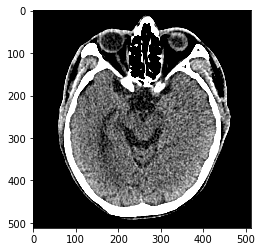

In [93]:
import matplotlib.pyplot as plt

plt.imshow(dicom_denormalize(t[470]['n_20'].squeeze()), 'gray', vmin=0, vmax=80)

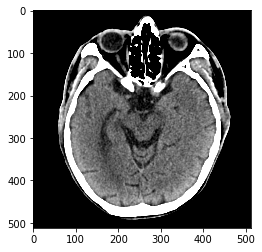

In [94]:
plt.imshow(dicom_denormalize(t[470]['n_100'].squeeze()), 'gray', vmin=0, vmax=80)

In [95]:
criterion(t[470]['n_100'], t[470]['n_20'])

tensor(4.2162e-06, dtype=torch.float64)

In [97]:
np.exp(4.2162e-06)

1.0000042162088882

In [105]:
np.exp(6.2162e-06)

1.0000062162193206

In [103]:
np.log(4.2162e-08)

-16.981746495508297

In [104]:
np.log(6.2162e-08)

-16.59352195637245

In [67]:
1e-6

1e-06

In [68]:
1/1000000

1e-06

# Log check

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_log(path):
    log_list = []
    lines = open(path, 'r').read().splitlines() 
    for i in range(len(lines)):
        exec('log_list.append('+lines[i] + ')')
    return  log_list

In [ ]:
log_list = read_log(path = '/workspace/sunggu/4.Dose_img2img/model/[Privious]ED_CNN/log.txt')

train_lr   = [ log_list[i]['train_lr'] for i in range(len(log_list)) ]
train_loss = [ log_list[i]['train_loss'] for i in range(len(log_list)) ]
valid_loss = [ log_list[i]['valid_loss'] for i in range(len(log_list)) ]
epoch      = [ log_list[i]['epoch'] for i in range(len(log_list)) ]

In [ ]:
plt.plot(train_loss)

In [ ]:
plt.plot(valid_loss)


In [ ]:
np.argsort(train_loss)[:10]

In [ ]:
np.argsort(valid_loss)[:10]

In [ ]:
set(np.argsort(valid_loss)[:10]) & set(np.argsort(train_loss)[:10])

# TEST

In [ ]:
!python test.py \
--training-mode 'sinogram' \
--data-set 'TEST_Sinogram_DCM' \
--model-name 'ED_CNN' \
--save_dir '/workspace/sunggu/4.Dose_img2img/Predictions/Test/png/[Privious]ED_CNN/epoch_999/' \
--num_workers 4 \
--pin-mem \
--range-minus1-plus1 'False' \
--teacher_forcing "False" \
--resume '/workspace/sunggu/4.Dose_img2img/model/[Privious]ED_CNN/epoch_999_checkpoint.pth'

##### 978 epoch

In [ ]:

Original === 
PSNR avg: 54.4628 
SSIM avg: 0.9956 
RMSE avg: 7.9607


Predictions === 
PSNR avg: 57.6190 
SSIM avg: 0.9980 
RMSE avg: 5.5423
***********************************************